In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import re
from itertools import chain
import glob
import seaborn as sns

In [2]:
# df_merged = pd.read_excel('list_all_em_GTO.xlsx')
df_merged = pd.read_excel('list_all_em_GTO.csv')

In [3]:
df_merged.head()

Unnamed: 0 Register Date     HS Code  \
0           0    2011-01-29  8407349908   
1           1    2011-01-29  8407349908   
2           2    2011-01-17  8407343009   
3           3    2011-01-17  8407343009   
4           4    2011-01-20  8407343009   

                                 Product Description  \
0  СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-261 В РАЗОБРАННО...   
1  СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-A343E-111 В РАЗО...   
2  ДВИГАТЕЛЬ ЗИЛ ,Б/У,БЕНЗИНОВЫЙ,ОБЪЕМ 6000СМ.КУБ...   
3  ДВИГАТЕЛЬ ЗИЛ ,Б/У,НЕКОМПЛЕКТНЫЙ,БЕНЗИНОВЫЙ,ОБ...   
4  ДВИГАТЕЛИ БЕНЗИНОВЫЕ В СБОРЕ С КОРОБКОЙ ПЕРЕДА...   

                    Producer            Brand Place of Receipt  \
0  TOYOTA TSUSHO CORPORATION      ОТСУТСТВУЕТ            КОТКА   
1  TOYOTA TSUSHO CORPORATION      ОТСУТСТВУЕТ            КОТКА   
2                   АМО ЗИЛ              ЗИЛ      ЕКАТЕРИНБУРГ   
3                   АМО ЗИЛ              ЗИЛ      ЕКАТЕРИНБУРГ   
4            MERCEDES - BENZ  MERCEDES - BENZ   ТОЯМА НЬЮ ПОРТ   

  Country of Origin  Country of Sales                      Shipper   \
0    JP, JPN, Japan    JP, JPN, Japan     TOYOTA TSUSHO CORPORATION   
1    JP, JPN, Japan    JP, JPN, Japan     TOYOTA TSUSHO CORPORATION   
2   RU, RUS, Russia  UA, UKR, Ukraine                   ООО ПЕТРУС    
3   RU, RUS, Russia  UA, UKR, Ukraine                   ООО ПЕТРУС    
4    JP, JPN, Japan    JP, JPN, Japan  METAL AUTO HOKURIKU CO., LTD   

                                  Shipper Address  \
0  450-8575 NAKAMURA-KU NAGOYA 9-8,MEIEKI 4-CHOME   
1  450-8575 NAKAMURA-KU NAGOYA 9-8,MEIEKI 4-CHOME   
2                  Г.ДРОГОБЫЧ УЛ.ГАЙДАМАЦКАЯ, 7/1   
3                  Г.ДРОГОБЫЧ УЛ.ГАЙДАМАЦКАЯ, 7/1   
4    ISHIKAWA KEN KOMATSU SHI SHIRAE MACHI, RO 62   

                         Consignee  \
0             ООО ТЕХНОСЕРВИСПРОМ    
1             ООО ТЕХНОСЕРВИСПРОМ    
2   ЗАО АВТОМОБИЛИ И МОТОРЫ УРАЛА    
3   ЗАО АВТОМОБИЛИ И МОТОРЫ УРАЛА    
4  ИП КОЧЕТКОВ ВЯЧЕСЛАВ ВИКТОРОВИЧ   

                                   Consignee Address  Quantity  \
0  603104, НИЖЕГОРОДСКАЯ ОБЛ, Н.НОВГОРОД, НАРТОВА...        15   
1  603104, НИЖЕГОРОДСКАЯ ОБЛ, Н.НОВГОРОД, НАРТОВА...         5   
2  624130, СВЕРДЛОВСКАЯ ОБЛ., Г.НОВОУРАЛЬСК, УЛ.А...        30   
3  624130, СВЕРДЛОВСКАЯ ОБЛ., Г.НОВОУРАЛЬСК, УЛ.А...        15   
4         664019, , Г ИРКУТСК, ПЕР. МИНУСИНСКИЙ Д 10        38   

  Unit of Measure Incoterms  Gross Weight in KG  Net Weight in KG  \
0              ШТ       CIF              3604.0            3017.0   
1              ШТ       CIF              1765.0            1465.0   
2              ШТ       CPT             14400.0           14400.0   
3              ШТ       CPT              3000.0            3000.0   
4              ШТ       FOB              6460.0            6460.0   

   Cargo Value USD  
0         73063.36  
1         37014.64  
2         27000.00  
3          6894.50  
4          6536.45

In [6]:
df_merged.drop(columns=['Unnamed: 0'],inplace=True)

In [7]:
for col in list(df_merged.columns):
 (df_merged[col].dtype ==  'object') and (df_merged[col].fillna(value='unknown',inplace = True)) or (df_merged[col].fillna(value=0, inplace = True))

In [8]:
df_merged.to_csv('list_all_em_GTO.csv')

In [9]:
df_merged.isnull().sum()

Register Date          0
HS Code                0
Product Description    0
Producer               0
Brand                  0
Place of Receipt       0
Country of Origin      0
Country of Sales       0
Shipper                0
Shipper Address        0
Consignee              0
Consignee Address      0
Quantity               0
Unit of Measure        0
Incoterms              0
Gross Weight in KG     0
Net Weight in KG       0
Cargo Value USD        0
dtype: int64

In [28]:
def extract_engine_model (description, list_em):
    engine_model = []
    for e in list_em:
        em_reg1 = re.findall(r'\b{}-\w+-?\w*\b'.format(e), description)
#         em_reg2 = re.findall(r"(\b{}-\w+-\w+\b)".format(e), description)
        if len(em_reg1) != 0 :
          em_reg1 = list(set(em_reg1)) 
          engine_model.append(em_reg1)
#         if len(em_reg2) != 0 :
#           em_reg2 = list(set(em_reg2))
#           engine_model.append(em_reg2)
    
    return list(chain(*engine_model))

In [27]:
s  = 'dadadas 2TR-FE dfdfdfdf 2TR-FE-463'
s1  = re.findall(r'\b{}-\w+-?\w*\b'.format('2TR-FE'),s)
s1

['2TR-FE-463']

In [3]:
df_list_engine = pd.read_excel('C:\\Users\\Admin\\Github\\Kaiho\\Engine Model _1025.xlsx')
df_list_engine.head()

Unnamed: 0    メーカー   燃料 買付受付   型式 駆動1 駆動2  駆動3   詳細 車輌型式 KRA売単価   車名  仕入値  \
0         2.0    FIAT    0    ×    4  FR  AT  2WD  NaN  NaN    NaN  NaN  NaN   
1         3.0  PORCHE  NaN    ×   64  RR  AT  4WD  NaN  NaN    NaN  NaN  NaN   
2         4.0  PORCHE  NaN    ×   66  RR  MT  2WD  NaN  NaN    NaN  NaN  NaN   
3         5.0  PORCHE  NaN    ×   70  RR  AT  4WD  NaN  NaN    NaN  NaN  NaN   
4         6.0    BENZ  NaN    ○  102  FR  AT  2WD  NaN  NaN    NaN  NaN  NaN   

  EG売価\n（マニ触付）\nW EG売価\n（マニ触抜/無）\nWO  
0            売価確認               売価確認  
1            売価確認                  0  
2            売価確認                  0  
3            売価確認                  0  
4           40000                  0

In [35]:
df_merged.columns

Index(['Register Date', 'HS Code', 'Product Description', 'Producer', 'Brand',
       'Place of Receipt', 'Country of Origin', 'Country of Sales', 'Shipper ',
       'Shipper Address', 'Consignee', 'Consignee Address', 'Quantity',
       'Unit of Measure', 'Incoterms', 'Gross Weight in KG',
       'Net Weight in KG', 'Cargo Value USD'],
      dtype='object')

In [52]:
df_merged['shipper_extract']  = df_merged['Shipper '].map(lambda x : 'KAIHO' if 'KAIHO' in x else ('Others' if x  else 'None'))

In [70]:
df_merged['country_extract']  = df_merged['Country of Sales'].map(lambda x : 'Japan' if ('japan' in x.lower() or 'jp' in x.lower() or 'jpn' in x.lower()) else ('Others' if x  else 'None'))

In [71]:
df_kaiho_extract = df_merged[(df_merged['shipper_extract'] == 'KAIHO') & (df_merged['country_extract'] == 'Japan')]

In [72]:
df_kaiho_extract

Register Date     HS Code  \
27        2011-01-12  8407343009   
37        2011-01-12  8407343009   
47        2011-01-13  8407343009   
68        2011-01-17  8407343009   
69        2011-01-17  8407343009   
...              ...         ...   
258986    2019-12-01  8407343009   
258987    2019-12-01  8407343009   
258988    2019-12-01  8407343009   
258989    2019-12-01  8407343009   
258990    2019-12-01  8407343009   

                                      Product Description  \
27      БЕНЗИНОВЫЕ ДВИГАТЕЛИ ДЛЯ А/М, РАБОЧИМ ОБЪЕМОМ ...   
37      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ, БЕНЗИНОВЫЕ ДЛЯ...   
47      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ, БЕНЗИНОВЫЕ ДЛЯ...   
68      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЕНЗИНОВЫЕ, Б/У...   
69      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЕНЗИНОВЫЕ, Б/У...   
...                                                   ...   
258986  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...   
258987  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...   
258988  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...   
258989  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...   
258990  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ А/М БЫВШИЙ В УПОТРЕБЛ...   

                                                 Producer  \
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...   
37                                         TOYOTA, NISSAN   
47                                             MITSUBISHI   
68                                                 TOYOTA   
69                                                 TOYOTA   
...                                                   ...   
258986                                               FORD   
258987                                             NISSAN   
258988                           MITSUBISHI SUBARU SUZUKI   
258989                                             TOYOTA   
258990                                         VOLKSWAGEN   

                                                    Brand Place of Receipt  \
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...      ВЛАДИВОСТОК   
37                                         TOYOTA, NISSAN      ВЛАДИВОСТОК   
47                                             MITSUBISHI      ВЛАДИВОСТОК   
68                                                 TOYOTA      ВЛАДИВОСТОК   
69                                                 TOYOTA      ВЛАДИВОСТОК   
...                                                   ...              ...   
258986                                               FORD     TOYAMASHINKO   
258987                                             NISSAN     TOYAMASHINKO   
258988                           MITSUBISHI SUBARU SUZUKI     TOYAMASHINKO   
258989                                             TOYOTA     TOYAMASHINKO   
258990                                         VOLKSWAGEN     TOYAMASHINKO   

       Country of Origin Country of Sales  \
27        JP, JPN, Japan   JP, JPN, Japan   
37        JP, JPN, Japan   JP, JPN, Japan   
47        JP, JPN, Japan   JP, JPN, Japan   
68        JP, JPN, Japan   JP, JPN, Japan   
69        JP, JPN, Japan   JP, JPN, Japan   
...                  ...              ...   
258986    JP, JPN, Japan   JP, JPN, Japan   
258987    JP, JPN, Japan   JP, JPN, Japan   
258988    JP, JPN, Japan   JP, JPN, Japan   
258989    JP, JPN, Japan   JP, JPN, Japan   
258990    JP, JPN, Japan   JP, JPN, Japan   

                                                 Shipper   \
27                                  KAIHO SANGYO CO., LTD   
37                                  KAIHO SANGYO CO., LTD   
47                                  KAIHO SANGYO CO., LTD   
68                                  KAIHO SANGYO CO.,LTD.   
69                                  KAIHO SANGYO CO.,LTD.   
...                                                   ...   
258986  FESCO INTEGRATED TRANSPORY LLC O/B OF KAIHO IN...   
258987  FESCO INTEGRATED TRANSPORY LLC O/B OF KAIHO IN...   
258988  FESCO INTEGRATED TRANSPORY LLC O/B OF KAIHO IN...   
258989  FESCO INTEGR

In [73]:
list_engine_GTO  = pd.read_csv('C:\\Users\\Admin\\Github\\Kaiho\\GTO_JAPAN_engine.csv')

D:\Software\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [75]:
list_engine_GTO

Register Date     HS Code  \
0         2018-01-01  8407343009   
1         2018-01-01  8407349908   
2         2018-01-01  8407343009   
3         2018-01-01  8407343009   
4         2018-01-01  8407343009   
...              ...         ...   
100539    2016-12-01  8407343009   
100540    2016-12-01  8407343009   
100541    2016-12-01  8407343009   
100542    2016-12-01  8407343009   
100543    2016-12-01  8407343009   

                                      Product Description  \
0       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
1       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
2       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
3       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
4       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
...                                                   ...   
100539  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100540  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100541  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100542  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100543  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                                Producer                   Brand  \
0                                 SUZUKI                  SUZUKI   
1                MAZDA MOTOR CORPORATION                   MAZDA   
2                 DAIHATSU,SUBARU,SUZUKI  DAIHATSU,SUBARU,SUZUKI   
3                    TOYOTA MOTOR CORP.                   TOYOTA   
4                                 TOYOTA                  TOYOTA   
...                                  ...                     ...   
100539               HONDA MOTOR CO. LTD                   HONDA   
100540           HONDA MOTOR CORPORATION                   HONDA   
100541  SUBARU-FUJI HEAVY INDUSTRIES LTD                  SUBARU   
100542                   HONDA MOTOR CO.                   HONDA   
100543          TOYOTA MOTOR CORPORATION                  TOYOTA   

       Place of Receipt Country of Origin Country of Sales  \
0           ВЛАДИВОСТОК    JP, JPN, Japan   JP, JPN, Japan   
1                ПОХАНГ    JP, JPN, Japan   JP, JPN, Japan   
2           ВЛАДИВОСТОК    JP, JPN, Japan   JP, JPN, Japan   
3           ВЛАДИВОСТОК    JP, JPN, Japan   JP, JPN, Japan   
4           ВЛАДИВОСТОК    JP, JPN, Japan   JP, JPN, Japan   
...                 ...               ...              ...   
100539        ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   
100540        ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   
100541        ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   
100542        ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   
100543        ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   

                                                 Shipper   \
0                                        EARLYBIRD CO.LTD   
1       PACIFIC LOGISTIC KOREA LTD. O/B OF MAZDA MOTOR...   
2                                         ASTRADE CO.,LTD   
3                                    YAMAGIN CORPORATION    
4                                           ARAI CO., LTD   
...                                                   ...   
100539                                      SHIJO TRADING   
100540  EAST-JAPAN RECYCLING RESOURCES CO.,LTD 21-1 SH...   
100541                                      SCP-TRANS LLC   
100542                               KAIHO SANGYO CO.,LTD   
100543                                  O.M.AUTO CO.,LTD.   

                                          Shipper Address  ...  \
0                  JAPAN, TOYAMA-SHI, IWASE, SUWAMACHI 52  ...   
1       , SEOUL, SEONGDONG-GU, 902 ACE HIGHEND SEONGSU...  ...   
2                  , , OSAKA, 1-4-9, SHIMAMACHI, CHYUO-KU  ...   
3       , JAPAN, TOKYO, DAIICHI SEIMEI BLDG,8F,2-19-3 ...  ...   
4       671-1132, HYOGO, HIMEJI CITY, KANBEI CHO OHTSU...  ...   
...                                                   ...  ...   
100539        SHIZUOKA 418-0022 2150-2 KOIZUMI FUJINOMIYA  ...   
100540            

In [10]:
df_list_engine = pd.read_excel('Engine Model _1025.xlsx')
df_list_engine.head()

Unnamed: 0    メーカー   燃料 買付受付   型式 駆動1 駆動2  駆動3   詳細 車輌型式 KRA売単価   車名  仕入値  \
0         2.0    FIAT    0    ×    4  FR  AT  2WD  NaN  NaN    NaN  NaN  NaN   
1         3.0  PORCHE  NaN    ×   64  RR  AT  4WD  NaN  NaN    NaN  NaN  NaN   
2         4.0  PORCHE  NaN    ×   66  RR  MT  2WD  NaN  NaN    NaN  NaN  NaN   
3         5.0  PORCHE  NaN    ×   70  RR  AT  4WD  NaN  NaN    NaN  NaN  NaN   
4         6.0    BENZ  NaN    ○  102  FR  AT  2WD  NaN  NaN    NaN  NaN  NaN   

  EG売価\n（マニ触付）\nW EG売価\n（マニ触抜/無）\nWO  
0            売価確認               売価確認  
1            売価確認                  0  
2            売価確認                  0  
3            売価確認                  0  
4           40000                  0

In [29]:
df_brand_toyota =  df_list_engine[df_list_engine['メーカー']  == 'TOYOTA']
list_toyota = list(df_brand_toyota['型式'].unique())
# list_toyota  = list(map(lambda x: split_str(x),list_toyota))
# list_toyota  = list(set(list_toyota))

In [30]:
len(list_toyota)

163

In [34]:
df_brand_mazda =  df_list_engine[df_list_engine['メーカー']  == 'MAZDA']
list_mazda = list(df_brand_mazda['型式'].unique())

In [70]:
df_brand_mitsubishi =  df_list_engine[df_list_engine['メーカー']  == 'MITSUBISHI']
list_mitsubishi = list(df_brand_mitsubishi['型式'].unique())

In [71]:
df_brand_honda =  df_list_engine[df_list_engine['メーカー']  == 'HONDA']
list_honda = list(df_brand_honda['型式'].unique())

In [72]:
df_brand_nissan =  df_list_engine[df_list_engine['メーカー']  == 'NISSAN']
list_nissan = list(df_brand_nissan['型式'].unique())

In [73]:
df_brand_subaru =  df_list_engine[df_list_engine['メーカー']  == 'SUBARU']
list_subaru = list(df_brand_subaru['型式'].unique())

In [74]:
len(list_mitsubishi)

66

In [31]:
list_all_engine_model_toyota_GTO = []

for des in df_merged['Product Description'].tolist():
    list_em = extract_engine_model(des,list_toyota)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO.append(list_em)
    
list_all_engine_model_toyota_GTO

[['2TR-FE-261'],
 ['2TR-FE-A343E-111'],
 ['5K-1298931'],
 ['5K-1298931'],
 ['3F-0309291'],
 ['3Y-1087320'],
 ['1ZZ-FE-1075334'],
 ['1N-0164680'],
 ['2L-4744731'],
 ['7K-0535452'],
 ['3Y-1131701'],
 ['7K-0305900'],
 ['3Y-0960114'],
 ['5A-FE-4479404'],
 ['5A-FE-4479404'],
 ['5A-FE-4479404'],
 ['7K-0384461'],
 ['3Y-1087320'],
 ['1RZ-2972261'],
 ['3Y-2025152'],
 ['13B-472259'],
 ['T2-007921'],
 ['B-3130483'],
 ['7K-0441751'],
 ['3Y-1104798', '3Y-0852568', '7K-0'],
 ['3F-0342176'],
 ['7K-НОМЕР'],
 ['T2-702740'],
 ['1RZ-3074053'],
 ['7K-074', '7K-0317006'],
 ['7K-0388811'],
 ['2Y-0878492'],
 ['3Y-0982805'],
 ['3Y-0809881'],
 ['2Y-0733933'],
 ['3F-0330119'],
 ['3Y-2006752'],
 ['3Y-0908831'],
 ['3Y-1188703'],
 ['T2-008564'],
 ['3Y-1092534'],
 ['7K-0699656'],
 ['2Y-0877867'],
 ['3Y-1048986'],
 ['3Y-1193297'],
 ['7K-0262939'],
 ['T2-702411'],
 ['7K-0217074'],
 ['7K-0484243'],
 ['3Y-1255955'],
 ['1RZ-3053319'],
 ['7K-0530481'],
 ['T2-702775'],
 ['3F-0296216'],
 ['2Y-0858389'],
 ['3Y-2097285'],
 [

In [33]:
len(list_all_engine_model_toyota_GTO)

966

In [26]:
pd.Series(list(chain(*list_all_engine_model_toyota_GTO))).to_excel('test.xlsx')

In [35]:
list_all_engine_model_mazda_GTO = []

for des in df_merged['Product Description'].tolist():
    list_em = extract_engine_model(des,list_mazda)
    if len(list_em) !=0:
     list_all_engine_model_mazda_GTO.append(list_em)
    
list_all_engine_model_mazda_GTO

[['FE-261'],
 ['FE-A343E-111'],
 ['FE-943620'],
 ['G5-206157'],
 ['F8-363344'],
 ['FE-1075334'],
 ['YF-210212'],
 ['B5-217046'],
 ['F8-999542'],
 ['F8-362129'],
 ['F8-258832'],
 ['FE-4479404'],
 ['FE-4479404'],
 ['FE-4479404'],
 ['GY-320358'],
 ['FE-970151'],
 ['F8-255572'],
 ['F8-269004'],
 ['G5-209150'],
 ['F8-228199', 'F8-316878'],
 ['F8-59019', 'FE-31034'],
 ['F8-260588'],
 ['F8-281007'],
 ['B5-236648'],
 ['B6-448404'],
 ['F8-571742'],
 ['G6-080010'],
 ['B6-273607'],
 ['F8-368036'],
 ['G6-188815'],
 ['F8-237927'],
 ['GY-221473'],
 ['GY-222882'],
 ['F8-250596', 'F8-582823'],
 ['B5-219484'],
 ['13B-472259'],
 ['F8-368036'],
 ['GY-269884', 'GY-405355'],
 ['FE-986908'],
 ['E5-732530', 'F8-512289'],
 ['B5-219125', 'J5-144188'],
 ['FE-450181'],
 ['FE-980888'],
 ['YF-210894'],
 ['F8-585676', 'R2-868441'],
 ['GY-282628', 'GY-252489'],
 ['B5-522120', 'B5-521658', 'GY-280607'],
 ['F8-279859'],
 ['YF-21525'],
 ['B5-366020',
  'F8-527714',
  'F8-574587',
  'F8-260857',
  'F8-577743',
  'F8-525

In [36]:
len(list_all_engine_model_mazda_GTO)

2069

In [67]:
list_all_engine_model_mitsubishi_GTO = []

for des in df_merged['Product Description'].tolist():
    list_em = extract_engine_model(des,list_mitsubishi)
    if len(list_em) !=0:
     list_all_engine_model_mitsubishi_GTO.append(list_em)
    
list_all_engine_model_mitsubishi_GTO

[['4G93-JB1495'],
 ['6G73-G85025', '6G73-RH9264'],
 ['4G93-QC6102'],
 ['4G93-KN0232'],
 ['4G93-KL5721'],
 ['4G15-AD0839'],
 ['6G74-CP5608'],
 ['6G74-CY0151'],
 ['4G63-XR3743'],
 ['6G74-HD5005', '6G74-CY2183'],
 ['4G15-YR5535', '6G74-JO9326'],
 ['4G63-BP3922', '4G64-AL5107', '4G93-GR2937', '6A12-BH7706', '6G73-KS5873'],
 ['6G73-G50108'],
 ['4G93-ML7161'],
 ['4G93-MM5009'],
 ['6G74-RP9301'],
 ['4G64-YD7787L', '4G93-PC5175'],
 ['6G74-CA0650'],
 ['4G93-GQ8731'],
 ['4G93-MT8119'],
 ['4G69-LS0465',
  '6A13-BG2644',
  '6G72-T67319',
  '6G72-BX0253',
  '6G74-BL4166',
  '6G74-T50316'],
 ['6G72-H46190', '6G74-CJ1184'],
 ['6G74-HM6242'],
 ['6G74-GY6717'],
 ['4G63-TS0340', '4G64-XD3878'],
 ['4G13-QT1162', '4G15-XR2101', '6A13-CC0408', '6A13-BC4369'],
 ['4G69-L', '4G69-L-H5'],
 ['4G63-L', '4G63-L-H8'],
 ['6G74-DC6704'],
 ['6G72-R14262'],
 ['6G72-K55163', '6G72-AH9993'],
 ['4G63-TE08'],
 ['4G63-SK0281', '4G63-UA4807'],
 ['6G72-TG7879'],
 ['4G15-TP5036', '4G67-LR7768'],
 ['6G73-L49808',
  '6G74-TX480

In [36]:
len(list_all_engine_model_mitsubishi_GTO)

7262

In [38]:
list_all_engine_model_honda_GTO = []

for des in df_merged['Product Description'].tolist():
    list_em = extract_engine_model(des,list_honda)
    if len(list_em) !=0:
     list_all_engine_model_honda_GTO.append(list_em)
    
list_all_engine_model_honda_GTO

[['J30A-6000582'],
 ['F23A-2416885'],
 ['K20A-2080249'],
 ['B20B-1161655', 'ZC-6212744'],
 ['B20B-1023753', 'G20A-2005286', 'L13A-1001826'],
 ['L13A-1602007'],
 ['J30A-3004572'],
 ['K24A-2508078'],
 ['C32A-2050916',
  'K20A-6005371',
  'K20A-6012831',
  'L15A-1309831',
  'L15A-1154134',
  'L15A-1100687'],
 ['B20B-3448376'],
 ['D16A-8007284', 'F23A-1203845'],
 ['D15B-800047'],
 ['D16A-9003388', 'F20B-2053760', 'F23A-1004524'],
 ['G20A-1562290'],
 ['D13B-6205175',
  'F18B-2002167',
  'F20B-2704211',
  'F20B-2054948',
  'G25A-2012486',
  'L15A-3135099'],
 ['B20B-1152191'],
 ['F23A-2222976'],
 ['D16A-1706362', 'F23A-2231649'],
 ['F20B-2744821', 'F20B-2060623', 'F20B-2709284', 'K20A-2054363'],
 ['B20B-1001104',
  'D16A-8006285',
  'K20A-2012324',
  'L13A-1103797',
  'L15A-4006250'],
 ['B20B-9206163',
  'D15B-9006471',
  'F20B-2013288',
  'K24A-8000564',
  'ZC-6509616'],
 ['B20B-1102146', 'D13B-6305733'],
 ['K20A-2521945'],
 ['B20B-1014875',
  'D16A-1713866',
  'F20B-2709112',
  'F20B-201124

In [329]:
pd.Series(list(chain(*list_all_engine_model_honda_GTO))).to_excel('test.xlsx')

In [40]:
list_all_engine_model_nissan_GTO = []

for des in df_merged['Product Description'].tolist():
    list_em = extract_engine_model(des,list_nissan)
    if len(list_em) !=0:
     list_all_engine_model_nissan_GTO.append(list_em)
    
list_all_engine_model_nissan_GTO

[['RB20-253129B'],
 ['Z16-725689X'],
 ['TD27-066556T'],
 ['RB20-195991B9'],
 ['Z16-25366'],
 ['Z16-704420X'],
 ['NA16-70'],
 ['RB20-156199B'],
 ['RB20-254530B'],
 ['RB20-130563B'],
 ['A15-376848A'],
 ['RB20-267001B'],
 ['RB20-215648B'],
 ['NA20-003150W'],
 ['SR20DET-535083A'],
 ['RB20-8630567'],
 ['RB20-090620B'],
 ['NA16-707715X', 'RB20-136033B'],
 ['NA20-833933'],
 ['RB20-956110A'],
 ['RB20-972604A'],
 ['D5-098090'],
 ['RB20-118135B'],
 ['RB20-752453'],
 ['TD27-076491A'],
 ['RB20-206552B', 'RB20-030290B'],
 ['TD27-076491A'],
 ['RB20-048617A'],
 ['RB20-25712'],
 ['RB20-173595B'],
 ['RB20-244526B'],
 ['Z16-298877'],
 ['RB20-109482B'],
 ['RB20-871653A'],
 ['NA20-907268X'],
 ['RB20-003793B'],
 ['RB20-144982B'],
 ['A15-409264A',
  'RB20-185773B',
  'RB20-218293B',
  'RB20-258526B',
  'RB20-669979A'],
 ['NA20-853886'],
 ['RB20-709488X'],
 ['RB20-226582B'],
 ['RB20-233621B', 'RB20-223556B'],
 ['NA20-763699X'],
 ['RB20-212166B', 'RB20-863056A'],
 ['RB20-269031B'],
 ['Z20-605136'],
 ['PF-8813

In [41]:
len(list_all_engine_model_nissan_GTO)

1115

In [42]:
list_all_engine_model_subaru_GTO = []

for des in df_merged['Product Description'].tolist():
    list_em = extract_engine_model(des,list_subaru)
    if len(list_em) !=0:
     list_all_engine_model_subaru_GTO.append(list_em)
    
list_all_engine_model_subaru_GTO

[['EJ20-660933', 'EJ20-B490533'],
 ['EJ25-701920'],
 ['EJ20-A893668'],
 ['EJ20-612187'],
 ['EJ20-740260'],
 ['EJ20-974764'],
 ['EJ25-B03464'],
 ['EJ20-A888010', 'EJ20-B13916'],
 ['EJ15-155212', 'EJ20-79428', 'EJ20-B006386', 'EJ25-A819597'],
 ['EJ20-A955836'],
 ['EJ20-687452'],
 ['EJ25-034578'],
 ['EJ25-630173'],
 ['EL15-C961912'],
 ['EJ18-201500'],
 ['EJ20-B947799'],
 ['EJ20-B906541'],
 ['EJ20-561972', 'EJ20-724904', 'EJ20-B235179'],
 ['EJ20-209586'],
 ['EJ18-719996', 'EJ20-719960', 'EJ20-327893', 'EJ20-921387'],
 ['EJ20-B464790'],
 ['EJ20-B135886'],
 ['EJ20-B624055'],
 ['EJ20-C191787',
  'EJ20-B548102',
  'EJ20-B565136',
  'EJ20-B181420',
  'EJ20-B091827'],
 ['EJ20-B329901'],
 ['EJ25-D579128', 'EJ25-D998634'],
 ['EJ20-B264599', 'EJ20-A656603'],
 ['EJ20-630655'],
 ['EJ20-B551637'],
 ['EJ20-862172'],
 ['EJ15-C591109', 'EJ20-C167498', 'EJ25-620615'],
 ['EJ20-B891486', 'EJ20-B057765'],
 ['EJ20-829201', 'EJ25-B207921', 'EJ25-B004074'],
 ['EJ20-C394405', 'EJ20-C605887', 'EJ20-B962504'],
 ['

In [43]:
len(list_all_engine_model_subaru_GTO)

5684

In [71]:
len(list_all_engine_model_subaru_GTO_filter)

3746

In [ ]:
toyota : 966, filter : 830
mazda : 2069, filter : 1155
mitsubishi : 7262, filter : 6157
honda: 9687, filter : 8875
nissan: 1115, filter: 982
subaru: 5684, filter: 3746

In [74]:
list(set(list_toyota).intersection(list_mazda))

['13B']

In [75]:
list(set(list_toyota).intersection(list_mitsubishi))

[]

In [76]:
list(set(list_toyota).intersection(list_honda))

[]

In [77]:
list(set(list_toyota).intersection(list_nissan))

[]

In [78]:
list(set(list_toyota).intersection(list_subaru))

[]

In [41]:
def split_str (x):
    join_str = ''
    if '-' in x:
        str_splitted = x.split('-')
        str_splitted.pop()
        delimiter = '-'
        join_str = delimiter.join(str_splitted)
        return join_str
    else:
         return x

# Visualiztion Toyota

In [247]:
df_toyota = df_merged[df_merged.Producer.str.contains('TOYOTA')]
df_toyota

Register Date     HS Code  \
0         2011-01-29  8407349908   
1         2011-01-29  8407349908   
6         2011-01-06  8407343009   
8         2011-01-13  8407343009   
9         2011-01-13  8407343009   
...              ...         ...   
259166    2019-12-01  8407343009   
259167    2019-12-01  8407343009   
259176    2019-12-01  8407343009   
259180    2019-12-01  8407343009   
259183    2019-12-01  8407343009   

                                      Product Description  \
0       СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-261 В РАЗОБРАННО...   
1       СИЛОВОЙ АГРЕГАТ TOYOTA 2TR-FE-A343E-111 В РАЗО...   
6       ДВС БЕНЗИН А/М Б/У В СБОРЕ С АКП: TOYOTA,1JZ-0...   
8       ЗАП.ЧАСТИ ДЛЯ А/М, Б/У ДВИГАТЕЛЯ С АККП ЯПОНСК...   
9       ЗАП.ЧАСТИ ДЛЯ А/М, Б/У ДВИГАТЕЛЯ С АКП ЯПОНСКО...   
...                                                   ...   
259166  ЗАПАСНЫЕ ЧАСТИ ДЛЯ А/М БЫВШИЕ В УПОТРЕБЛЕНИИ: ...   
259167  ЗАПАСНЫЕ ЧАСТИ ДЛЯ А/М БЫВШИЕ В УПОТРЕБЛЕНИИ: ...   
259176  ДВИГАТЕЛЬ ОТ А/М Б/У В СБОРЕ С АКП ,БЕНЗИНОВЫЙ...   
259180  ПОРШНЕВОЙ ДВИГАТЕЛЬ ВНУТРЕННЕГО СГОРАНИЯ С ИСК...   
259183  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                         Producer                     Brand Place of Receipt  \
0       TOYOTA TSUSHO CORPORATION               ОТСУТСТВУЕТ            КОТКА   
1       TOYOTA TSUSHO CORPORATION               ОТСУТСТВУЕТ            КОТКА   
6                          TOYOTA                    TOYOTA      ВЛАДИВОСТОК   
8        TOYOTA,MITSUBISHI,NISSAN  TOYOTA,MITSUBISHI,NISSAN      ВЛАДИВОСТОК   
9        TOYOTA,MITSUBISHI,SUZUKI  TOYOTA,MITSUBISHI,SUZUKI      ВЛАДИВОСТОК   
...                           ...                       ...              ...   
259166           TOYOTA MOTOR CO.                    TOYOTA      ВЛАДИВОСТОК   
259167           TOYOTA MOTOR CO.                    TOYOTA      ВЛАДИВОСТОК   
259176      TOYOTA MOTOR CO. LTD.                    TOYOTA      ВЛАДИВОСТОК   
259180          TOYOTA MOTOR CORP                    TOYOTA        ВОСТОЧНЫЙ   
259183        TOYOTA MOTOR CORP..                   TOYOTA.             КОБЭ   

       Country of Origin Country of Sales                           Shipper   \
0         JP, JPN, Japan   JP, JPN, Japan          TOYOTA TSUSHO CORPORATION   
1         JP, JPN, Japan   JP, JPN, Japan          TOYOTA TSUSHO CORPORATION   
6         JP, JPN, Japan   JP, JPN, Japan             МИХАИЛ КАМПАНИ КО.,ЛТД   
8         JP, JPN, Japan   JP, JPN, Japan                    ЖАПРОС КО., ЛТД   
9         JP, JPN, Japan   JP, JPN, Japan                    ЖАПРОС КО., ЛТД   
...                  ...              ...                                ...   
259166    JP, JPN, Japan   JP, JPN, Japan               PIONEER COMPANY LTD.   
259167    JP, JPN, Japan   JP, JPN, Japan               PIONEER COMPANY LTD.   
259176    JP, JPN, Japan   JP, JPN, Japan                       UNICO CO LTD   
259180    JP, JPN, Japan   JP, JPN, Japan                        EK3 CO. LTD   
259183    JP, JPN, Japan   JP, JPN, Japan  SUZUKI CHUGOKU HANBAI CORPORATION   

                                          Shipper Address  \
0          450-8575 NAKAMURA-KU NAGOYA 9-8,MEIEKI 4-CHOME   
1          450-8575 NAKAMURA-KU NAGOYA 9-8,MEIEKI 4-CHOME   
6          910-0049 ФУКУИ-КЕН ФУКУИ-ШИ ФУКАДАНИ-ЧО, 1-7-3   
8       950-3102 ДЖАПАН МАЙДЗУРУ НИИГАТА КЕН,НИГАШИКОУ...   
9       950-3102 ДЖАПАН ТОЯМА НИИГАТА КЕН,НИГАШИКОУ,СЕ...   
...                                                   ...   
259166                  OSAKA, HIGASHI-OSAKA-CITY, 5-1-20   
259167                  OSAKA, HIGASHI-OSAKA-CITY, 5-1-20   
259176               ЯПОНИЯ, ЙОКОГАМА, АСОНА, БИЗИН 926-3   
259180   933-0209, TOYAMA PREF, IMIZU SHI, SURIDEIJI 82-1   
259183  HIROSHIMA-PREF., ONOMICHI-CITY, TAK ASU-CHO, 8...   

                              Consignee  \
0                  ООО ТЕХНОСЕРВИСПРОМ    
1                  ООО ТЕХНОСЕРВИСПРОМ    
6                          НИКА ВЭД ООО   
8            И

In [248]:
list_all_engine_model_toyota_GTO_filter = []

for des in df_toyota['Product Description'].tolist():
    list_em = extract_engine_model(des,list_toyota)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_filter

[['2TR-FE-261'],
 ['2TR-FE-A343E-111'],
 ['5K-1298931'],
 ['5K-1298931'],
 ['3F-0309291'],
 ['3Y-1087320'],
 ['1ZZ-FE-1075334'],
 ['1N-0164680'],
 ['2L-4744731'],
 ['7K-0535452'],
 ['3Y-1131701'],
 ['7K-0305900'],
 ['3Y-0960114'],
 ['5A-FE-4479404'],
 ['5A-FE-4479404'],
 ['5A-FE-4479404'],
 ['7K-0384461'],
 ['3Y-1087320'],
 ['1RZ-2972261'],
 ['3Y-2025152'],
 ['T2-007921'],
 ['B-3130483'],
 ['7K-0441751'],
 ['3Y-1104798', '3Y-0852568', '7K-0'],
 ['3F-0342176'],
 ['7K-НОМЕР'],
 ['1RZ-3074053'],
 ['7K-074', '7K-0317006'],
 ['7K-0388811'],
 ['2Y-0878492'],
 ['3Y-0982805'],
 ['3Y-0809881'],
 ['2Y-0733933'],
 ['3F-0330119'],
 ['3Y-2006752'],
 ['3Y-0908831'],
 ['3Y-1188703'],
 ['T2-008564'],
 ['3Y-1092534'],
 ['7K-0699656'],
 ['2Y-0877867'],
 ['3Y-1048986'],
 ['3Y-1193297'],
 ['7K-0262939'],
 ['T2-702411'],
 ['7K-0217074'],
 ['7K-0484243'],
 ['3Y-1255955'],
 ['1RZ-3053319'],
 ['7K-0530481'],
 ['T2-702775'],
 ['3F-0296216'],
 ['2Y-0858389'],
 ['3Y-2097285'],
 ['7K-0249379'],
 ['3Y-1205671'],
 

In [249]:
len(list_all_engine_model_toyota_GTO_filter)

830

In [250]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
# list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))
df_list_toyota = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota

Engine Model
0           2TR-FE
1     2TR-FE-A343E
2               5K
3               5K
4               3F
...            ...
1038        2SZ-FE
1039        2SZ-FE
1040            7K
1041            7K
1042            3F

[1043 rows x 1 columns]

In [31]:
# list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
# list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [55]:
len(set(list_toyota_remove_tail))

64

In [251]:
df_freq_toyota = df_list_toyota.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0           13B     14           1.34
1        1AZ-FE      2           0.19
2       1AZ-FSE      7           0.67
3         1G-FE     38           3.64
4           1HZ      3           0.29
..          ...    ...            ...
59   7K-0539464      1           0.10
60   7K-0795062      1           0.10
61   7K-0862699      1           0.10
62            B      6           0.58
63           T2     25           2.40

[64 rows x 3 columns]

In [252]:
df_freq_toyota.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
57           7K    230          22.05
41           3Y    170          16.30
30           2Y    101           9.68
51           5K     49           4.70
11       1NZ-FE     44           4.22

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

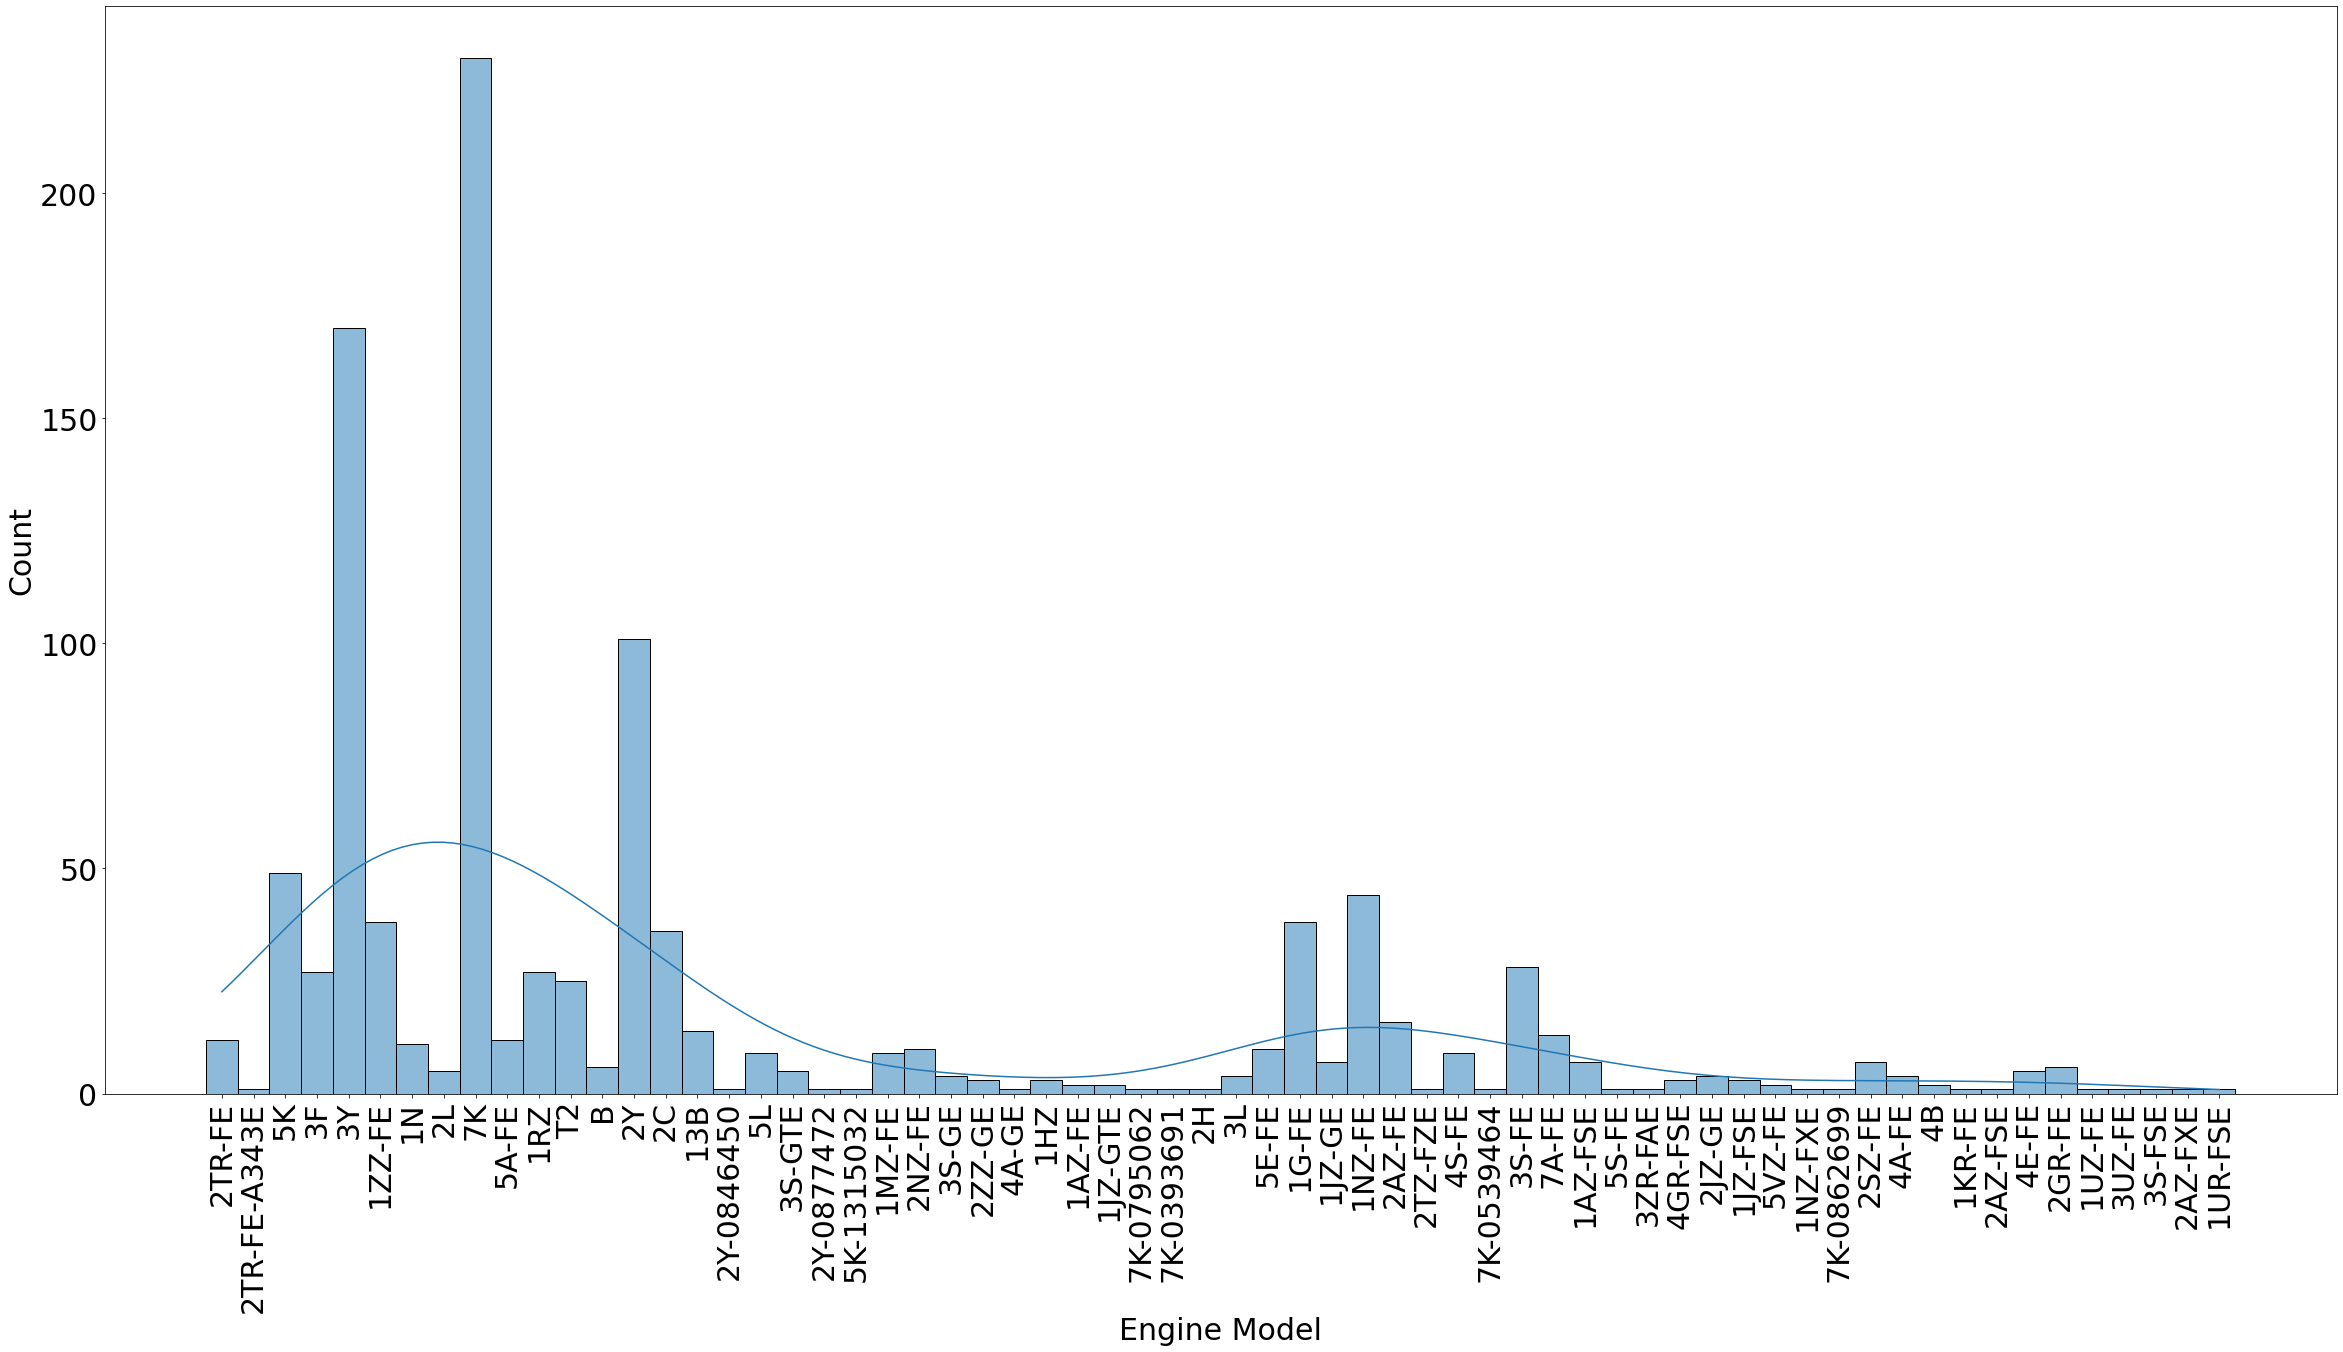

In [57]:
# plt.figure(figsize=(40,30))
# plt.xticks(fontsize = 30,rotation=90)
# plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
# plt.yticks(fontsize = 30,rotation=90)
# plt.ylabel(ylabel = 'Count',fontsize = 30)
# sns.histplot(data=list_toyota_remove_tail,kde=True)

plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

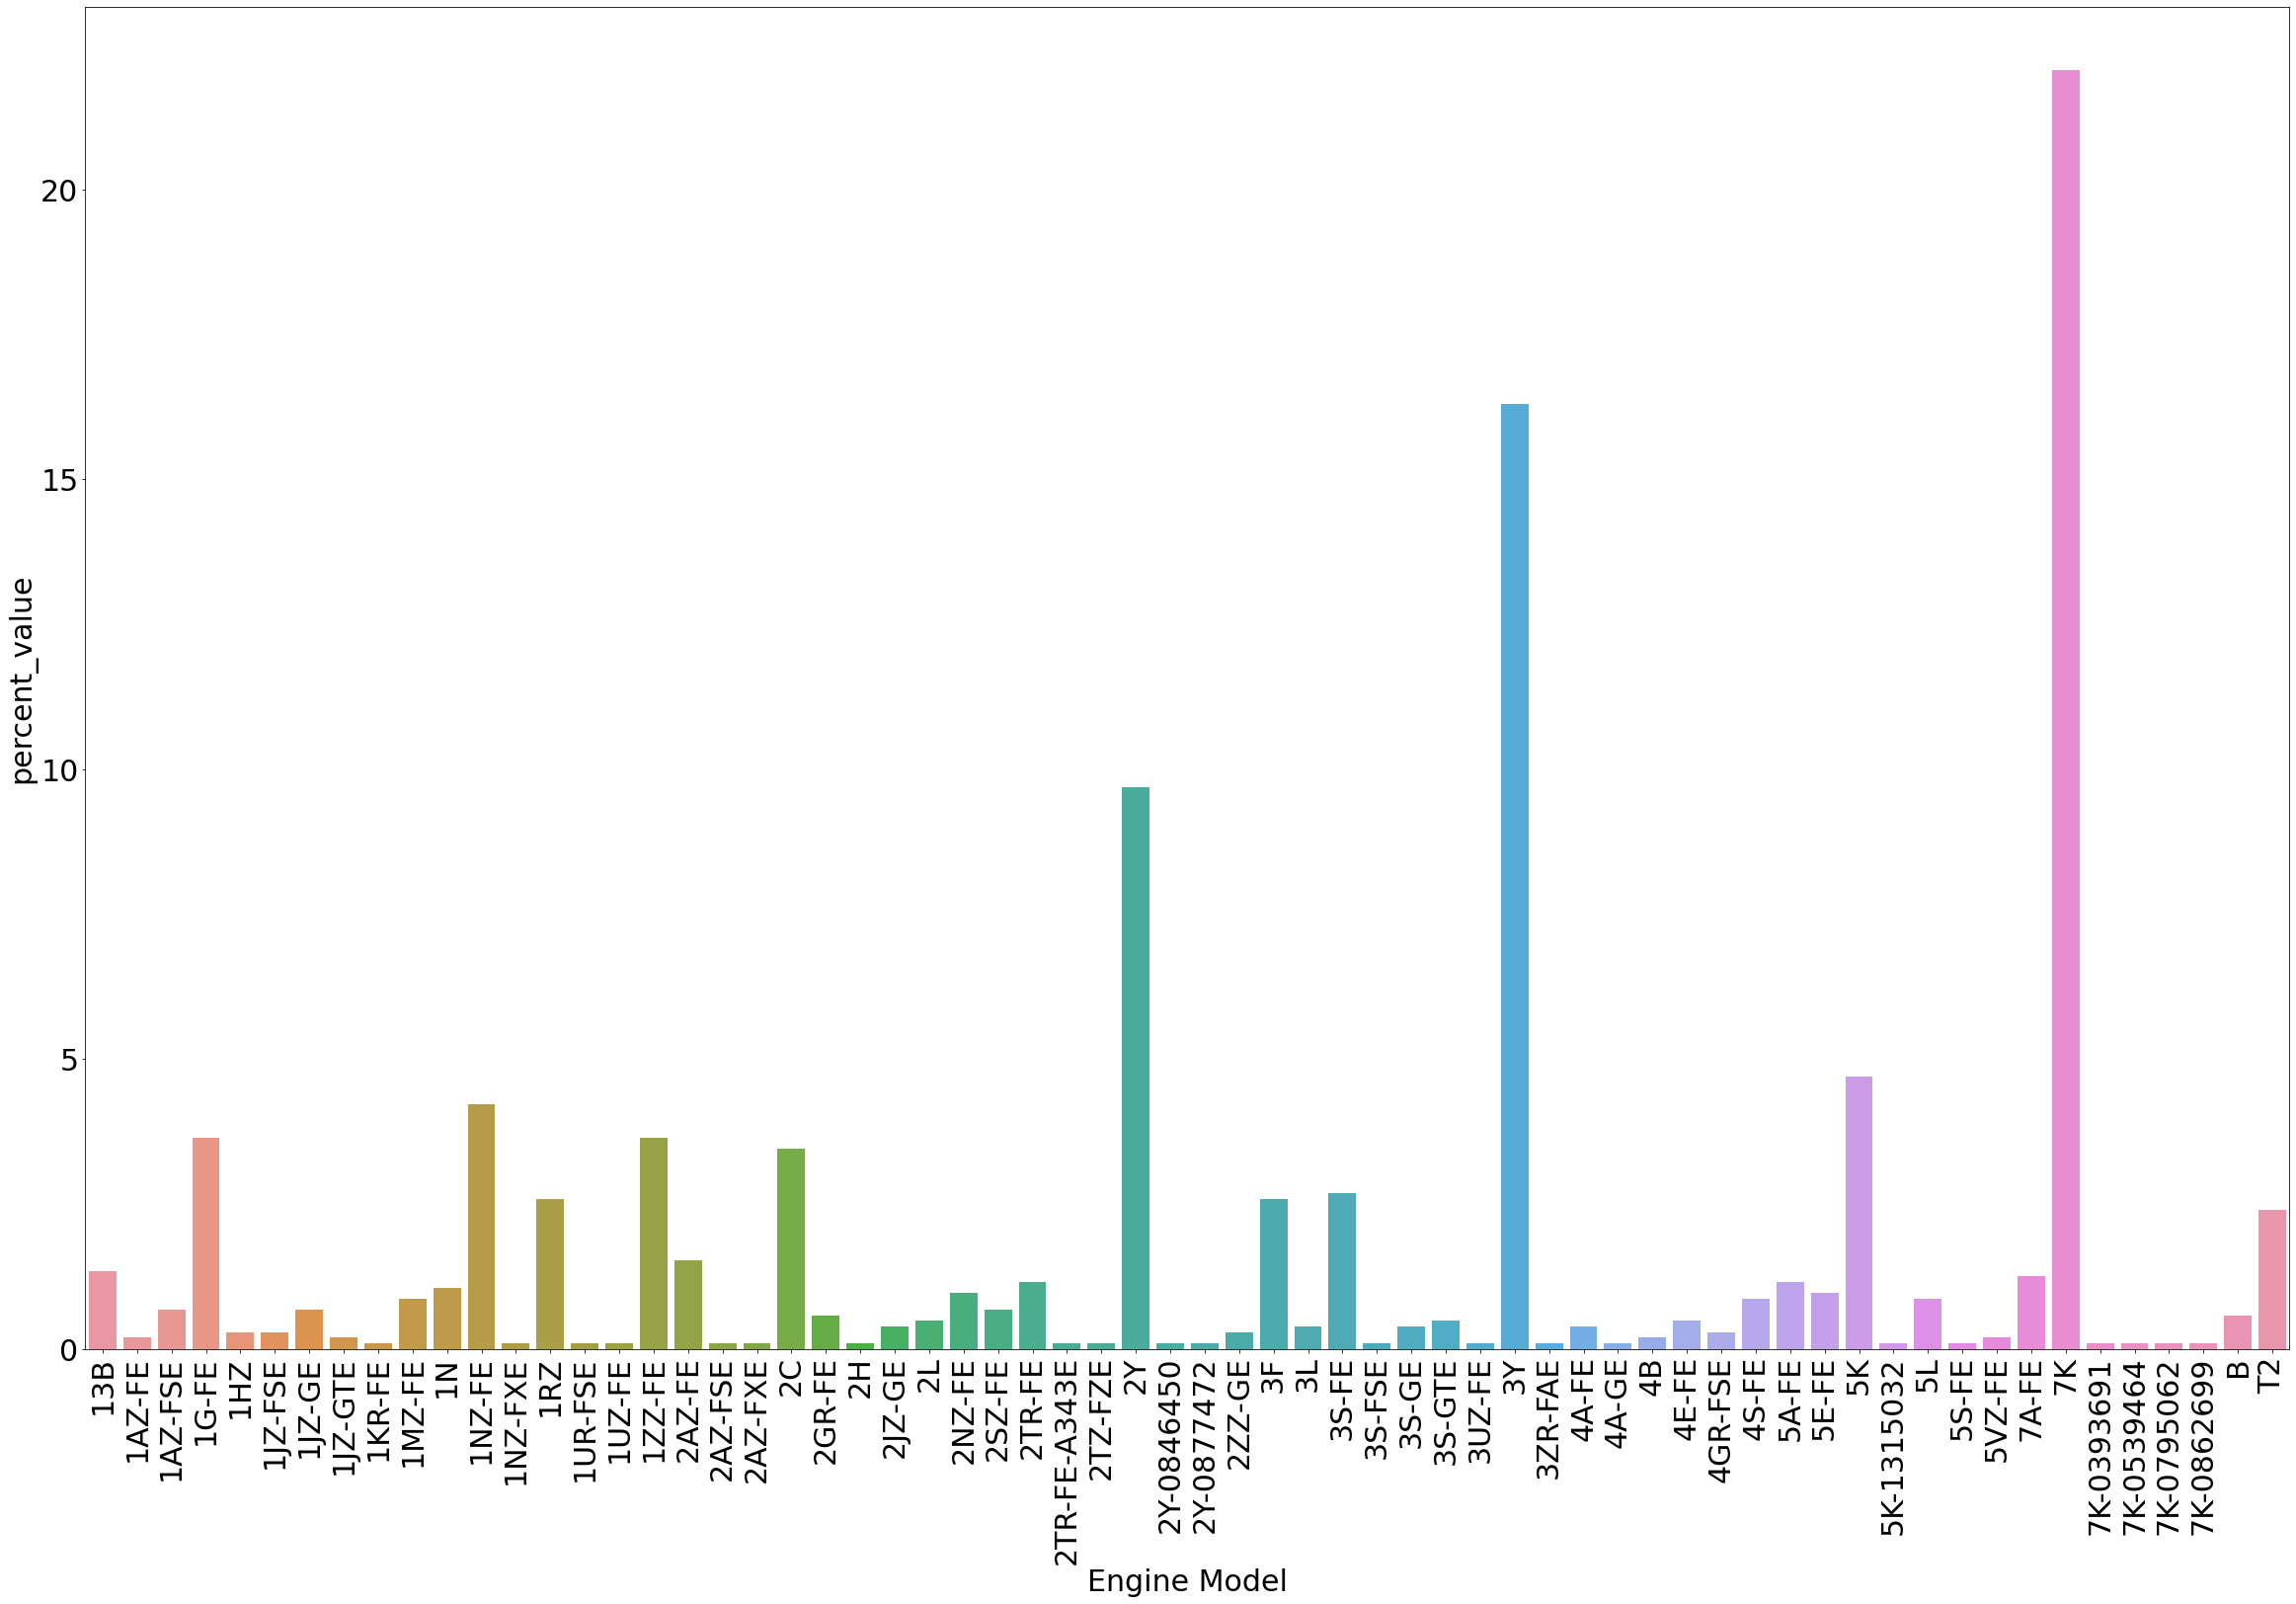

In [58]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

<ipython-input-59-d95f13a9a8e9>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_yticklabels(p.get_yticks(), size = 40)
<ipython-input-59-d95f13a9a8e9>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  q.set_yticklabels(q.get_yticks(), size = 40)


Text(0.5, 0, 'Engine Model')

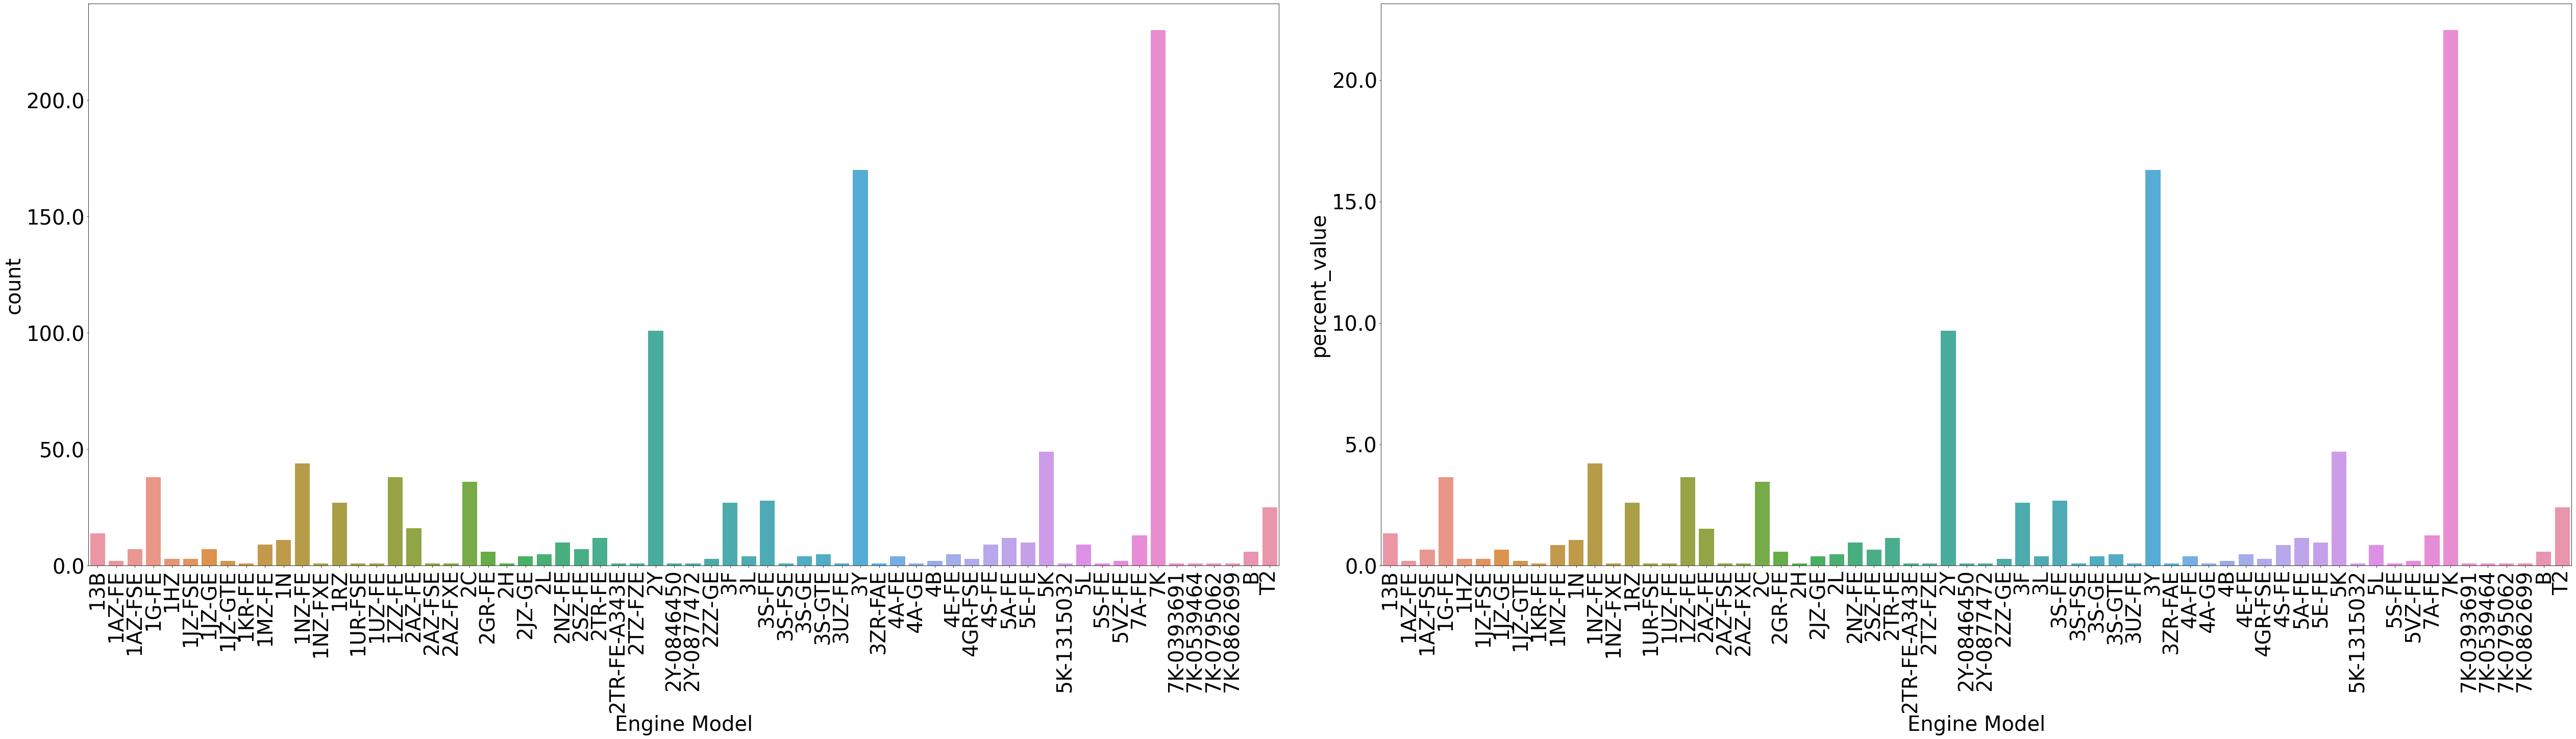

In [59]:
fig, axs = plt.subplots(1, 2, sharex=False, figsize=(70, 20),constrained_layout=True)
p = sns.barplot(x = 'Engine Model',y = 'count',data=df_freq_toyota,ax=axs[0])
q = sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota,ax=axs[1])
p.set_xticklabels(p.get_xticklabels(),size =40,rotation = 90)
q.set_xticklabels(q.get_xticklabels(),size =40,rotation = 90)
p.set_yticklabels(p.get_yticks(), size = 40)
q.set_yticklabels(q.get_yticks(), size = 40)
p.set_ylabel("count",fontsize = 40)
q.set_ylabel("percent_value",fontsize = 40)
p.set_xlabel("Engine Model",fontsize = 40)
q.set_xlabel("Engine Model",fontsize = 40)

# Visualization Mazda

In [325]:
df_mazda = df_merged[df_merged.Producer.str.contains('MAZDA')]
df_mazda

Register Date     HS Code  \
12        2011-01-18  8407343009   
22        2011-01-27  8407343009   
27        2011-01-12  8407343009   
28        2011-01-12  8407343009   
38        2011-01-12  8407343009   
...              ...         ...   
257607    2019-12-01  8407343009   
257760    2019-12-01  8407343009   
257761    2019-12-01  8407343009   
259182    2019-12-01  8407343009   
259186    2019-12-01  8407343009   

                                      Product Description  \
12      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...   
22      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...   
27      БЕНЗИНОВЫЕ ДВИГАТЕЛИ ДЛЯ А/М, РАБОЧИМ ОБЪЕМОМ ...   
28      ДВИГАТЕЛЬ А/М Б/У БЕНЗИН С ОБЪЕМОМ БОЛЕЕ 1000С...   
38      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ВОЗВРАТНО-ПОС...   
...                                                   ...   
257607  БЕНЗИНОВЫЕ ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИС...   
257760  ДВИГАТЕЛЬ БЕНЗ.БЫВ,В УП.В СБОРЕ С НАВЕСНЫМ ОБО...   
257761  ДВИГАТЕЛЬ БЕНЗ.БЫВ,В УП.В СБОРЕ С НАВЕСНЫМ ОБО...   
259182  ПОРШНЕВОЙ ДВИГАТЕЛЬ ВНУТРЕННЕГО СГОРАНИЯ С ИСК...   
259186  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                                                 Producer  \
12      HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...   
22       HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, TOYOTA   
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...   
28          HONDA,MAZDA,MITSUBISHI,NISSAN,TOYOTA,DAIHATSU   
38       TOYOTA, NISSAN, MITSUBISHI, MAZDA, HONDA, SUBARU   
...                                                   ...   
257607                            MAZDA MOTOR CORPORATION   
257760                            MAZDA MOTOR CORPORATION   
257761                            MAZDA MOTOR CORPORATION   
259182                                  MAZDA MOTOR CORP.   
259186                           MAZDA MOTOR CORPORATION.   

                                                    Brand Place of Receipt  \
12      HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...             КОБЕ   
22       HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, TOYOTA             КОБЕ   
27      DAIHATSU, HONDA, SUBARU, MAZDA, MITSUBISHI, NI...      ВЛАДИВОСТОК   
28          HONDA,MAZDA,MITSUBISHI,NISSAN,TOYOTA,DAIHATSU           ХАКАТА   
38       TOYOTA, NISSAN, MITSUBISHI, MAZDA, HONDA, SUBARU      ВЛАДИВОСТОК   
...                                                   ...              ...   
257607                                              MAZDA           NAGOYA   
257760                                              MAZDA        ВОСТОЧНЫЙ   
257761                                              MAZDA        ВОСТОЧНЫЙ   
259182                                              MAZDA        ВОСТОЧНЫЙ   
259186                                             MAZDA.             КОБЭ   

       Country of Origin               Country of Sales  \
12        JP, JPN, Japan                 JP, JPN, Japan   
22        JP, JPN, Japan                 JP, JPN, Japan   
27        JP, JPN, Japan                 JP, JPN, Japan   
28        JP, JPN, Japan                 JP, JPN, Japan   
38        JP, JPN, Japan                 JP, JPN, Japan   
...                  ...                            ...   
257607    JP, JPN, Japan  AE, ARE, United Arab Emirates   
257760    JP, JPN, Japan                 JP, JPN, Japan   
257761    JP, JPN, Japan                 JP, JPN, Japan   
259182    JP, JPN, Japan                 JP, JPN, Japan   
259186    JP, JPN, Japan                 JP, JPN, Japan   

                                 Shipper   \
12                       J-TRADE CO., LTD   
22                       J-TRADE CO., LTD   
27                  KAIHO SANGYO CO., LTD   
28                  МАРУКО ШОДЖИ КО., ЛТД   
38                     SEAPARTS CO., LTD.   
...                                   ...   
257607                  FRIEND SHOJI INC.   
257760                     3R CORPORATION   
257761                     3R CORPORATION   
259182      

In [326]:
list_all_engine_model_mazda_GTO_filter = []

for des in df_mazda['Product Description'].tolist():
    list_em = extract_engine_model(des,list_mazda)
    if len(list_em) !=0:
     list_all_engine_model_mazda_GTO_filter.append(list_em)
    
list_all_engine_model_mazda_GTO_filter

[['FE-943620'],
 ['G5-206157'],
 ['YF-210212'],
 ['B5-217046'],
 ['F8-258832'],
 ['GY-320358'],
 ['FE-970151'],
 ['F8-255572'],
 ['F8-269004'],
 ['G5-209150'],
 ['F8-228199', 'F8-316878'],
 ['F8-59019', 'FE-31034'],
 ['F8-260588'],
 ['B5-236648'],
 ['B6-448404'],
 ['F8-571742'],
 ['G6-080010'],
 ['B6-273607'],
 ['G6-188815'],
 ['GY-221473'],
 ['GY-222882'],
 ['B5-219484'],
 ['13B-472259'],
 ['GY-269884', 'GY-405355'],
 ['FE-986908'],
 ['E5-732530', 'F8-512289'],
 ['B5-219125', 'J5-144188'],
 ['FE-450181'],
 ['FE-980888'],
 ['F8-585676', 'R2-868441'],
 ['GY-282628', 'GY-252489'],
 ['B5-522120', 'B5-521658', 'GY-280607'],
 ['YF-21525'],
 ['B5-366020',
  'F8-527714',
  'F8-574587',
  'F8-260857',
  'F8-577743',
  'F8-525880'],
 ['G6-216230'],
 ['J5-147995'],
 ['B5-223791'],
 ['GY-257339'],
 ['XA-41848'],
 ['GY-241165', 'GY-226525', 'GY-207166'],
 ['FE-980393'],
 ['B6-545379', 'FE-260799'],
 ['F8-294572'],
 ['B5-363885', 'E5-755234', 'FE-984439'],
 ['F8-323149'],
 ['GY-278282'],
 ['F8-5315

In [327]:
len(list_all_engine_model_mazda_GTO_filter)

1155

In [328]:
chain_list_em_mazda = list(chain(*list_all_engine_model_mazda_GTO_filter))
len(chain_list_em_mazda)

1541

In [329]:
list_mazda_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_mazda))
# list_mazda_remove_tail = list(map(lambda x :split_str(x) ,list_mazda_remove_tail))

In [330]:
df_list_mazda_remove_tail = pd.DataFrame({'Engine Model':list_mazda_remove_tail})
df_list_mazda_remove_tail

Engine Model
0              FE
1              G5
2              YF
3              B5
4              F8
...           ...
1536           F8
1537           L8
1538           GY
1539           B5
1540           B5

[1541 rows x 1 columns]

In [331]:
df_freq_mazda = df_list_mazda_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_mazda ['percent_value']  = round(df_freq_mazda ['count']/df_freq_mazda ['count'].sum()*100,2)
df_freq_mazda

Engine Model  count  percent_value
0           13B     64           4.15
1           B3E      2           0.13
2            B5    218          14.15
3     B5-219734      1           0.06
4            B6     44           2.86
5            BP     15           0.97
6     BP-292428      1           0.06
7            E5      4           0.26
8            F8    462          29.98
9      F8-60915      2           0.13
10    F8-727785      1           0.06
11         F8-E      4           0.26
12           FE    177          11.49
13        FP-DE      1           0.06
14        FS-DE      1           0.06
15           G5     28           1.82
16           G6     39           2.53
17           GY    269          17.46
18        GY-DE      1           0.06
19           HA      8           0.52
20           J5     38           2.47
21        L3-DE      1           0.06
22       L3-VDT      2           0.13
23        L5-VE      3           0.19
24           L8     21           1.36
25        LF-DE      1           0.06
26           R2     19           1.23
27           RF     13           0.84
28           SL      5           0.32
29           VS      4           0.26
30           WL     13           0.84
31           XA      1           0.06
32           YF     76           4.93
33        ZJ-VE      1           0.06
34        ZL-VE      1           0.06

In [332]:
df_freq_mazda.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
8            F8    462          29.98
17           GY    269          17.46
2            B5    218          14.15
12           FE    177          11.49
32           YF     76           4.93

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

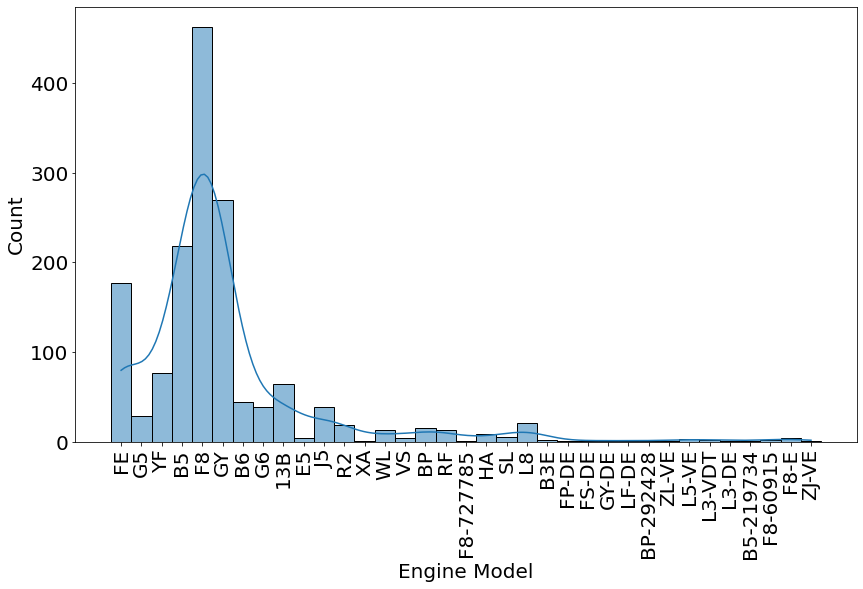

In [333]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize = 20,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel(ylabel = 'Count',fontsize = 20)
sns.histplot(data=list_mazda_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

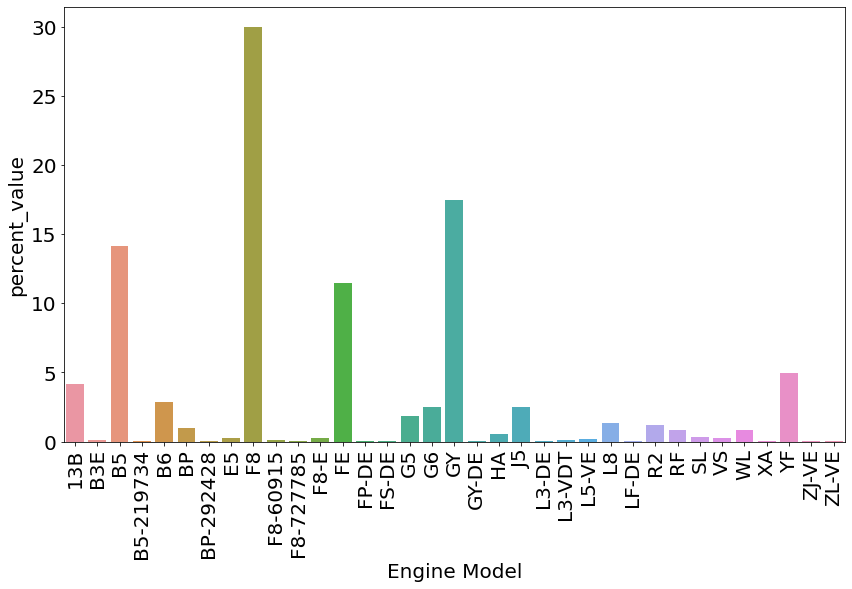

In [335]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize = 20,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel(ylabel = 'Count',fontsize = 20)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_mazda)

# Visualization Mitsubishi

In [270]:
df_mitsubishi = df_merged[df_merged.Producer.str.contains('MITSUBISHI')]
df_mitsubishi

Register Date     HS Code  \
8         2011-01-13  8407343009   
9         2011-01-13  8407343009   
12        2011-01-18  8407343009   
16        2011-01-21  8407343009   
17        2011-01-24  8407343009   
...              ...         ...   
259138    2019-12-01  8407343009   
259140    2019-12-01  8407343009   
259158    2019-12-01  8407343009   
259177    2019-12-01  8407343009   
259185    2019-12-01  8407343009   

                                      Product Description  \
8       ЗАП.ЧАСТИ ДЛЯ А/М, Б/У ДВИГАТЕЛЯ С АККП ЯПОНСК...   
9       ЗАП.ЧАСТИ ДЛЯ А/М, Б/У ДВИГАТЕЛЯ С АКП ЯПОНСКО...   
12      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...   
16      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ АВТОМОБИЛЬНЫЕ С...   
17      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ АВТОМОБИЛЬНЫЕ С...   
...                                                   ...   
259138  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЫВШИЕ В УПОТРЕ...   
259140  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
259158  ПОРШНЕВОЙ ДВИГАТЕЛЬ ВНУТРЕННЕГО СГОРАНИЯ С ИСК...   
259177  ДВИГАТЕЛЬ ОТ А/М Б/У С АКП ,БЕНЗИНОВЫЙ ОБЪЕМОМ...   
259185  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                                                 Producer  \
8                                TOYOTA,MITSUBISHI,NISSAN   
9                                TOYOTA,MITSUBISHI,SUZUKI   
12      HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...   
16                      TOYOTA, SUBARU, HONDA, MITSUBISHI   
17                      TOYOTA, SUBARU, HONDA, MITSUBISHI   
...                                                   ...   
259138  FUJI HEAVY INDUSTRIES CO.LTDMITSUBISHI MOTORS ...   
259140                                         MITSUBISHI   
259158  SUZUKI MOTOR CORP. FUJI HEAVY INDUSTRIES LTDMI...   
259177                                         MITSUBISHI   
259185                           MITSUBISHI MOTORS CORP..   

                                                    Brand Place of Receipt  \
8                                TOYOTA,MITSUBISHI,NISSAN      ВЛАДИВОСТОК   
9                                TOYOTA,MITSUBISHI,SUZUKI      ВЛАДИВОСТОК   
12      HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...             КОБЕ   
16                      TOYOTA, SUBARU, HONDA, MITSUBISHI      ВЛАДИВОСТОК   
17                      TOYOTA, SUBARU, HONDA, MITSUBISHI      ВЛАДИВОСТОК   
...                                                   ...              ...   
259138                                   SUBARUMITSUBISHI        ВОСТОЧНЫЙ   
259140                                         MITSUBISHI      ВЛАДИВОСТОК   
259158                                    SUZUKIMMCSUBARU        ВОСТОЧНЫЙ   
259177                                         MITSUBISHI      ВЛАДИВОСТОК   
259185                                               MMC.             КОБЭ   

       Country of Origin Country of Sales  \
8         JP, JPN, Japan   JP, JPN, Japan   
9         JP, JPN, Japan   JP, JPN, Japan   
12        JP, JPN, Japan   JP, JPN, Japan   
16        JP, JPN, Japan   JP, JPN, Japan   
17        JP, JPN, Japan   JP, JPN, Japan   
...                  ...              ...   
259138    JP, JPN, Japan   JP, JPN, Japan   
259140    JP, JPN, Japan   CN, CHN, China   
259158    JP, JPN, Japan   JP, JPN, Japan   
259177    JP, JPN, Japan   JP, JPN, Japan   
259185    JP, JPN, Japan   JP, JPN, Japan   

                                     Shipper   \
8                             ЖАПРОС КО., ЛТД   
9                             ЖАПРОС КО., ЛТД   
12                           J-TRADE CO., LTD   
16                        YAMAGIN CORPORATION   
17                        YAMAGIN CORPORATION   
...                                       ...   
259138  WEST-JAPAN AUTO RECYCLE CO.LTD (WARC)   
259140                           POPLA CO.LTD   
259158                            EK3 CO. LTD   
259177                           UNICO CO LTD   
259185      SUZUKI CHUGOKU HANBAI CORPORATION   

                                         

In [272]:
list_all_engine_model_mitsubishi_GTO_filter = []

for des in df_mitsubishi['Product Description'].tolist():
    list_em = extract_engine_model(des,list_mitsubishi)
    if len(list_em) !=0:
     list_all_engine_model_mitsubishi_GTO_filter.append(list_em)
    
list_all_engine_model_mitsubishi_GTO_filter

[['4G93-JB1495'],
 ['6G73-RH9264', '6G73-G85025'],
 ['4G93-QC6102'],
 ['4G93-KN0232'],
 ['4G15-AD0839'],
 ['6G74-CP5608'],
 ['4G63-XR3743'],
 ['6G74-CY2183', '6G74-HD5005'],
 ['4G15-YR5535', '6G74-JO9326'],
 ['6G73-G50108'],
 ['4G93-MM5009'],
 ['6G74-RP9301'],
 ['4G64-YD7787L', '4G93-PC5175'],
 ['6G74-CA0650'],
 ['4G93-GQ8731'],
 ['4G93-MT8119'],
 ['4G69-LS0465',
  '6A13-BG2644',
  '6G72-T67319',
  '6G72-BX0253',
  '6G74-BL4166',
  '6G74-T50316'],
 ['6G72-H46190', '6G74-CJ1184'],
 ['6G74-HM6242'],
 ['6G74-GY6717'],
 ['4G63-TS0340', '4G64-XD3878'],
 ['4G13-QT1162', '4G15-XR2101', '6A13-BC4369', '6A13-CC0408'],
 ['6G74-DC6704'],
 ['6G72-R14262'],
 ['6G72-AH9993', '6G72-K55163'],
 ['4G63-TE08'],
 ['4G63-SK0281', '4G63-UA4807'],
 ['6G73-L49808',
  '6G74-QG1670',
  '6G74-RJ6443',
  '6G74-TX4807',
  '6G74-RC1532',
  '6G74-LM2114'],
 ['6G74-R84421'],
 ['6G72-X24147'],
 ['6G72-XD02'],
 ['6G73-P77011'],
 ['4G15-CK7101'],
 ['6G74-CN0941'],
 ['6G74-DB8909'],
 ['4G63-YY1876'],
 ['4G63-SQ0323'],
 [

In [273]:
len(list_all_engine_model_mitsubishi_GTO_filter)

6157

In [274]:
chain_list_em_mitsubishi = list(chain(*list_all_engine_model_mitsubishi_GTO_filter))
len(chain_list_em_mitsubishi)

11281

In [275]:
list_mitsubishi_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_mitsubishi))
list_mitsubishi_remove_tail = list(map(lambda x :split_str(x) ,list_mitsubishi_remove_tail))
df_list_mitsubishi_remove_tail = pd.DataFrame({'Engine Model':list_mitsubishi_remove_tail})
df_list_mitsubishi_remove_tail

Engine Model
0             4G93
1             6G73
2             6G73
3             4G93
4             4G93
...            ...
11276         4G93
11277         4G63
11278         4G93
11279         6G73
11280         4G93

[11281 rows x 1 columns]

In [276]:
df_freq_mitsubishi = df_list_mitsubishi_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_mitsubishi ['percent_value']  = round(df_freq_mitsubishi ['count']/df_freq_mitsubishi ['count'].sum()*100,2)
df_freq_mitsubishi

Engine Model  count  percent_value
0          3A90      2           0.02
1          3G83     34           0.30
2          4A30     84           0.74
3          4A31    174           1.54
4          4A90    131           1.16
5          4A91    311           2.76
6          4B10     74           0.66
7          4B11    249           2.21
8          4B12    358           3.17
9          4D32      2           0.02
10         4D36      1           0.01
11         4D56     22           0.20
12         4D68      8           0.07
13         4DR5      1           0.01
14         4G13    261           2.31
15         4G15   1405          12.45
16         4G63   1447          12.83
17         4G64   1169          10.36
18         4G67      9           0.08
19         4G69    274           2.43
20         4G91     43           0.38
21         4G92     23           0.20
22         4G93   1972          17.48
23         4G94    469           4.16
24         4J10      7           0.06
25         4J11      1           0.01
26         4M40     19           0.17
27         4M41      3           0.03
28         4M51      1           0.01
29         6A10      1           0.01
30         6A11     16           0.14
31         6A12     91           0.81
32         6A13    271           2.40
33         6B31     22           0.20
34         6G72   1090           9.66
35         6G73    255           2.26
36         6G74    979           8.68
37           L8      2           0.02

In [277]:
df_freq_mitsubishi.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
22         4G93   1972          17.48
16         4G63   1447          12.83
15         4G15   1405          12.45
17         4G64   1169          10.36
34         6G72   1090           9.66

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

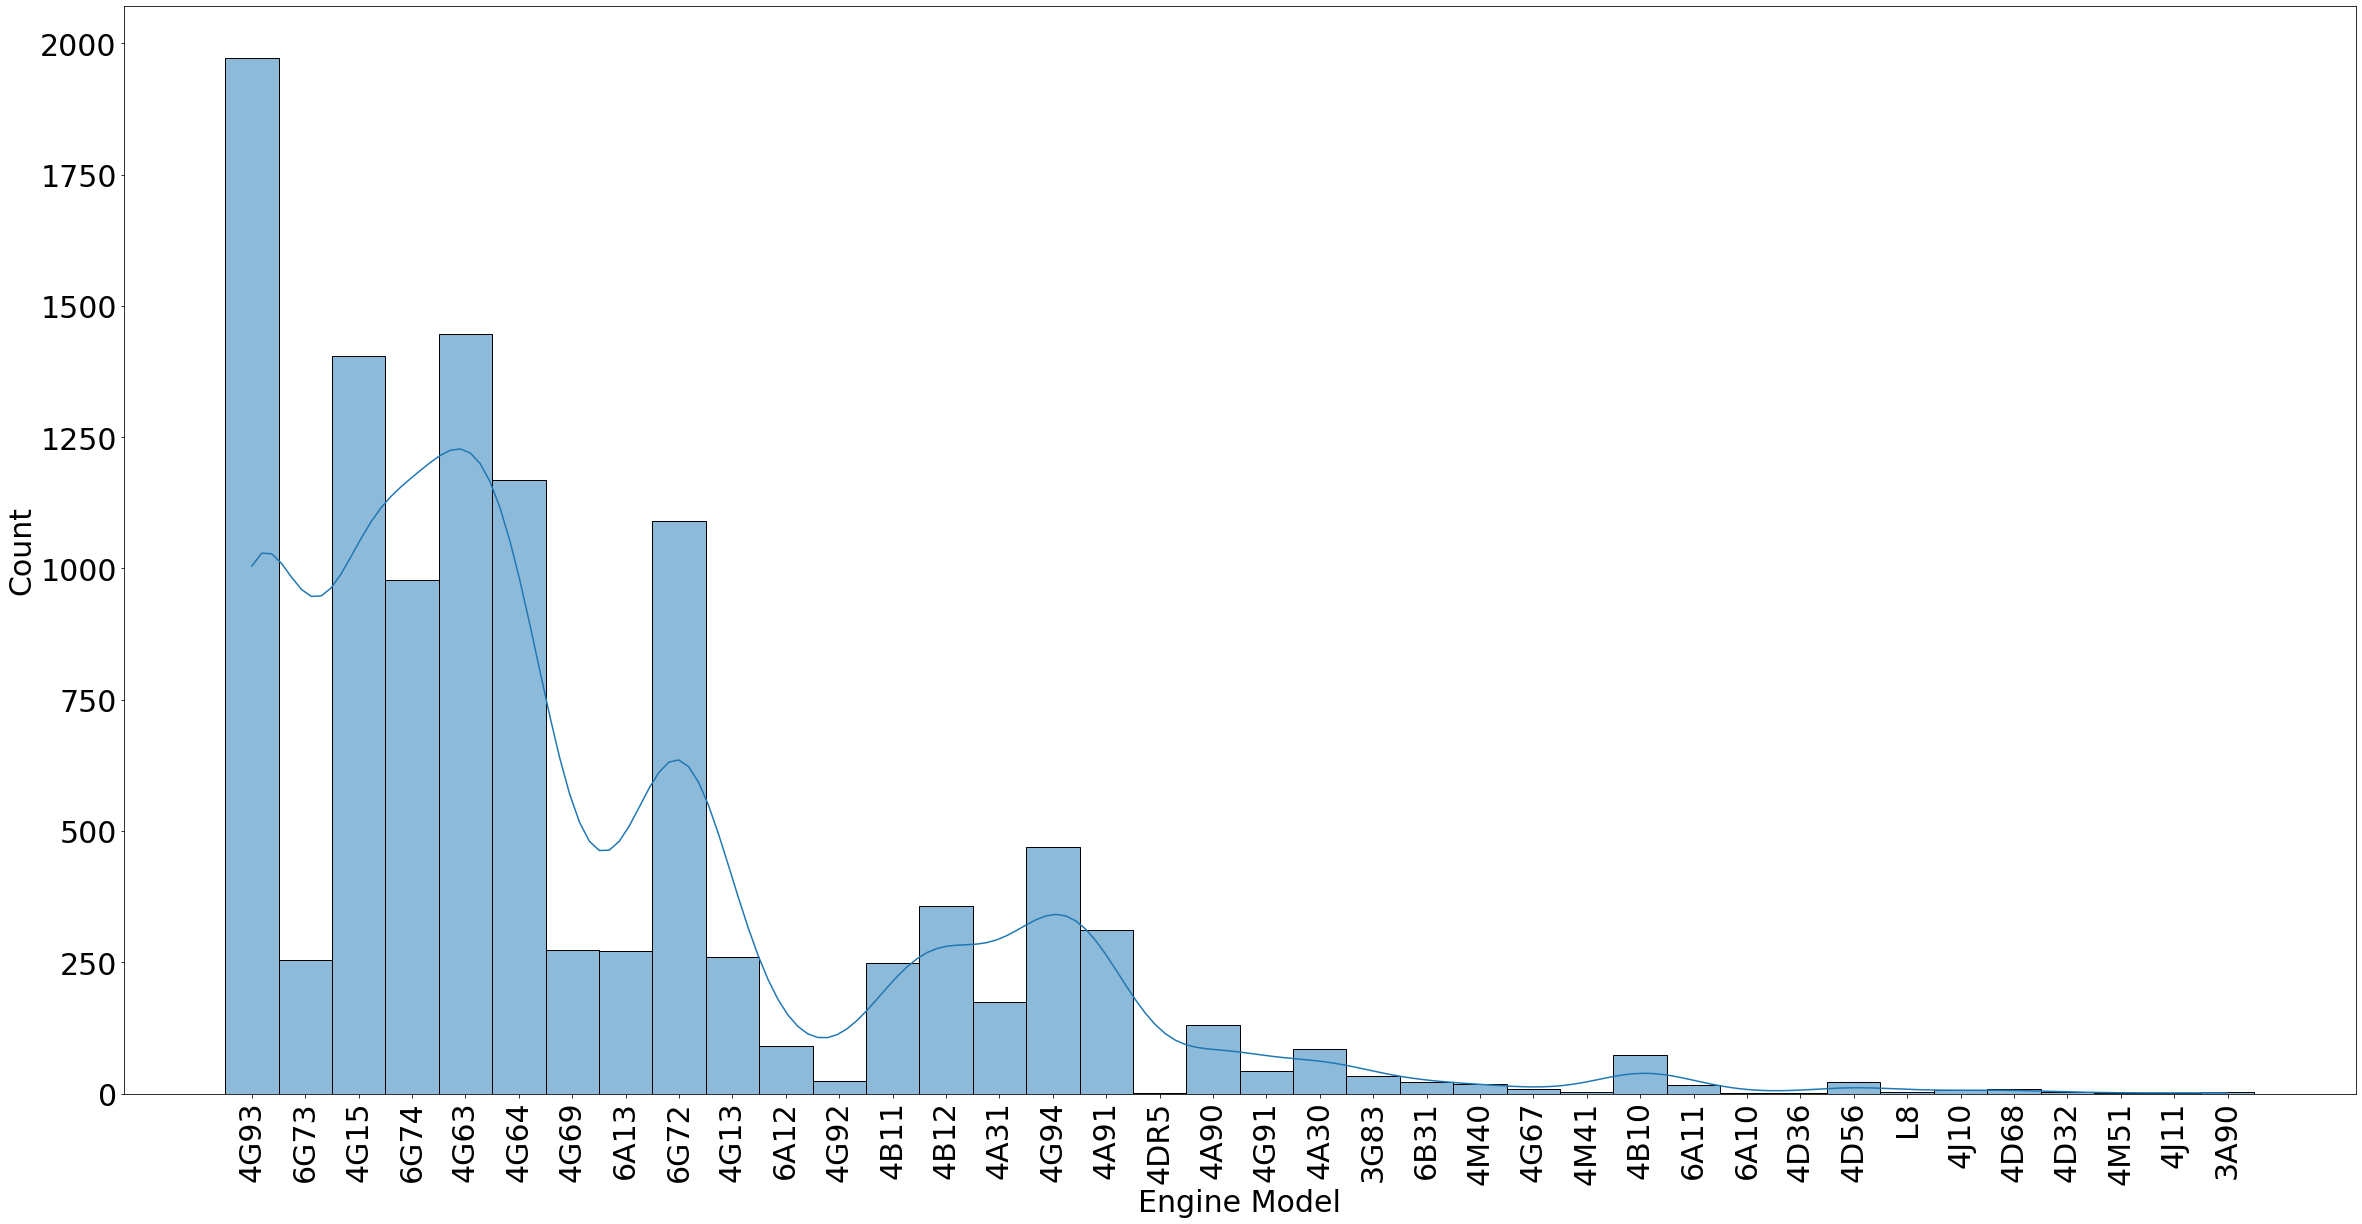

In [82]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_mitsubishi_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

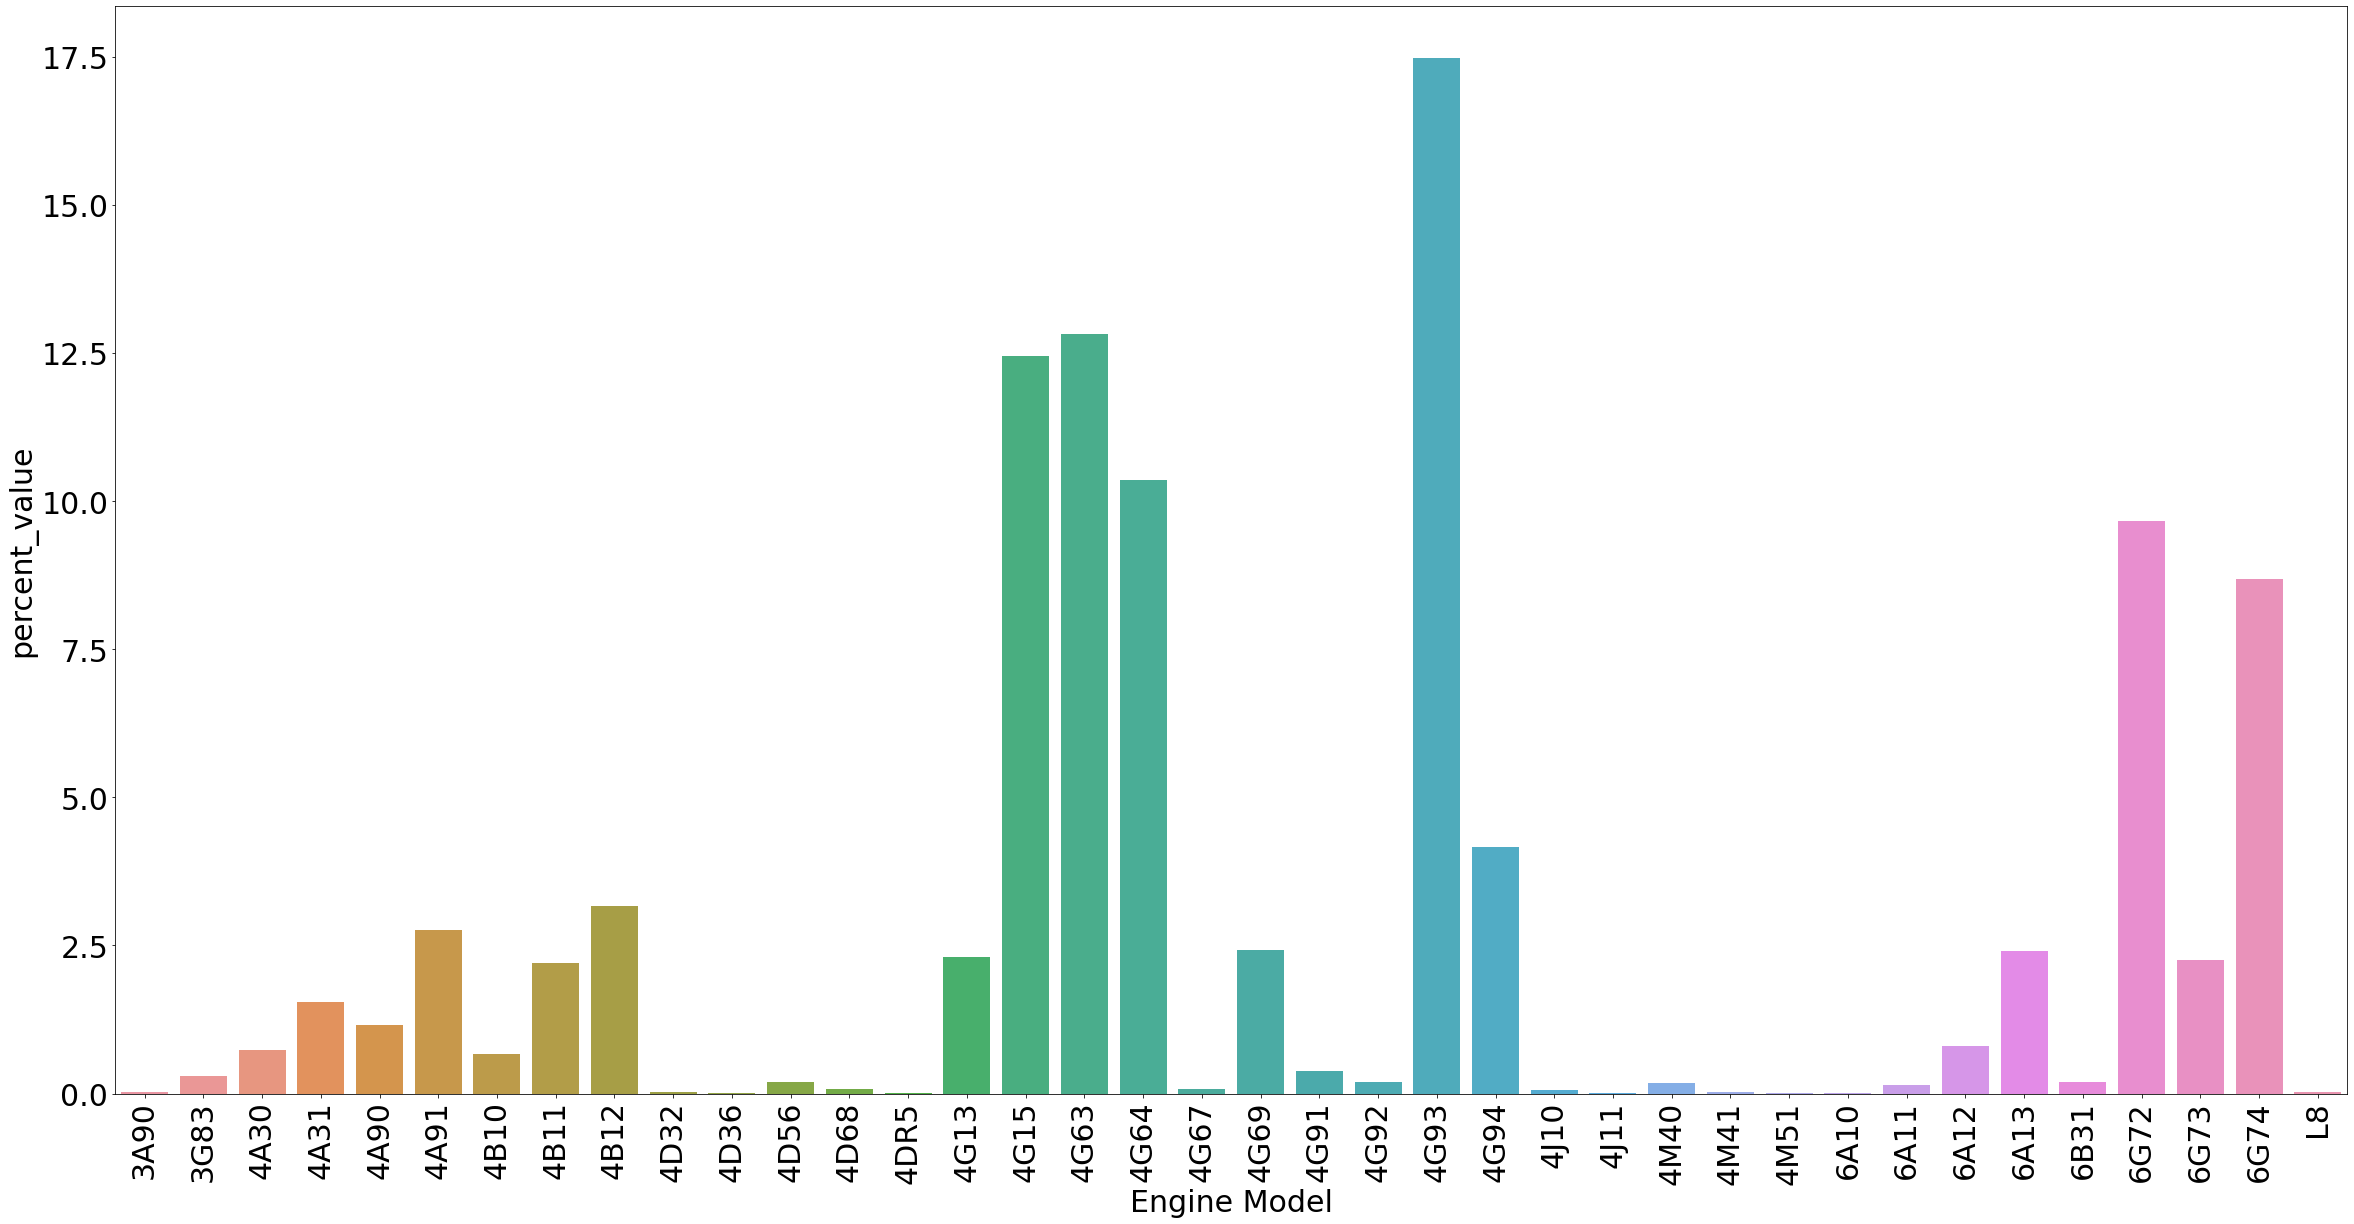

In [83]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_mitsubishi)

# Visualization Honda

In [278]:
df_honda = df_merged[df_merged.Producer.str.contains('HONDA')]
df_honda

Register Date     HS Code  \
7         2011-01-12  8407343009   
12        2011-01-18  8407343009   
16        2011-01-21  8407343009   
17        2011-01-24  8407343009   
20        2011-01-25  8407343009   
...              ...         ...   
259171    2019-12-01  8407343009   
259172    2019-12-01  8407343009   
259173    2019-12-01  8407343009   
259179    2019-12-01  8407343009   
259187    2019-12-01  8407343009   

                                      Product Description  \
7       ЗАП.ЧАСТИ ДЛЯ А/М, Б/У ДВИГАТЕЛЬ С АКП ЯПОНСКО...   
12      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...   
16      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ АВТОМОБИЛЬНЫЕ С...   
17      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ АВТОМОБИЛЬНЫЕ С...   
20      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: SUBARU...   
...                                                   ...   
259171  ЗАПАСНЫЕ ЧАСТИ ДЛЯ А/М БЫВШИЕ В УПОТРЕБЛЕНИИ: ...   
259172  ЗАПАСНЫЕ ЧАСТИ ДЛЯ А/М БЫВШИЕ В УПОТРЕБЛЕНИИ: ...   
259173  ЗАПАСНЫЕ ЧАСТИ ДЛЯ А/М БЫВШИЕ В УПОТРЕБЛЕНИИ: ...   
259179  ДВИГАТЕЛЬ ОТ А/М Б/У С АКП ,БЕНЗИНОВЫЙ ОБЪЕМОМ...   
259187  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                                                 Producer  \
7                                                   HONDA   
12      HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...   
16                      TOYOTA, SUBARU, HONDA, MITSUBISHI   
17                      TOYOTA, SUBARU, HONDA, MITSUBISHI   
20                          SUBARU, NISSAN, TOYOTA, HONDA   
...                                                   ...   
259171                                    HONDA MOTOR CO.   
259172                                    HONDA MOTOR CO.   
259173                                    HONDA MOTOR CO.   
259179                               HONDA MOTOR CO. LTD.   
259187                               HONDA MOTOR CO.LTD..   

                                                    Brand Place of Receipt  \
7                                                   HONDA      ВЛАДИВОСТОК   
12      HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...             КОБЕ   
16                      TOYOTA, SUBARU, HONDA, MITSUBISHI      ВЛАДИВОСТОК   
17                      TOYOTA, SUBARU, HONDA, MITSUBISHI      ВЛАДИВОСТОК   
20                          SUBARU, NISSAN, TOYOTA, HONDA      ВЛАДИВОСТОК   
...                                                   ...              ...   
259171                                              HONDA      ВЛАДИВОСТОК   
259172                                              HONDA      ВЛАДИВОСТОК   
259173                                              HONDA      ВЛАДИВОСТОК   
259179                                              HONDA      ВЛАДИВОСТОК   
259187                                             HONDA.             КОБЭ   

       Country of Origin Country of Sales                           Shipper   \
7         JP, JPN, Japan   JP, JPN, Japan                      JAPROS CO.LTD   
12        JP, JPN, Japan   JP, JPN, Japan                   J-TRADE CO., LTD   
16        JP, JPN, Japan   JP, JPN, Japan                YAMAGIN CORPORATION   
17        JP, JPN, Japan   JP, JPN, Japan                YAMAGIN CORPORATION   
20        JP, JPN, Japan   JP, JPN, Japan              G.E. TRADING CO., LTD   
...                  ...              ...                                ...   
259171    JP, JPN, Japan   JP, JPN, Japan               PIONEER COMPANY LTD.   
259172    JP, JPN, Japan   JP, JPN, Japan               PIONEER COMPANY LTD.   
259173    JP, JPN, Japan   JP, JPN, Japan               PIONEER COMPANY LTD.   
259179    JP, JPN, Japan   JP, JPN, Japan                       UNICO CO LTD   
259187    JP, JPN, Japan   JP, JPN, Japan  SUZUKI CHUGOKU HANBAI CORPORATION   

                                          Shipper Address  \
7       950-3102 JAPAN TOYAMA NIIGATA KEN,HIGASHIKOU,S...   
12            614-8051 КЙОТО ЯВАТА-СИТИ ЯВАТА-ЯМАДА, 67-3   
16      141-0031 SHINAGA-KU

In [279]:
list_all_engine_model_honda_GTO_filter = []

for des in df_honda['Product Description'].tolist():
    list_em = extract_engine_model(des,list_honda)
    if len(list_em) !=0:
     list_all_engine_model_honda_GTO_filter.append(list_em)
    
list_all_engine_model_honda_GTO_filter

[['J30A-6000582'],
 ['F23A-2416885'],
 ['K20A-2080249'],
 ['B20B-1161655', 'ZC-6212744'],
 ['B20B-1023753', 'G20A-2005286', 'L13A-1001826'],
 ['K24A-2508078'],
 ['C32A-2050916',
  'K20A-6012831',
  'K20A-6005371',
  'L15A-1309831',
  'L15A-1154134',
  'L15A-1100687'],
 ['B20B-3448376'],
 ['D16A-8007284', 'F23A-1203845'],
 ['D15B-800047'],
 ['D16A-9003388', 'F20B-2053760', 'F23A-1004524'],
 ['G20A-1562290'],
 ['D13B-6205175',
  'F18B-2002167',
  'F20B-2054948',
  'F20B-2704211',
  'G25A-2012486',
  'L15A-3135099'],
 ['F23A-2222976'],
 ['D16A-1706362', 'F23A-2231649'],
 ['F20B-2060623', 'F20B-2709284', 'F20B-2744821', 'K20A-2054363'],
 ['B20B-1001104',
  'D16A-8006285',
  'K20A-2012324',
  'L13A-1103797',
  'L15A-4006250'],
 ['B20B-9206163',
  'D15B-9006471',
  'F20B-2013288',
  'K24A-8000564',
  'ZC-6509616'],
 ['B20B-1102146', 'D13B-6305733'],
 ['K20A-2521945'],
 ['B20B-1014875',
  'D16A-1713866',
  'F20B-2011241',
  'F20B-2709112',
  'L13A-1132594'],
 ['D17A-2120629', 'K20A-2225083', 

In [280]:
len(list_all_engine_model_honda_GTO_filter)

8875

In [281]:
chain_list_em_honda = list(chain(*list_all_engine_model_honda_GTO_filter))
len(chain_list_em_honda)

26709

In [282]:
list_mitsubishi_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_honda))
list_mitsubishi_remove_tail = list(map(lambda x :split_str(x) ,list_mitsubishi_remove_tail))
df_list_mitsubishi_remove_tail = pd.DataFrame({'Engine Model':list_mitsubishi_remove_tail})
df_list_mitsubishi_remove_tail

Engine Model
0             J30A
1             F23A
2             K20A
3             B20B
4               ZC
...            ...
26704         D16A
26705         D15B
26706         D15B
26707         D15B
26708         D15B

[26709 rows x 1 columns]

In [283]:
df_freq_mitsubishi = df_list_mitsubishi_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_mitsubishi ['percent_value']  = round(df_freq_mitsubishi ['count']/df_freq_mitsubishi ['count'].sum()*100,2)
df_freq_mitsubishi

Engine Model  count  percent_value
0          A18A      2           0.01
1          A20A      1           0.00
2          B16A     29           0.11
3          B16B      8           0.03
4          B18B     71           0.27
5          B18C     18           0.07
6          B20B   4431          16.59
7          C32A     21           0.08
8          C35A     44           0.16
9          D13B    719           2.69
10         D15B   2577           9.65
11         D16A   2025           7.58
12         D17A   1903           7.12
13         E07A      1           0.00
14         E07Z      4           0.01
15         F18A     19           0.07
16         F18B    631           2.36
17         F20A     39           0.15
18         F20B   1326           4.96
19         F22A      9           0.03
20         F22B    587           2.20
21         F23A   2681          10.04
22         G20A    336           1.26
23         G25A    326           1.22
24         H22A    135           0.51
25         H23A    341           1.28
26         J25A    314           1.18
27         J30A    374           1.40
28         J32A    125           0.47
29         J35A    127           0.48
30         K20A   1724           6.45
31         K20B     24           0.09
32         K24A   1005           3.76
33         L13A   2443           9.15
34         L15A   1277           4.78
35          LDA    147           0.55
36          LEA     18           0.07
37          LEB     19           0.07
38          LFA      1           0.00
39         R18A    182           0.68
40         R20A    128           0.48
41         S07A      1           0.00
42           ZC    516           1.93

In [284]:
df_freq_mitsubishi.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
6          B20B   4431          16.59
21         F23A   2681          10.04
10         D15B   2577           9.65
33         L13A   2443           9.15
11         D16A   2025           7.58

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

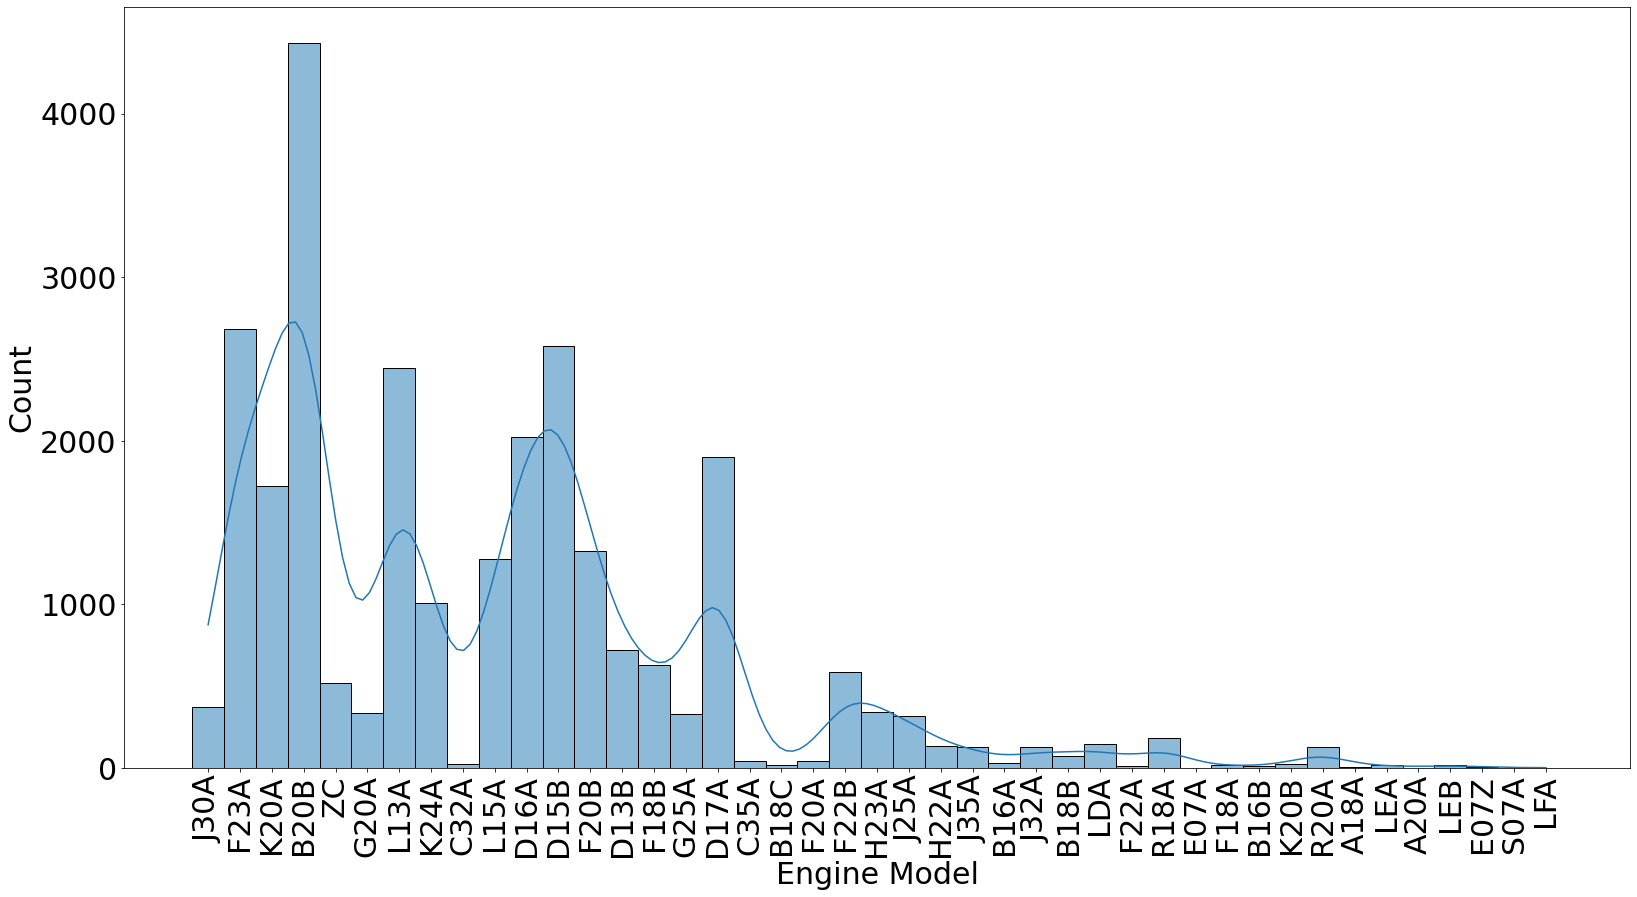

In [89]:
plt.figure(figsize=(27,14))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_mitsubishi_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

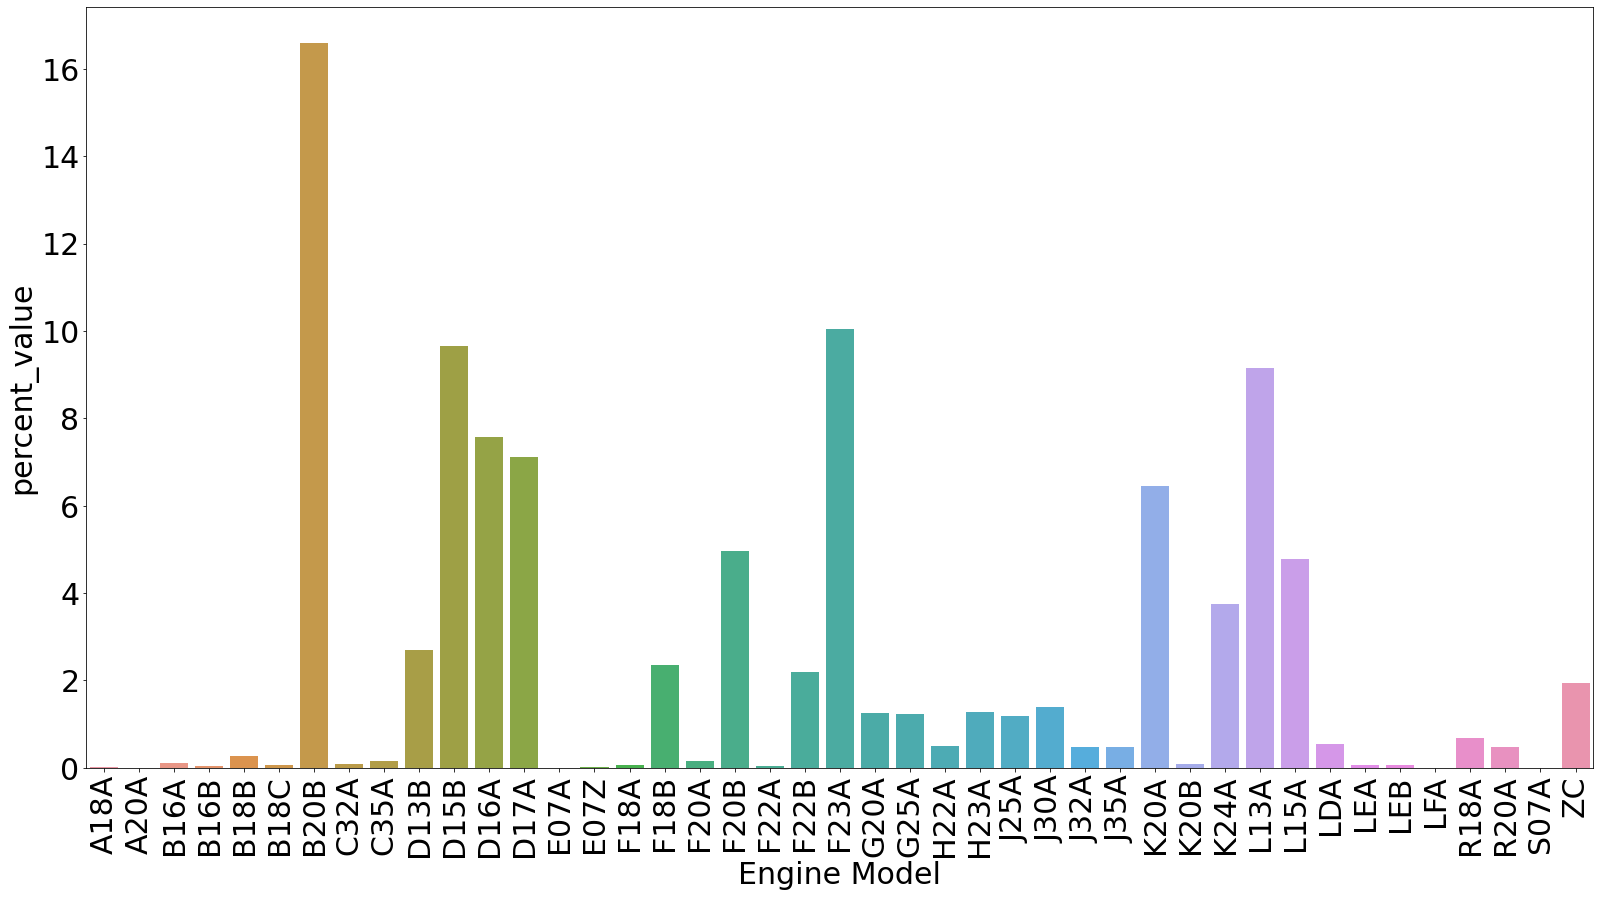

In [90]:
plt.figure(figsize=(27,14))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_mitsubishi)

# Visualization Nissan

In [292]:
df_nissan = df_merged[df_merged.Producer.str.contains('NISSAN')]
df_nissan

Register Date     HS Code  \
8         2011-01-13  8407343009   
12        2011-01-18  8407343009   
20        2011-01-25  8407343009   
21        2011-01-26  8407343009   
22        2011-01-27  8407343009   
...              ...         ...   
259146    2019-12-01  8407343009   
259147    2019-12-01  8407343009   
259178    2019-12-01  8407343009   
259181    2019-12-01  8407343009   
259184    2019-12-01  8407343009   

                                      Product Description  \
8       ЗАП.ЧАСТИ ДЛЯ А/М, Б/У ДВИГАТЕЛЯ С АККП ЯПОНСК...   
12      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...   
20      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: SUBARU...   
21      БЫВШИЕ В УПОТРЕБЛЕНИИ ЗАПАСНЫЕ ЧАСТИ ДЛЯ АВТОМ...   
22      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...   
...                                                   ...   
259146  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
259147  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
259178  ДВИГАТЕЛЬ ОТ А/М Б/У В СБОРЕ С АКП ,БЕНЗИНОВЫЙ...   
259181  ПОРШНЕВОЙ ДВИГАТЕЛЬ ВНУТРЕННЕГО СГОРАНИЯ С ИСК...   
259184  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                                                 Producer  \
8                                TOYOTA,MITSUBISHI,NISSAN   
12      HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...   
20                          SUBARU, NISSAN, TOYOTA, HONDA   
21       TOYOTA , NISSAN , SUZUKI , HONDA , MITSUBISHI...   
22       HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, TOYOTA   
...                                                   ...   
259146                                             NISSAN   
259147                                             NISSAN   
259178                           NISSAN MOTOR CORPORATION   
259181                                 NISSAN MOTOR CORP.   
259184                              NISSAN MOTOR CO.LTD..   

                                                    Brand Place of Receipt  \
8                                TOYOTA,MITSUBISHI,NISSAN      ВЛАДИВОСТОК   
12      HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...             КОБЕ   
20                          SUBARU, NISSAN, TOYOTA, HONDA      ВЛАДИВОСТОК   
21       TOYOTA , NISSAN , SUZUKI , HONDA , MITSUBISHI...      ВЛАДИВОСТОК   
22       HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, TOYOTA             КОБЕ   
...                                                   ...              ...   
259146                                             NISSAN      ВЛАДИВОСТОК   
259147                                             NISSAN      ВЛАДИВОСТОК   
259178                                             NISSAN      ВЛАДИВОСТОК   
259181                                            NISSAN.        ВОСТОЧНЫЙ   
259184                                            NISSAN.             КОБЭ   

       Country of Origin Country of Sales                           Shipper   \
8         JP, JPN, Japan   JP, JPN, Japan                    ЖАПРОС КО., ЛТД   
12        JP, JPN, Japan   JP, JPN, Japan                   J-TRADE CO., LTD   
20        JP, JPN, Japan   JP, JPN, Japan              G.E. TRADING CO., LTD   
21        JP, JPN, Japan   JP, JPN, Japan              TATSUMI SHOKAI CO.LTD   
22        JP, JPN, Japan   JP, JPN, Japan                   J-TRADE CO., LTD   
...                  ...              ...                                ...   
259146    JP, JPN, Japan   CN, CHN, China                       POPLA CO.LTD   
259147    JP, JPN, Japan   CN, CHN, China                       POPLA CO.LTD   
259178    JP, JPN, Japan   JP, JPN, Japan                       UNICO CO LTD   
259181    JP, JPN, Japan   JP, JPN, Japan                        EK3 CO. LTD   
259184    JP, JPN, Japan   JP, JPN, Japan  SUZUKI CHUGOKU HANBAI CORPORATION   

                                          Shipper Address  \
8       950-3102 ДЖАПАН МАЙДЗУРУ НИИГАТА КЕН,НИГАШИКОУ...   
12            614-8051 КЙОТО ЯВАТА-СИТИ ЯВАТА-ЯМАДА, 67-3   
20      476-0003 АИЧИ ТОАКА

In [293]:
list_all_engine_model_nissan_GTO_filter = []

for des in df_nissan['Product Description'].tolist():
    list_em = extract_engine_model(des,list_nissan)
    if len(list_em) !=0:
     list_all_engine_model_nissan_GTO_filter.append(list_em)
    
list_all_engine_model_nissan_GTO_filter

[['RB20-253129B'],
 ['Z16-725689X'],
 ['TD27-066556T'],
 ['Z16-25366'],
 ['Z16-704420X'],
 ['NA16-70'],
 ['RB20-156199B'],
 ['RB20-254530B'],
 ['RB20-130563B'],
 ['A15-376848A'],
 ['RB20-267001B'],
 ['RB20-215648B'],
 ['NA20-003150W'],
 ['SR20DET-535083A'],
 ['RB20-8630567'],
 ['NA16-707715X', 'RB20-136033B'],
 ['NA20-833933'],
 ['RB20-956110A'],
 ['RB20-972604A'],
 ['RB20-118135B'],
 ['RB20-752453'],
 ['TD27-076491A'],
 ['RB20-030290B', 'RB20-206552B'],
 ['TD27-076491A'],
 ['RB20-048617A'],
 ['RB20-25712'],
 ['RB20-173595B'],
 ['RB20-244526B'],
 ['Z16-298877'],
 ['RB20-109482B'],
 ['NA20-907268X'],
 ['RB20-003793B'],
 ['RB20-144982B'],
 ['A15-409264A',
  'RB20-218293B',
  'RB20-258526B',
  'RB20-669979A',
  'RB20-185773B'],
 ['NA20-853886'],
 ['RB20-709488X'],
 ['RB20-226582B'],
 ['RB20-233621B', 'RB20-223556B'],
 ['NA20-763699X'],
 ['RB20-212166B', 'RB20-863056A'],
 ['RB20-269031B'],
 ['Z20-605136'],
 ['RB20-220816B'],
 ['RB20-2448551B'],
 ['CD20-389196X'],
 ['RB20-948166A'],
 ['NA20

In [294]:
len(list_all_engine_model_nissan_GTO_filter)

982

In [295]:
chain_list_em_nissan = list(chain(*list_all_engine_model_nissan_GTO_filter))
len(chain_list_em_nissan)

1224

In [296]:
list_nissan_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_nissan))
list_nissan_remove_tail = list(map(lambda x :split_str(x) ,list_nissan_remove_tail))
df_list_nissan_remove_tail = pd.DataFrame({'Engine Model':list_nissan_remove_tail})
df_list_nissan_remove_tail

Engine Model
0            RB20
1             Z16
2            TD27
3             Z16
4             Z16
...           ...
1219       VQ20DE
1220       QG15DE
1221       QG15DE
1222       QG15DE
1223       VQ20DE

[1224 rows x 1 columns]

In [301]:
df_freq_nissan = df_list_nissan_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_nissan ['percent_value']  = round(df_freq_nissan ['count']/df_freq_nissan ['count'].sum()*100,2)
df_freq_nissan

Engine Model  count  percent_value
0           A14      1           0.08
1           A15     48           3.92
2          BD30      1           0.08
3          CD17      2           0.16
4          CD20     27           2.21
..          ...    ...            ...
60      VQ37VHR      1           0.08
61          Z16     28           2.29
62          Z18      5           0.41
63          Z20     37           3.02
64          Z24      1           0.08

[65 rows x 3 columns]

In [302]:
df_freq_nissan.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
39         RB20    515          42.08
28         NA20    146          11.93
1           A15     48           3.92
33       QG15DE     42           3.43
63          Z20     37           3.02

In [303]:
df_freq_nissan.nlargest(5,['percent_value'])

Engine Model  count  percent_value
39         RB20    515          42.08
28         NA20    146          11.93
1           A15     48           3.92
33       QG15DE     42           3.43
63          Z20     37           3.02

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

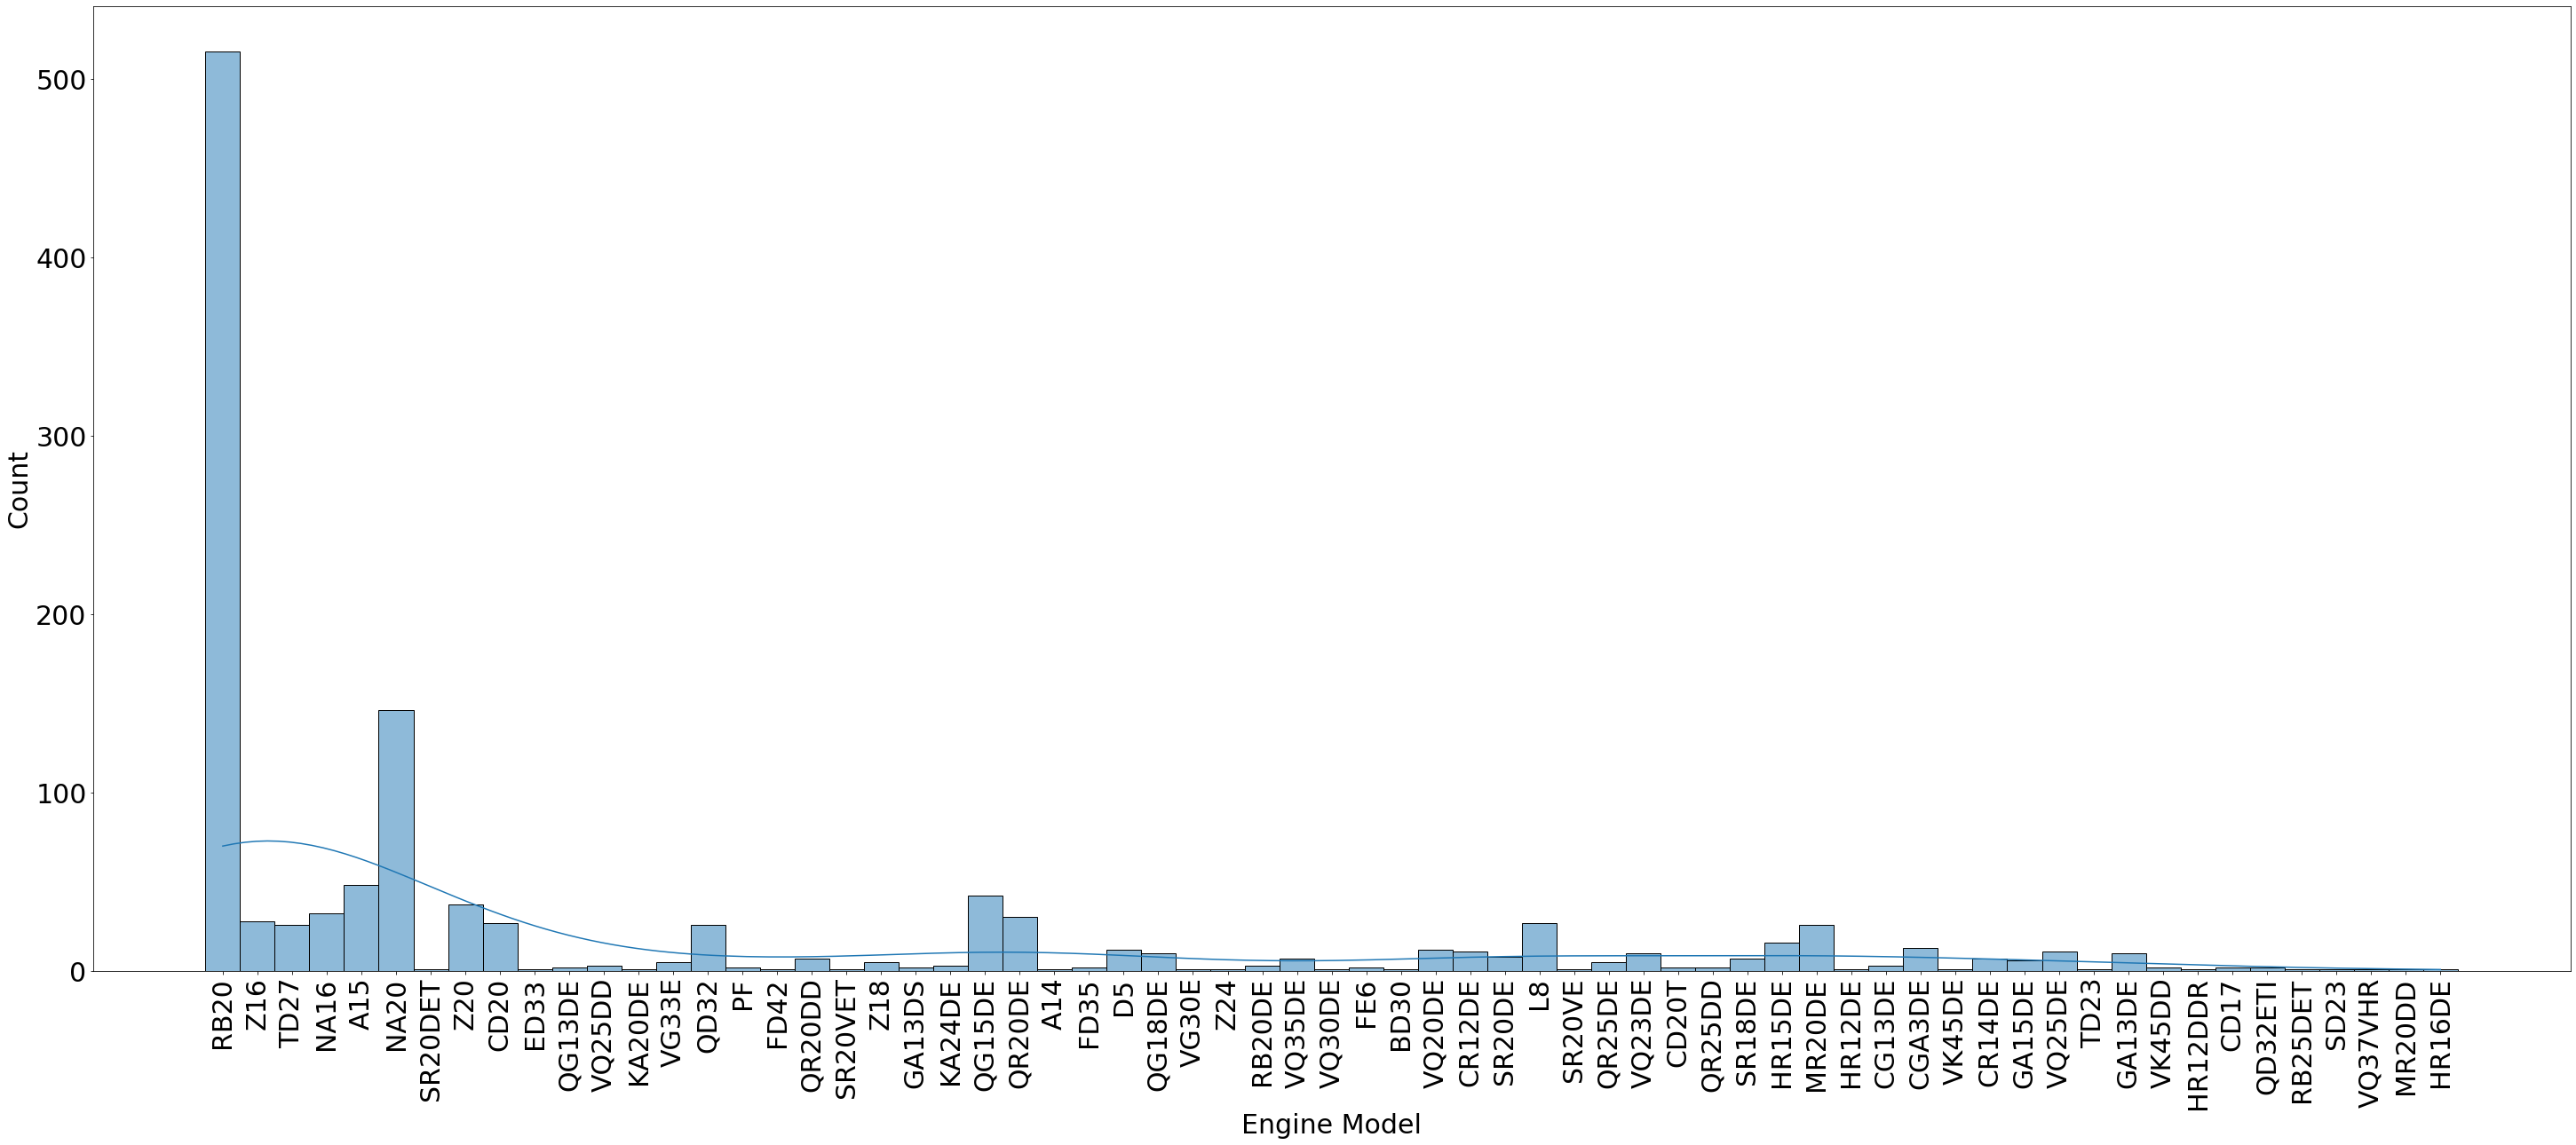

In [304]:
plt.figure(figsize=(50,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_nissan_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

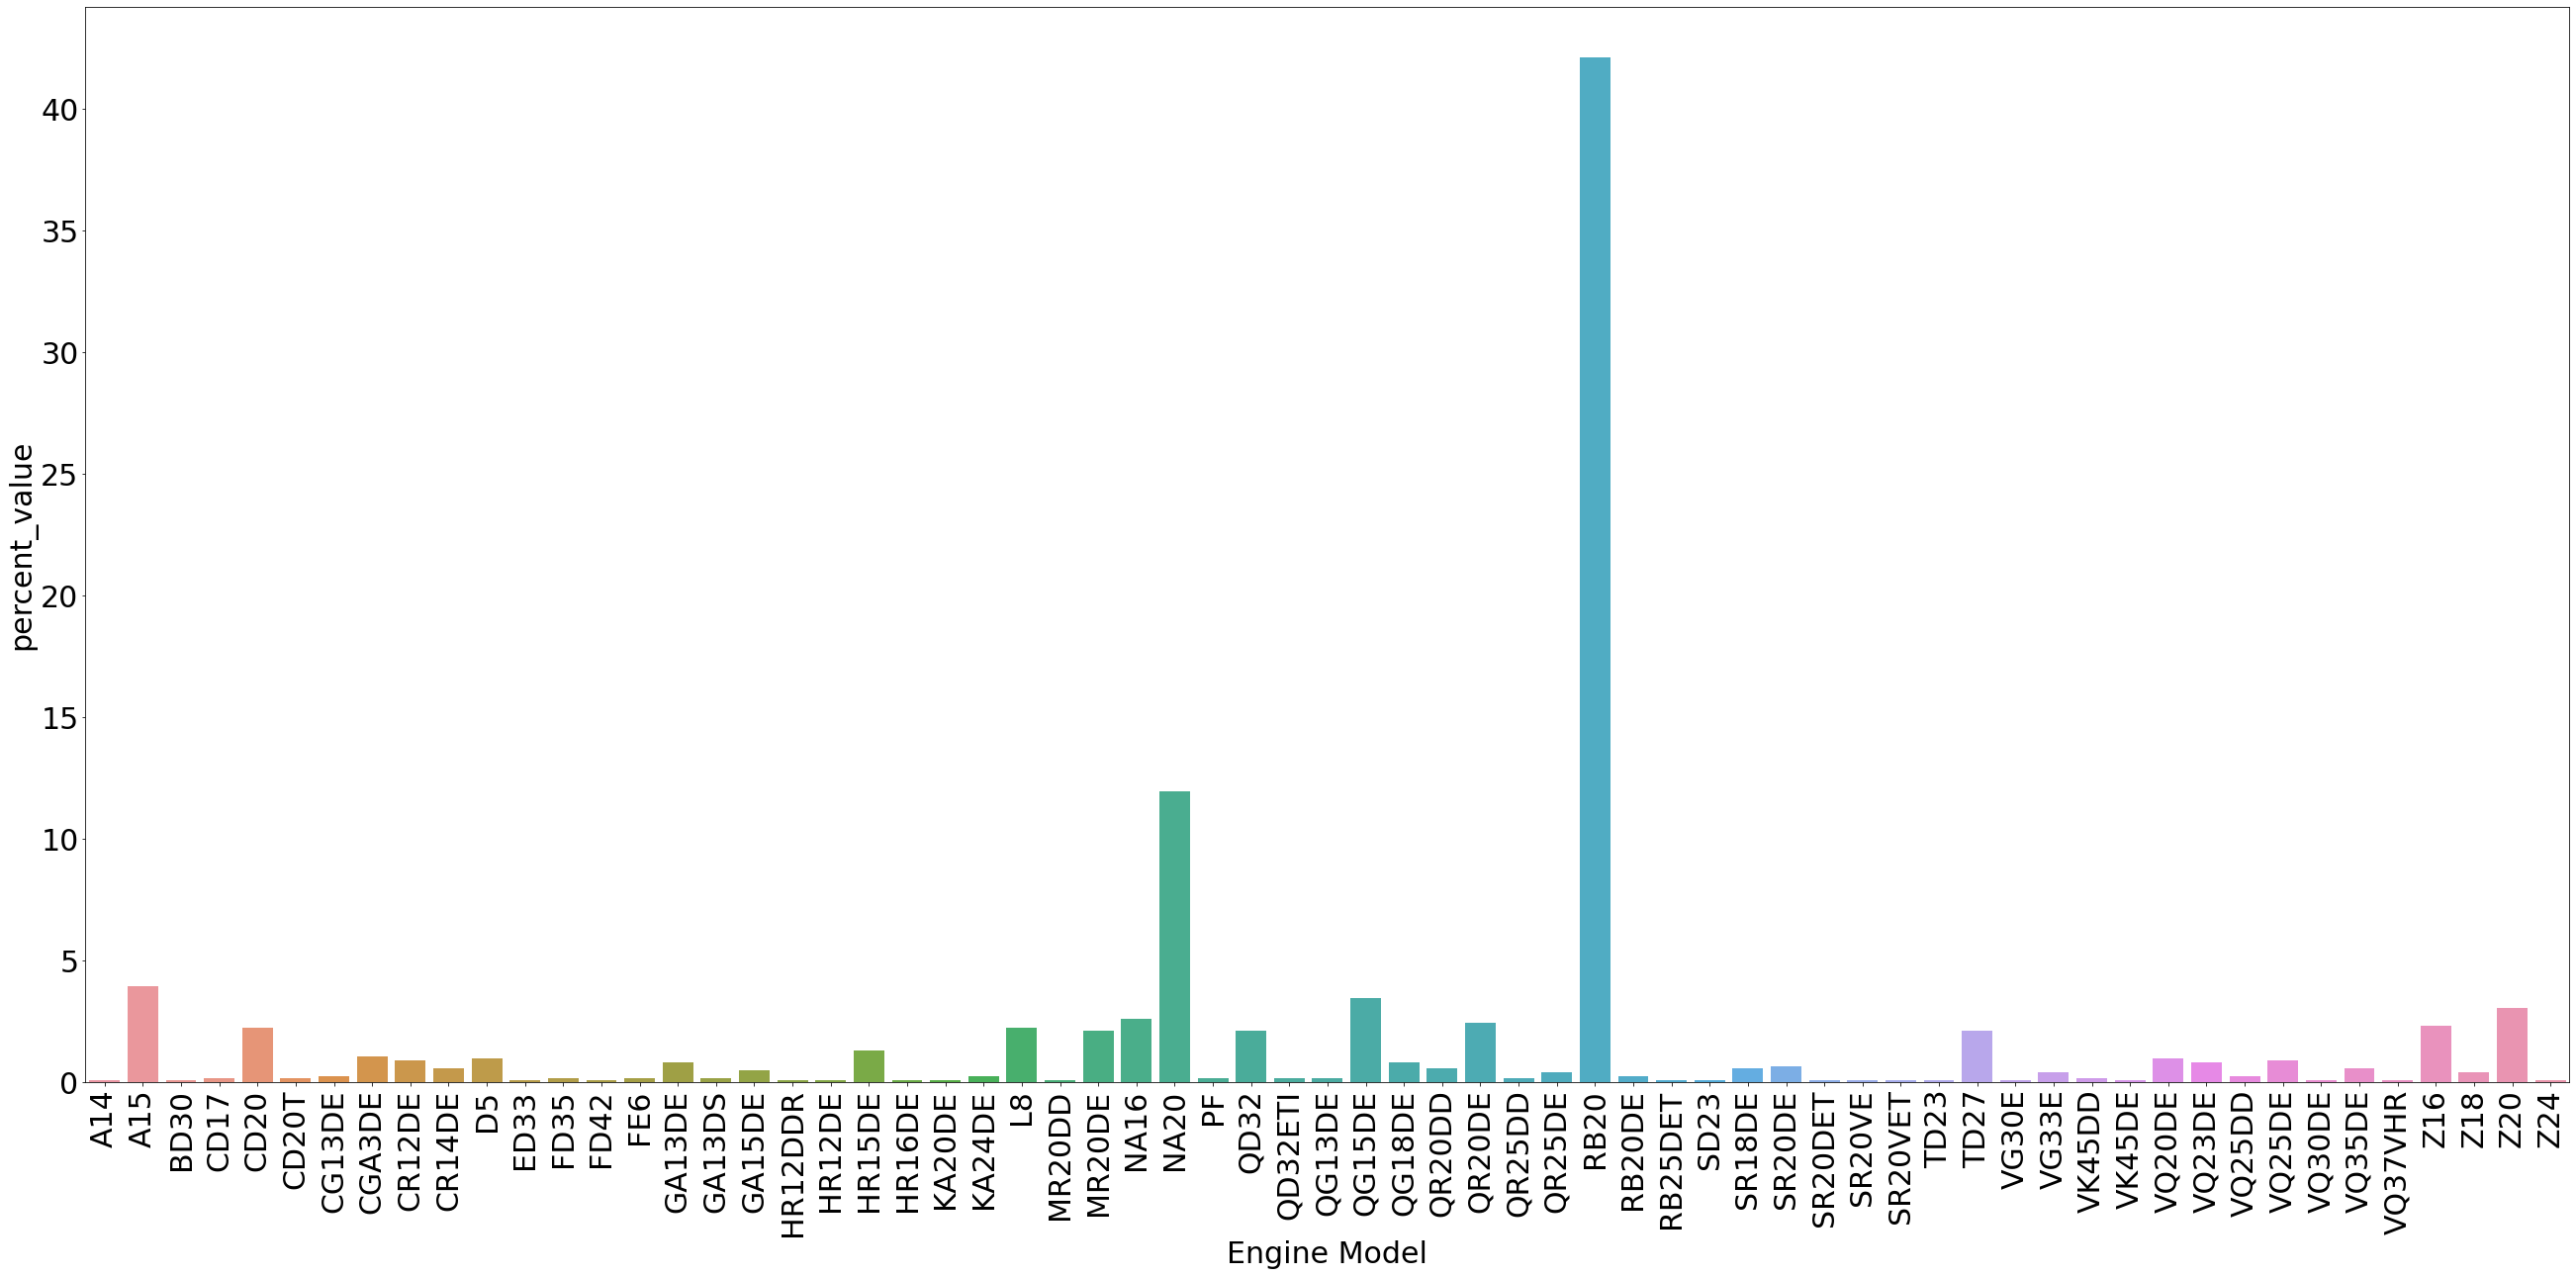

In [305]:
plt.figure(figsize=(45,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_nissan)

# Visualization Subaru

In [306]:
df_subaru = df_merged[df_merged.Producer.str.contains('SUBARU')]
df_subaru

Register Date     HS Code  \
5         2011-01-20  8407343009   
12        2011-01-18  8407343009   
16        2011-01-21  8407343009   
17        2011-01-24  8407343009   
20        2011-01-25  8407343009   
...              ...         ...   
259059    2019-12-01  8407343009   
259124    2019-12-01  8407343009   
259125    2019-12-01  8407343009   
259126    2019-12-01  8407343009   
259159    2019-12-01  8407343009   

                                      Product Description  \
5       ДВИГАТЕЛИ БЕНЗИНОВЫЕ С ИСКРОВЫМ ЗАЖИГАНИЕМ И В...   
12      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: HONDA,...   
16      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ АВТОМОБИЛЬНЫЕ С...   
17      ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ АВТОМОБИЛЬНЫЕ С...   
20      ДВС ОТ А/М, Б/У, В СБОРЕ С КПП, БЕНЗИН: SUBARU...   
...                                                   ...   
259059  ДВИГАТЕЛЬ ОТ А/М Б/У С АКП ,БЕНЗИНОВЫЙ ОБЪЕМОМ...   
259124  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
259125  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
259126  ЗАП.ЧАСТИ ДЛЯ АВТОМОБИЛЕЙ, Б/У: ДВИГАТЕЛИ БЫВШ...   
259159  ДВИГАТЕЛЬ ОТ А/М Б/У С АКП ,БЕНЗИНОВЫЙ ОБЪЕМОМ...   

                                                 Producer  \
5                                                  SUBARU   
12      HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...   
16                      TOYOTA, SUBARU, HONDA, MITSUBISHI   
17                      TOYOTA, SUBARU, HONDA, MITSUBISHI   
20                          SUBARU, NISSAN, TOYOTA, HONDA   
...                                                   ...   
259059                                    SUBARU DAIHATSU   
259124                                             SUBARU   
259125                                             SUBARU   
259126                                             SUBARU   
259159                                    SUBARU DAIHATSU   

                                                    Brand Place of Receipt  \
5                                                  SUBARU   ТОЯМА НЬЮ ПОРТ   
12      HONDA, MAZDA, MITSUBISHI, NISSAN, SUBARU, SUZU...             КОБЕ   
16                      TOYOTA, SUBARU, HONDA, MITSUBISHI      ВЛАДИВОСТОК   
17                      TOYOTA, SUBARU, HONDA, MITSUBISHI      ВЛАДИВОСТОК   
20                          SUBARU, NISSAN, TOYOTA, HONDA      ВЛАДИВОСТОК   
...                                                   ...              ...   
259059                                    SUBARU DAIHATSU      ВЛАДИВОСТОК   
259124                                             SUBARU      ВЛАДИВОСТОК   
259125                                             SUBARU      ВЛАДИВОСТОК   
259126                                             SUBARU      ВЛАДИВОСТОК   
259159                                    SUBARU DAIHATSU      ВЛАДИВОСТОК   

       Country of Origin    Country of Sales                      Shipper   \
5         JP, JPN, Japan      JP, JPN, Japan  METAL AUTO HOKURIKU CO., LTD   
12        JP, JPN, Japan      JP, JPN, Japan              J-TRADE CO., LTD   
16        JP, JPN, Japan      JP, JPN, Japan           YAMAGIN CORPORATION   
17        JP, JPN, Japan      JP, JPN, Japan           YAMAGIN CORPORATION   
20        JP, JPN, Japan      JP, JPN, Japan         G.E. TRADING CO., LTD   
...                  ...                 ...                           ...   
259059    JP, JPN, Japan      JP, JPN, Japan                  UNICO CO LTD   
259124    JP, JPN, Japan  SG, SGP, Singapore        GLOBAL-EYE CORPORATION   
259125    JP, JPN, Japan  SG, SGP, Singapore        GLOBAL-EYE CORPORATION   
259126    JP, JPN, Japan  SG, SGP, Singapore        GLOBAL-EYE CORPORATION   
259159    JP, JPN, Japan      JP, JPN, Japan                  UNICO CO LTD   

                                          Shipper Address  \
5            ISHIKAWA KEN KOMATSU SHI SHIRAE MACHI, RO 62   
12            614-8051 КЙОТО ЯВАТА-СИТИ ЯВАТА-ЯМАДА, 67-3   
16      141-0031 SHINAGA-KU TOKYO DAI-ICHI SEIMEI B

In [307]:
list_all_engine_model_subaru_GTO_filter = []

for des in df_subaru['Product Description'].tolist():
    list_em = extract_engine_model(des,list_subaru)
    if len(list_em) !=0:
     list_all_engine_model_subaru_GTO_filter.append(list_em)
    
list_all_engine_model_subaru_GTO_filter

[['EJ20-660933', 'EJ20-B490533'],
 ['EJ25-701920'],
 ['EJ20-A893668'],
 ['EJ20-974764'],
 ['EJ25-B03464'],
 ['EJ20-B13916', 'EJ20-A888010'],
 ['EJ20-A955836'],
 ['EJ20-687452'],
 ['EJ25-034578'],
 ['EL15-C961912'],
 ['EJ18-201500'],
 ['EJ20-B947799'],
 ['EJ20-B906541'],
 ['EJ20-561972', 'EJ20-724904', 'EJ20-B235179'],
 ['EJ20-209586'],
 ['EJ18-719996', 'EJ20-921387', 'EJ20-327893', 'EJ20-719960'],
 ['EJ20-B464790'],
 ['EJ20-B135886'],
 ['EJ20-B624055'],
 ['EJ20-B181420',
  'EJ20-B548102',
  'EJ20-B091827',
  'EJ20-B565136',
  'EJ20-C191787'],
 ['EJ20-B329901'],
 ['EJ25-D579128', 'EJ25-D998634'],
 ['EJ20-B264599', 'EJ20-A656603'],
 ['EJ20-630655'],
 ['EJ20-B551637'],
 ['EJ20-862172'],
 ['EJ15-C591109', 'EJ20-C167498', 'EJ25-620615'],
 ['EJ20-B057765', 'EJ20-B891486'],
 ['EJ20-829201', 'EJ25-B004074', 'EJ25-B207921'],
 ['EJ20-C394405', 'EJ20-C605887', 'EJ20-B962504'],
 ['EJ20-78'],
 ['EJ20-C684438', 'EJ20-A834056'],
 ['EJ20-C377492'],
 ['EJ20-B533086'],
 ['EJ20-221776'],
 ['EJ20-630109F8

In [308]:
len(list_all_engine_model_subaru_GTO_filter)

3746

In [309]:
chain_list_em_subaru = list(chain(*list_all_engine_model_subaru_GTO_filter))
len(chain_list_em_subaru)

7247

In [310]:
list_subaru_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_subaru))
list_subaru_remove_tail = list(map(lambda x :split_str(x) ,list_subaru_remove_tail))
df_list_subaru_remove_tail = pd.DataFrame({'Engine Model':list_subaru_remove_tail})
df_list_subaru_remove_tail

Engine Model
0            EJ20
1            EJ20
2            EJ25
3            EJ20
4            EJ20
...           ...
7242         EJ20
7243         EJ20
7244         EJ15
7245         FB20
7246         FB20

[7247 rows x 1 columns]

In [311]:
df_freq_mitsubishi = df_list_subaru_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_mitsubishi ['percent_value']  = round(df_freq_mitsubishi ['count']/df_freq_mitsubishi ['count'].sum()*100,2)
df_freq_mitsubishi

Engine Model  count  percent_value
0          EJ15    545           7.52
1          EJ18    119           1.64
2          EJ20   5028          69.38
3          EJ22      5           0.07
4          EJ25    905          12.49
5          EL15    207           2.86
6          EN07      5           0.07
7          EZ30    321           4.43
8          FB16     16           0.22
9          FB20     81           1.12
10         FB25     15           0.21

In [312]:
df_freq_mitsubishi.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
2         EJ20   5028          69.38
4         EJ25    905          12.49
0         EJ15    545           7.52
7         EZ30    321           4.43
5         EL15    207           2.86

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

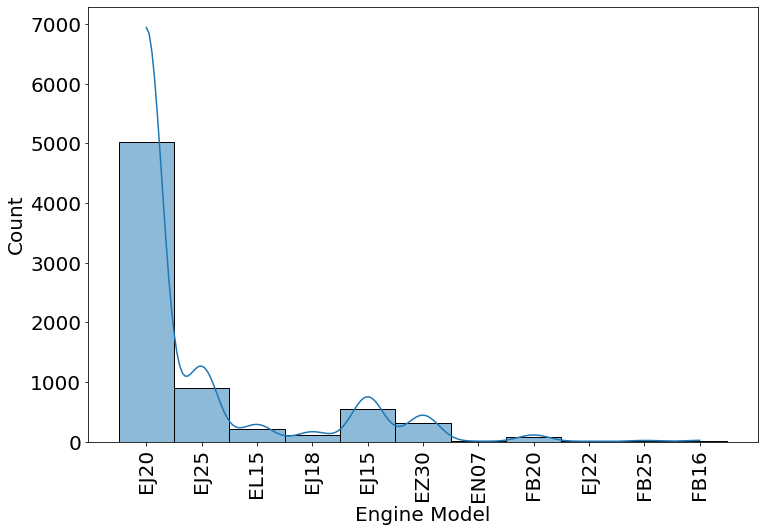

In [112]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 20,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel(ylabel = 'Count',fontsize = 20)
sns.histplot(data=list_subaru_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

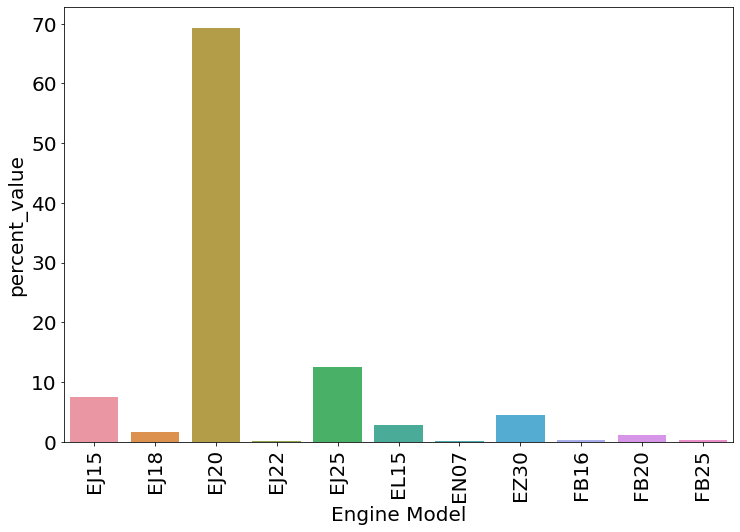

In [113]:
plt.figure(figsize=(12,8))
plt.xticks(fontsize = 20,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 20)
plt.yticks(fontsize = 20)
plt.ylabel(ylabel = 'Count',fontsize = 20)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_mitsubishi)

# Dữ liệu GTO từ Nhật Bản

In [342]:
df_GTO_Japan  = pd.read_csv('GTO_JAPAN_engine.csv')

D:\Software\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [343]:
df_GTO_Japan

Register Date     HS Code  \
0         2018-01-01  8407343009   
1         2018-01-01  8407349908   
2         2018-01-01  8407343009   
3         2018-01-01  8407343009   
4         2018-01-01  8407343009   
...              ...         ...   
100539    2016-12-01  8407343009   
100540    2016-12-01  8407343009   
100541    2016-12-01  8407343009   
100542    2016-12-01  8407343009   
100543    2016-12-01  8407343009   

                                      Product Description  \
0       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
1       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
2       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
3       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
4       ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
...                                                   ...   
100539  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100540  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100541  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100542  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100543  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                                Producer                   Brand  \
0                                 SUZUKI                  SUZUKI   
1                MAZDA MOTOR CORPORATION                   MAZDA   
2                 DAIHATSU,SUBARU,SUZUKI  DAIHATSU,SUBARU,SUZUKI   
3                    TOYOTA MOTOR CORP.                   TOYOTA   
4                                 TOYOTA                  TOYOTA   
...                                  ...                     ...   
100539               HONDA MOTOR CO. LTD                   HONDA   
100540           HONDA MOTOR CORPORATION                   HONDA   
100541  SUBARU-FUJI HEAVY INDUSTRIES LTD                  SUBARU   
100542                   HONDA MOTOR CO.                   HONDA   
100543          TOYOTA MOTOR CORPORATION                  TOYOTA   

       Place of Receipt Country of Origin Country of Sales  \
0           ВЛАДИВОСТОК    JP, JPN, Japan   JP, JPN, Japan   
1                ПОХАНГ    JP, JPN, Japan   JP, JPN, Japan   
2           ВЛАДИВОСТОК    JP, JPN, Japan   JP, JPN, Japan   
3           ВЛАДИВОСТОК    JP, JPN, Japan   JP, JPN, Japan   
4           ВЛАДИВОСТОК    JP, JPN, Japan   JP, JPN, Japan   
...                 ...               ...              ...   
100539        ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   
100540        ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   
100541        ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   
100542        ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   
100543        ВОСТОЧНЫЙ    JP, JPN, Japan   JP, JPN, Japan   

                                                 Shipper   \
0                                        EARLYBIRD CO.LTD   
1       PACIFIC LOGISTIC KOREA LTD. O/B OF MAZDA MOTOR...   
2                                         ASTRADE CO.,LTD   
3                                    YAMAGIN CORPORATION    
4                                           ARAI CO., LTD   
...                                                   ...   
100539                                      SHIJO TRADING   
100540  EAST-JAPAN RECYCLING RESOURCES CO.,LTD 21-1 SH...   
100541                                      SCP-TRANS LLC   
100542                               KAIHO SANGYO CO.,LTD   
100543                                  O.M.AUTO CO.,LTD.   

                                          Shipper Address  ...  \
0                  JAPAN, TOYAMA-SHI, IWASE, SUWAMACHI 52  ...   
1       , SEOUL, SEONGDONG-GU, 902 ACE HIGHEND SEONGSU...  ...   
2                  , , OSAKA, 1-4-9, SHIMAMACHI, CHYUO-KU  ...   
3       , JAPAN, TOKYO, DAIICHI SEIMEI BLDG,8F,2-19-3 ...  ...   
4       671-1132, HYOGO, HIMEJI CITY, KANBEI CHO OHTSU...  ...   
...                                                   ...  ...   
100539        SHIZUOKA 418-0022 2150-2 KOIZUMI FUJINOMIYA  ...   
100540            

In [344]:
for col in list(df_GTO_Japan.columns):
 (df_GTO_Japan[col].dtype ==  'object') and (df_GTO_Japan[col].fillna(value='unknown',inplace = True)) or (df_GTO_Japan[col].fillna(value=0, inplace = True))

# Toyota

In [345]:
df_toyota = df_GTO_Japan[df_GTO_Japan.Producer.str.contains('TOYOTA')]

In [346]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_toyota['Product Description'].tolist():
    list_em = extract_engine_model(des,list_toyota)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['2C-3633170'],
 ['1AZ-FSE-4295017', '1AZ-FSE-4899029'],
 ['1ZZ-FE-1193440', '5A-FE-G626241'],
 ['1AZ-FSE-4741684', '1KR-FE-0648081'],
 ['2AZ-FE-1296941', '2AZ-FSE-2074864'],
 ['1AZ-FSE-4557868'],
 ['3Y-0818563'],
 ['2C-3721260'],
 ['2C-3468281'],
 ['2C-2558135'],
 ['2C-0914707'],
 ['2C-0559787'],
 ['2C-3317877'],
 ['7K-0782504'],
 ['7K-042600'],
 ['2C-3261979'],
 ['2C-3403112'],
 ['2C-Б'],
 ['2C-2458964'],
 ['2C-1202994'],
 ['2C-0890568'],
 ['2C-3059151'],
 ['7K-G908723'],
 ['2C-2604478'],
 ['2C-3687899'],
 ['7K-0314150'],
 ['3Y-1080311'],
 ['7K-0586878'],
 ['3L-3081649'],
 ['7K-O7'],
 ['5K-0485772'],
 ['13B-410820'],
 ['2Y-0824062'],
 ['7K-0853135'],
 ['3F-0315702'],
 ['5K-13265'],
 ['7K-0803497'],
 ['7K-0865976'],
 ['2Y-O861964'],
 ['3Y-1184787'],
 ['7K-0098754'],
 ['3Y-1232260', '3Y-1256560'],
 ['3Y-1147221'],
 ['3Y-1232260', '3Y-1256560'],
 ['7K-0864092'],
 ['7K-0389805'],
 ['3S-GE-9358224'],
 ['3Y-1302118'],
 ['1RZ-2754684'],
 ['7K-0853116', '7K-0819205', '7K-0853589'],
 ['T2-00

In [347]:
len(list_all_engine_model_toyota_GTO_JP_filter)

628

In [348]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
# list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [349]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0             2C
1        1AZ-FSE
2        1AZ-FSE
3         1ZZ-FE
4          5A-FE
..           ...
807       2TR-FE
808           7K
809           7K
810           2Y
811           2Y

[812 rows x 1 columns]

In [351]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0            13B      9           1.11
1         1AZ-FE      2           0.25
2        1AZ-FSE      7           0.86
3          1G-FE     30           3.69
4            1HZ      1           0.12
5        1JZ-FSE      3           0.37
6         1JZ-GE      7           0.86
7        1JZ-GTE      2           0.25
8         1KR-FE      1           0.12
9         1MZ-FE      5           0.62
10            1N     10           1.23
11        1NZ-FE     20           2.46
12       1NZ-FXE      1           0.12
13           1RZ     20           2.46
14       1UR-FSE      1           0.12
15        1ZZ-FE     19           2.34
16        2AZ-FE     11           1.35
17       2AZ-FSE      1           0.12
18       2AZ-FXE      1           0.12
19            2C     32           3.94
20            2H      1           0.12
21        2JZ-GE      3           0.37
22            2L      4           0.49
23        2NZ-FE      9           1.11
24        2SZ-FE      7           0.86
25        2TR-FE     12           1.48
26  2TR-FE-A343E      1           0.12
27       2TZ-FZE      1           0.12
28            2Y     93          11.45
29    2Y-0846450      1           0.12
30    2Y-0877472      1           0.12
31        2ZZ-GE      2           0.25
32            3F     24           2.96
33            3L      4           0.49
34         3S-FE     12           1.48
35         3S-GE      3           0.37
36        3S-GTE      2           0.25
37            3Y    143          17.61
38       3ZR-FAE      1           0.12
39         4A-FE      4           0.49
40         4A-GE      1           0.12
41            4B      1           0.12
42         4E-FE      3           0.37
43       4GR-FSE      3           0.37
44         4S-FE      4           0.49
45         5A-FE      6           0.74
46         5E-FE     10           1.23
47            5K     38           4.68
48    5K-1315032      1           0.12
49            5L      6           0.74
50         5S-FE      1           0.12
51        5VZ-FE      2           0.25
52         7A-FE     10           1.23
53            7K    183          22.54
54    7K-0393691      1           0.12
55    7K-0539464      1           0.12
56    7K-0795062      1           0.12
57    7K-0862699      1           0.12
58             B      4           0.49
59            T2     24           2.96

In [353]:
df_freq_toyota.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
53           7K    183          22.54
37           3Y    143          17.61
28           2Y     93          11.45
47           5K     38           4.68
19           2C     32           3.94

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

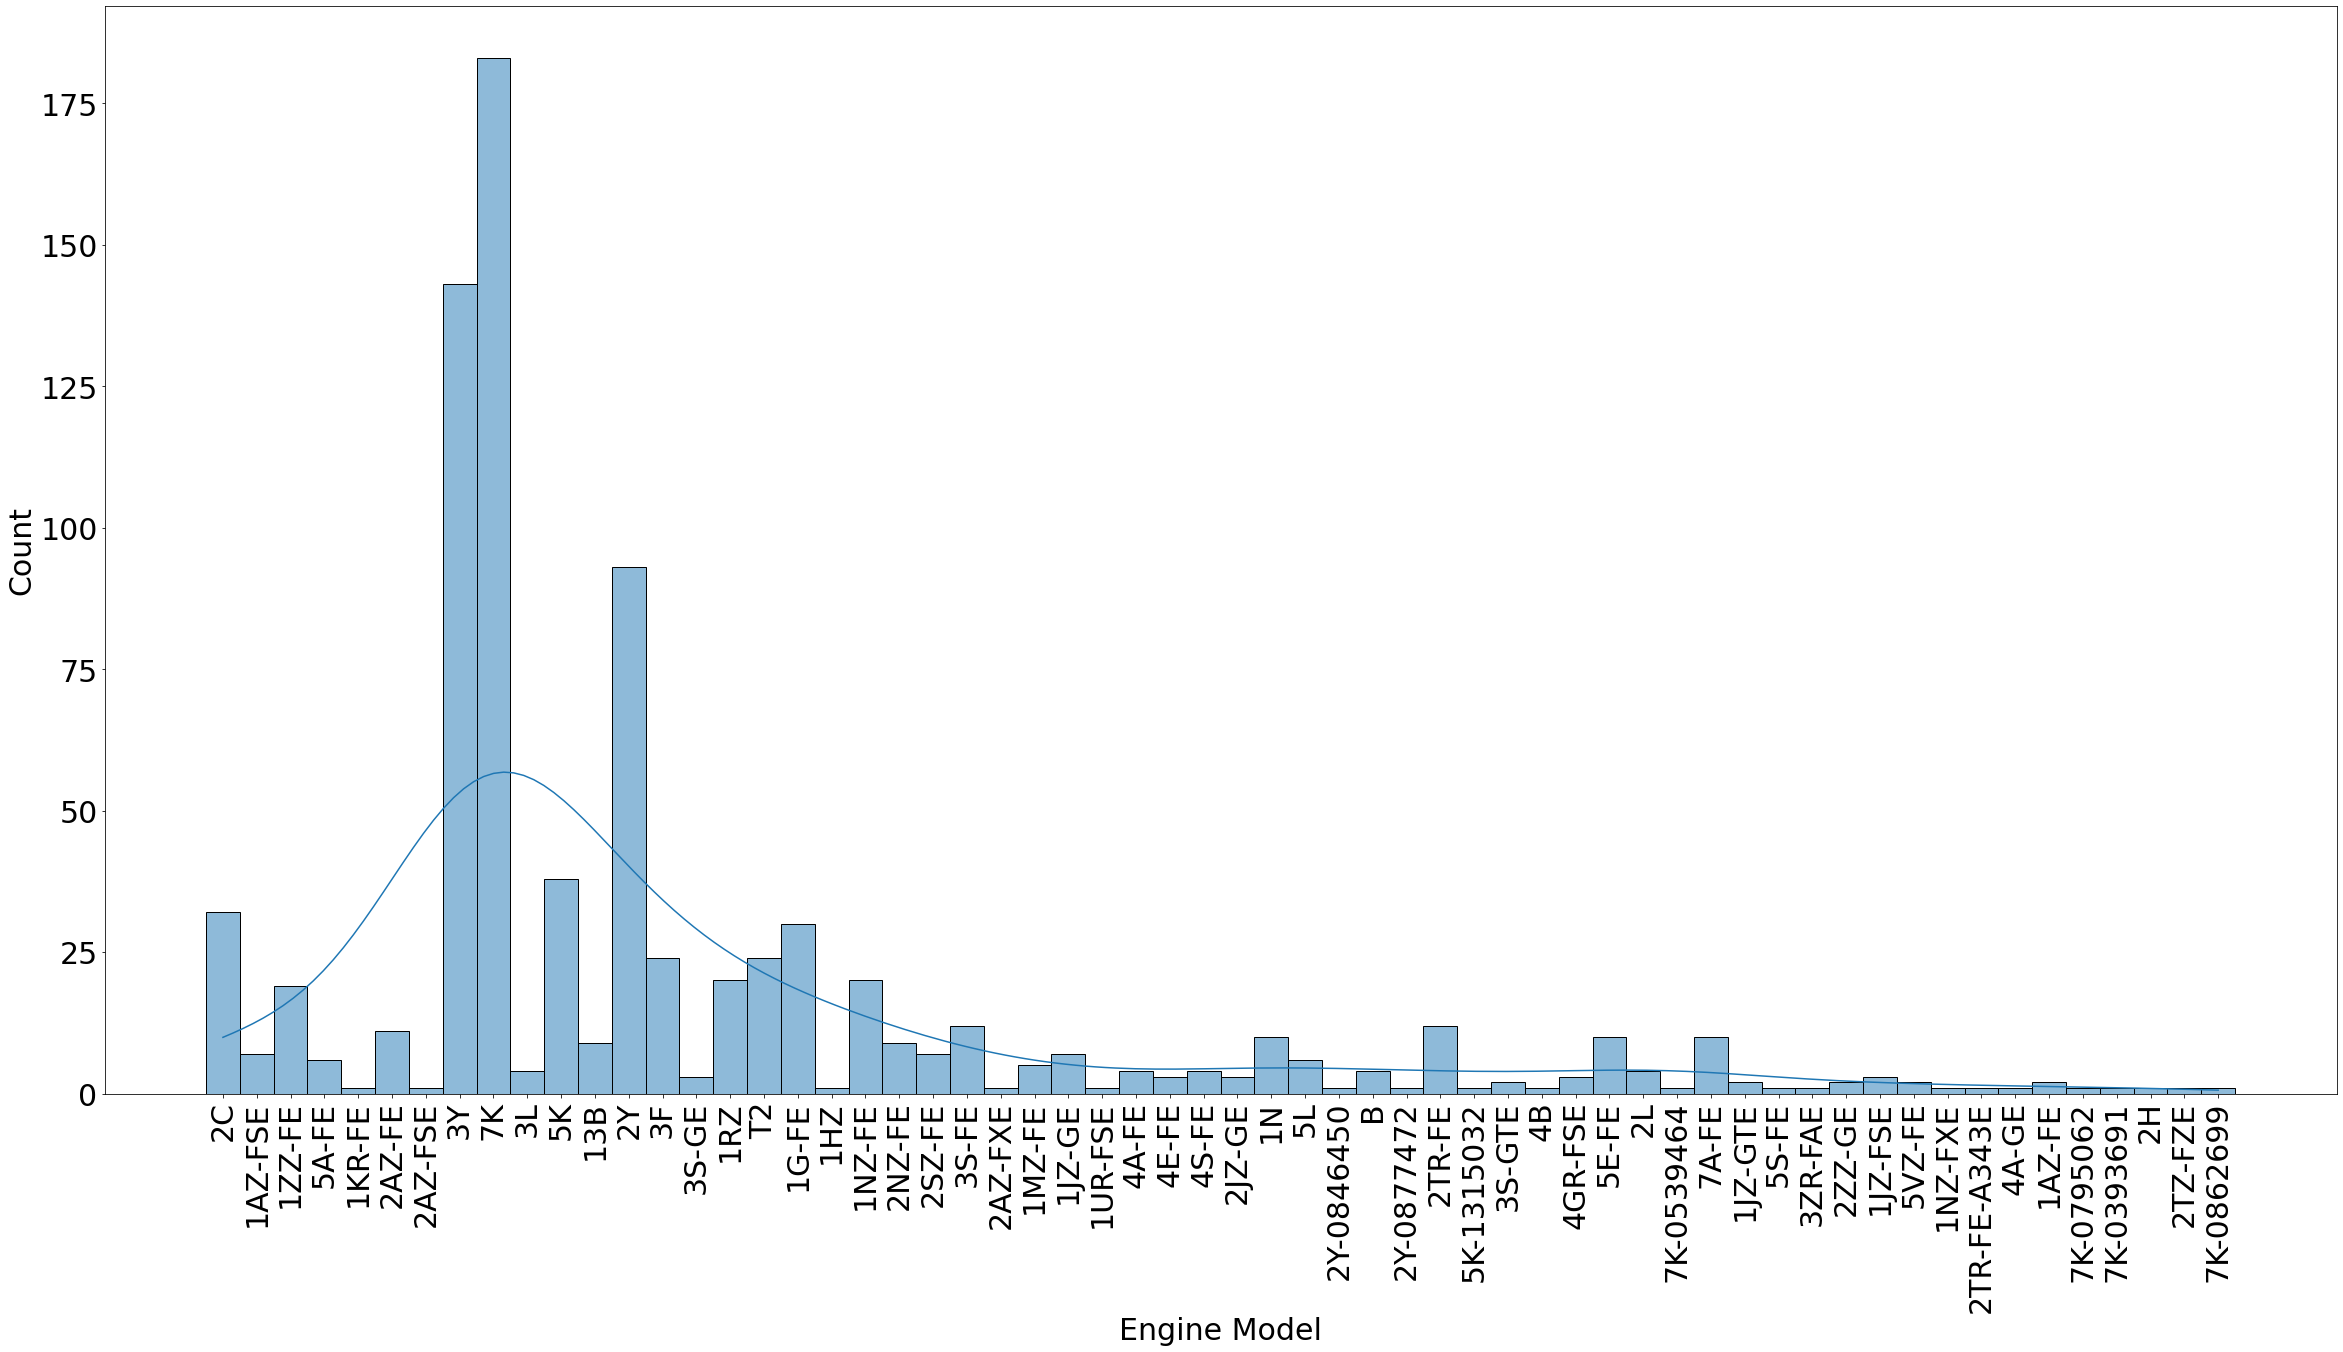

In [354]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

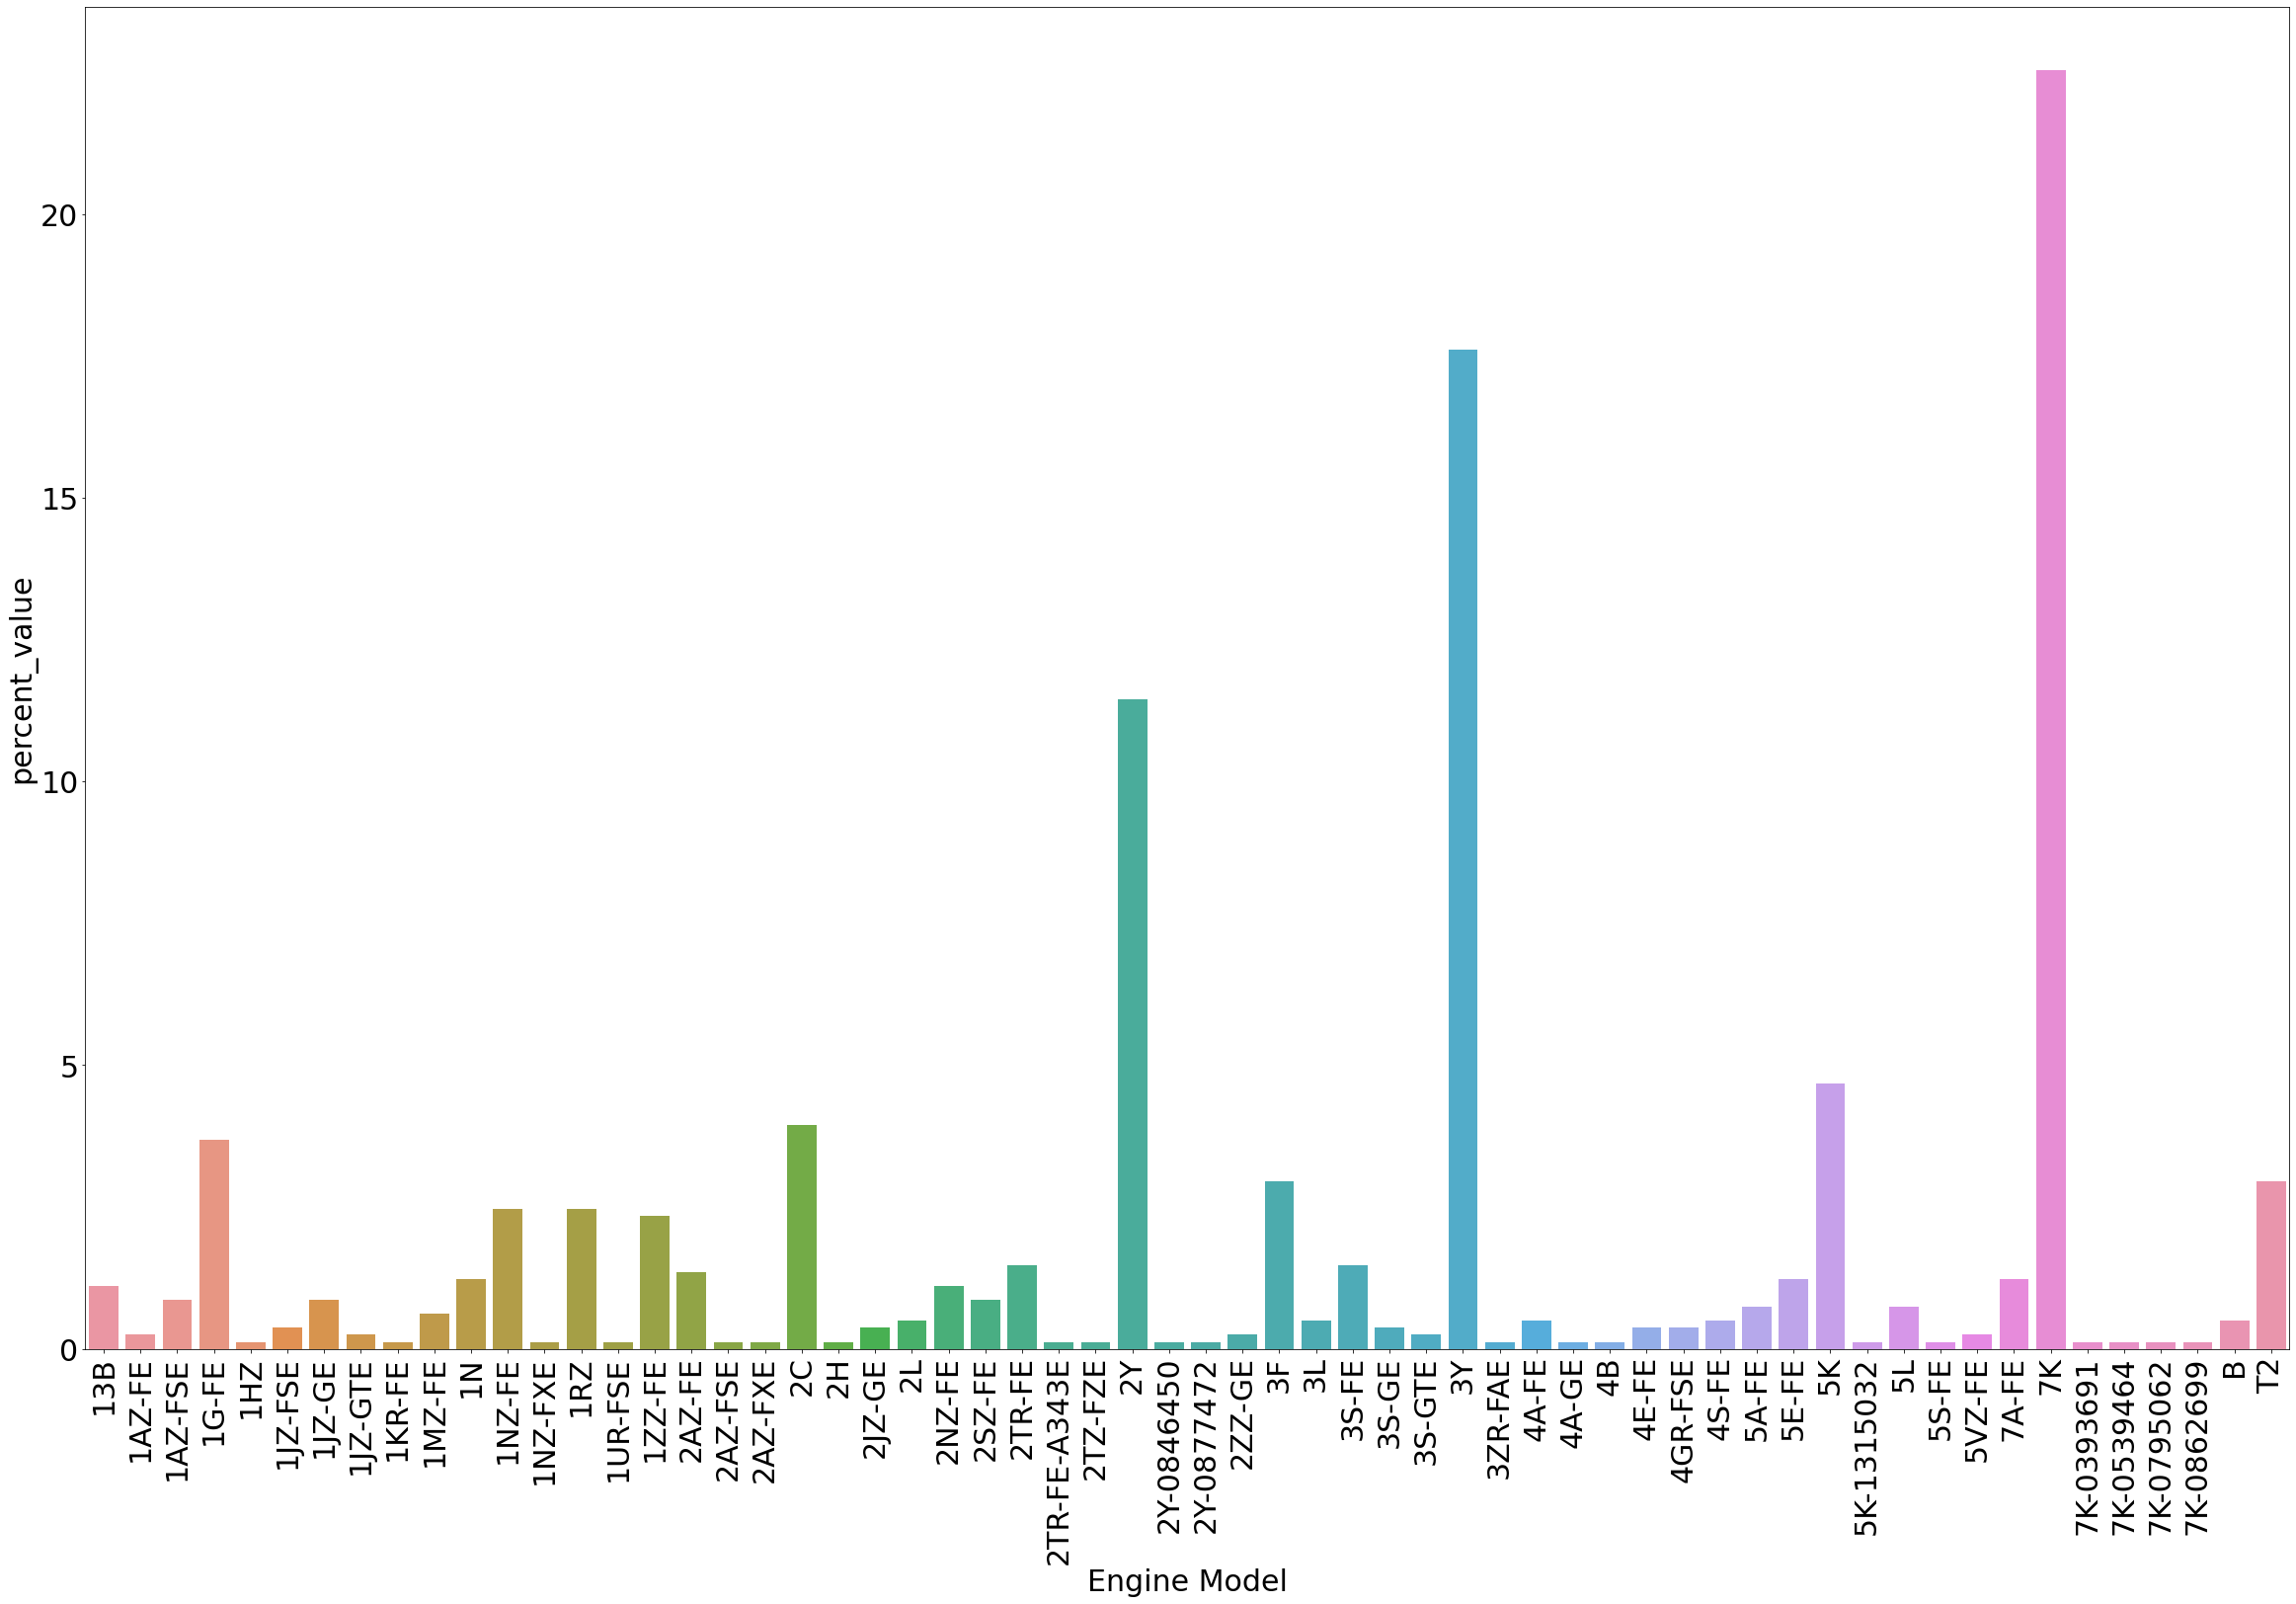

In [355]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

# Mazda

In [357]:
df_toyota = df_GTO_Japan[df_GTO_Japan.Producer.str.contains('MAZDA')]

In [358]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_toyota['Product Description'].tolist():
    list_em = extract_engine_model(des,list_mazda)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['F8-268271'],
 ['R2-562008'],
 ['R2-668222'],
 ['R2-B02380K'],
 ['R2-B02971K'],
 ['R2-224227'],
 ['R2-569596'],
 ['R2-S2884655L'],
 ['R2-665565'],
 ['R2-S21303584K'],
 ['FE-426962'],
 ['GY-305819'],
 ['F8-379521'],
 ['B5-520993'],
 ['B5-510139', 'GY-6083AA'],
 ['F8-359817'],
 ['J5-158015'],
 ['RF-5109503'],
 ['B5-216650'],
 ['B6-935490'],
 ['F8-267847'],
 ['FE-447260'],
 ['FE-507131'],
 ['WL-260634'],
 ['GY-338543'],
 ['F8-318685'],
 ['FE-955088'],
 ['F8-39847'],
 ['F8-225200'],
 ['F8-36423'],
 ['F8-348644'],
 ['B5-191292', 'GY-258987'],
 ['GY-398138'],
 ['F8-994207', 'GY-3841'],
 ['YF-216262'],
 ['F8-316528'],
 ['B5-178573', 'B5-130675', 'GY-384196'],
 ['F8-406002', 'FE-131503'],
 ['13B-410820', 'FE-БЕЗ'],
 ['F8-269155'],
 ['F8-324726'],
 ['B5-643540'],
 ['B5-518672', 'G5-207673'],
 ['B5-643540'],
 ['F8-704672'],
 ['FE-162242', 'FE-454078'],
 ['F8-219252'],
 ['F8-348678'],
 ['F8-704672'],
 ['GY-309510', 'GY-255869'],
 ['F8-953236'],
 ['FE-472982'],
 ['F8-408320'],
 ['F8-449696'],
 [

In [359]:
len(list_all_engine_model_toyota_GTO_JP_filter)

997

In [360]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [361]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0              F8
1              R2
2              R2
3              R2
4              R2
...           ...
1331           B5
1332           G5
1333           GY
1334           GY
1335           YF

[1336 rows x 1 columns]

In [362]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0           13B     43           3.22
1           B3E      2           0.15
2            B5    193          14.45
3            B6     44           3.29
4            BP     14           1.05
5            E5      4           0.30
6            F8    411          30.76
7            FE    163          12.20
8            FP      1           0.07
9            FS      1           0.07
10           G5     25           1.87
11           G6     36           2.69
12           GY    237          17.74
13           HA      4           0.30
14           J5     36           2.69
15           L8     15           1.12
16           R2     15           1.12
17           RF      8           0.60
18           SL      4           0.30
19           VS      4           0.30
20           WL      8           0.60
21           XA      1           0.07
22           YF     65           4.87
23           ZJ      1           0.07
24           ZL      1           0.07

In [363]:
df_freq_toyota.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
6            F8    411          30.76
12           GY    237          17.74
2            B5    193          14.45
7            FE    163          12.20
22           YF     65           4.87

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

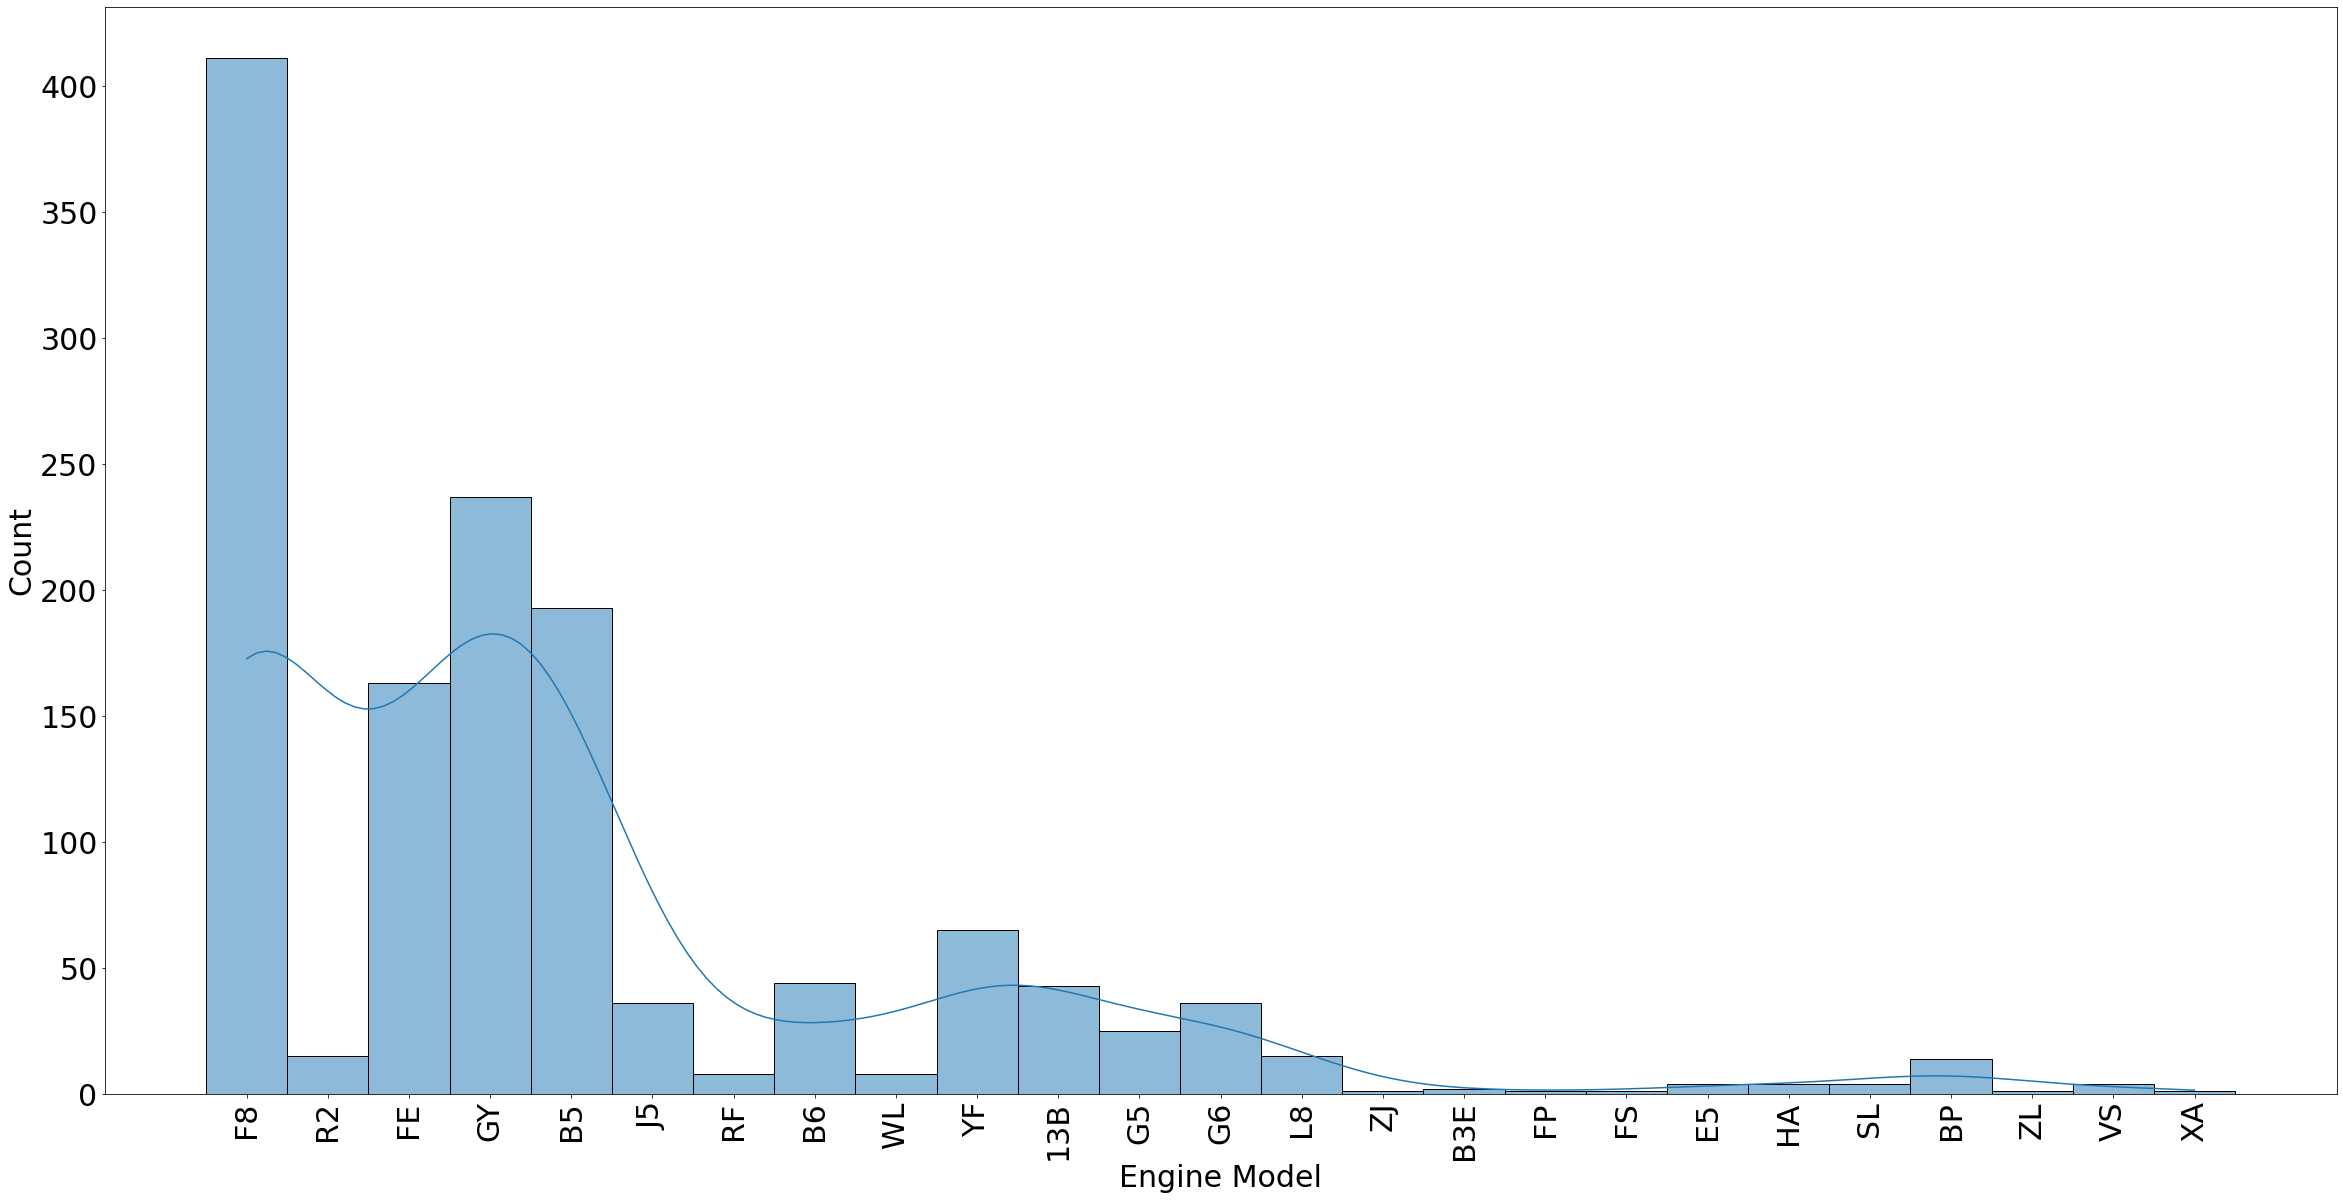

In [364]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

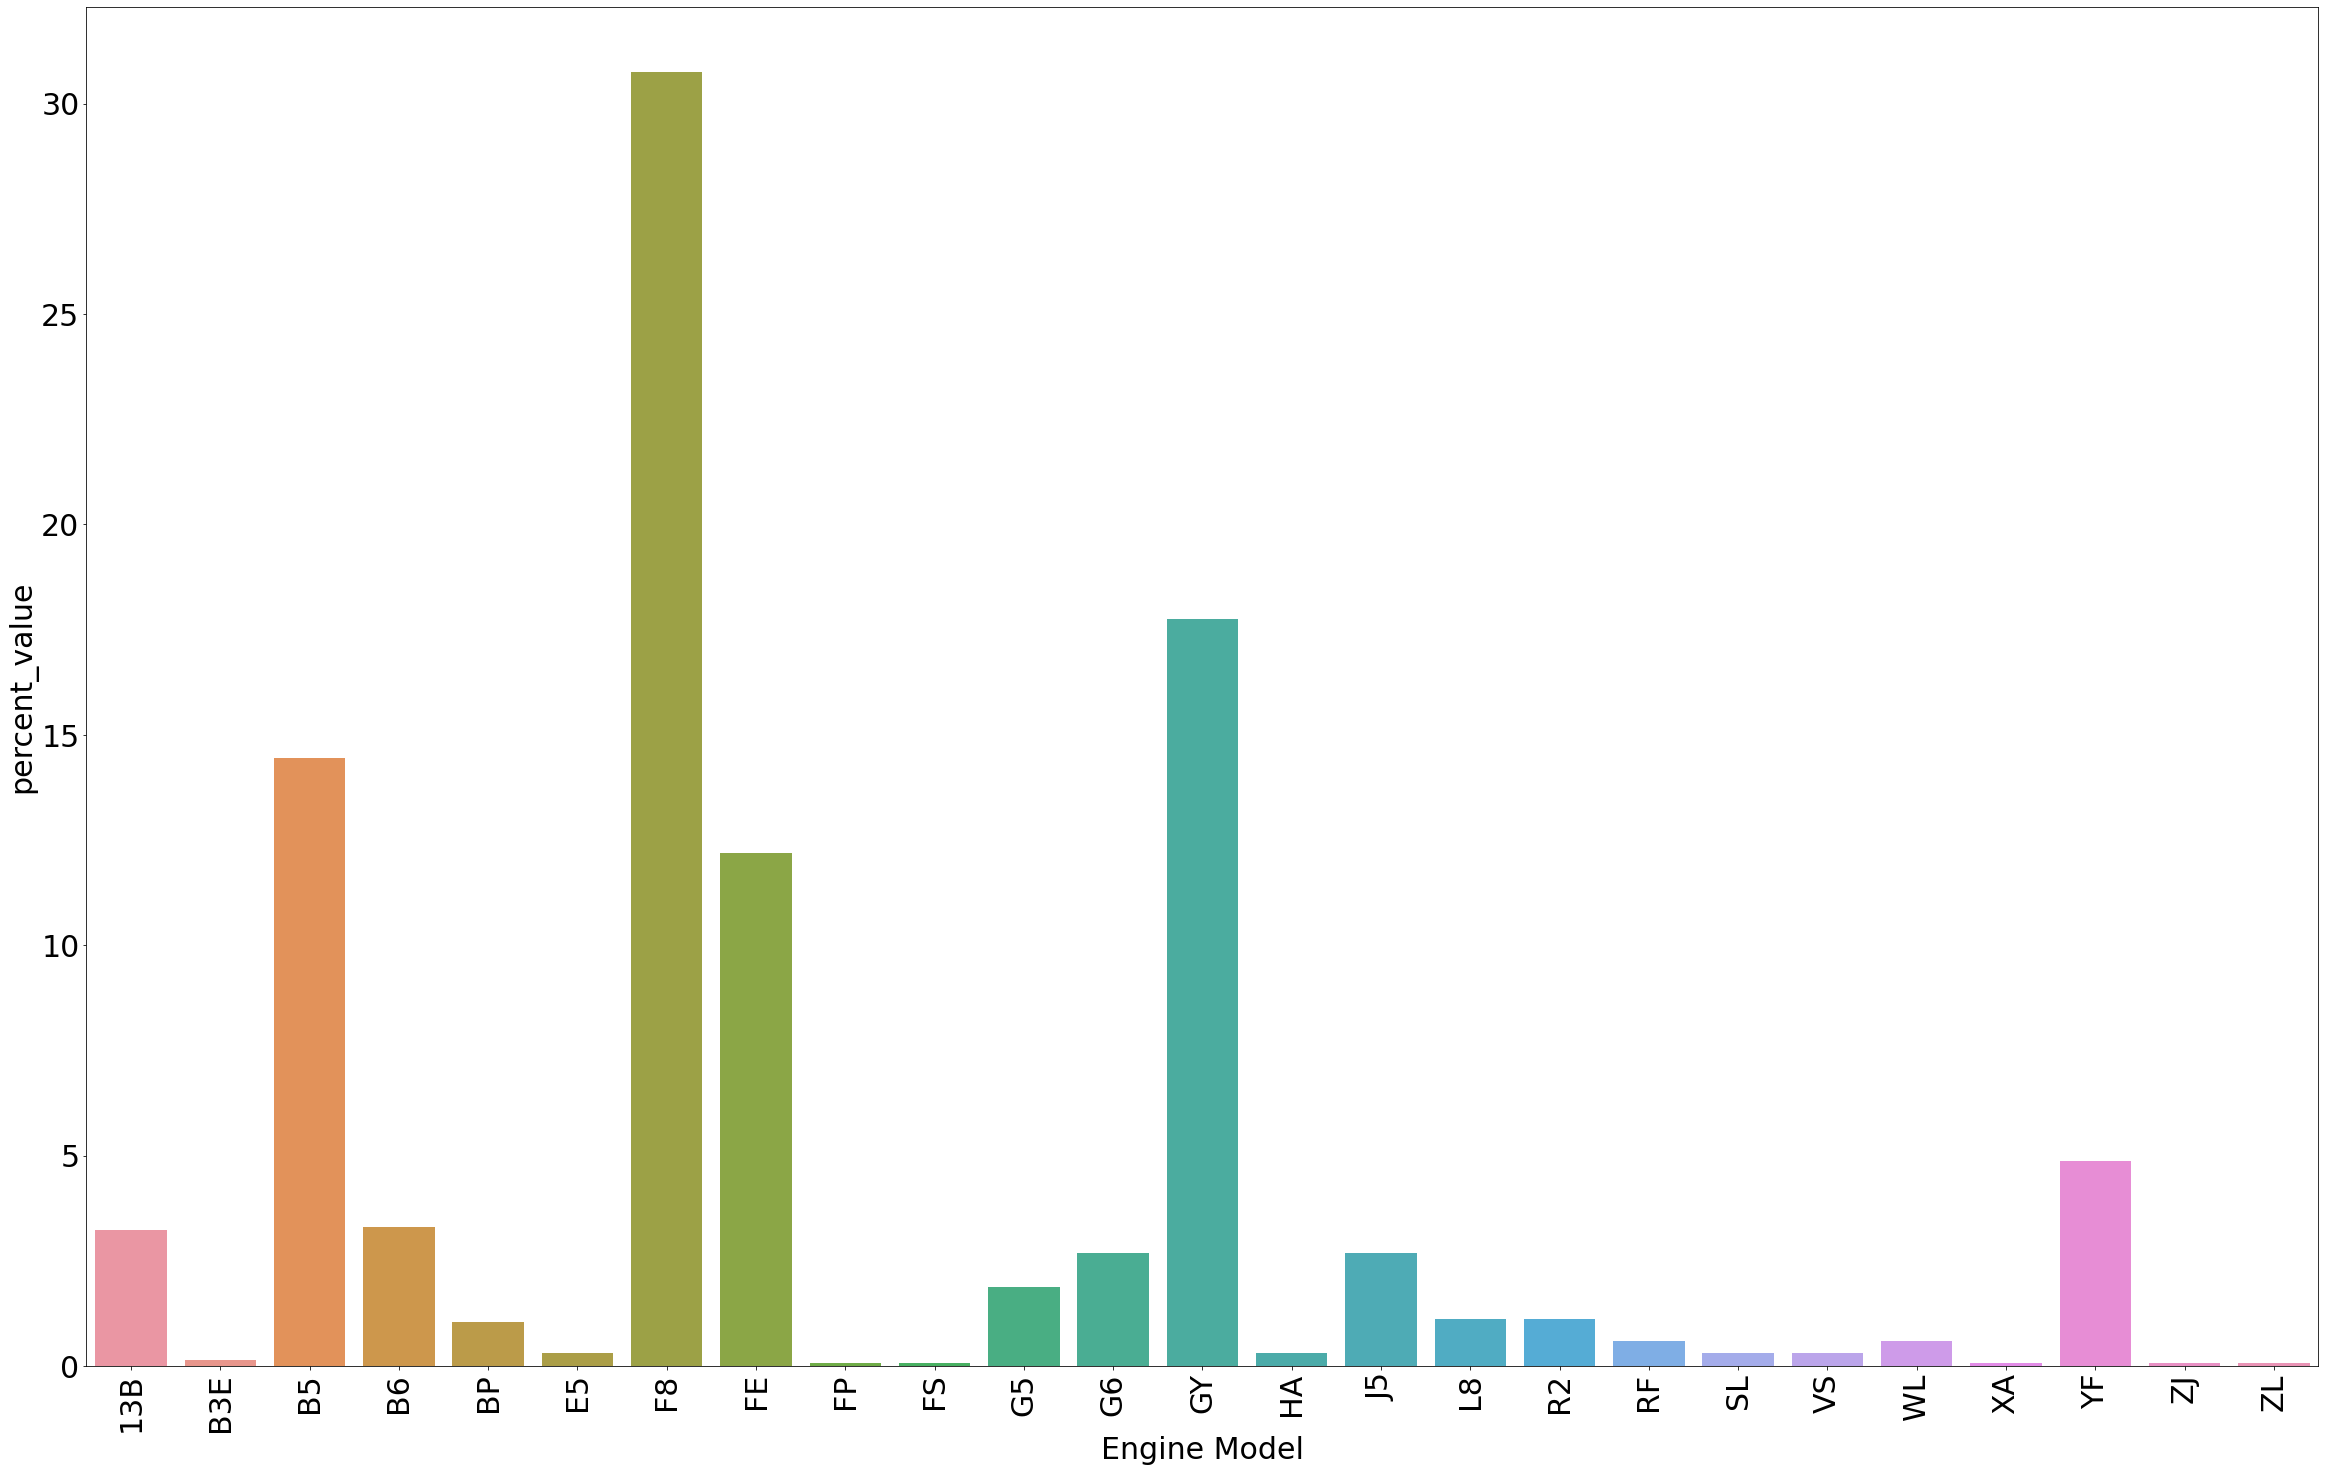

In [365]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

# Mitsubishi

In [366]:
df_toyota = df_GTO_Japan[df_GTO_Japan.Producer.str.contains('MITSUBISHI')]

In [367]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_toyota['Product Description'].tolist():
    list_em = extract_engine_model(des,list_mitsubishi)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['4G15-BQ1218'],
 ['6G72-OY2254', '6G72-RX1617'],
 ['4A90-00'],
 ['4G69-GJ'],
 ['4A90-00'],
 ['4G15-BK4045'],
 ['4G94-QR9809'],
 ['6G74-QA0269'],
 ['4B12-AK9786'],
 ['4G93-HR5434'],
 ['4G13-YS5798', '4G15-AJ9292'],
 ['4G64-DQ6363'],
 ['6G72-CM9684'],
 ['4D56-FP1896'],
 ['4D56-FC4075'],
 ['4M41-HA7409'],
 ['4B12-AY0719'],
 ['4G64-RU1236', '4G94-RD3027'],
 ['4G63-SA6739'],
 ['4G63-BM5614'],
 ['4G64-XY9454'],
 ['4G64-DQ6683'],
 ['4G64-BL7917'],
 ['4G64-DX6423'],
 ['4G69-KL0127'],
 ['4G93-KJ1748'],
 ['4G93-PA3514'],
 ['4G93-NS4542'],
 ['4A30-852427', '4G64-DC4045'],
 ['4B12-AB7052', '4B12-AB8736'],
 ['4G63-HR5035', '4G63-AB2350'],
 ['4G63-LK0016', '4G94-RA1468'],
 ['6G72-OX0413'],
 ['4D56-CFK8885'],
 ['4D56-FB9191'],
 ['4D56-KX2995'],
 ['4D56-FK1442'],
 ['4D56-EM8814'],
 ['4G93-LG5483'],
 ['4G15-HJ5627'],
 ['4B12-AB7839', '4B12-AA1215', '4B12-AD2944', '4G63-BQ6301', '6G74-KK9491'],
 ['4A31-559912', '4B12-A01982'],
 ['4B11-BC0874'],
 ['4A90-0041920', '4A91-0158672'],
 ['4G15-DX'],
 ['4B11-

In [368]:
len(list_all_engine_model_toyota_GTO_JP_filter)

4826

In [369]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [370]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0            4G15
1            6G72
2            6G72
3            4A90
4            4G69
...           ...
8931         4G15
8932         4G63
8933         6G74
8934         4G15
8935         4G93

[8936 rows x 1 columns]

In [371]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0          3G83     30           0.34
1          4A30     56           0.63
2          4A31    144           1.61
3          4A90    110           1.23
4          4A91    239           2.67
5          4B10     45           0.50
6          4B11    158           1.77
7          4B12    244           2.73
8          4D32      2           0.02
9          4D36      1           0.01
10         4D56     21           0.24
11         4D68      7           0.08
12         4DR5      1           0.01
13         4G13    221           2.47
14         4G15   1147          12.84
15         4G63   1140          12.76
16         4G64    986          11.03
17         4G67      7           0.08
18         4G69    183           2.05
19         4G91     35           0.39
20         4G92     17           0.19
21         4G93   1618          18.11
22         4G94    387           4.33
23         4J10      3           0.03
24         4J11      1           0.01
25         4M40     15           0.17
26         4M41      3           0.03
27         6A10      1           0.01
28         6A11     14           0.16
29         6A12     67           0.75
30         6A13    211           2.36
31         6B31     12           0.13
32         6G72    834           9.33
33         6G73    217           2.43
34         6G74    757           8.47
35           L8      2           0.02

In [372]:
df_freq_toyota.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
21         4G93   1618          18.11
14         4G15   1147          12.84
15         4G63   1140          12.76
16         4G64    986          11.03
32         6G72    834           9.33

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

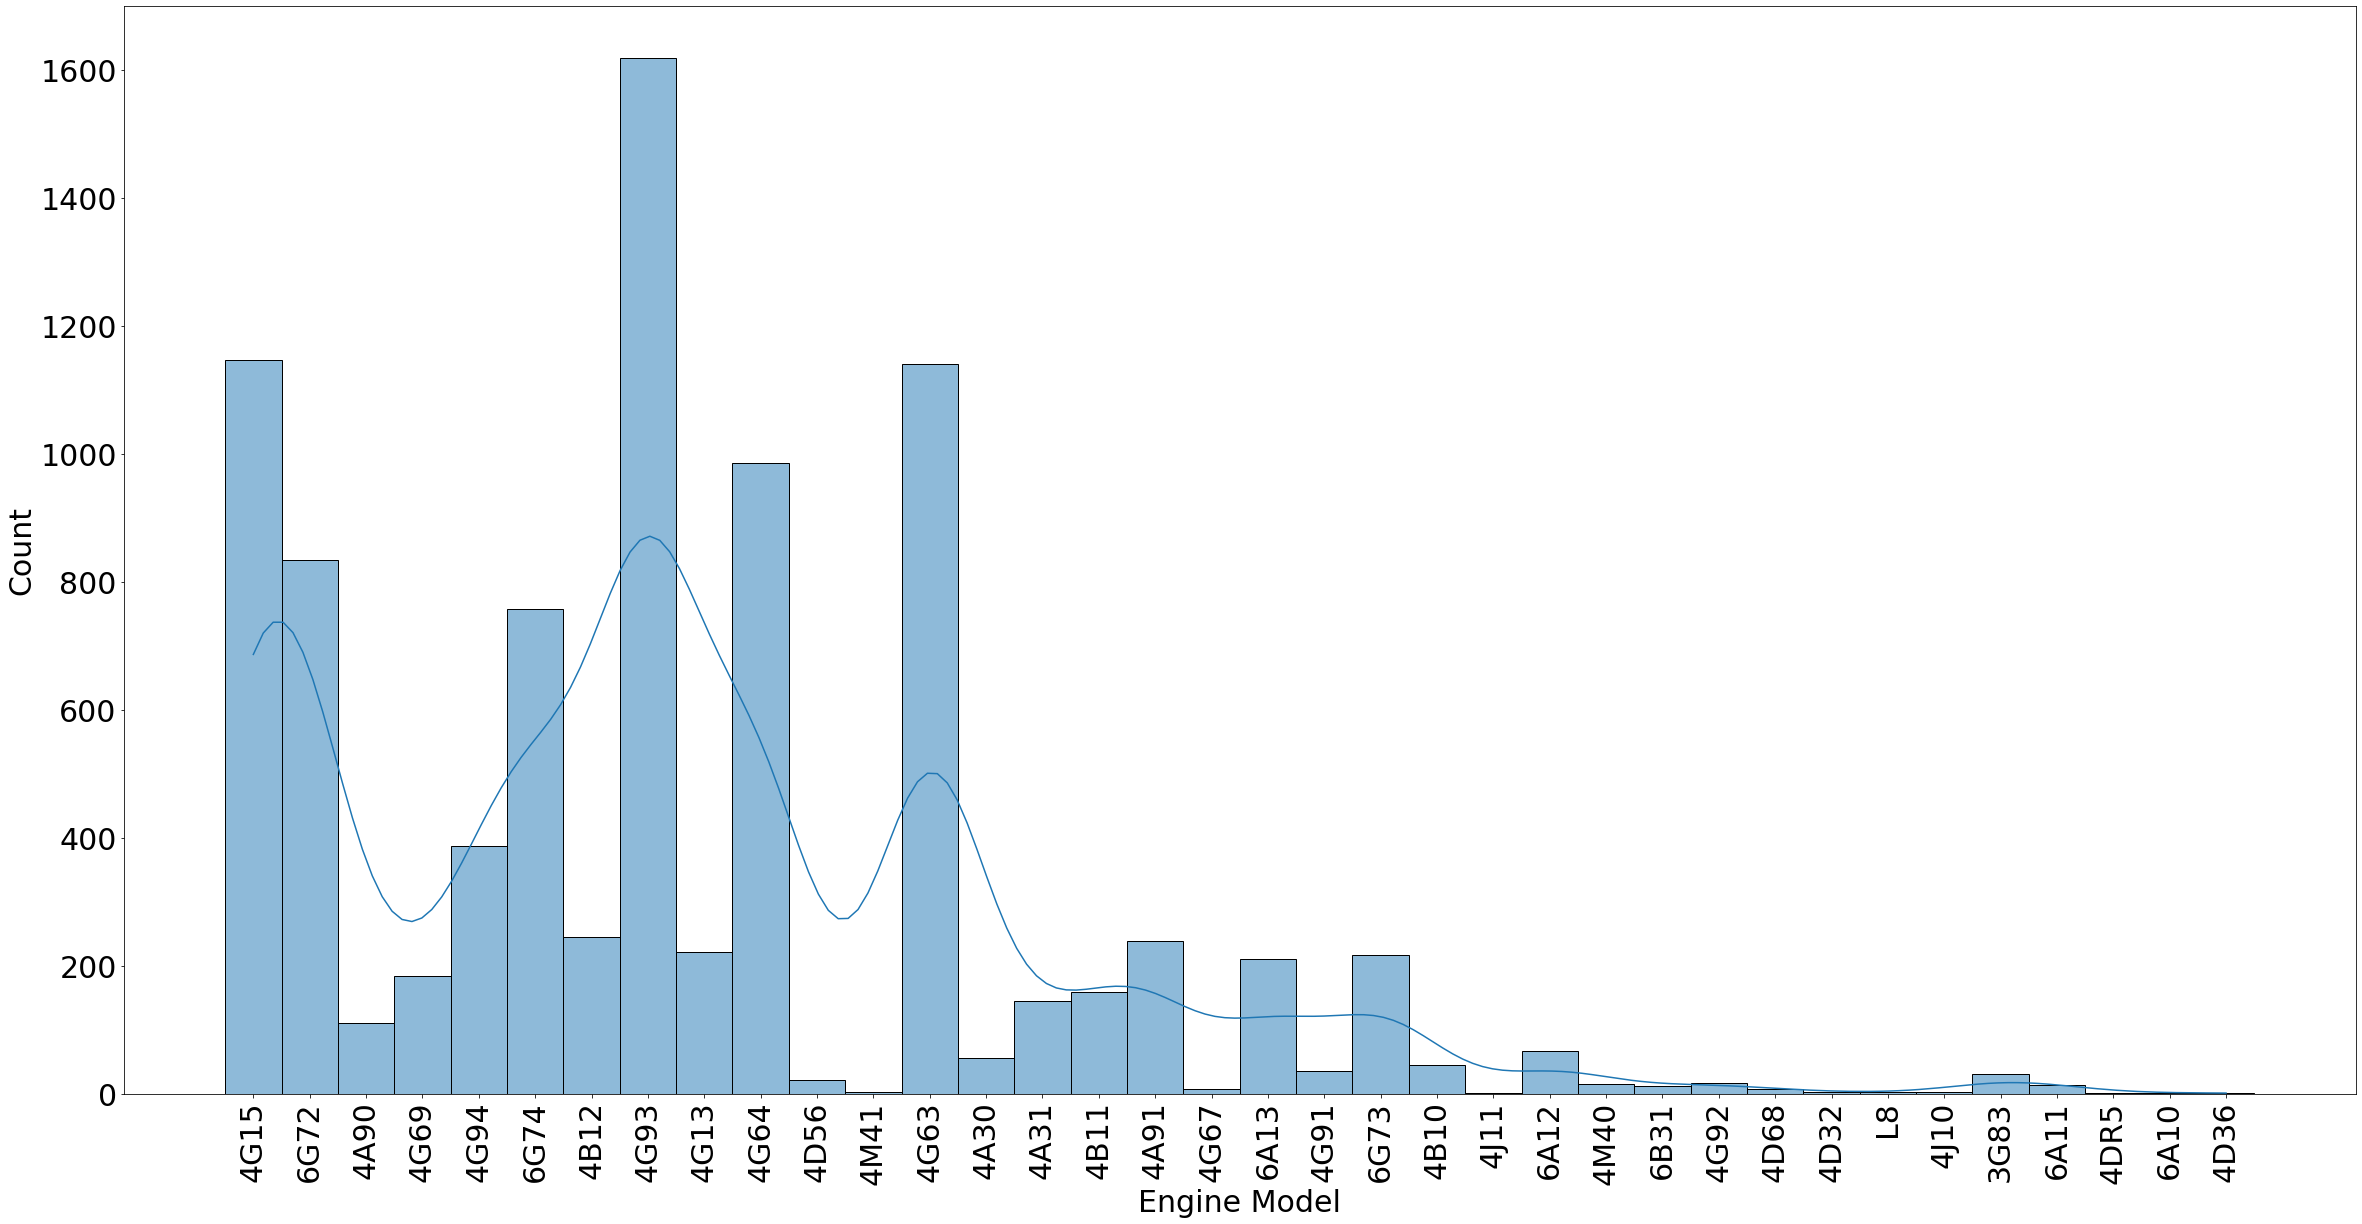

In [373]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

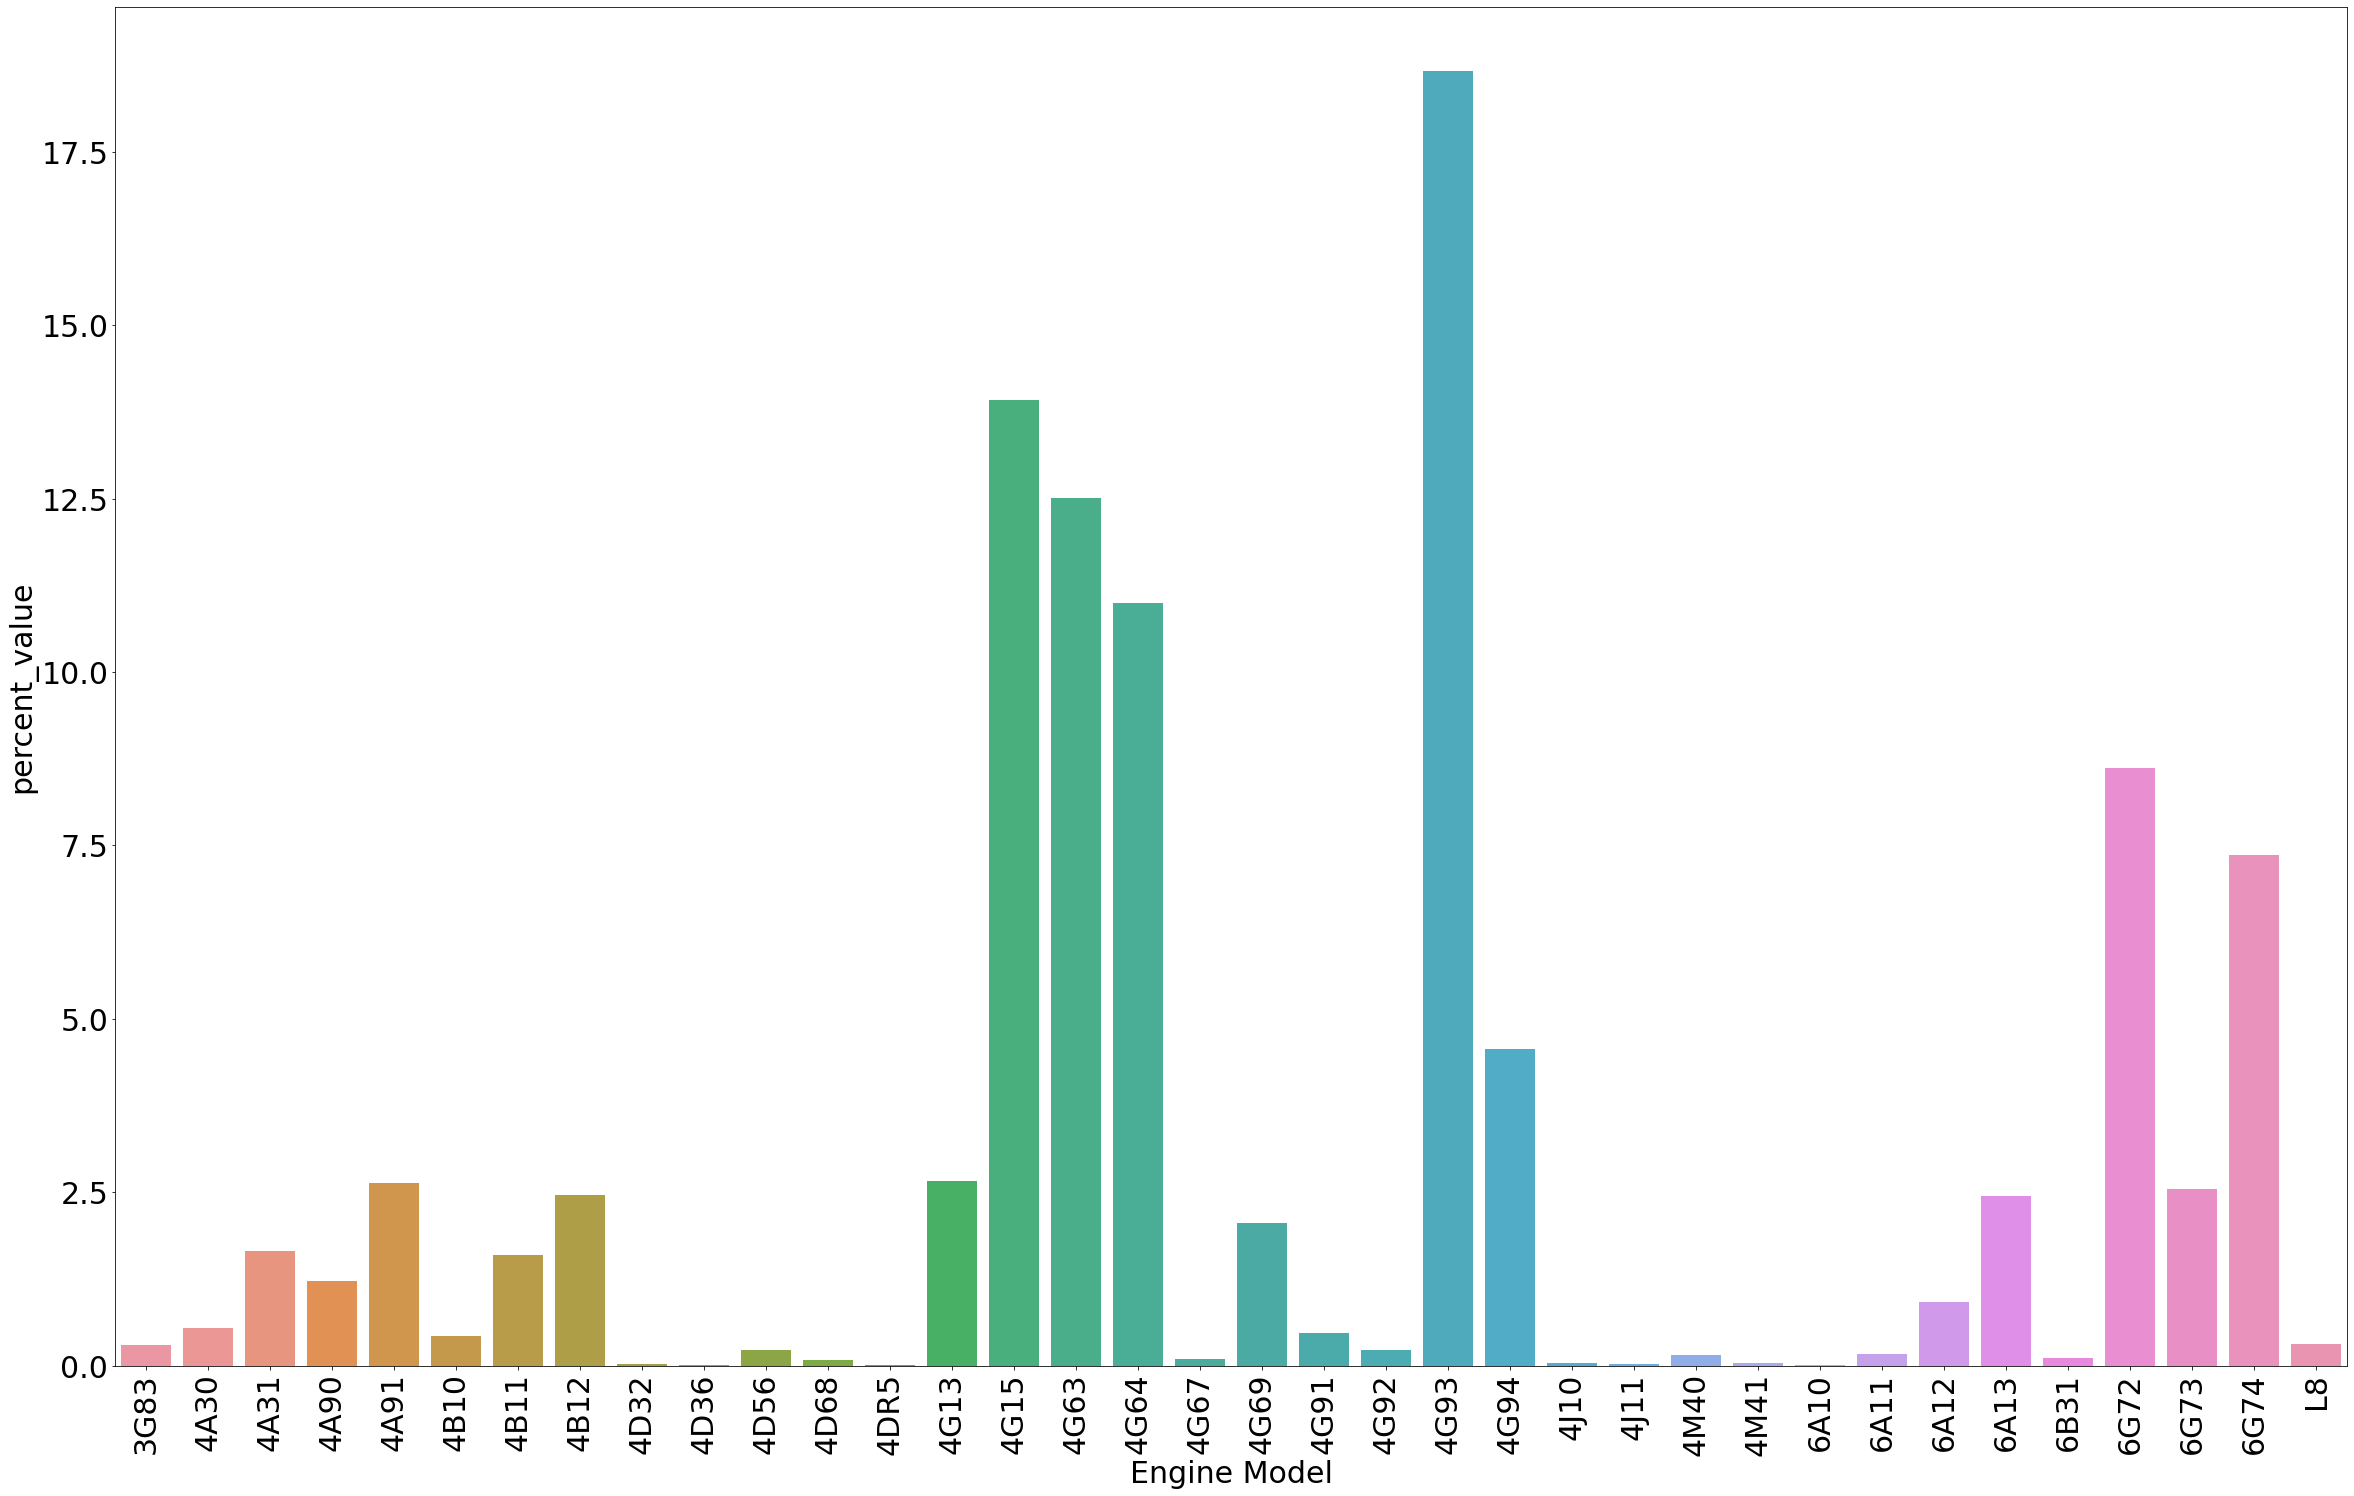

In [66]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

# Honda

In [374]:
df_toyota = df_GTO_Japan[df_GTO_Japan.Producer.str.contains('HONDA')]

In [375]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_toyota['Product Description'].tolist():
    list_em = extract_engine_model(des,list_honda)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['F20B-2703685'],
 ['B20B-7102378', 'J35A-7010456'],
 ['K20A-2466554'],
 ['K20A-2255933'],
 ['L15A-5510857'],
 ['D17A-2279233', 'F22B-3217727', 'K24A-5526', 'L13A-1290310'],
 ['F23A-3012516', 'K20A-2489187', 'K24A-6009617', 'L15A-2059372'],
 ['F23A-2231864'],
 ['F23A-2257262'],
 ['B20B-5258173', 'R18A-1777997'],
 ['K24A-3311764'],
 ['L13A-2355073'],
 ['D16A-1705993', 'D16A-9202779', 'D17A-2062848'],
 ['D17A-2056246',
  'F20B-2001992',
  'F23A-2202721',
  'K20A-2107279',
  'L13A-1801007'],
 ['L13A-4068842'],
 ['K20A-2315960',
  'K20A-2314026',
  'K20A-2756425',
  'L13A-2152201',
  'L13A-2284566',
  'L15A-2161939'],
 ['LEA-MF6'],
 ['L13A-1590280', 'L13A-2362035'],
 ['D15B-9017709'],
 ['F23A-3006316'],
 ['B20B-7156212'],
 ['B20B-3545215'],
 ['B20B-3226138'],
 ['D13B-6237851'],
 ['L13A-2372523'],
 ['F18B-2031193', 'K24A-7206195'],
 ['F22B-2042181'],
 ['F23A-1086266',
  'J30A-4502703',
  'K20A-2071977',
  'K20A-2839722',
  'L15A-5046178'],
 ['F23A-3007440'],
 ['G20A-2011280'],
 ['B20B-3080

In [376]:
len(list_all_engine_model_toyota_GTO_JP_filter)

7001

In [377]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [378]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0             F20B
1             B20B
2             J35A
3             K20A
4             K20A
...            ...
22118         B20B
22119         D16A
22120         G20A
22121         L15A
22122         B20B

[22123 rows x 1 columns]

In [379]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0          A18A      2           0.01
1          A20A      1           0.00
2          B16A     23           0.10
3          B16B      6           0.03
4          B18B     56           0.25
5          B18C     15           0.07
6          B20B   3566          16.12
7          C32A     20           0.09
8          C35A     36           0.16
9          D13B    598           2.70
10         D15B   2135           9.65
11         D16A   1728           7.81
12         D17A   1529           6.91
13         E07A      1           0.00
14         E07Z      2           0.01
15         F18A     19           0.09
16         F18B    534           2.41
17         F20A     34           0.15
18         F20B   1138           5.14
19         F22A      7           0.03
20         F22B    507           2.29
21         F23A   2214          10.01
22         G20A    299           1.35
23         G25A    306           1.38
24         H22A    117           0.53
25         H23A    316           1.43
26         J25A    267           1.21
27         J30A    322           1.46
28         J32A    106           0.48
29         J35A    111           0.50
30         K20A   1370           6.19
31         K20B     21           0.09
32         K24A    756           3.42
33         L13A   2053           9.28
34         L15A   1090           4.93
35          LDA    109           0.49
36          LEA     17           0.08
37          LEB     15           0.07
38          LFA      1           0.00
39         R18A    132           0.60
40         R20A     90           0.41
41         S07A      1           0.00
42           ZC    453           2.05

In [380]:
df_freq_toyota.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
6          B20B   3566          16.12
21         F23A   2214          10.01
10         D15B   2135           9.65
33         L13A   2053           9.28
11         D16A   1728           7.81

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

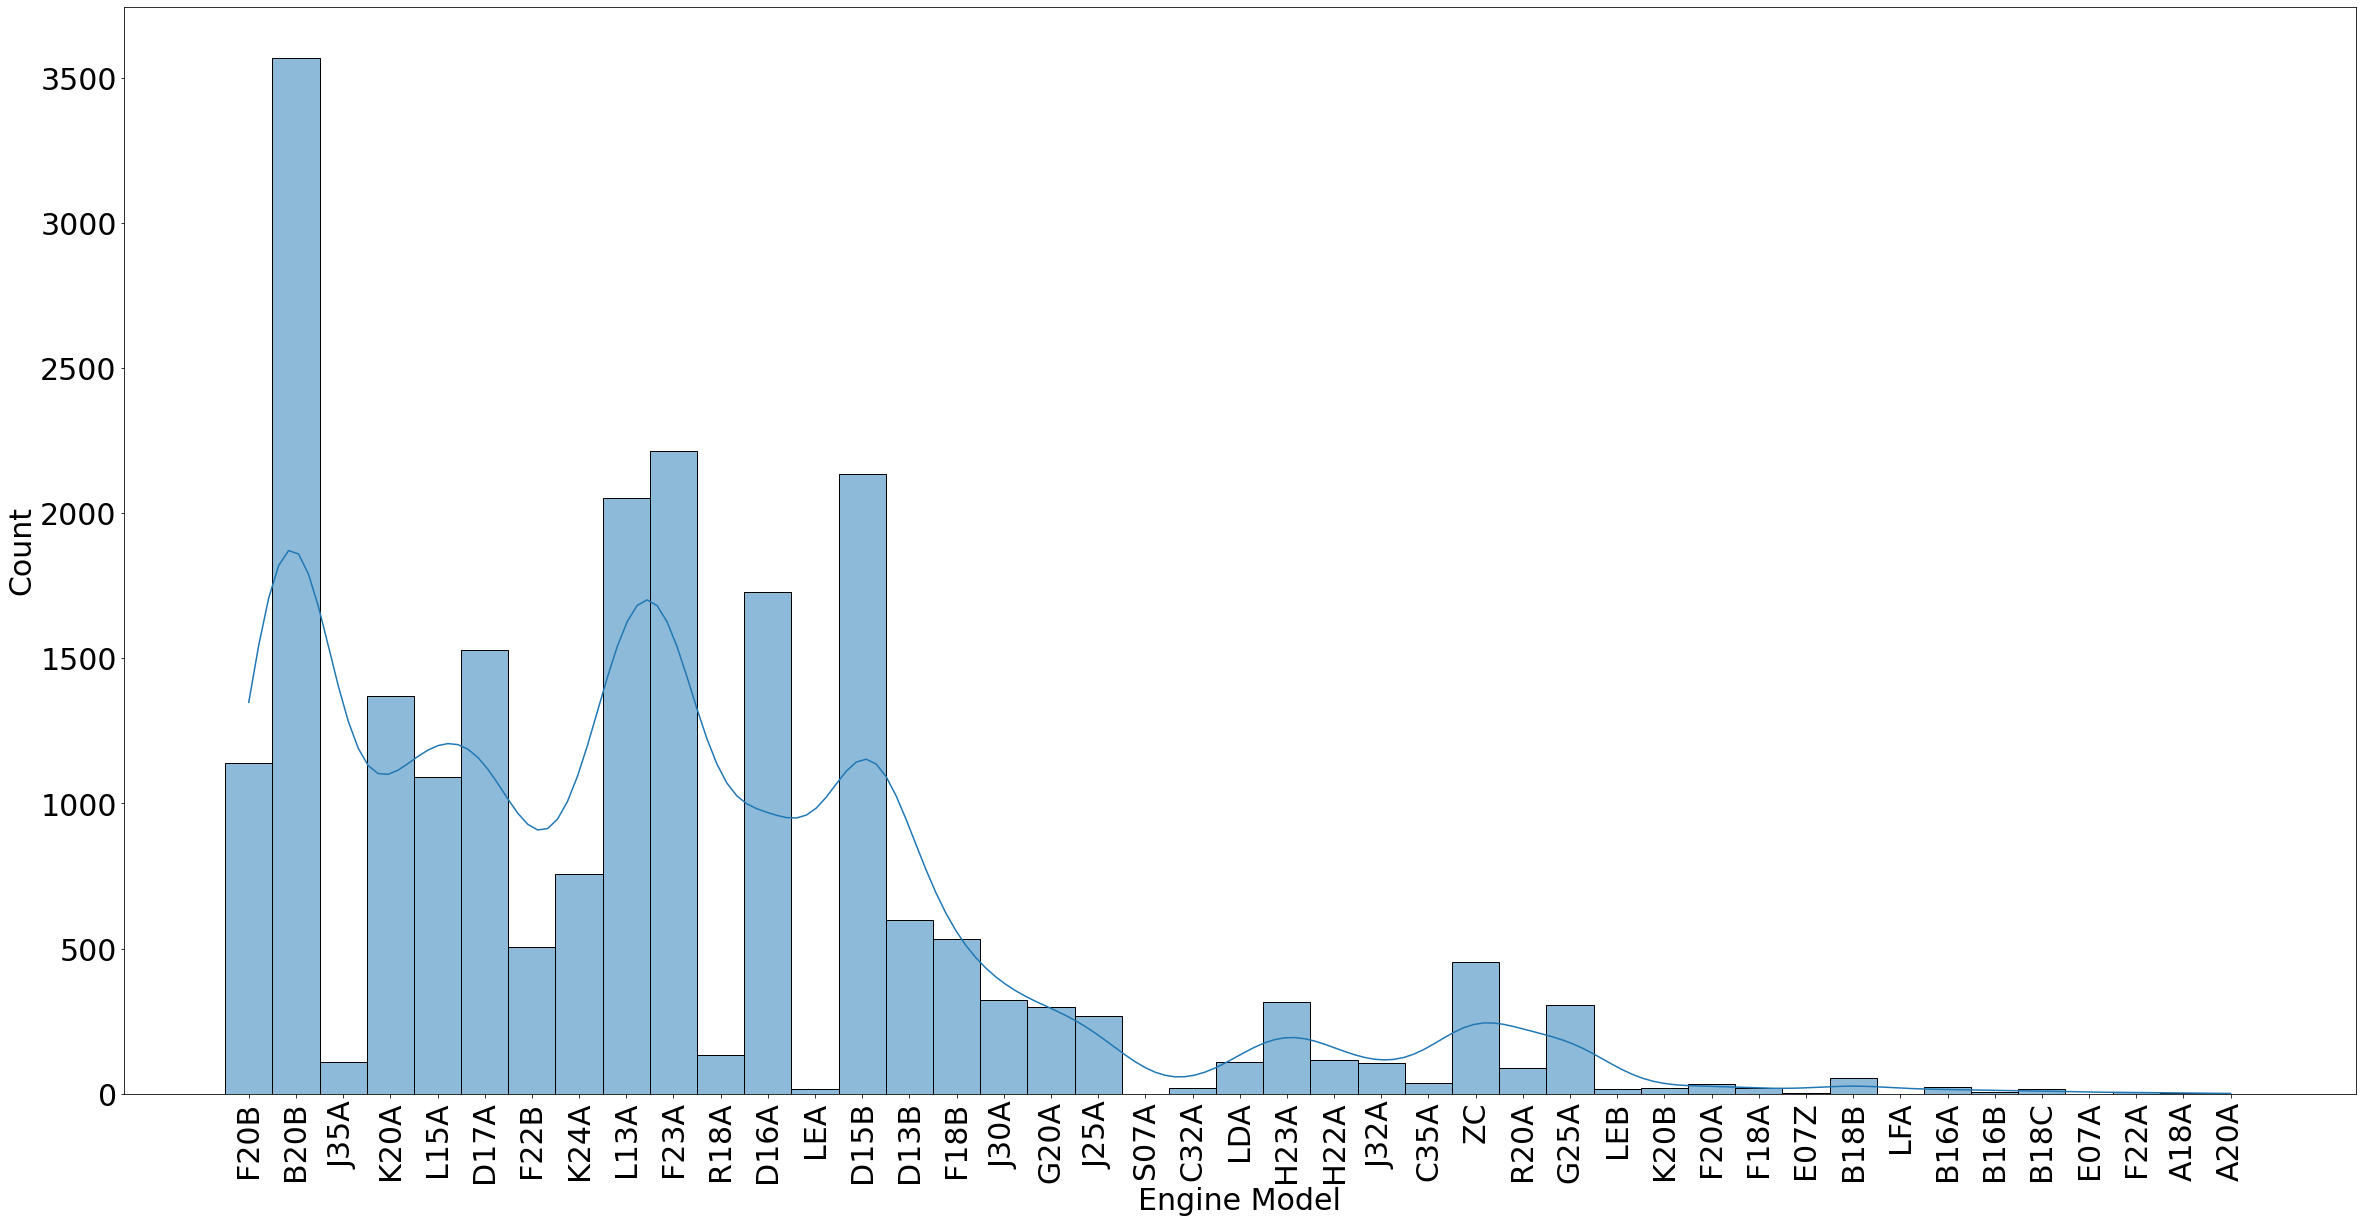

In [381]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

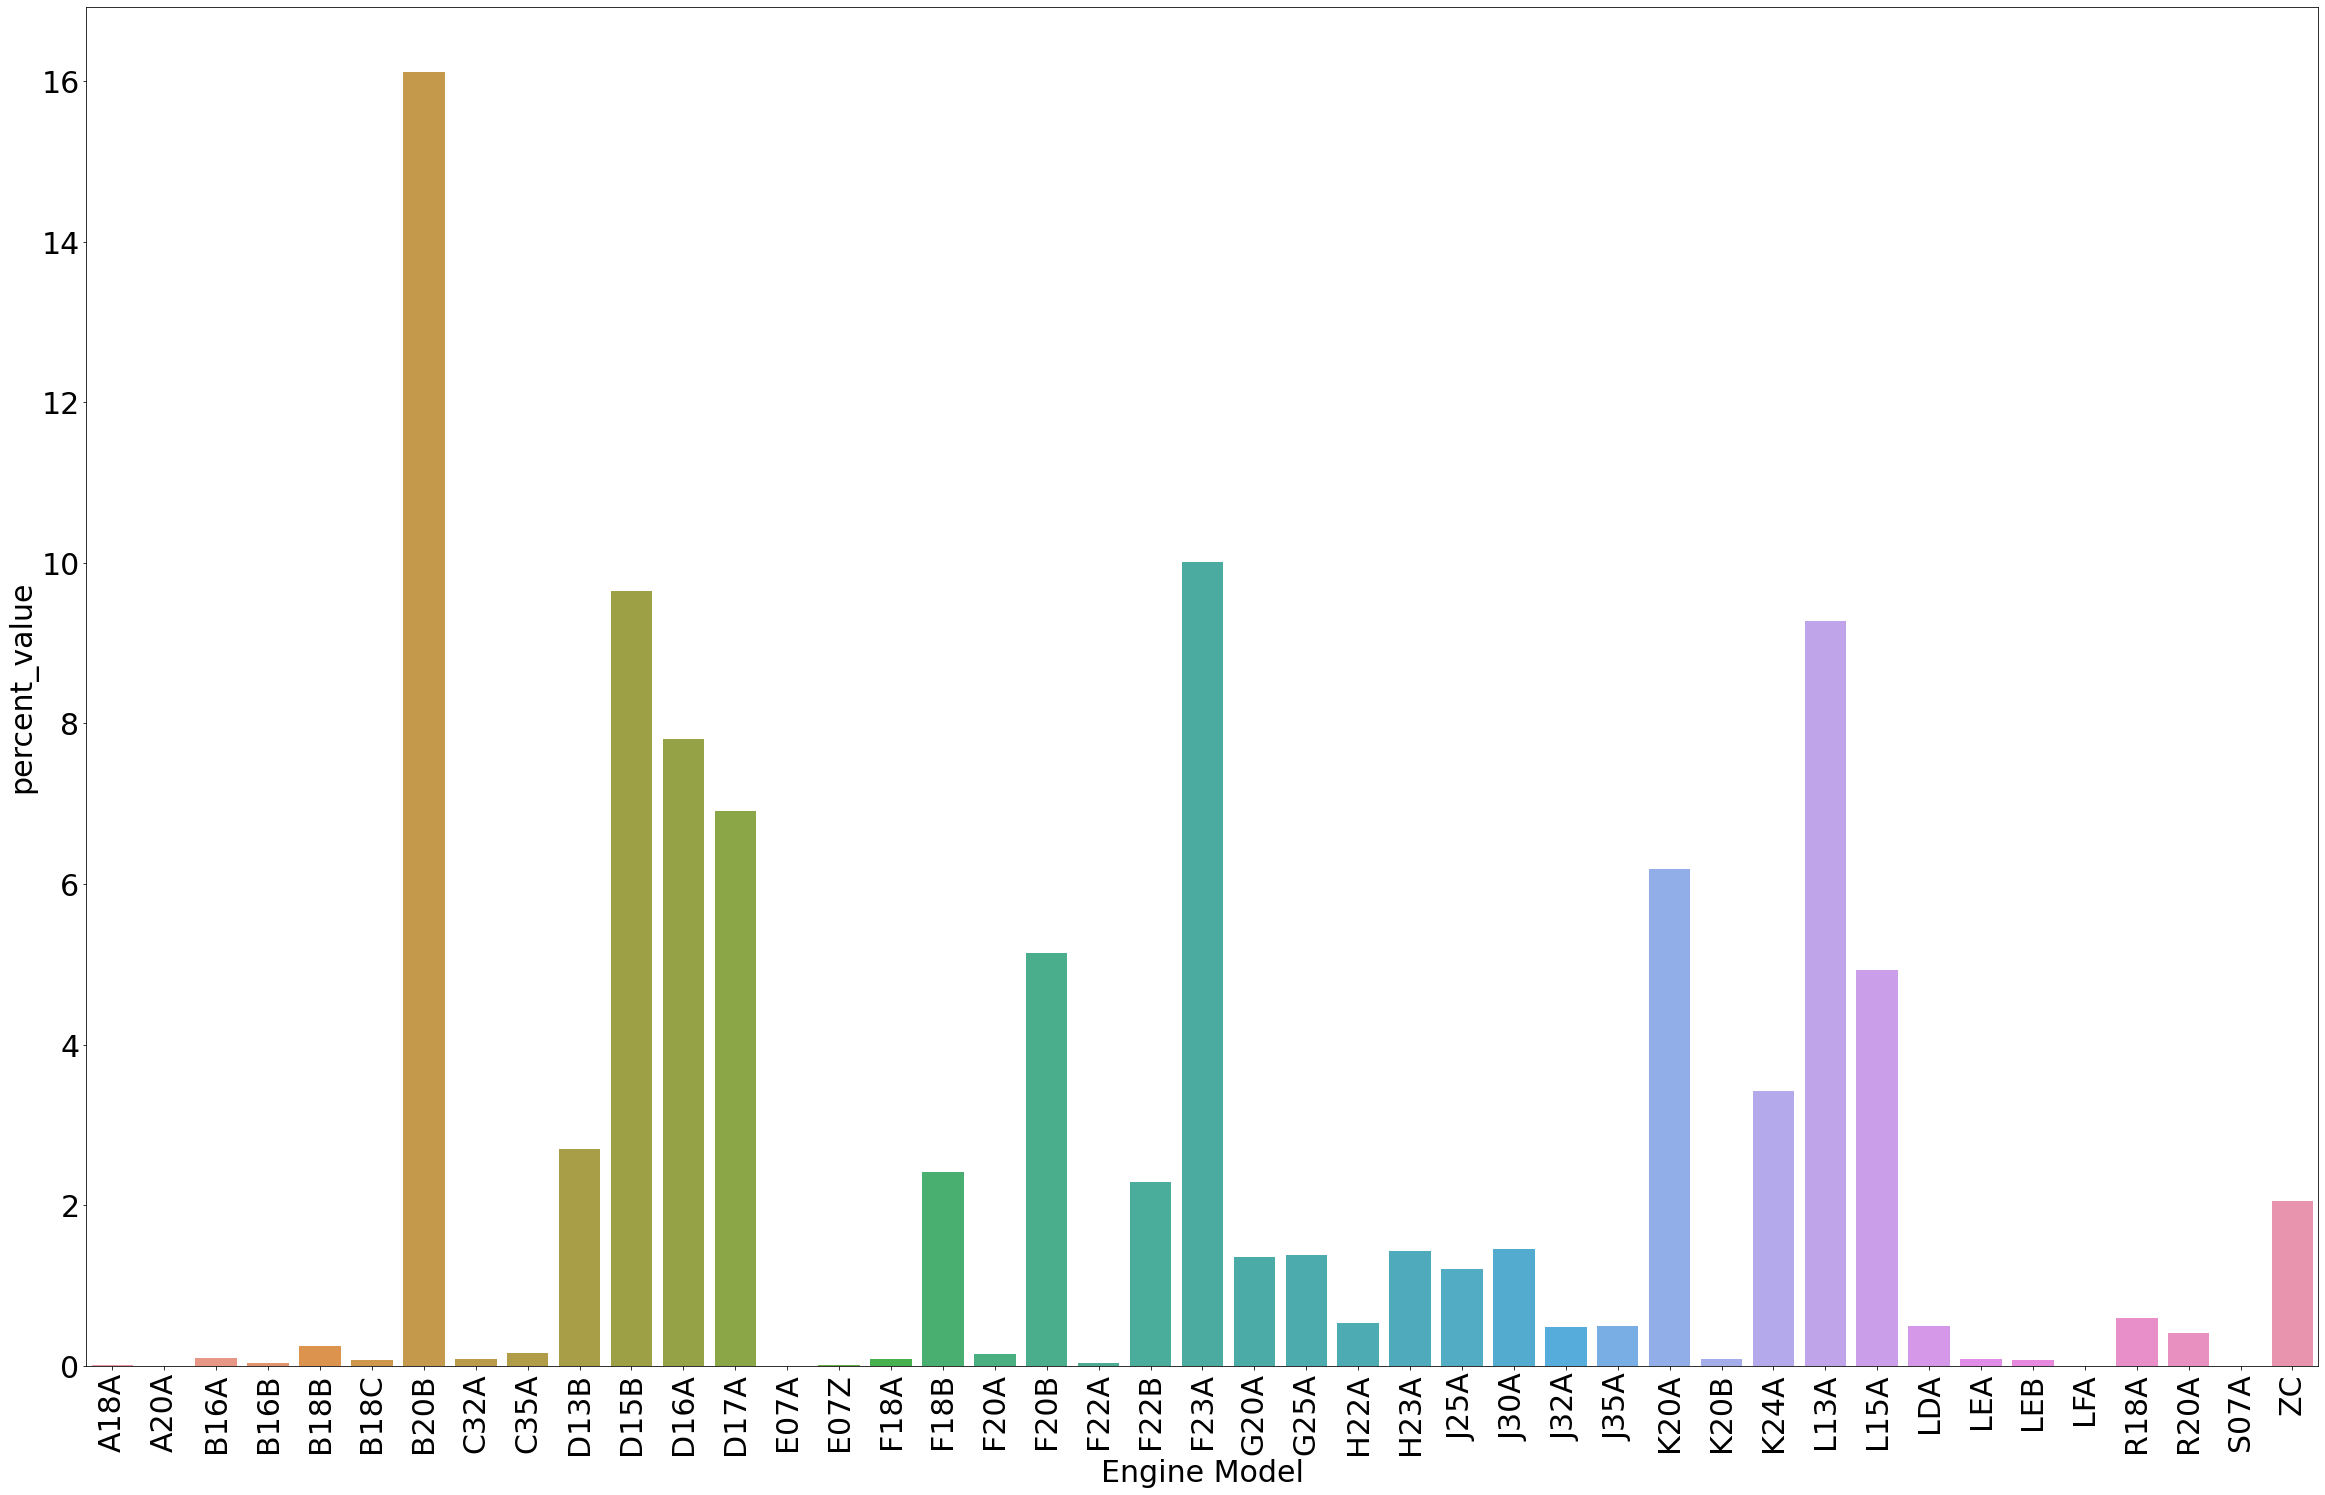

In [382]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

# Nissan

In [383]:
df_toyota = df_GTO_Japan[df_GTO_Japan.Producer.str.contains('NISSAN')]

In [384]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_toyota['Product Description'].tolist():
    list_em = extract_engine_model(des,list_nissan)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['Z16-083719'],
 ['QR20DE-514888A'],
 ['QG18DE-232084A'],
 ['CD20-620184X'],
 ['MR20DE-765653A', 'VQ25DE-361458A'],
 ['MR20DE-040602A', 'QR20DE-325617A'],
 ['QG15DE-437112A', 'QG18DE-204079B'],
 ['CR12DE-349695', 'SR20DE-289838B'],
 ['TD27-233915'],
 ['RB20-27'],
 ['RB20-072883B'],
 ['QD32-004403T'],
 ['QD32-085246T'],
 ['Z16-726388X'],
 ['Z20-789977X'],
 ['KA24DE-1077550'],
 ['A15-S44963'],
 ['VQ20DE-186630A', 'VQ20DE-091864A'],
 ['RB20-191329B'],
 ['NA20-815642X'],
 ['Z20-Б'],
 ['NA20-828421X'],
 ['RB20-111333B'],
 ['RB20-712611X'],
 ['Z20-Б'],
 ['NA20-809845'],
 ['TD27-383808'],
 ['RB20-214019B'],
 ['RB20-219005B'],
 ['RB20-076053B'],
 ['RB20-176543B'],
 ['RB20-126956B'],
 ['RB20-211227B'],
 ['NA20-881013X'],
 ['NA16-013845'],
 ['RB20-209404B'],
 ['RB20-712945X'],
 ['RB20-165207B'],
 ['GA15DE-351931B',
  'QG15DE-495358A',
  'QG15DE-360040',
  'QG15DE-481815A',
  'QG15DE-231623B',
  'QG18DE-397556',
  'VQ20DE-224021A'],
 ['RB20-229334B'],
 ['NA16-008282'],
 ['RB20-214019B'],
 ['NA20

In [385]:
len(list_all_engine_model_toyota_GTO_JP_filter)

764

In [386]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [387]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0            Z16
1         QR20DE
2         QG18DE
3           CD20
4         MR20DE
..           ...
965       QG15DE
966       VQ20DE
967       VQ23DE
968       VK45DE
969         RB20

[970 rows x 1 columns]

In [388]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0           A14      1           0.10
1           A15     39           4.02
2          CD17      1           0.10
3          CD20     17           1.75
4        CG13DE      3           0.31
5        CGA3DE     12           1.24
6        CR12DE      9           0.93
7        CR14DE      4           0.41
8            D5     10           1.03
9          ED33      1           0.10
10         FD35      1           0.10
11          FE6      2           0.21
12       GA13DE      2           0.21
13       GA13DS      2           0.21
14       GA15DE      6           0.62
15      HR12DDR      1           0.10
16       HR15DE      6           0.62
17       HR16DE      1           0.10
18       KA20DE      1           0.10
19       KA24DE      2           0.21
20           L8     15           1.55
21       MR20DE     12           1.24
22         NA16     24           2.47
23         NA20    128          13.20
24           PF      1           0.10
25         QD32     15           1.55
26       QG13DE      2           0.21
27       QG15DE     31           3.20
28       QG18DE     10           1.03
29       QR20DD      7           0.72
30       QR20DE     18           1.86
31       QR25DD      2           0.21
32       QR25DE      1           0.10
33         RB20    453          46.70
34       RB20DE      3           0.31
35       SR18DE      4           0.41
36       SR20DE      6           0.62
37      SR20DET      1           0.10
38       SR20VE      1           0.10
39      SR20VET      1           0.10
40         TD27     22           2.27
41        VG30E      1           0.10
42        VG33E      2           0.21
43       VK45DD      2           0.21
44       VK45DE      1           0.10
45       VQ20DE     11           1.13
46       VQ23DE      8           0.82
47       VQ25DD      3           0.31
48       VQ25DE      2           0.21
49       VQ30DE      1           0.10
50       VQ35DE      5           0.52
51          Z16     23           2.37
52          Z18      4           0.41
53          Z20     28           2.89
54          Z24      1           0.10

In [389]:
df_freq_toyota.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
33         RB20    453          46.70
23         NA20    128          13.20
1           A15     39           4.02
27       QG15DE     31           3.20
53          Z20     28           2.89

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

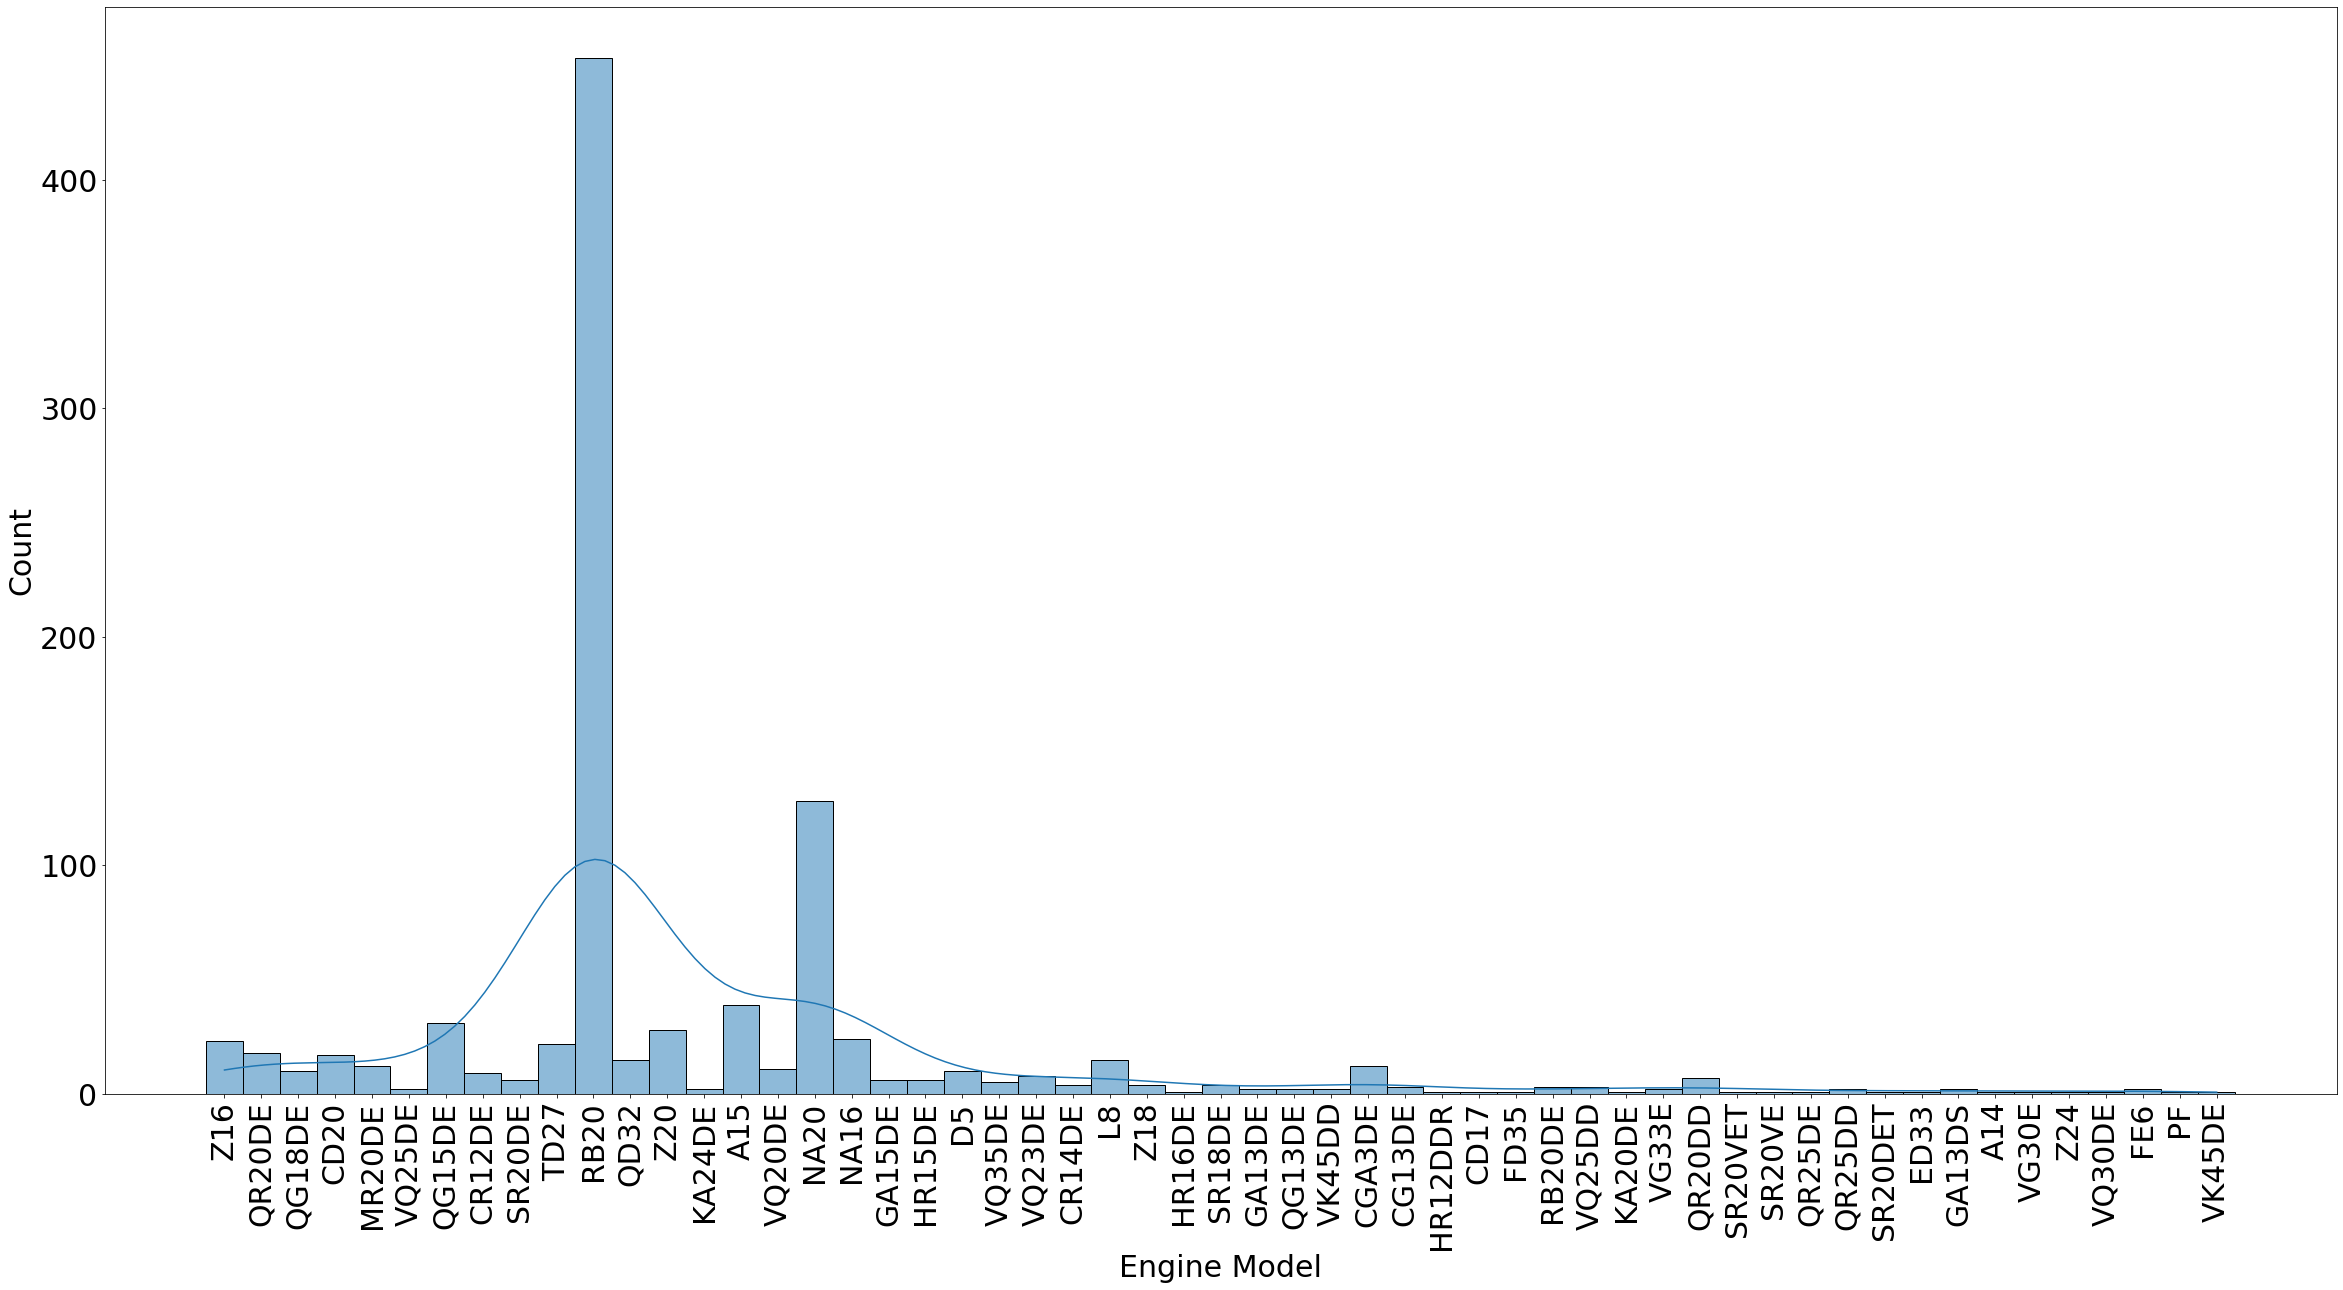

In [390]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

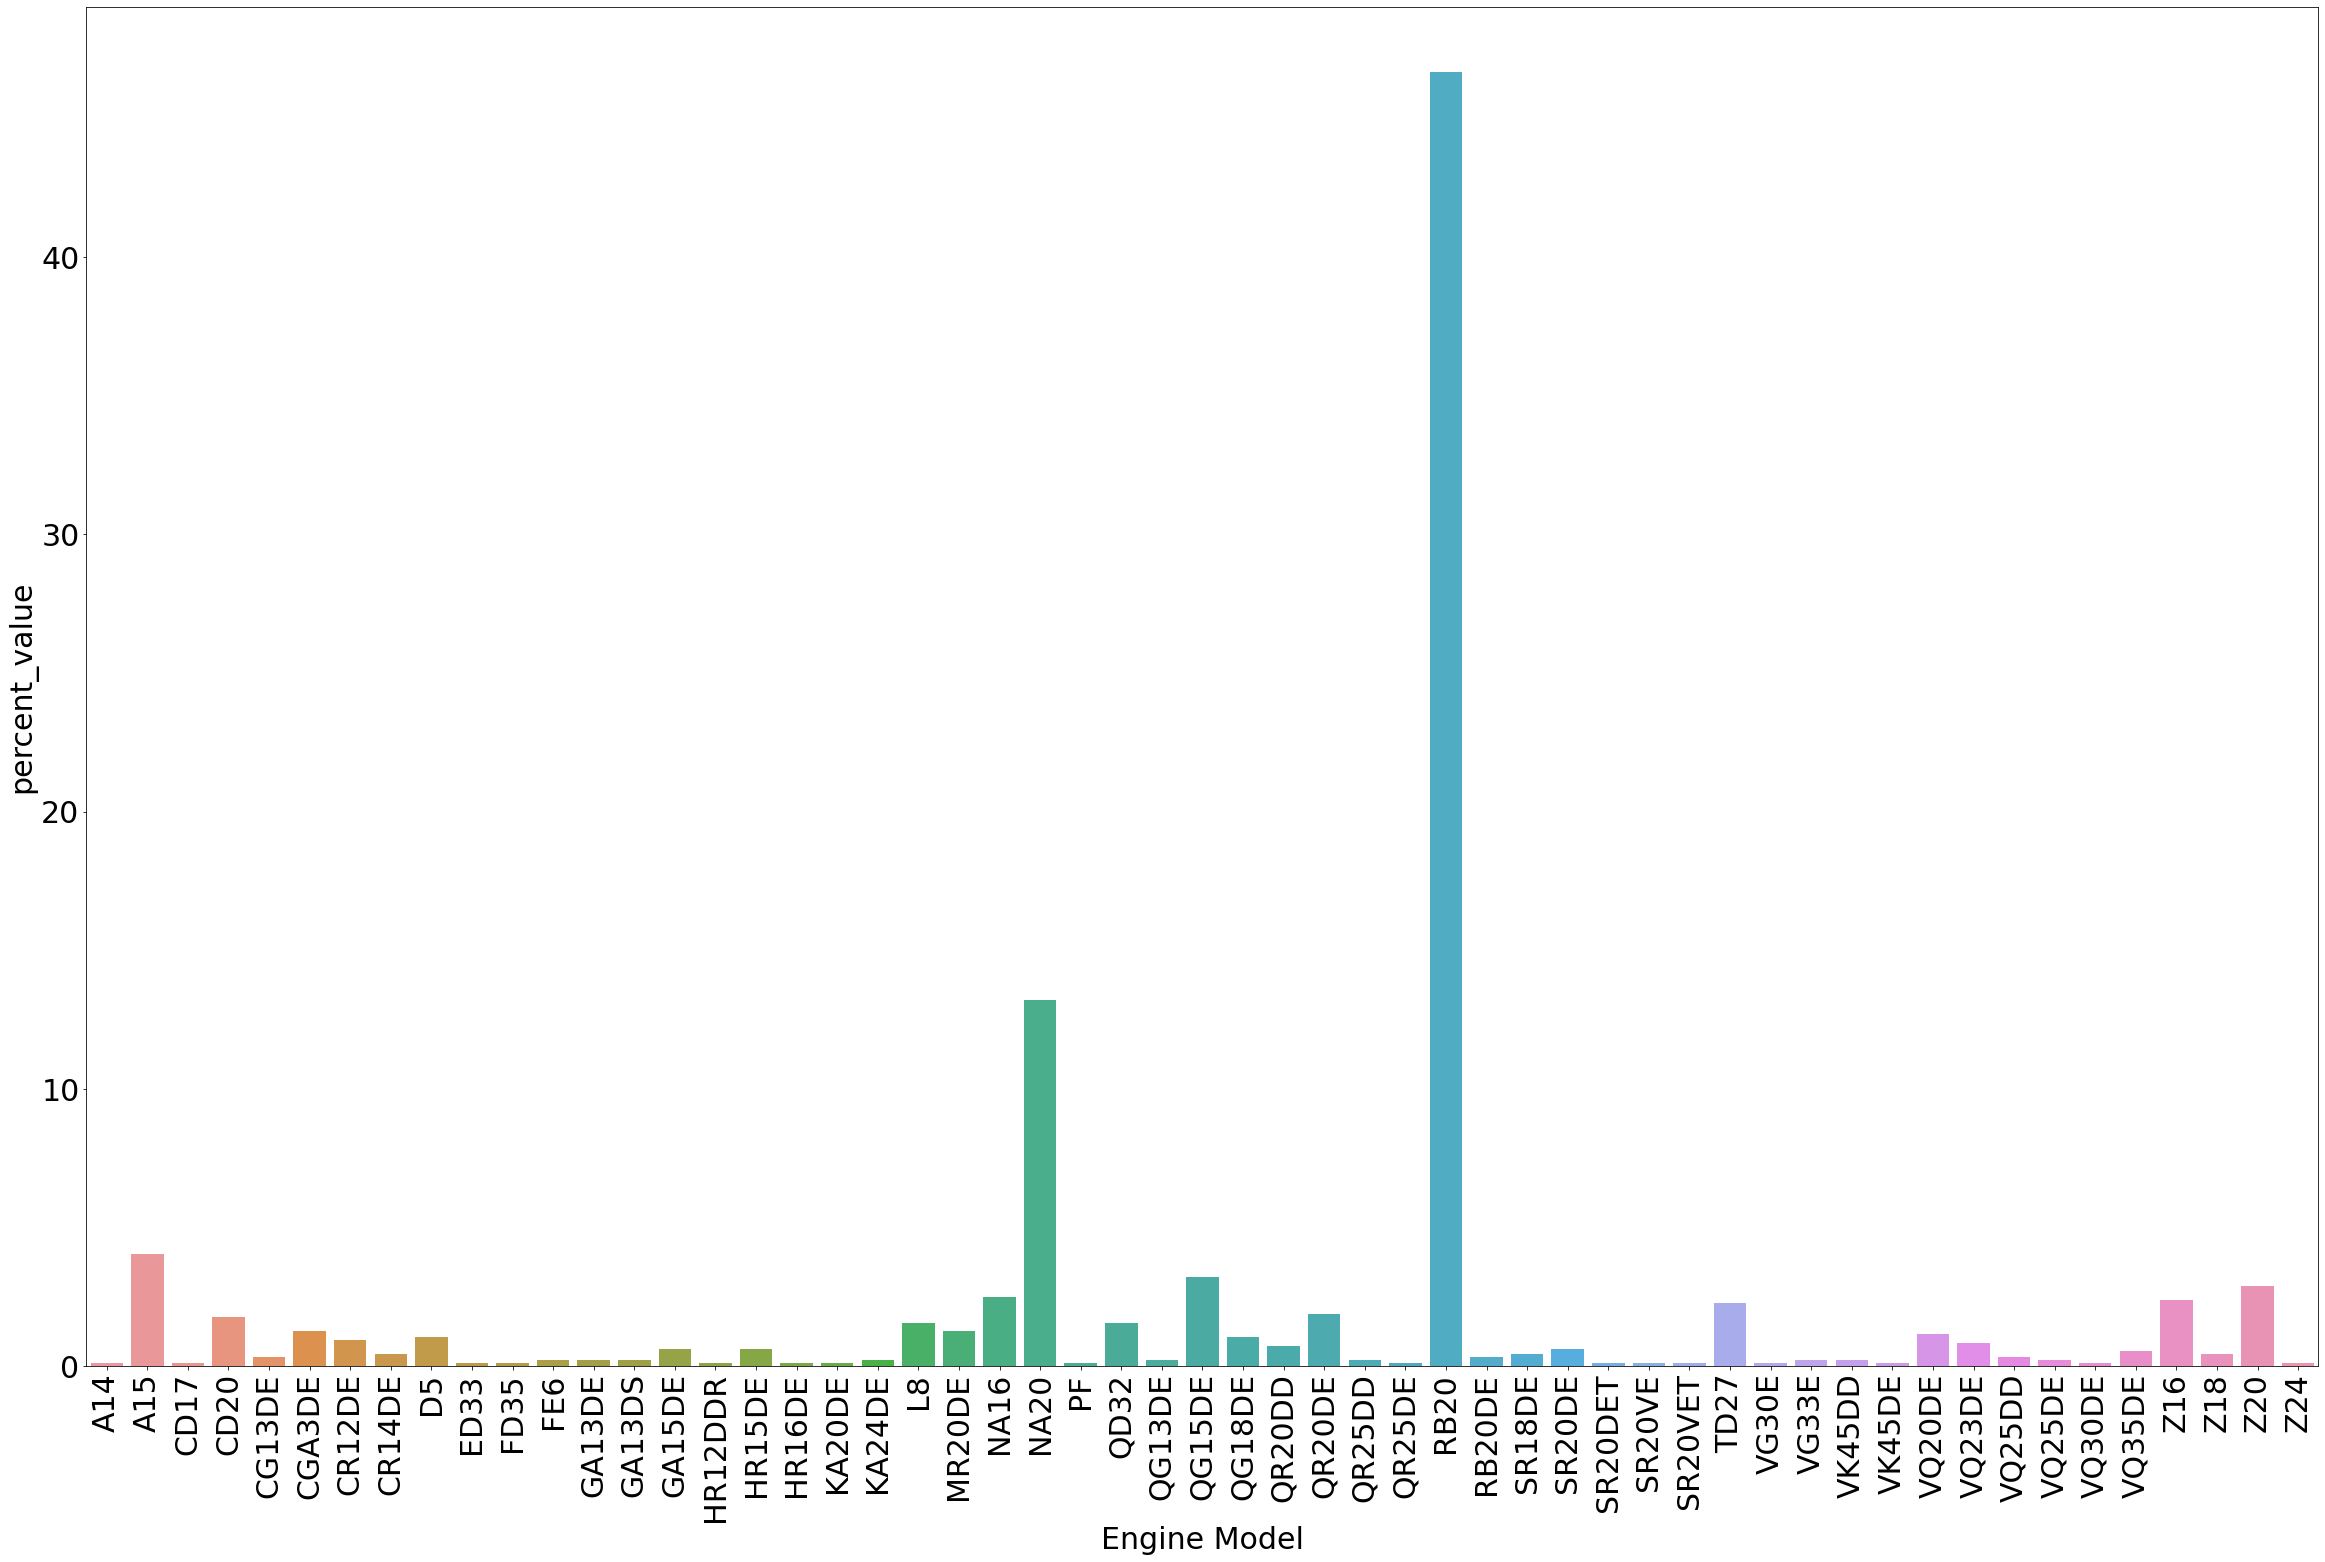

In [391]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

# Subaru

In [ ]:
df_toyota = df_GTO_Japan[df_GTO_Japan.Producer.str.contains('SUBARU')]

In [392]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_toyota['Product Description'].tolist():
    list_em = extract_engine_model(des,list_subaru)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['EJ20-688808'],
 ['EJ20-A893840'],
 ['EJ20-C428391'],
 ['EJ25-002017'],
 ['EJ18-366198'],
 ['EJ20-B126922'],
 ['EJ20-B2', 'EJ20-B953614'],
 ['EJ20-550209', 'EJ25-C098149'],
 ['EJ20-A810903'],
 ['EJ20-C209475',
  'EJ25-B289951',
  'EJ25-C155081',
  'EJ25-672320',
  'EZ30-U040676'],
 ['EJ20-B569306'],
 ['EJ20-878890', 'EJ20-997176', 'EJ20-B006334', 'EJ20-B894365'],
 ['EJ20-306374'],
 ['EJ20-261480', 'EJ20-397141', 'EJ20-B828585', 'EJ20-B5611052'],
 ['EJ20-B389013', 'EJ20-683882'],
 ['EJ20-B526842'],
 ['EJ25-534557'],
 ['EJ20-C011716', 'EJ25-B318637'],
 ['EJ25-C820486'],
 ['EZ30-U094086', 'FB16-1463036'],
 ['EJ25-D921276', 'EJ25-D894334'],
 ['EL15-118799'],
 ['EJ20-C002544'],
 ['EL15-D571472'],
 ['EJ25-C940212'],
 ['EL15-E246065'],
 ['EJ25-C841459'],
 ['EJ15-C262640', 'EN07-97731'],
 ['EJ20-479800'],
 ['EZ30-U169444'],
 ['EJ20-E129267'],
 ['EJ20-C256912', 'EJ25-E101417'],
 ['EJ20-653857', 'EJ25-B054393', 'FB20-Y120090'],
 ['EJ20-D186559'],
 ['EJ20-5402112',
  'EJ20-A879381',
  'EJ20-B76

In [393]:
len(list_all_engine_model_toyota_GTO_JP_filter)

161

In [394]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [395]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0           EJ20
1           EJ20
2           EJ20
3           EJ25
4           EJ18
..           ...
267         EJ20
268         EJ20
269         EJ25
270         EJ20
271         EJ25

[272 rows x 1 columns]

In [396]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0         EJ15     23           8.46
1         EJ18      4           1.47
2         EJ20    191          70.22
3         EJ25     37          13.60
4         EL15      4           1.47
5         EN07      2           0.74
6         EZ30      7           2.57
7         FB16      1           0.37
8         FB20      3           1.10

In [397]:
df_freq_toyota.nlargest(5,['count','percent_value'])

Engine Model  count  percent_value
2         EJ20    191          70.22
3         EJ25     37          13.60
0         EJ15     23           8.46
6         EZ30      7           2.57
1         EJ18      4           1.47

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

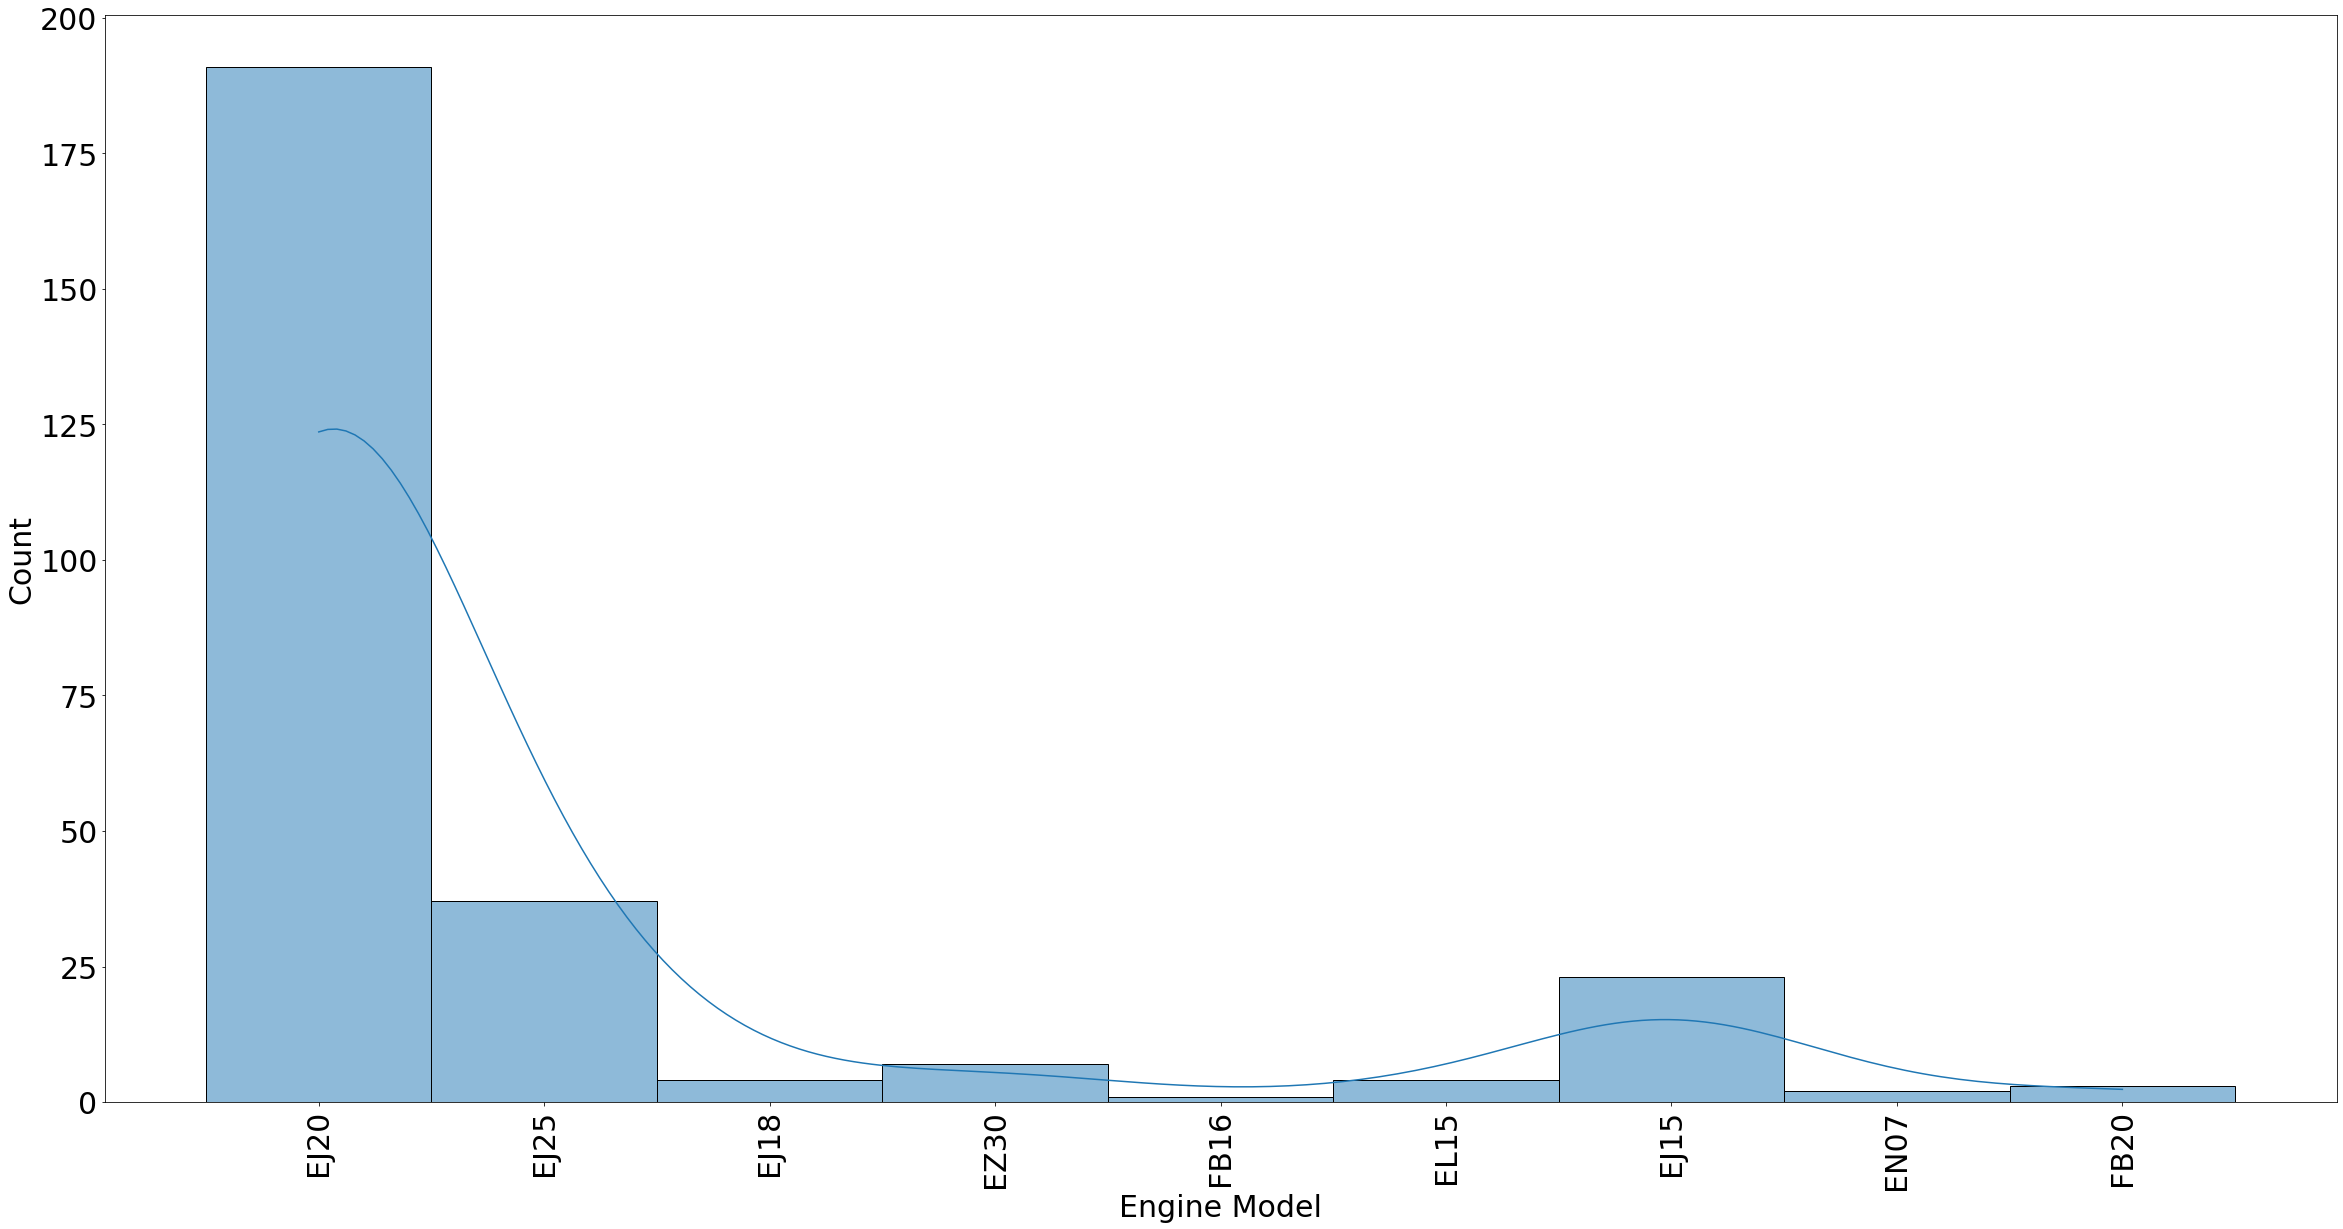

In [398]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

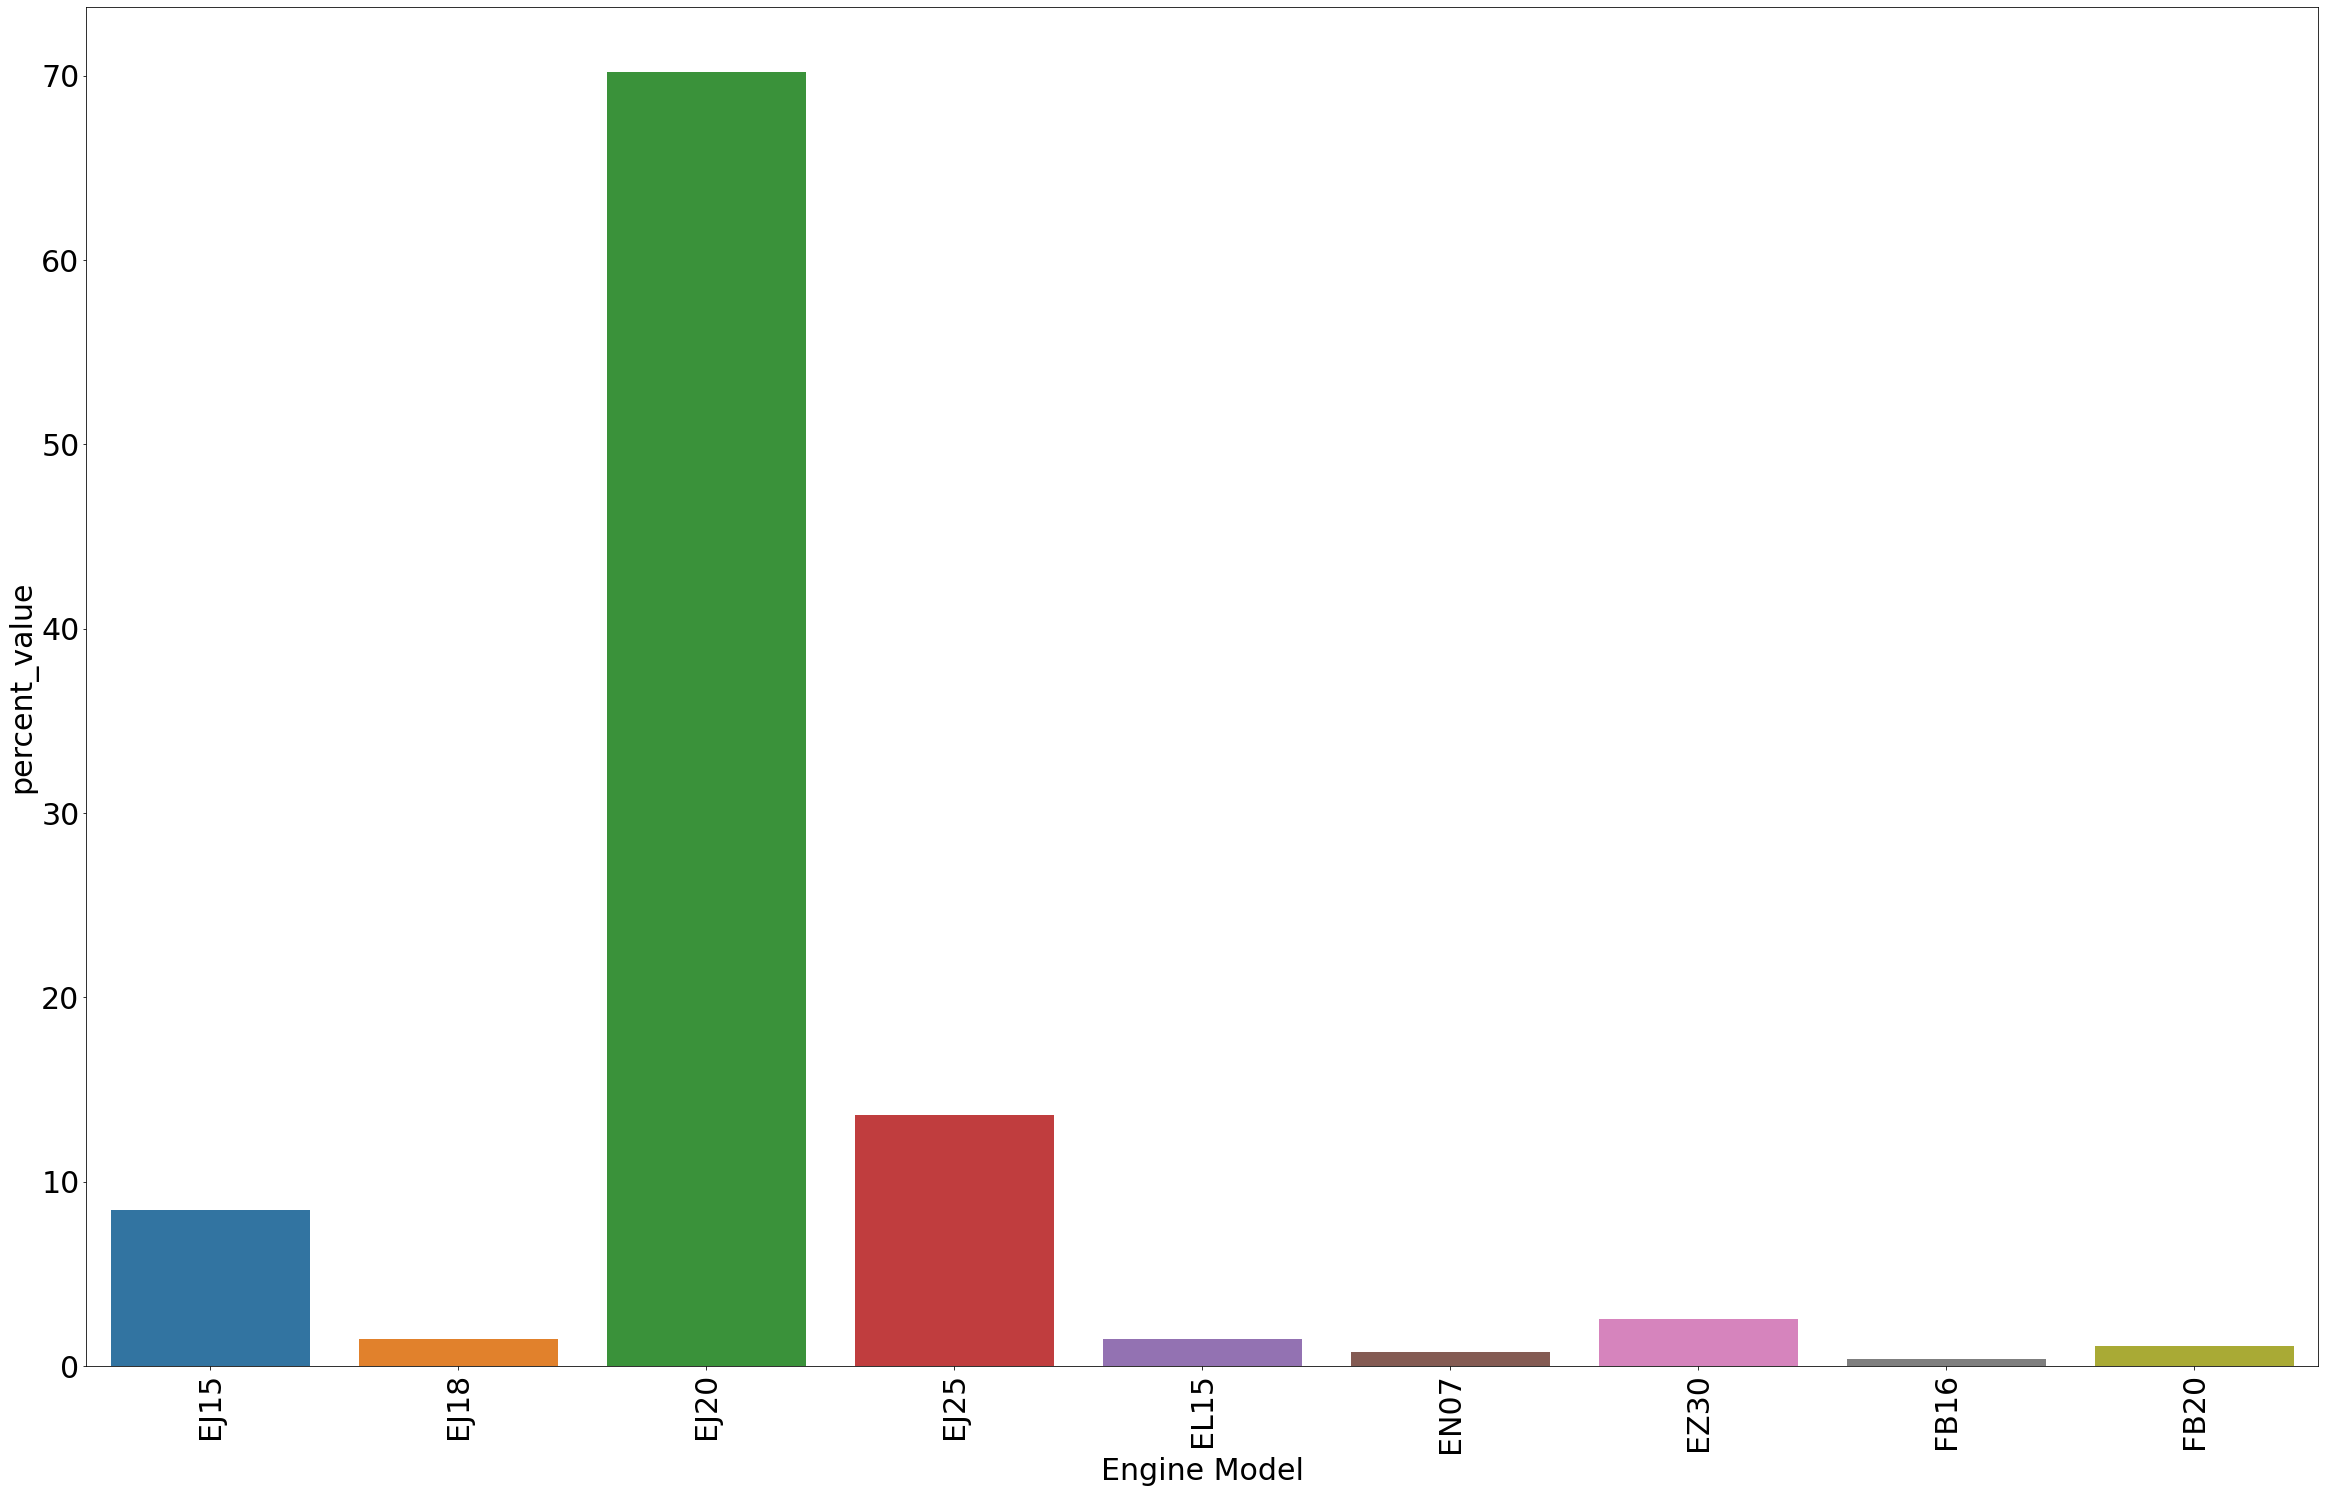

In [399]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

# Dữ liệu của Kaiho lọc từ GTO

In [132]:
df_merged['shipper_extract']  = df_merged['Shipper '].map(lambda x : 'KAIHO' if 'KAIHO' in x else ('Others' if x  else 'None'))
df_merged['country_extract']  = df_merged['Country of Sales'].map(lambda x : 'Japan' if ('japan' in x.lower() or 'jp' in x.lower() or 'jpn' in x.lower()) else ('Others' if x  else 'None'))
df_kaiho = df_merged[(df_merged['shipper_extract'] == 'KAIHO') & (df_merged['country_extract'] == 'Japan')]

Register Date     HS Code  \
10        2018-01-01  8407343009   
12        2018-01-01  8407343009   
51        2018-01-01  8407343009   
52        2018-01-01  8407343009   
58        2018-01-01  8407343009   
...              ...         ...   
100410    2016-12-01  8407343009   
100524    2016-12-01  8407343009   
100525    2016-12-01  8407343009   
100535    2016-12-01  8407343009   
100542    2016-12-01  8407343009   

                                      Product Description  \
10      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
12      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
51      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
52      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
58      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
...                                                   ...   
100410  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100524  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100525  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100535  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100542  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                             Producer       Brand Place of Receipt  \
10           TOYOTA MOTOR CORPORATION      TOYOTA       ТОЯМАШИНКО   
12             MITSUBISHI CORPORATION  MITSUBISHI       ТОЯМАШИНКО   
51              HONDA MOTOR CO., LTD.       HONDA      ВЛАДИВОСТОК   
52                           DAIHATSU    DAIHATSU      ВЛАДИВОСТОК   
58                        MITSUBISHI   MITSUBISHI      ВЛАДИВОСТОК   
...                               ...         ...              ...   
100410                         NISSAN      NISSAN      ВЛАДИВОСТОК   
100524  MITSUBISHI MOTORS CORPORATION  MITSUBISHI      ВЛАДИВОСТОК   
100525  MITSUBISHI MOTORS CORPORATION  MITSUBISHI      ВЛАДИВОСТОК   
100535               TOYOTA MOTOR CO.      TOYOTA        ВОСТОЧНЫЙ   
100542                HONDA MOTOR CO.       HONDA        ВОСТОЧНЫЙ   

       Country of Origin Country of Sales                 Shipper   \
10        JP, JPN, Japan   JP, JPN, Japan    KAIHO SANGYO CO., LTD   
12        JP, JPN, Japan   JP, JPN, Japan    KAIHO SANGYO CO., LTD   
51        JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD.   
52        JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD.   
58        JP, JPN, Japan   JP, JPN, Japan    KAIHO SANGYO CO.,LTD    
...                  ...              ...                      ...   
100410    JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD    
100524    JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD.   
100525    JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD.   
100535    JP, JPN, Japan   JP, JPN, Japan     KAIHO SANGYO CO.,LTD   
100542    JP, JPN, Japan   JP, JPN, Japan     KAIHO SANGYO CO.,LTD   

                                          Shipper Address  ...  \
10      920-0209, , ISHIKAWA, 1-25 HIGASHIKAGATSUME-MA...  ...   
12      920-0209, , ISHIKAWA, 1-25 HIGASHIKAGATSUME-MA...  ...   
51      920-0209, ISHIKAWA, KANAZAWA-SHI, HIGASHIKAGAT...  ...   
52      920-0209, , ISHIKAWA KEN, HIGASHIKAGATSUME-MAC...  ...   
58      , JAPAN, ISHIKAWA, 1-25 HIGASHIKAGATSUME-MACHI...  ...   
...                                                   ...  ...   
100410  KANAZAWA-SHI 920-0209 1-25 HIGASHIKAGATSUME-MA...  ...   
100524  KANAZAWA-SHI 920-0209 HIGASHIKAGATSUME-MACHI 1...  ...   
100525  KANAZAWA-SHI 920-0209 HIGASHIKAGATSUME-MACHI 1...  ...   
100535  KANAZAWA-SHI ISHIKAWA,920-0209 1-25 HIGASHI-KA...  ...   
100542  KANAZAWA-SHI ISHIKAWA,920-0209 1-25 HIGASHIKAG...  ...   

       Unit of Measure Incoterms  Gross Weight in KG Net Weight in KG  \
10                 NaN       FOB              6630.0           6630.0   
12                 NaN       FOB              1230.0           1230.0   
51                 NaN       CFR              7770.0           7770.0   
52                 NaN       CFR               820.0            820.0   
5

# TOYOTA

In [169]:
df_subaru = df_kaiho[df_merged.Producer.str.contains('TOYOTA')]
df_subaru

<ipython-input-169-d021de2c48da>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_subaru = df_kaiho[df_merged.Producer.str.contains('TOYOTA')]


Register Date     HS Code  \
10       2018-01-01  8407343009   
12       2018-01-01  8407343009   
51       2018-01-01  8407343009   
52       2018-01-01  8407343009   
58       2018-01-01  8407343009   
...             ...         ...   
98868    2016-11-01  8407343009   
98923    2016-11-01  8407343009   
99025    2016-11-01  8407343009   
99964    2016-12-01  8407343009   
99973    2016-12-01  8407343009   

                                     Product Description  \
10     ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
12     ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
51     ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
52     ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
58     ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
...                                                  ...   
98868  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
98923  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
99025  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
99964  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
99973  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                       Producer       Brand Place of Receipt  \
10     TOYOTA MOTOR CORPORATION      TOYOTA       ТОЯМАШИНКО   
12       MITSUBISHI CORPORATION  MITSUBISHI       ТОЯМАШИНКО   
51        HONDA MOTOR CO., LTD.       HONDA      ВЛАДИВОСТОК   
52                     DAIHATSU    DAIHATSU      ВЛАДИВОСТОК   
58                  MITSUBISHI   MITSUBISHI      ВЛАДИВОСТОК   
...                         ...         ...              ...   
98868          TOYOTA MOTOR CO.      TOYOTA        ВОСТОЧНЫЙ   
98923                   TOYOTA       TOYOTA      ВЛАДИВОСТОК   
99025                    NISSAN      NISSAN      ВЛАДИВОСТОК   
99964          TOYOTA MOTOR CO.      TOYOTA        ВОСТОЧНЫЙ   
99973                   NISSAN       NISSAN      ВЛАДИВОСТОК   

      Country of Origin Country of Sales                 Shipper   \
10       JP, JPN, Japan   JP, JPN, Japan    KAIHO SANGYO CO., LTD   
12       JP, JPN, Japan   JP, JPN, Japan    KAIHO SANGYO CO., LTD   
51       JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD.   
52       JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD.   
58       JP, JPN, Japan   JP, JPN, Japan    KAIHO SANGYO CO.,LTD    
...                 ...              ...                      ...   
98868    JP, JPN, Japan   JP, JPN, Japan     KAIHO SANGYO CO.,LTD   
98923    JP, JPN, Japan   JP, JPN, Japan    KAIHO SANGYO CO.,LTD    
99025    JP, JPN, Japan   JP, JPN, Japan    KAIHO SANGYO CO.,LTD.   
99964    JP, JPN, Japan   JP, JPN, Japan     KAIHO SANGYO CO.,LTD   
99973    JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD    

                                         Shipper Address  ... Unit of Measure  \
10     920-0209, , ISHIKAWA, 1-25 HIGASHIKAGATSUME-MA...  ...             NaN   
12     920-0209, , ISHIKAWA, 1-25 HIGASHIKAGATSUME-MA...  ...             NaN   
51     920-0209, ISHIKAWA, KANAZAWA-SHI, HIGASHIKAGAT...  ...             NaN   
52     920-0209, , ISHIKAWA KEN, HIGASHIKAGATSUME-MAC...  ...             NaN   
58     , JAPAN, ISHIKAWA, 1-25 HIGASHIKAGATSUME-MACHI...  ...             NaN   
...                                                  ...  ...             ...   
98868  KANAZAWA-SHI ISHIKAWA,920-0209 1-25 HIGASHI-KA...  ...             NaN   
98923  ISHIKAWA 1-25 HIGASHIKAGATSUME-MACHI, KANAZAWA...  ...             NaN   
99025  KANAZAWA-SHI 920-0209 HIGASHIKAGATSUME-MACHI, ...  ...             NaN   
99964  KANAZAWA-SHI ISHIKAWA,920-0209 1-25 HIGASHIKAG...  ...             NaN   
99973  KANAZAWA-SHI 920-0209 1-25 HIGASHIKAGATSUME-MA...  ...             NaN   

      Incoterms  Gross Weight in KG Net Weight in KG Cargo Value USD  \
10          FOB              6630.0           6630.0        10020.67   
12          FOB              1230.0           1230.0         1858.02   
51          CFR              7770.0           7770.0        11732.70   
52   

In [172]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_subaru['Product Description'].tolist():
    list_em = extract_engine_model(des,list_toyota)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['1NZ-FE-B429227',
  '1NZ-FE-A726278',
  '2AZ-FE-4878584',
  '2AZ-FXE-1761741',
  '2NZ-FE-4340338',
  '2SZ-FE-1685445',
  '2SZ-FE-2251928'],
 ['T2-004508'],
 ['7K-0403558'],
 ['B-80']]

In [173]:
len(list_all_engine_model_toyota_GTO_JP_filter)

4

In [174]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
# list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [175]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0       1NZ-FE
1       1NZ-FE
2       2AZ-FE
3      2AZ-FXE
4       2NZ-FE
5       2SZ-FE
6       2SZ-FE
7           T2
8           7K
9            B

In [176]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0       1NZ-FE      2           20.0
1       2AZ-FE      1           10.0
2      2AZ-FXE      1           10.0
3       2NZ-FE      1           10.0
4       2SZ-FE      2           20.0
5           7K      1           10.0
6            B      1           10.0
7           T2      1           10.0

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

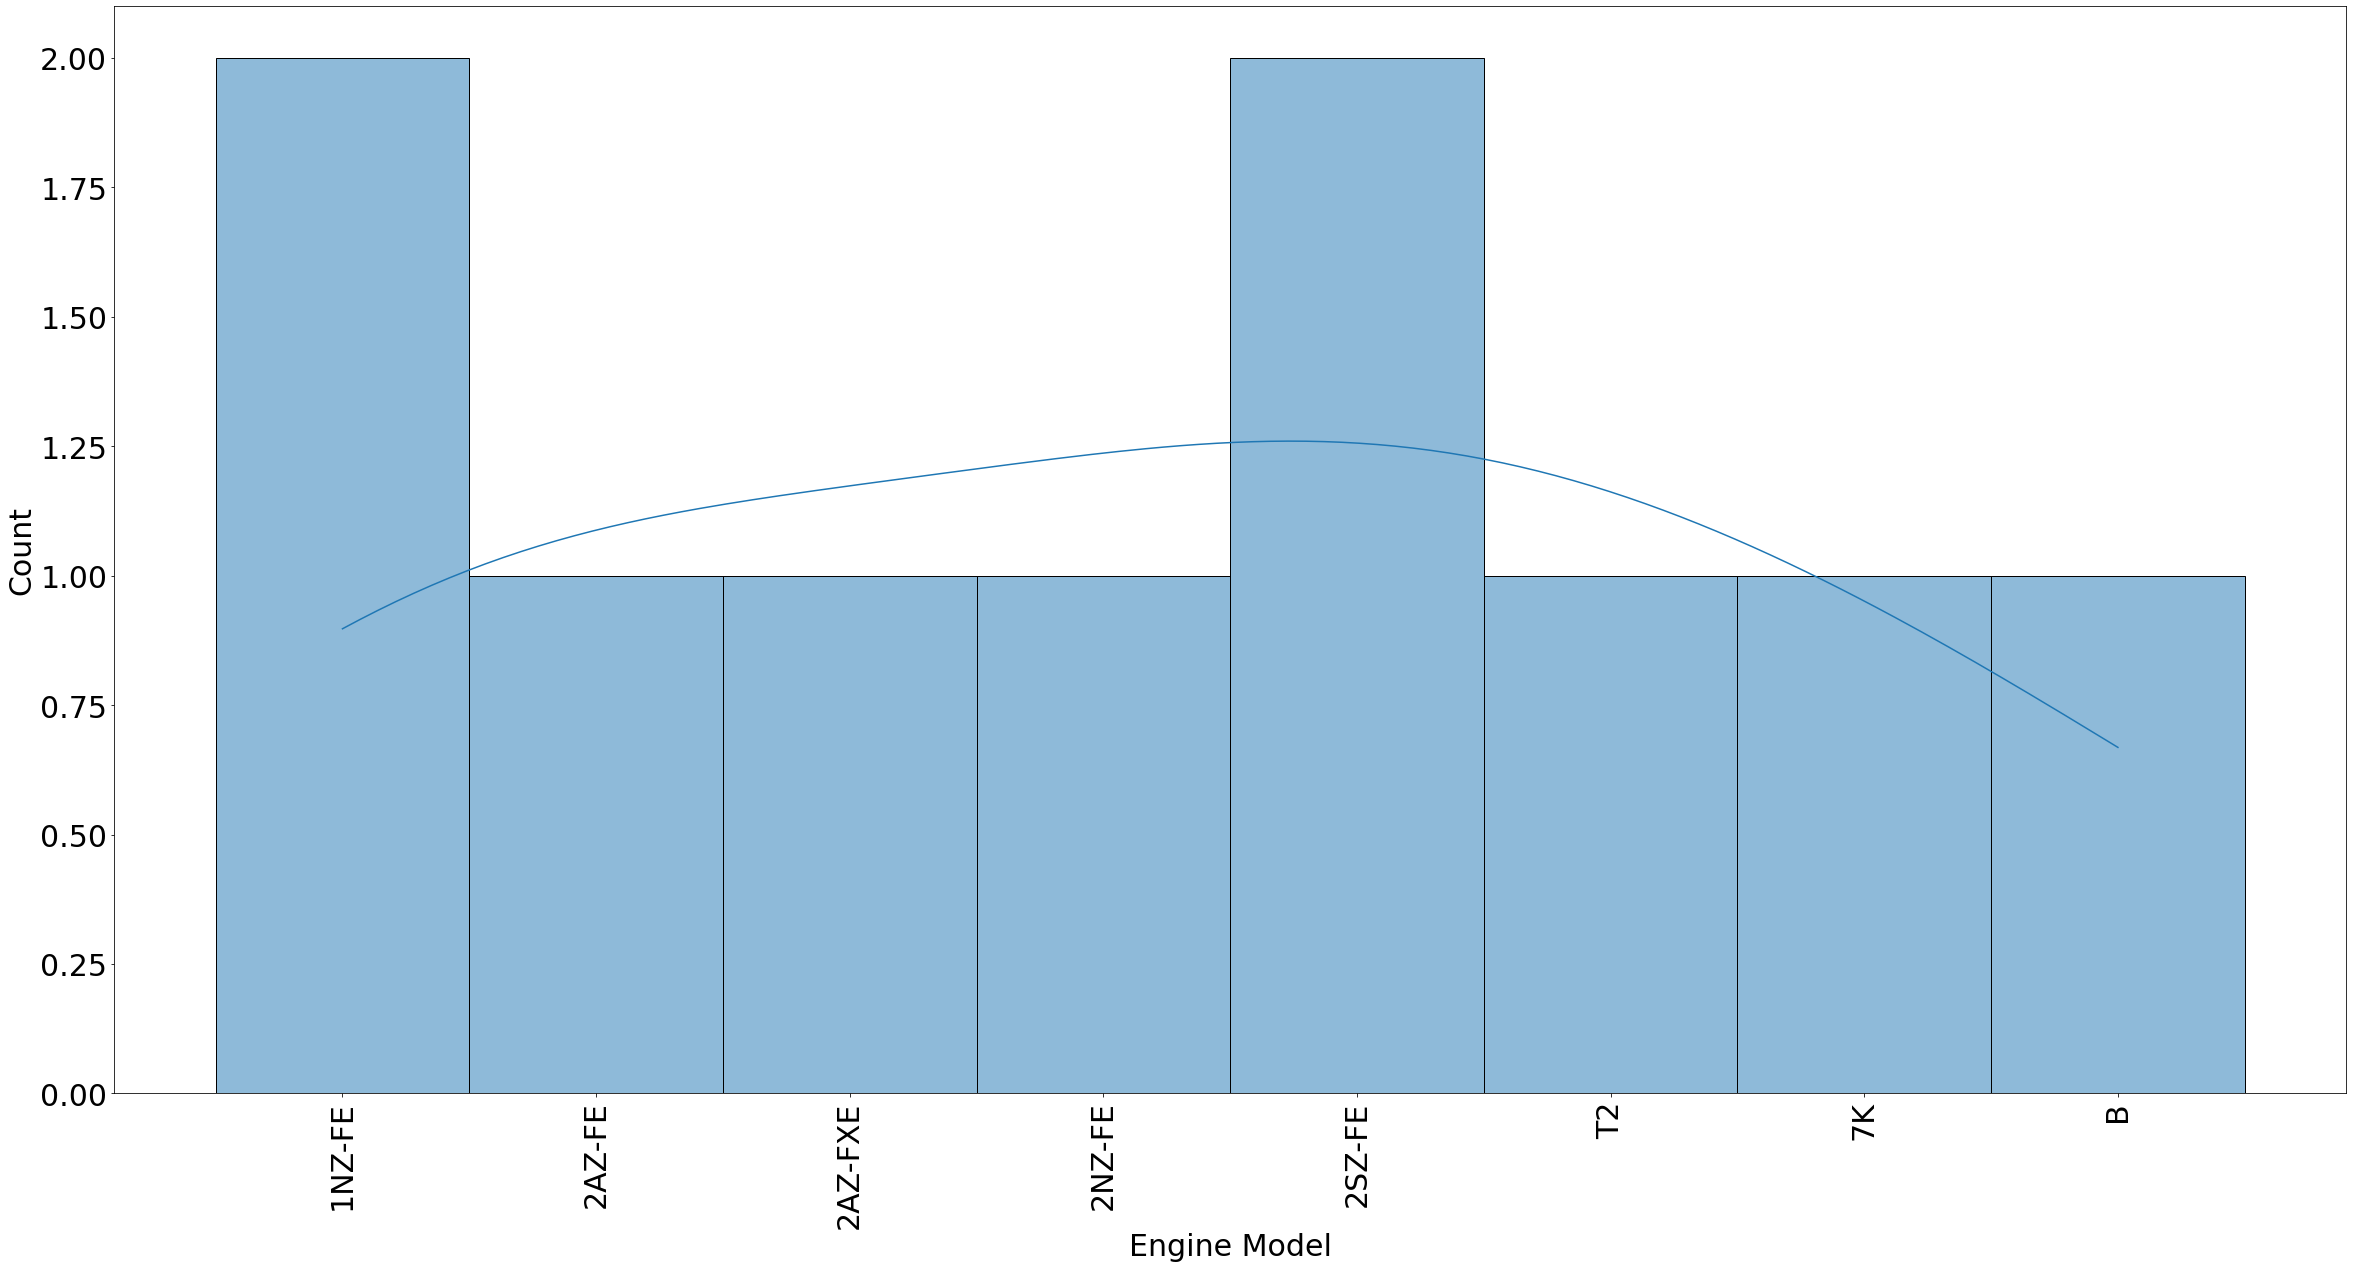

In [177]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

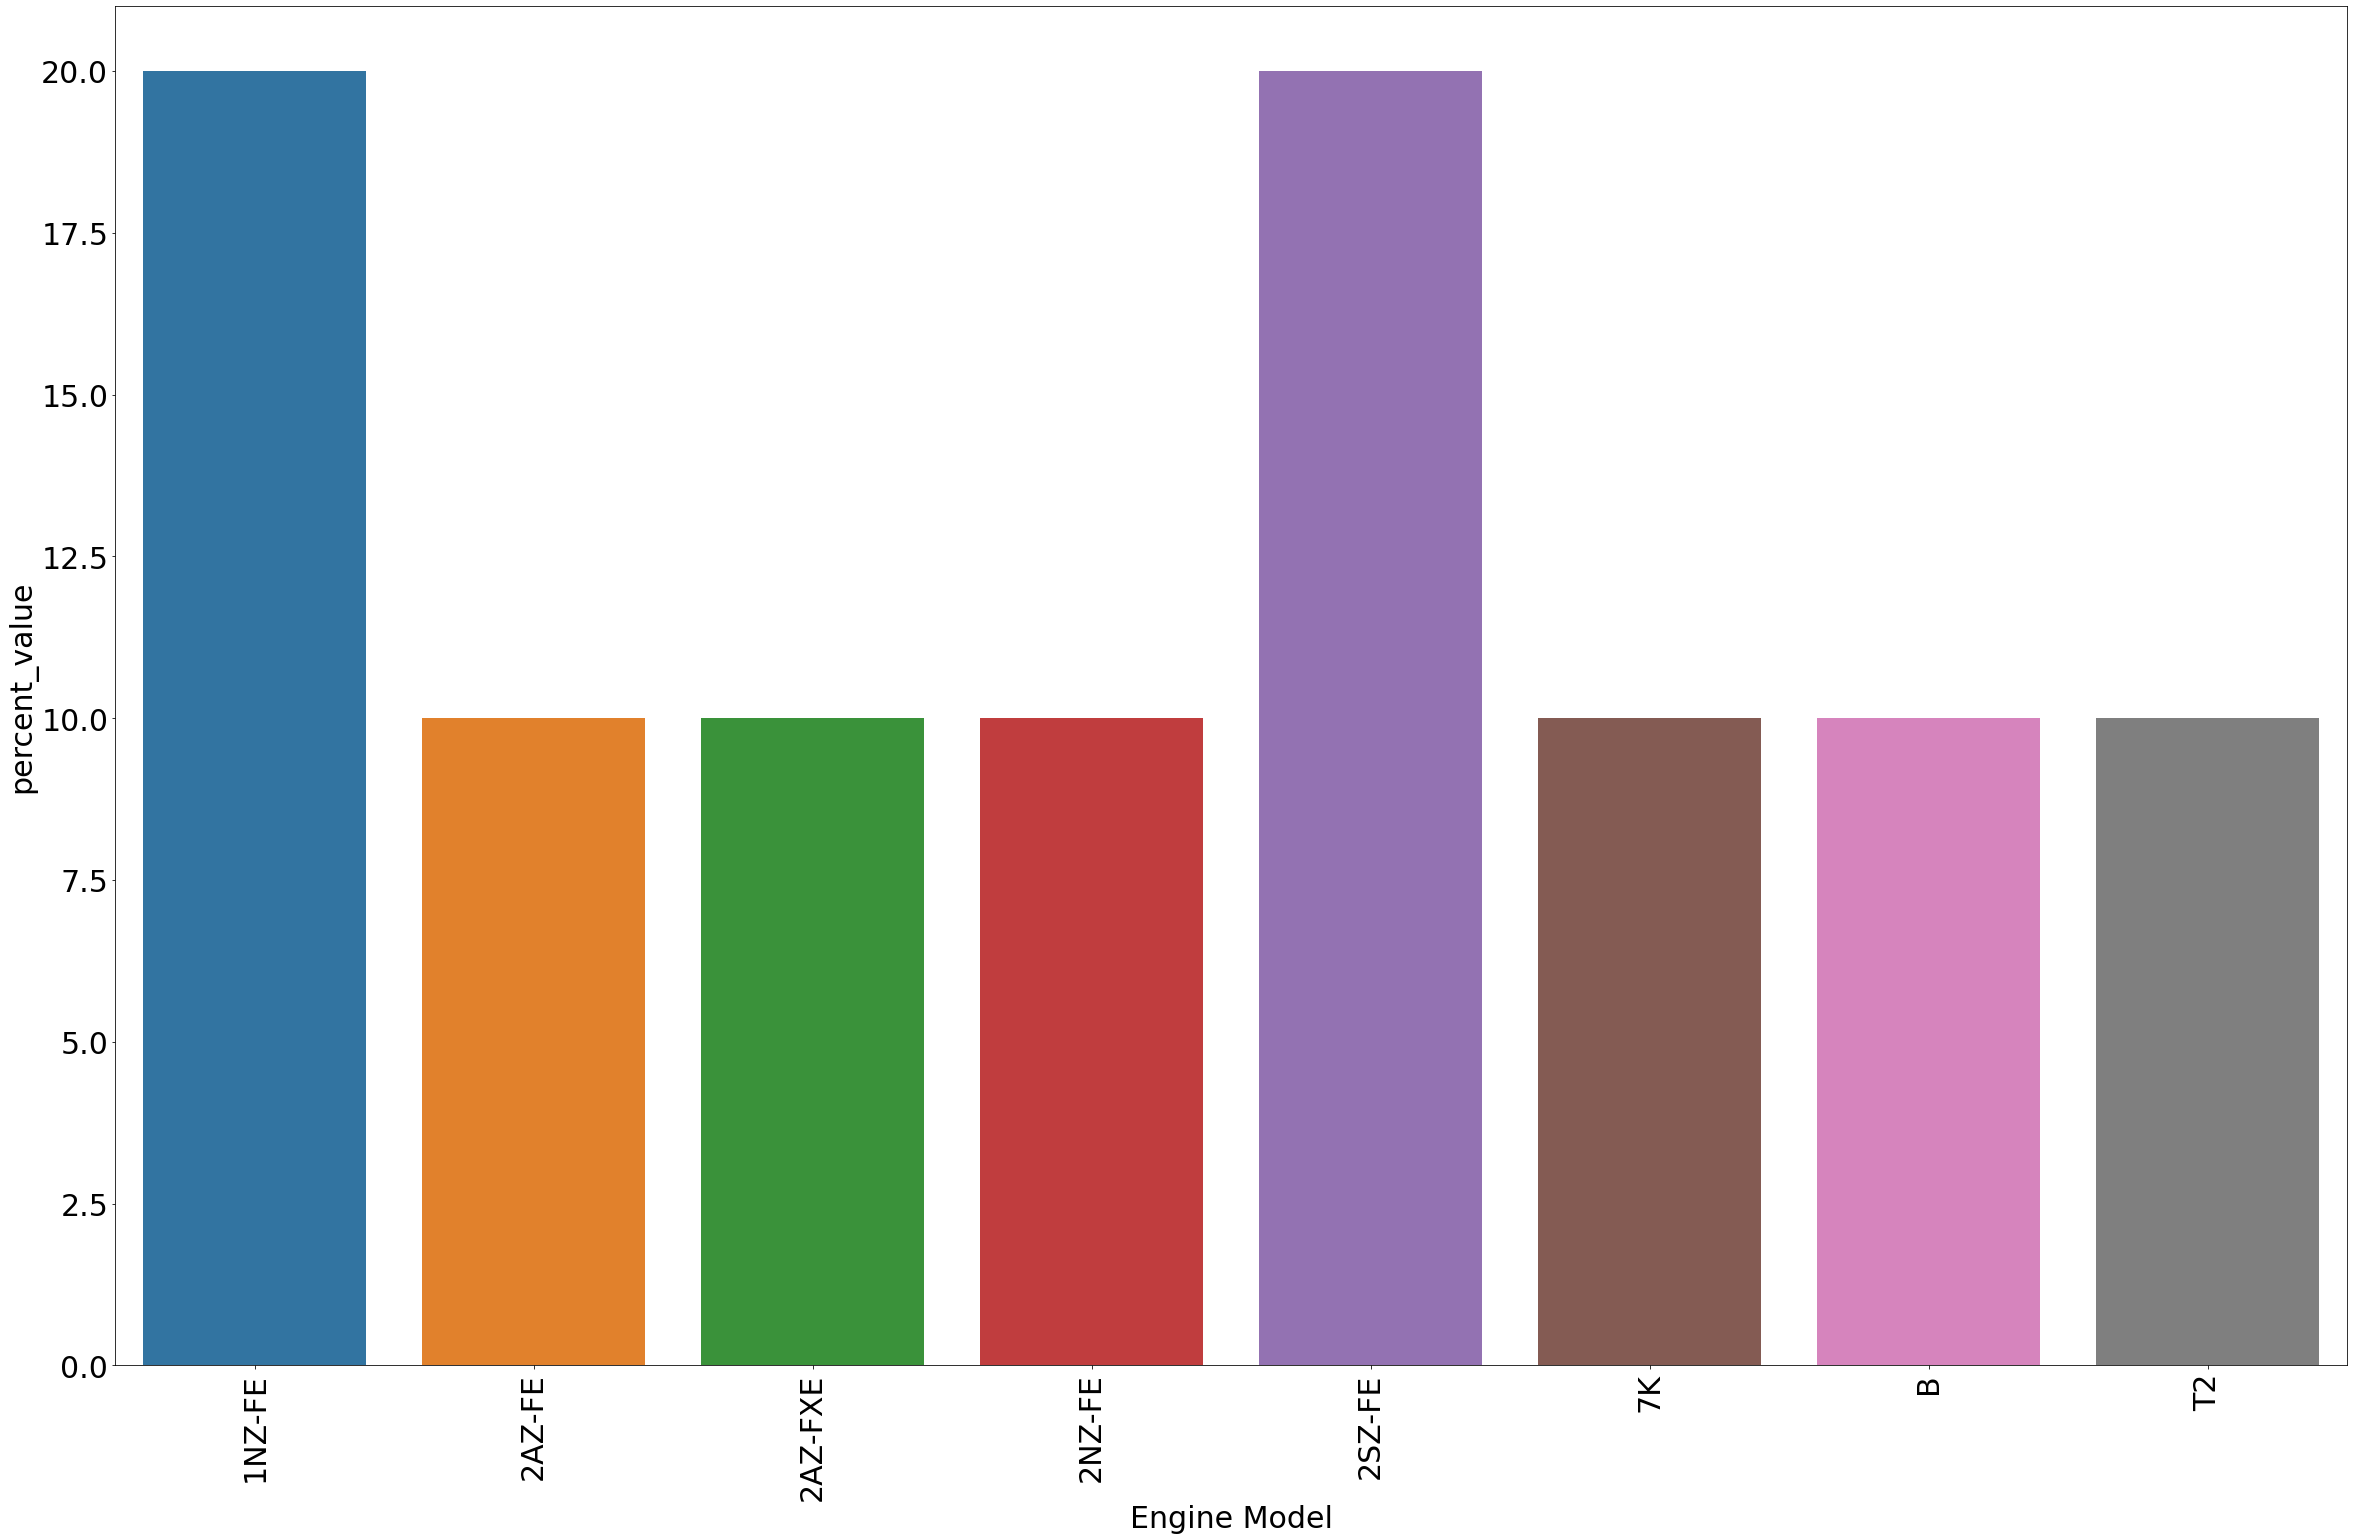

In [178]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

# MAZDA

In [179]:
df_subaru = df_kaiho[df_merged.Producer.str.contains('MAZDA')]
df_subaru

<ipython-input-179-6c1079f87fc5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_subaru = df_kaiho[df_merged.Producer.str.contains('MAZDA')]


Register Date     HS Code  \
12       2018-01-01  8407343009   
52       2018-01-01  8407343009   
1009     2018-02-01  8407343009   
1015     2018-02-01  8407343009   
1022     2018-02-01  8407343009   
...             ...         ...   
96579    2016-08-09  8407343009   
97049    2016-08-19  8407343009   
98459    2016-10-04  8407343009   
98620    2016-10-23  8407343009   
98629    2016-10-23  8407343009   

                                     Product Description  \
12     ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
52     ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
1009   ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
1015   ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
1022   ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
...                                                  ...   
96579  ЗАПАСНЫЕ ЧАСТИ ОТ АВТОМОБИЛЯ БЫВШЕГО В УПОТРЕБ...   
97049  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЫВШИЕ В УПОТРЕ...   
98459  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЕНЗИНОВЫЕ, Б/У...   
98620  ЗАПАСНЫЕ ЧАСТИ ДЛЯ МОТОРНЫХ ТРАНСПОРТНЫХ СРЕДС...   
98629  ДВИГАТЕЛЬ БЕНЗИНОВЫЙ ДЛЯ ЛЕГКОВОГО АВТОМОБИЛЯ ...   

                            Producer       Brand Place of Receipt  \
12            MITSUBISHI CORPORATION  MITSUBISHI       ТОЯМАШИНКО   
52                          DAIHATSU    DAIHATSU      ВЛАДИВОСТОК   
1009                NISSAN MOTOR CO.      NISSAN        ВОСТОЧНЫЙ   
1015           NISSAN MOTOR CO., LTD      NISSAN        ВОСТОЧНЫЙ   
1022     FUJI HEAVY INDUSTRIES, LTD.      SUBARU        ВОСТОЧНЫЙ   
...                              ...         ...              ...   
96579                         NISSAN      NISSAN      ВЛАДИВОСТОК   
97049           MITSUBISHI MOTOR CO.  MITSUBISHI        ВОСТОЧНЫЙ   
98459                         TOYOTA      TOYOTA      ВЛАДИВОСТОК   
98620                         TOYOTA      TOYOTA      ВЛАДИВОСТОК   
98629  MITSUBISHI MOTORS CORPORATION  MITSUBISHI      ВЛАДИВОСТОК   

      Country of Origin Country of Sales                 Shipper   \
12       JP, JPN, Japan   JP, JPN, Japan    KAIHO SANGYO CO., LTD   
52       JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD.   
1009     JP, JPN, Japan   JP, JPN, Japan     KAIHO SANGYO CO.,LTD   
1015     JP, JPN, Japan   JP, JPN, Japan     KAIHO SANGYO CO.,LTD   
1022     JP, JPN, Japan   JP, JPN, Japan     KAIHO SANGYO CO.,LTD   
...                 ...              ...                      ...   
96579    JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD    
97049    JP, JPN, Japan   JP, JPN, Japan     KAIHO SANGYO CO.,LTD   
98459    JP, JPN, Japan   JP, JPN, Japan    KAIHO SANGYO CO.,LTD.   
98620    JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD.   
98629    JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD.   

                                         Shipper Address  ... Unit of Measure  \
12     920-0209, , ISHIKAWA, 1-25 HIGASHIKAGATSUME-MA...  ...             NaN   
52     920-0209, , ISHIKAWA KEN, HIGASHIKAGATSUME-MAC...  ...             NaN   
1009   , 1-25,HIGASHI-KAGATSUME-MACHI, KANAZAWA-SHI, ...  ...             NaN   
1015   1-25, HIGASHIKAGATSUME-MACHI, KANAZAWA-SHI, IS...  ...             NaN   
1022   , 1-25,HIGASHI-KAGATSUME-MACHI, KANAZAWA-SHI, ...  ...             NaN   
...                                                  ...  ...             ...   
96579                                                NaN  ...              ШТ   
97049                                                NaN  ...              ШТ   
98459                                                NaN  ...              ШТ   
98620                                                NaN  ...              ШТ   
98629                                                NaN  ...              ШТ   

      Incoterms  Gross Weight in KG Net Weight in KG Cargo Value USD  \
12          FOB              1230.0           1230.0         1858.02   
52          CFR               820.0            820.0         1238.20   
1009        CFR  

In [181]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_subaru['Product Description'].tolist():
    list_em = extract_engine_model(des,list_mazda)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['FE-507131'],
 ['GY-309510', 'GY-255869'],
 ['F8-448022', 'F8-440859'],
 ['F8-302877', 'F8-226663'],
 ['13B-384108', 'F8-303939', 'YF-201079']]

In [182]:
len(list_all_engine_model_toyota_GTO_JP_filter)

5

In [183]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
# list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [184]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0           FE
1           GY
2           GY
3           F8
4           F8
5           F8
6           F8
7          13B
8           F8
9           YF

In [185]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0          13B      1           10.0
1           F8      5           50.0
2           FE      1           10.0
3           GY      2           20.0
4           YF      1           10.0

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

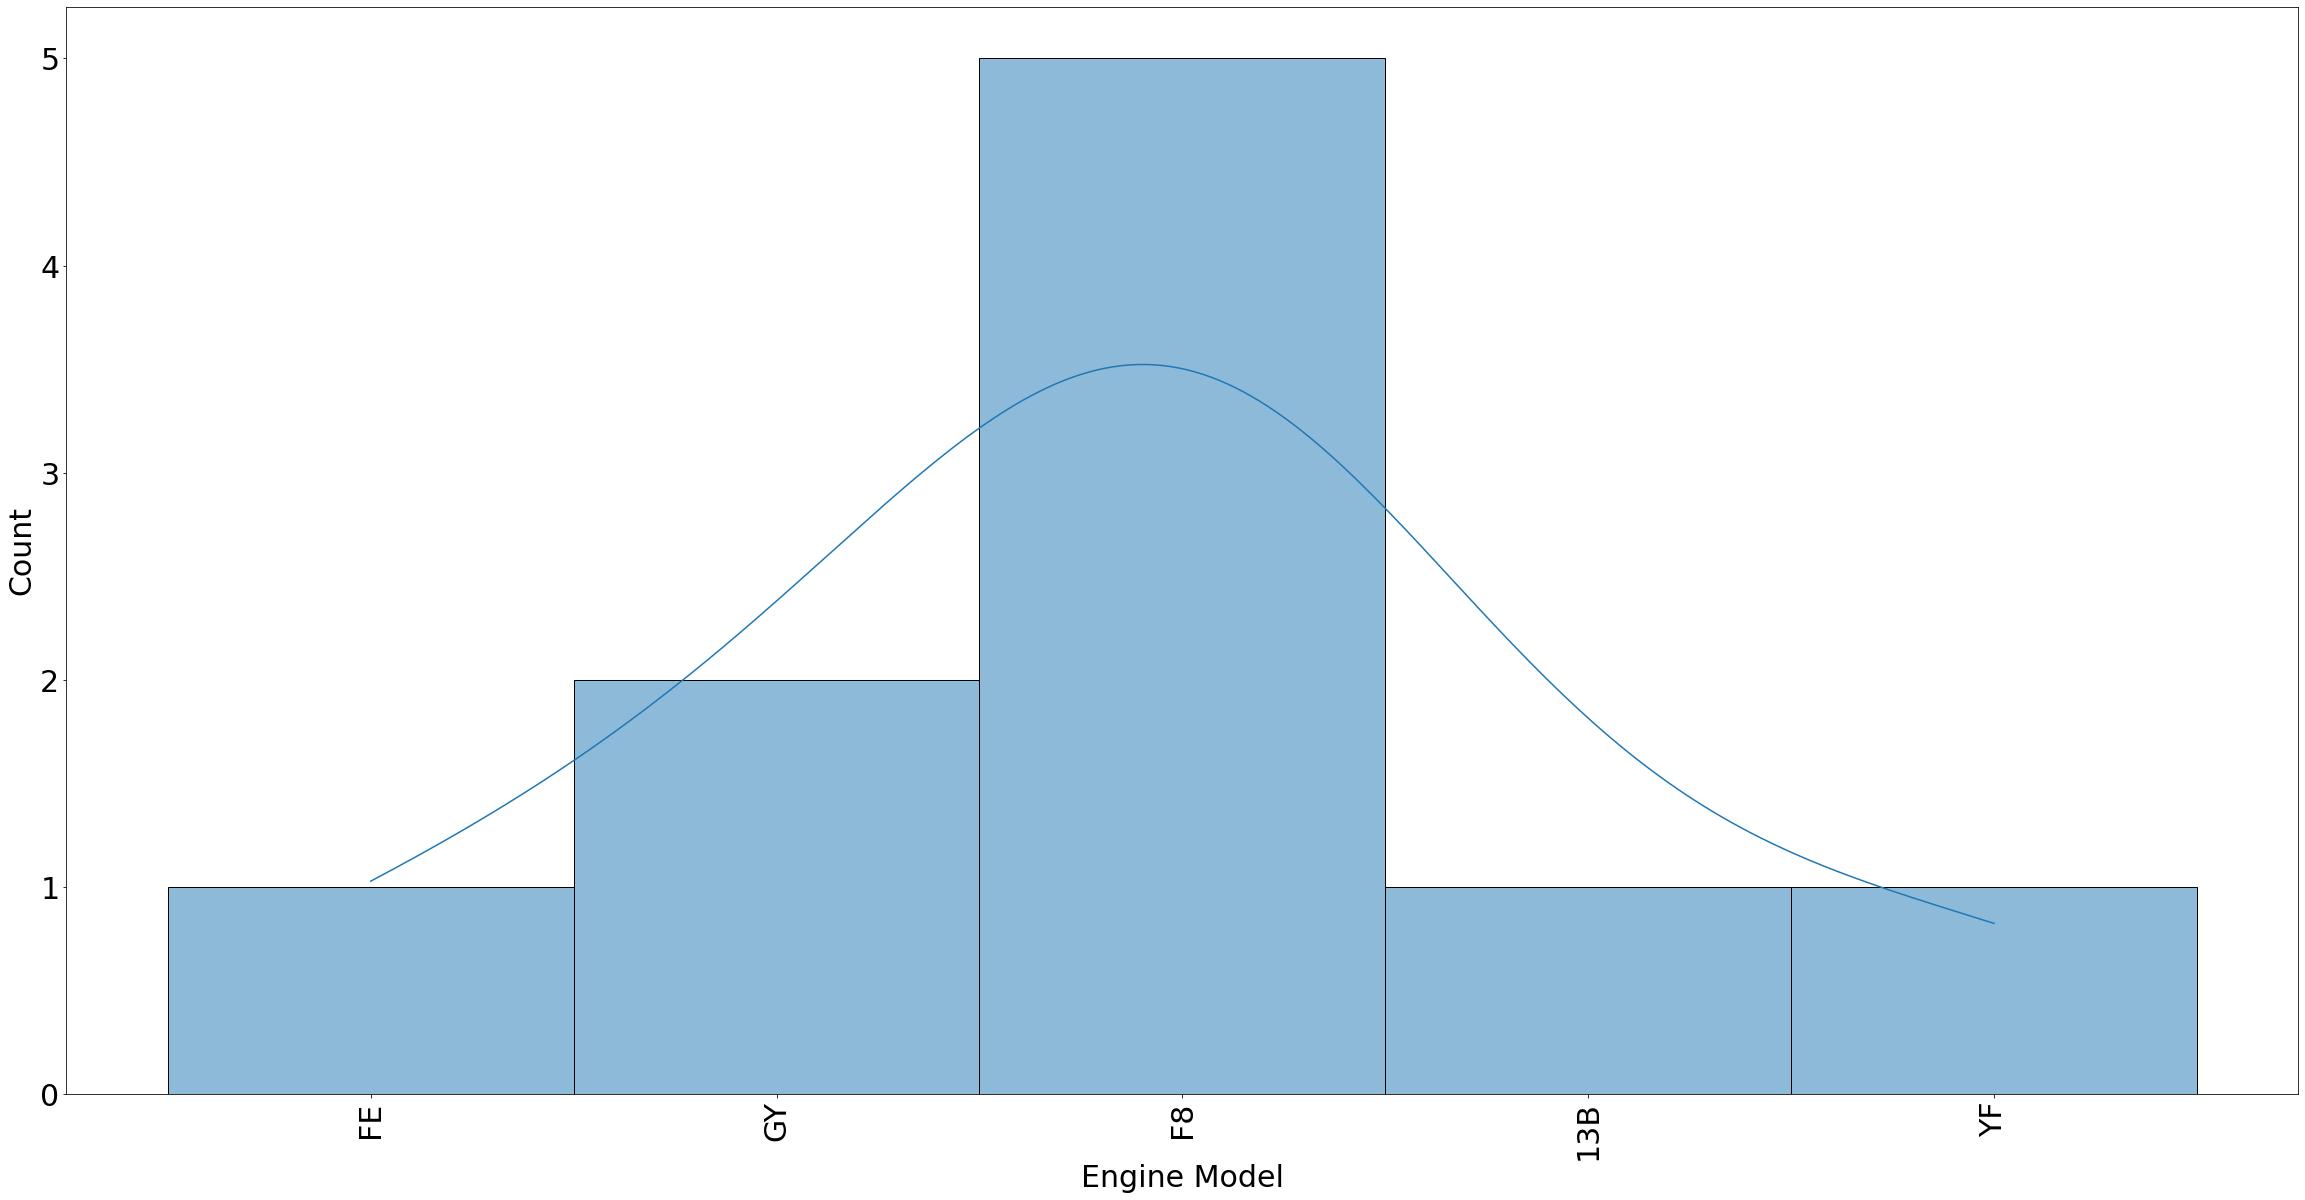

In [186]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

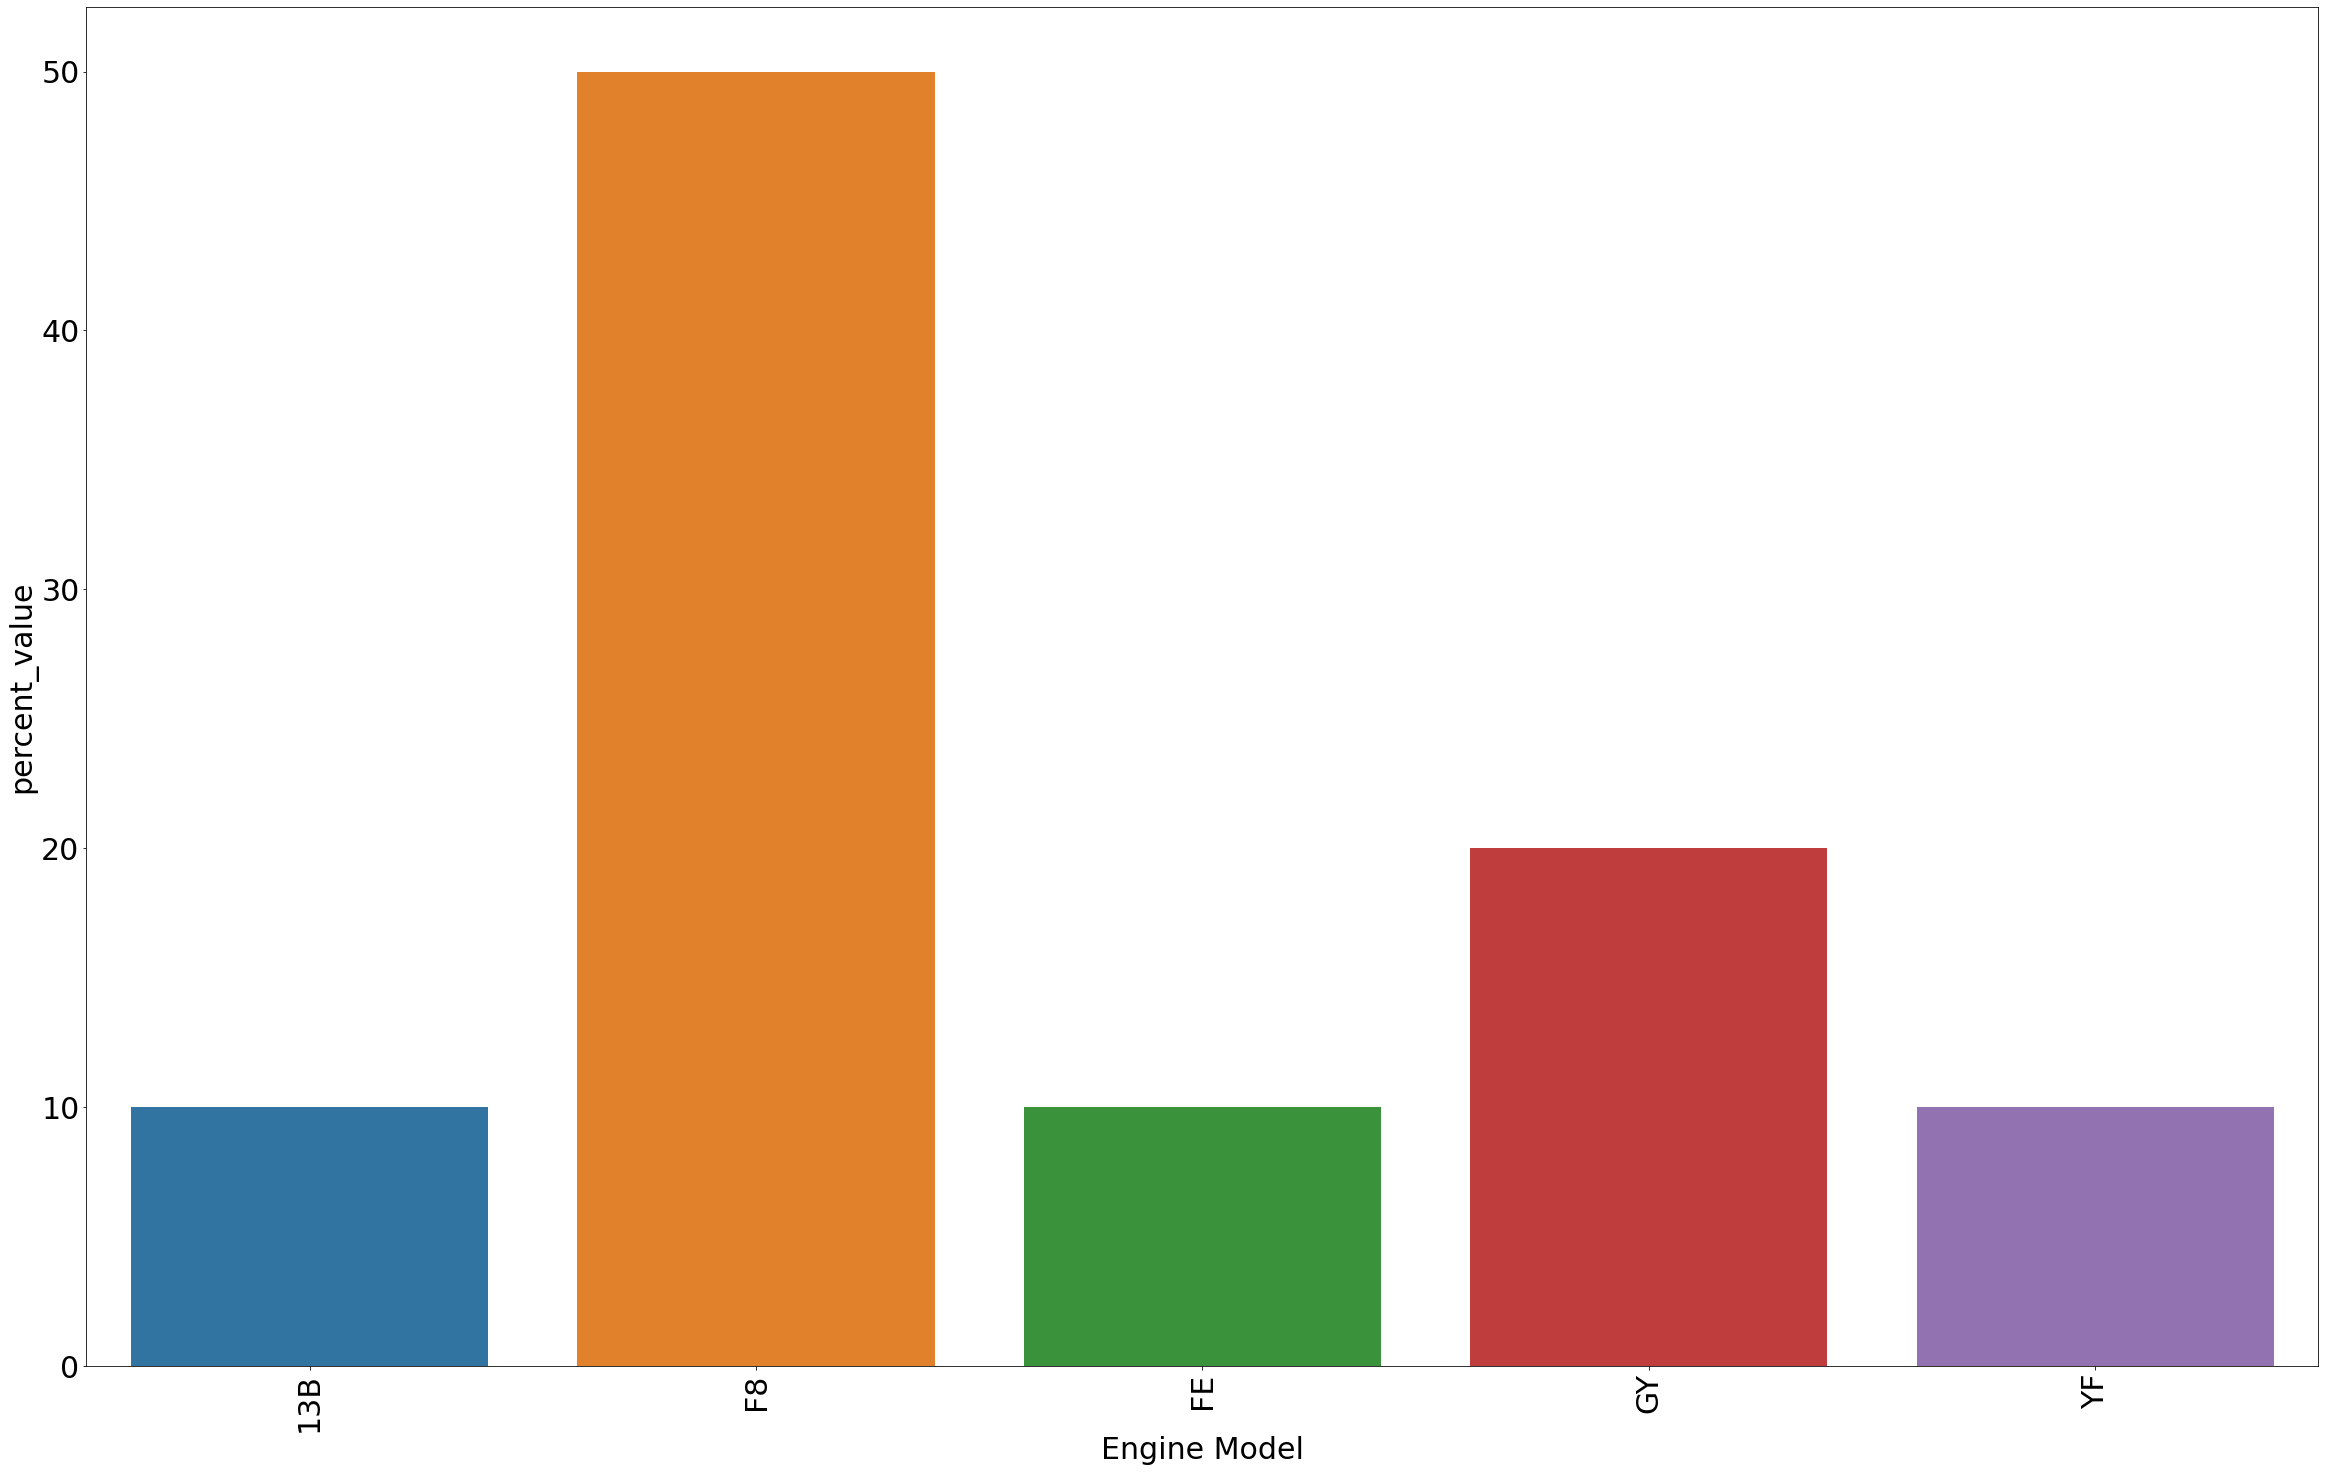

In [187]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

# Mitsubishi

In [196]:
df_subaru = df_kaiho[df_merged.Producer.str.contains('MITSUBISHI')]
df_subaru

<ipython-input-196-e2d5620772b5>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_subaru = df_kaiho[df_merged.Producer.str.contains('MITSUBISHI')]


Register Date     HS Code  \
12       2018-01-01  8407343009   
51       2018-01-01  8407343009   
52       2018-01-01  8407343009   
58       2018-01-01  8407343009   
272      2018-01-01  8407343009   
...             ...         ...   
97048    2016-08-19  8407343009   
98190    2016-10-06  8407343009   
98459    2016-10-04  8407343009   
98632    2016-10-23  8407343009   
99978    2016-12-01  8407343009   

                                     Product Description  \
12     ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
51     ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
52     ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
58     ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
272    ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
...                                                  ...   
97048  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЫВШИЕ В УПОТРЕ...   
98190  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
98459  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЕНЗИНОВЫЕ, Б/У...   
98632  ЗАПАСНЫЕ ЧАСТИ ОТ АВТОМОБИЛЯ БЫВШЕГО В УПОТРЕБ...   
99978  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                                                Producer  \
12                                MITSUBISHI CORPORATION   
51                                 HONDA MOTOR CO., LTD.   
52                                              DAIHATSU   
58                                           MITSUBISHI    
272                                               HONDA    
...                                                  ...   
97048                                   TOYOTA MOTOR CO.   
98190                                             SUBARU   
98459                                             TOYOTA   
98632                                            SUBARU    
99978  FUJI HEAVY INDUSTRIES CO.,LTD,MITSUBISHI MOTOR...   

                                   Brand Place of Receipt Country of Origin  \
12                            MITSUBISHI       ТОЯМАШИНКО    JP, JPN, Japan   
51                                 HONDA      ВЛАДИВОСТОК    JP, JPN, Japan   
52                              DAIHATSU      ВЛАДИВОСТОК    JP, JPN, Japan   
58                            MITSUBISHI      ВЛАДИВОСТОК    JP, JPN, Japan   
272                                HONDA      ВЛАДИВОСТОК    JP, JPN, Japan   
...                                  ...              ...               ...   
97048                             TOYOTA        ВОСТОЧНЫЙ    JP, JPN, Japan   
98190                             SUBARU            ТОЯМА    JP, JPN, Japan   
98459                             TOYOTA      ВЛАДИВОСТОК    JP, JPN, Japan   
98632                             SUBARU      ВЛАДИВОСТОК    JP, JPN, Japan   
99978  SUBARU,MITSUBISHI,SUZUKI,DAIHATSU        ВОСТОЧНЫЙ    JP, JPN, Japan   

      Country of Sales                                           Shipper   \
12      JP, JPN, Japan                              KAIHO SANGYO CO., LTD   
51      JP, JPN, Japan                             KAIHO SANGYO CO., LTD.   
52      JP, JPN, Japan                             KAIHO SANGYO CO., LTD.   
58      JP, JPN, Japan                              KAIHO SANGYO CO.,LTD    
272     JP, JPN, Japan                              KAIHO SANGYO CO.,LTD    
...                ...                                                ...   
97048   JP, JPN, Japan                               KAIHO SANGYO CO.,LTD   
98190   JP, JPN, Japan                              KAIHO SANGYO CO., LTD   
98459   JP, JPN, Japan                              KAIHO SANGYO CO.,LTD.   
98632   JP, JPN, Japan                             KAIHO SANGYO CO., LTD    
99978   JP, JPN, Japan  KAIHO SANGYO CO.,LTD 1-25 HIGASHIKAGATSUME-MAC...   

                                         Shipper Address  ... Unit of Measure  \
12     920-0209, , ISHIKAWA, 1-25 HIGASHIKAGATSUME-MA...  ...             NaN   
51     920-0209, ISHIKAWA, KANAZAWA-SHI, HIGASHIKAGAT...  ...             NaN   
52     920-0209, , ISHIKAW

In [197]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_subaru['Product Description'].tolist():
    list_em = extract_engine_model(des,list_mitsubishi)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['4G13-XB2899', '4G93-KC6321'],
 ['6A12-BG6927'],
 ['6G72-RP7998'],
 ['4G15-JB6571'],
 ['4G15-XJ8006', '4G63-SA5060', '4G92-JJ7003'],
 ['4G13-YH7917'],
 ['4G63-SD2029'],
 ['4A91-0024650', '4G15-AL0783', '4G15-CM0089', '4G15-XD8588', '4G63-SV64'],
 ['4G64-MJ0731'],
 ['4G63-RR4407']]

In [198]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
# list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [199]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0          4G13
1          4G93
2          6A12
3          6G72
4          4G15
5          4G15
6          4G63
7          4G92
8          4G13
9          4G63
10         4A91
11         4G15
12         4G15
13         4G15
14         4G63
15         4G64
16         4G63

In [200]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0         4A91      1           5.88
1         4G13      2          11.76
2         4G15      5          29.41
3         4G63      4          23.53
4         4G64      1           5.88
5         4G92      1           5.88
6         4G93      1           5.88
7         6A12      1           5.88
8         6G72      1           5.88

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

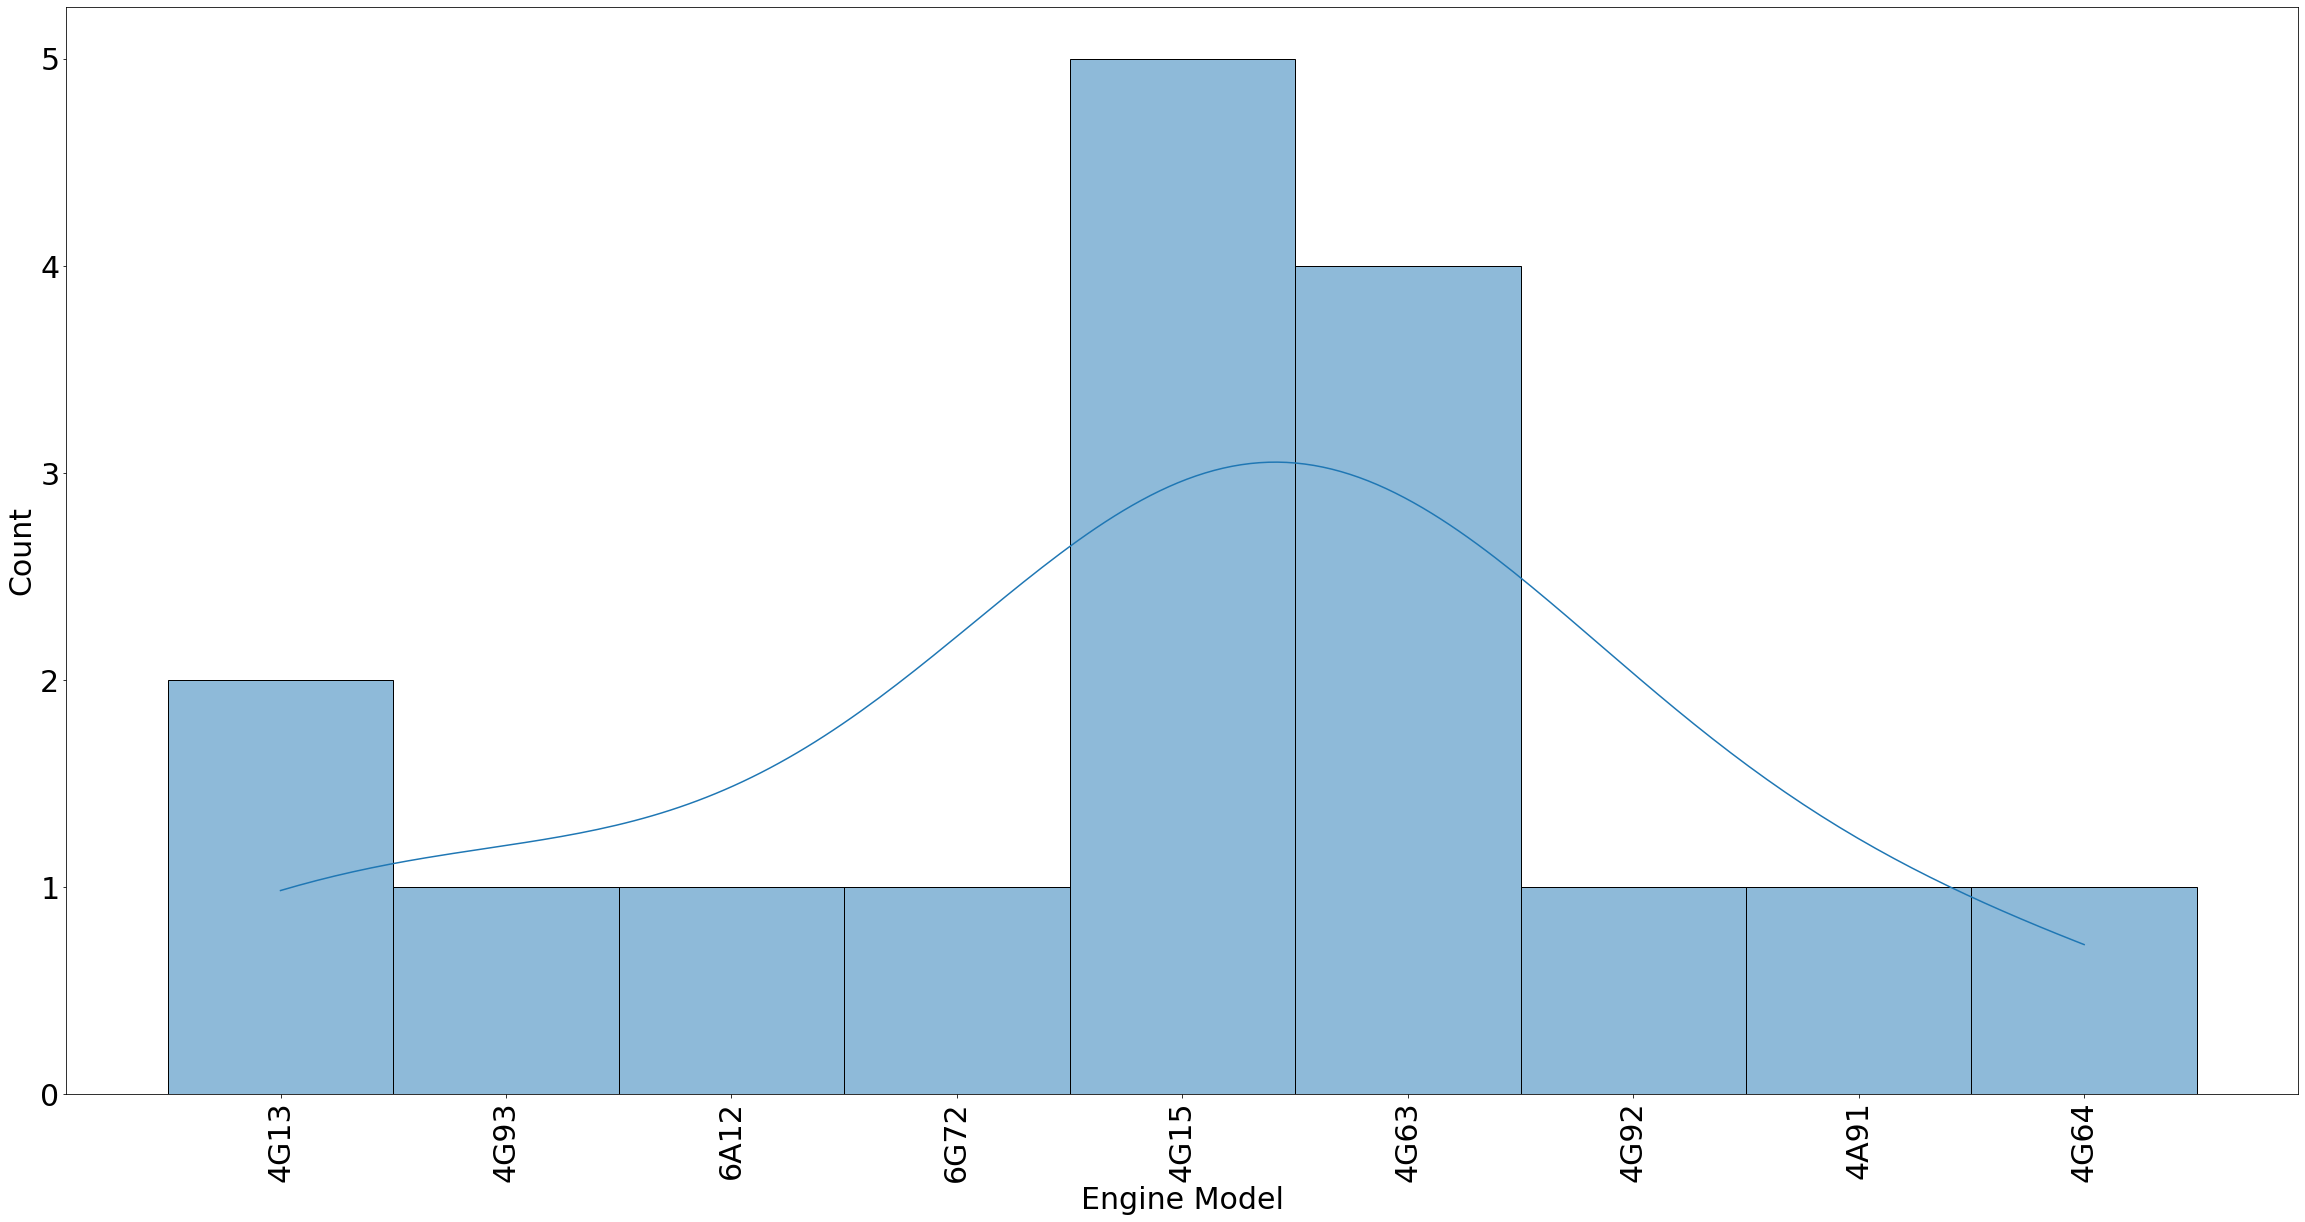

In [201]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

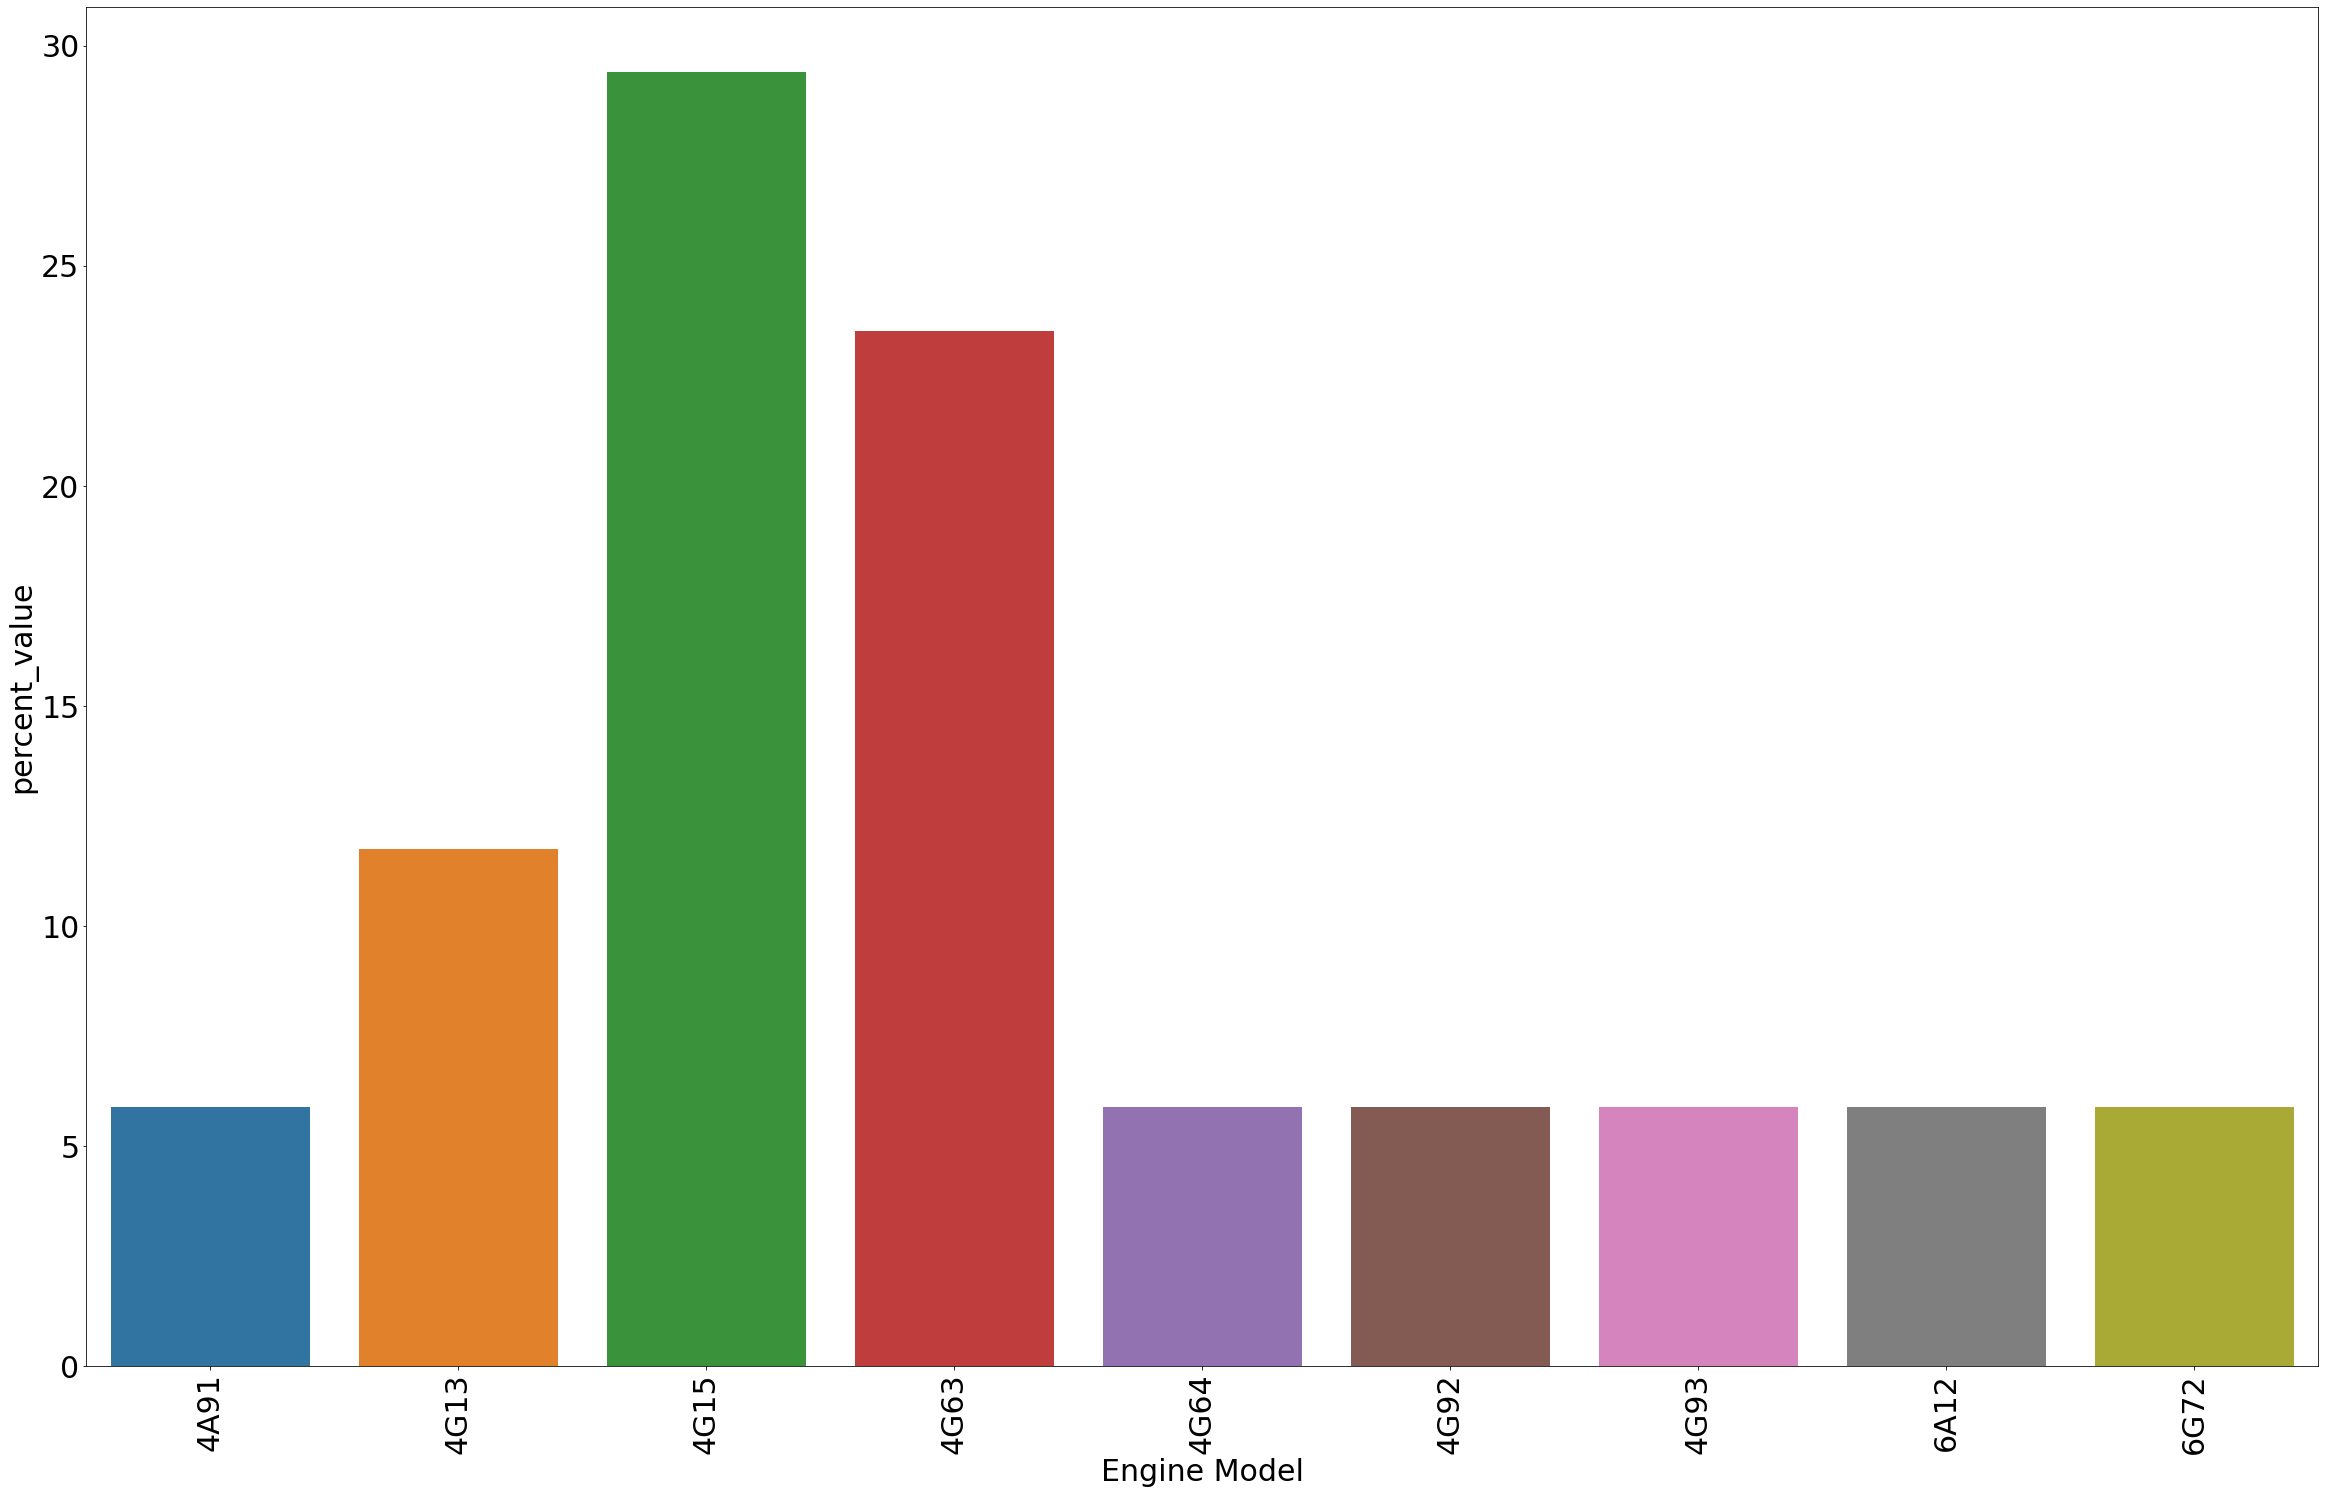

In [202]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

# Honda

In [208]:
df_subaru = df_kaiho[df_merged.Producer.str.contains('HONDA')]
df_subaru

<ipython-input-208-b6a8270bad42>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_subaru = df_kaiho[df_merged.Producer.str.contains('HONDA')]


Register Date     HS Code  \
12       2018-01-01  8407343009   
52       2018-01-01  8407343009   
63       2018-01-01  8407343009   
942      2018-02-01  8407343009   
997      2018-02-01  8407343009   
...             ...         ...   
98628    2016-10-23  8407343009   
98633    2016-10-23  8407343009   
98688    2016-11-01  8407343009   
98955    2016-11-01  8407343009   
99094    2016-11-01  8407343009   

                                     Product Description  \
12     ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
52     ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
63     ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
942    ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
997    ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
...                                                  ...   
98628  ДВИГАТЕЛИ БЕНЗИНОВЫЕ ДЛЯ ЛЕГКОВЫХ АВТОМОБИЛЕЙ ...   
98633  ЗАПАСНЫЕ ЧАСТИ ОТ АВТОМОБИЛЯ БЫВШЕГО В УПОТРЕБ...   
98688  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
98955  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
99094  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                            Producer       Brand Place of Receipt  \
12            MITSUBISHI CORPORATION  MITSUBISHI       ТОЯМАШИНКО   
52                          DAIHATSU    DAIHATSU      ВЛАДИВОСТОК   
63     MITSUBISHI MOTORS CORPORATION  MITSUBISHI      ВЛАДИВОСТОК   
942                           SUBARU      SUBARU      ВЛАДИВОСТОК   
997         TOYOTA MOTOR CORPORATION      TOYOTA      ВЛАДИВОСТОК   
...                              ...         ...              ...   
98628          HONDA MOTOR CO., LTD.       HONDA      ВЛАДИВОСТОК   
98633                        TOYOTA       TOYOTA      ВЛАДИВОСТОК   
98688                         HONDA        HONDA      ВЛАДИВОСТОК   
98955           HONDA MOTOR CO., LTD       HONDA            ТОЯМА   
99094                        NISSAN       NISSAN      ВЛАДИВОСТОК   

      Country of Origin Country of Sales                 Shipper   \
12       JP, JPN, Japan   JP, JPN, Japan    KAIHO SANGYO CO., LTD   
52       JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD.   
63       JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD.   
942      JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD.   
997      JP, JPN, Japan   JP, JPN, Japan    KAIHO SANGYO CO., LTD   
...                 ...              ...                      ...   
98628    JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD.   
98633    JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD    
98688    JP, JPN, Japan   JP, JPN, Japan    KAIHO SANGYO CO.,LTD    
98955    JP, JPN, Japan   JP, JPN, Japan    KAIHO SANGYO CO., LTD   
99094    JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD    

                                         Shipper Address  ... Unit of Measure  \
12     920-0209, , ISHIKAWA, 1-25 HIGASHIKAGATSUME-MA...  ...             NaN   
52     920-0209, , ISHIKAWA KEN, HIGASHIKAGATSUME-MAC...  ...             NaN   
63     920-0209, ISHIKAWA, KANAZAWA-SHI, HIGASHIKAGAT...  ...             NaN   
942    920-0209, , ISHIKAWA KEN, HIGASHIKAGATSUME-MAC...  ...             NaN   
997    920-0209, ISHIKAWA, KANAZAWA-SHI, HIGASHIKAGAT...  ...             NaN   
...                                                  ...  ...             ...   
98628                                                NaN  ...              ШТ   
98633                                                NaN  ...              ШТ   
98688  ISHIKAWA 1-25 HIGASHIKAGATSUME-MACHI, KANAZAWA...  ...             NaN   
98955  ISHIKAWA 920-0209 1-25 HIGASHIKAGATSUME-MACHI,...  ...             NaN   
99094  KANAZAWA-SHI 920-0209 1-25 HIGASHIKAGATSUME-MA...  ...             NaN   

      Incoterms  Gross Weight in KG Net Weight in KG Cargo Value USD  \
12          FOB              1230.0           1230.0         1858.02   
52          CFR               820.0            820.0         1238.20   
63          CFR  

In [209]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_subaru['Product Description'].tolist():
    list_em = extract_engine_model(des,list_honda)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['D16A-9203275', 'D17A-1300121', 'F18B-2025105'],
 ['D13B-6325445'],
 ['D17A-2024981',
  'D17A-2063716',
  'D17A-2119729',
  'J25A-1004932',
  'J30A-4503072'],
 ['B20B-7085368', 'F22B-4355646', 'F23A-2523247', 'F23A-2506452'],
 ['B20B-5404347'],
 ['D15B-2860686'],
 ['B20B-7016277',
  'D15B-3600135',
  'D17A-2000627',
  'F22B-4133510',
  'L15A-1129492',
  'L15A-3012635'],
 ['D16A-1702449'],
 ['B20B-1143821',
  'B20B-3217670',
  'D15B-3205888',
  'D15B-3238412',
  'D15B-3621016',
  'D16A-9104451'],
 ['D17A-1305098', 'D17A-2118776'],
 ['D17A-1305598'],
 ['K24A-250472'],
 ['B20B-3265362',
  'B20B-3305026',
  'D13B-6217198',
  'D15B-3718311',
  'D15B-9104210',
  'F20B-2008096',
  'G25A-2032977',
  'H23A-2024048',
  'ZC-62457'],
 ['ZC-7416641'],
 ['B18B-1403237', 'D16A-1608627', 'G20A-1258980', 'J25A-1002472'],
 ['B20B-7022171'],
 ['L13A-2180305'],
 ['D16A-6000131'],
 ['B20B-3210784',
  'B20B-3333116',
  'B20B-3336288',
  'B20B-9006741',
  'B20B-3470400',
  'B20B-3340043',
  'F23A-2016191',

In [210]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
# list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [211]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0          D16A
1          D17A
2          F18B
3          D13B
4          D17A
..          ...
56         F23A
57         J32A
58         D15B
59         B20B
60         F23A

[61 rows x 1 columns]

In [212]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0          B18B      1           1.64
1          B20B     15          24.59
2          D13B      2           3.28
3          D15B      8          13.11
4          D16A      5           8.20
5          D17A      8          13.11
6          F18B      1           1.64
7          F20B      1           1.64
8          F22B      2           3.28
9          F23A      5           8.20
10         G20A      1           1.64
11         G25A      1           1.64
12         H23A      1           1.64
13         J25A      2           3.28
14         J30A      1           1.64
15         J32A      1           1.64
16         K24A      1           1.64
17         L13A      1           1.64
18         L15A      2           3.28
19           ZC      2           3.28

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

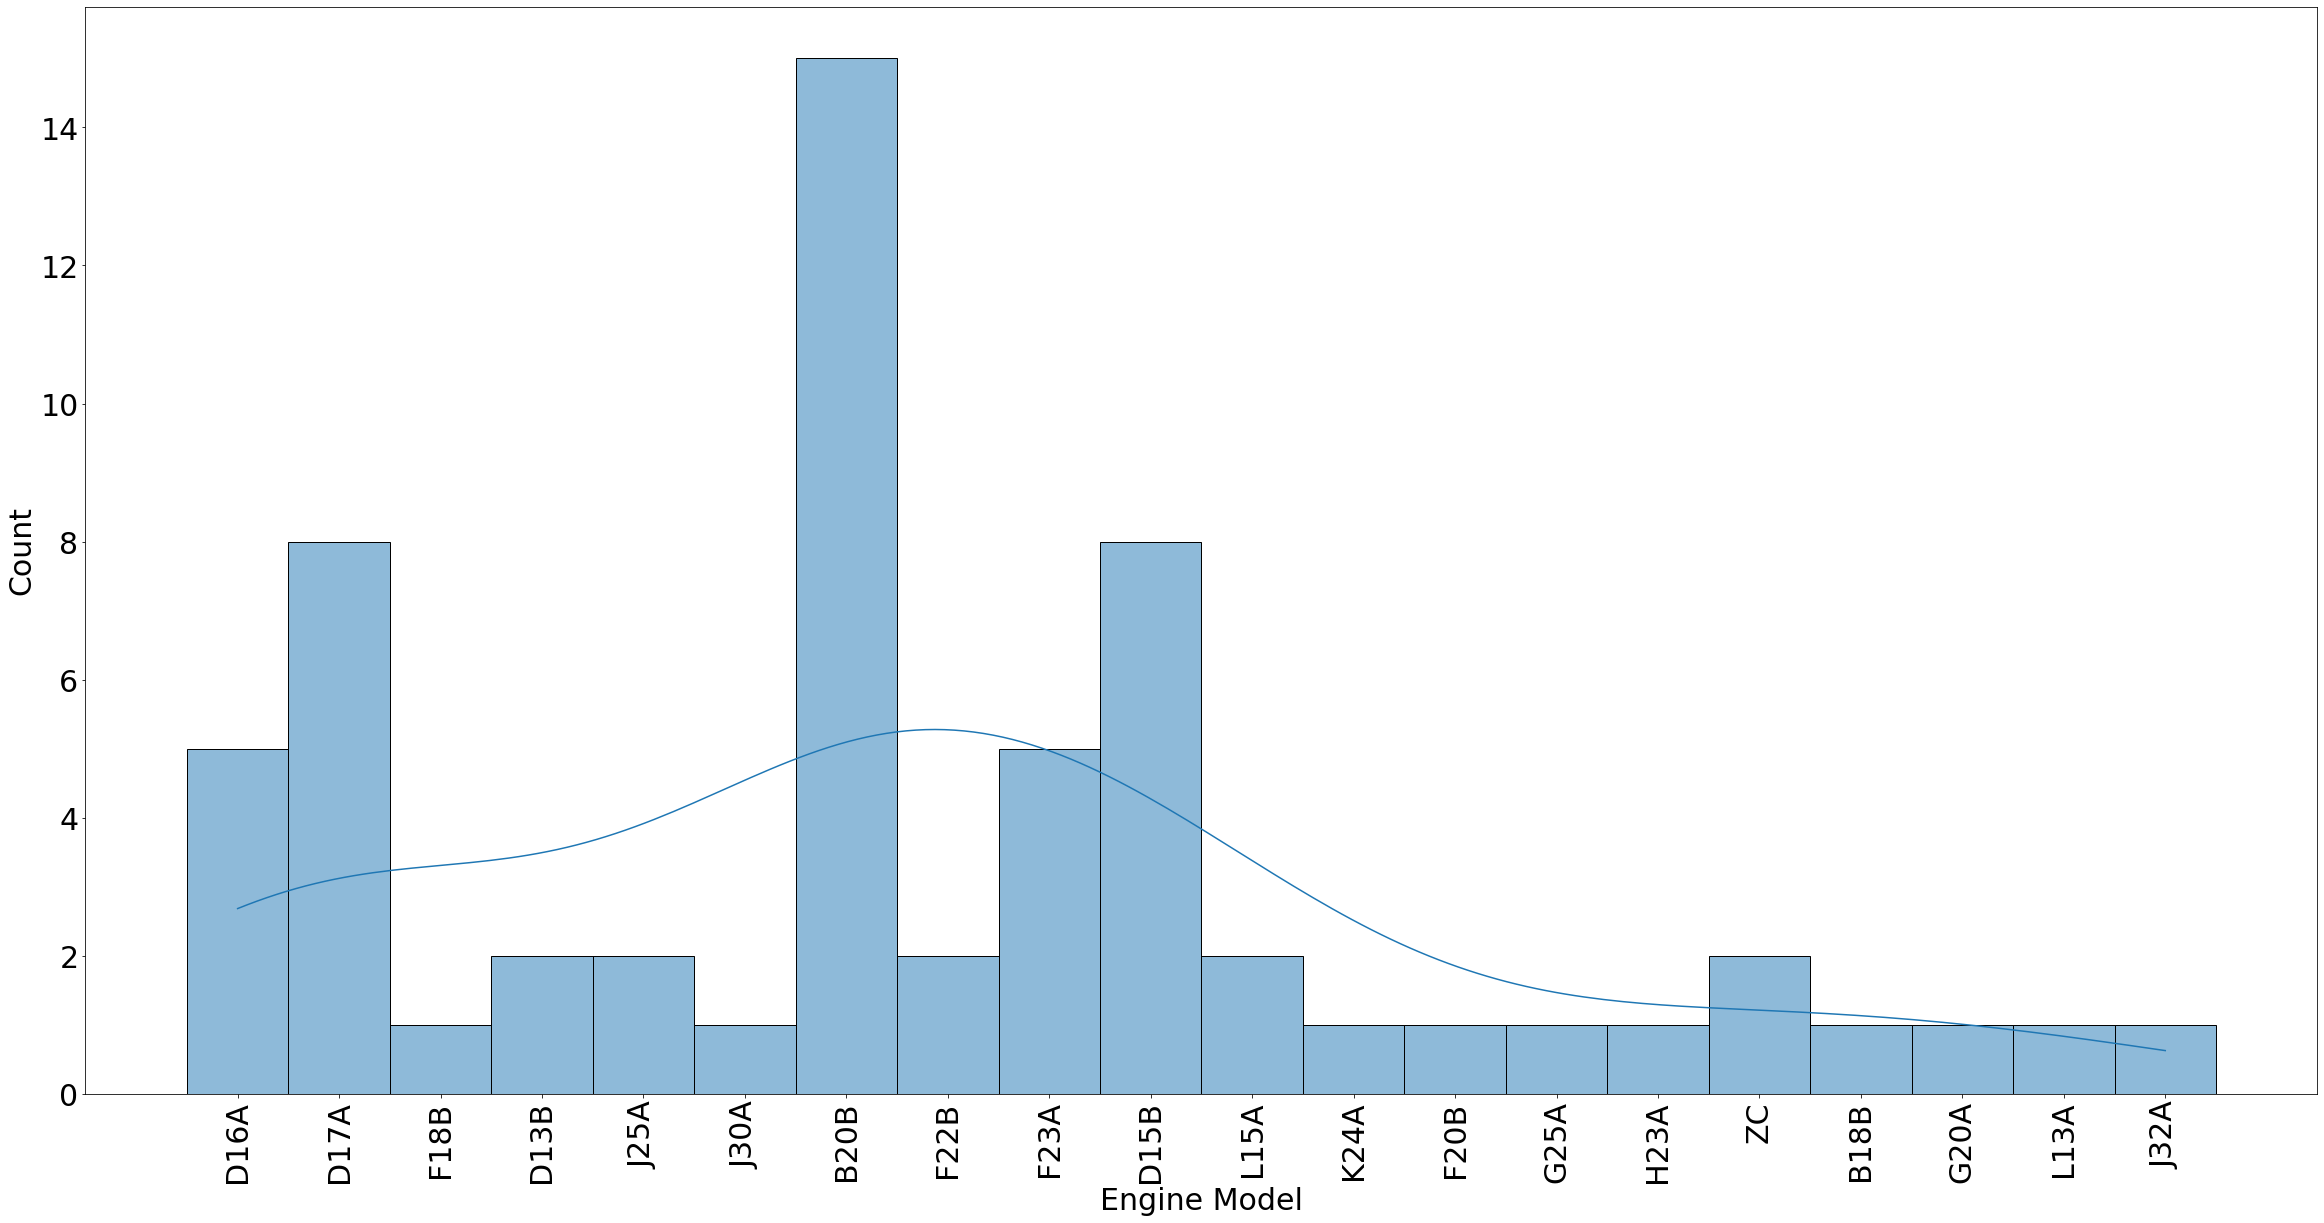

In [213]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

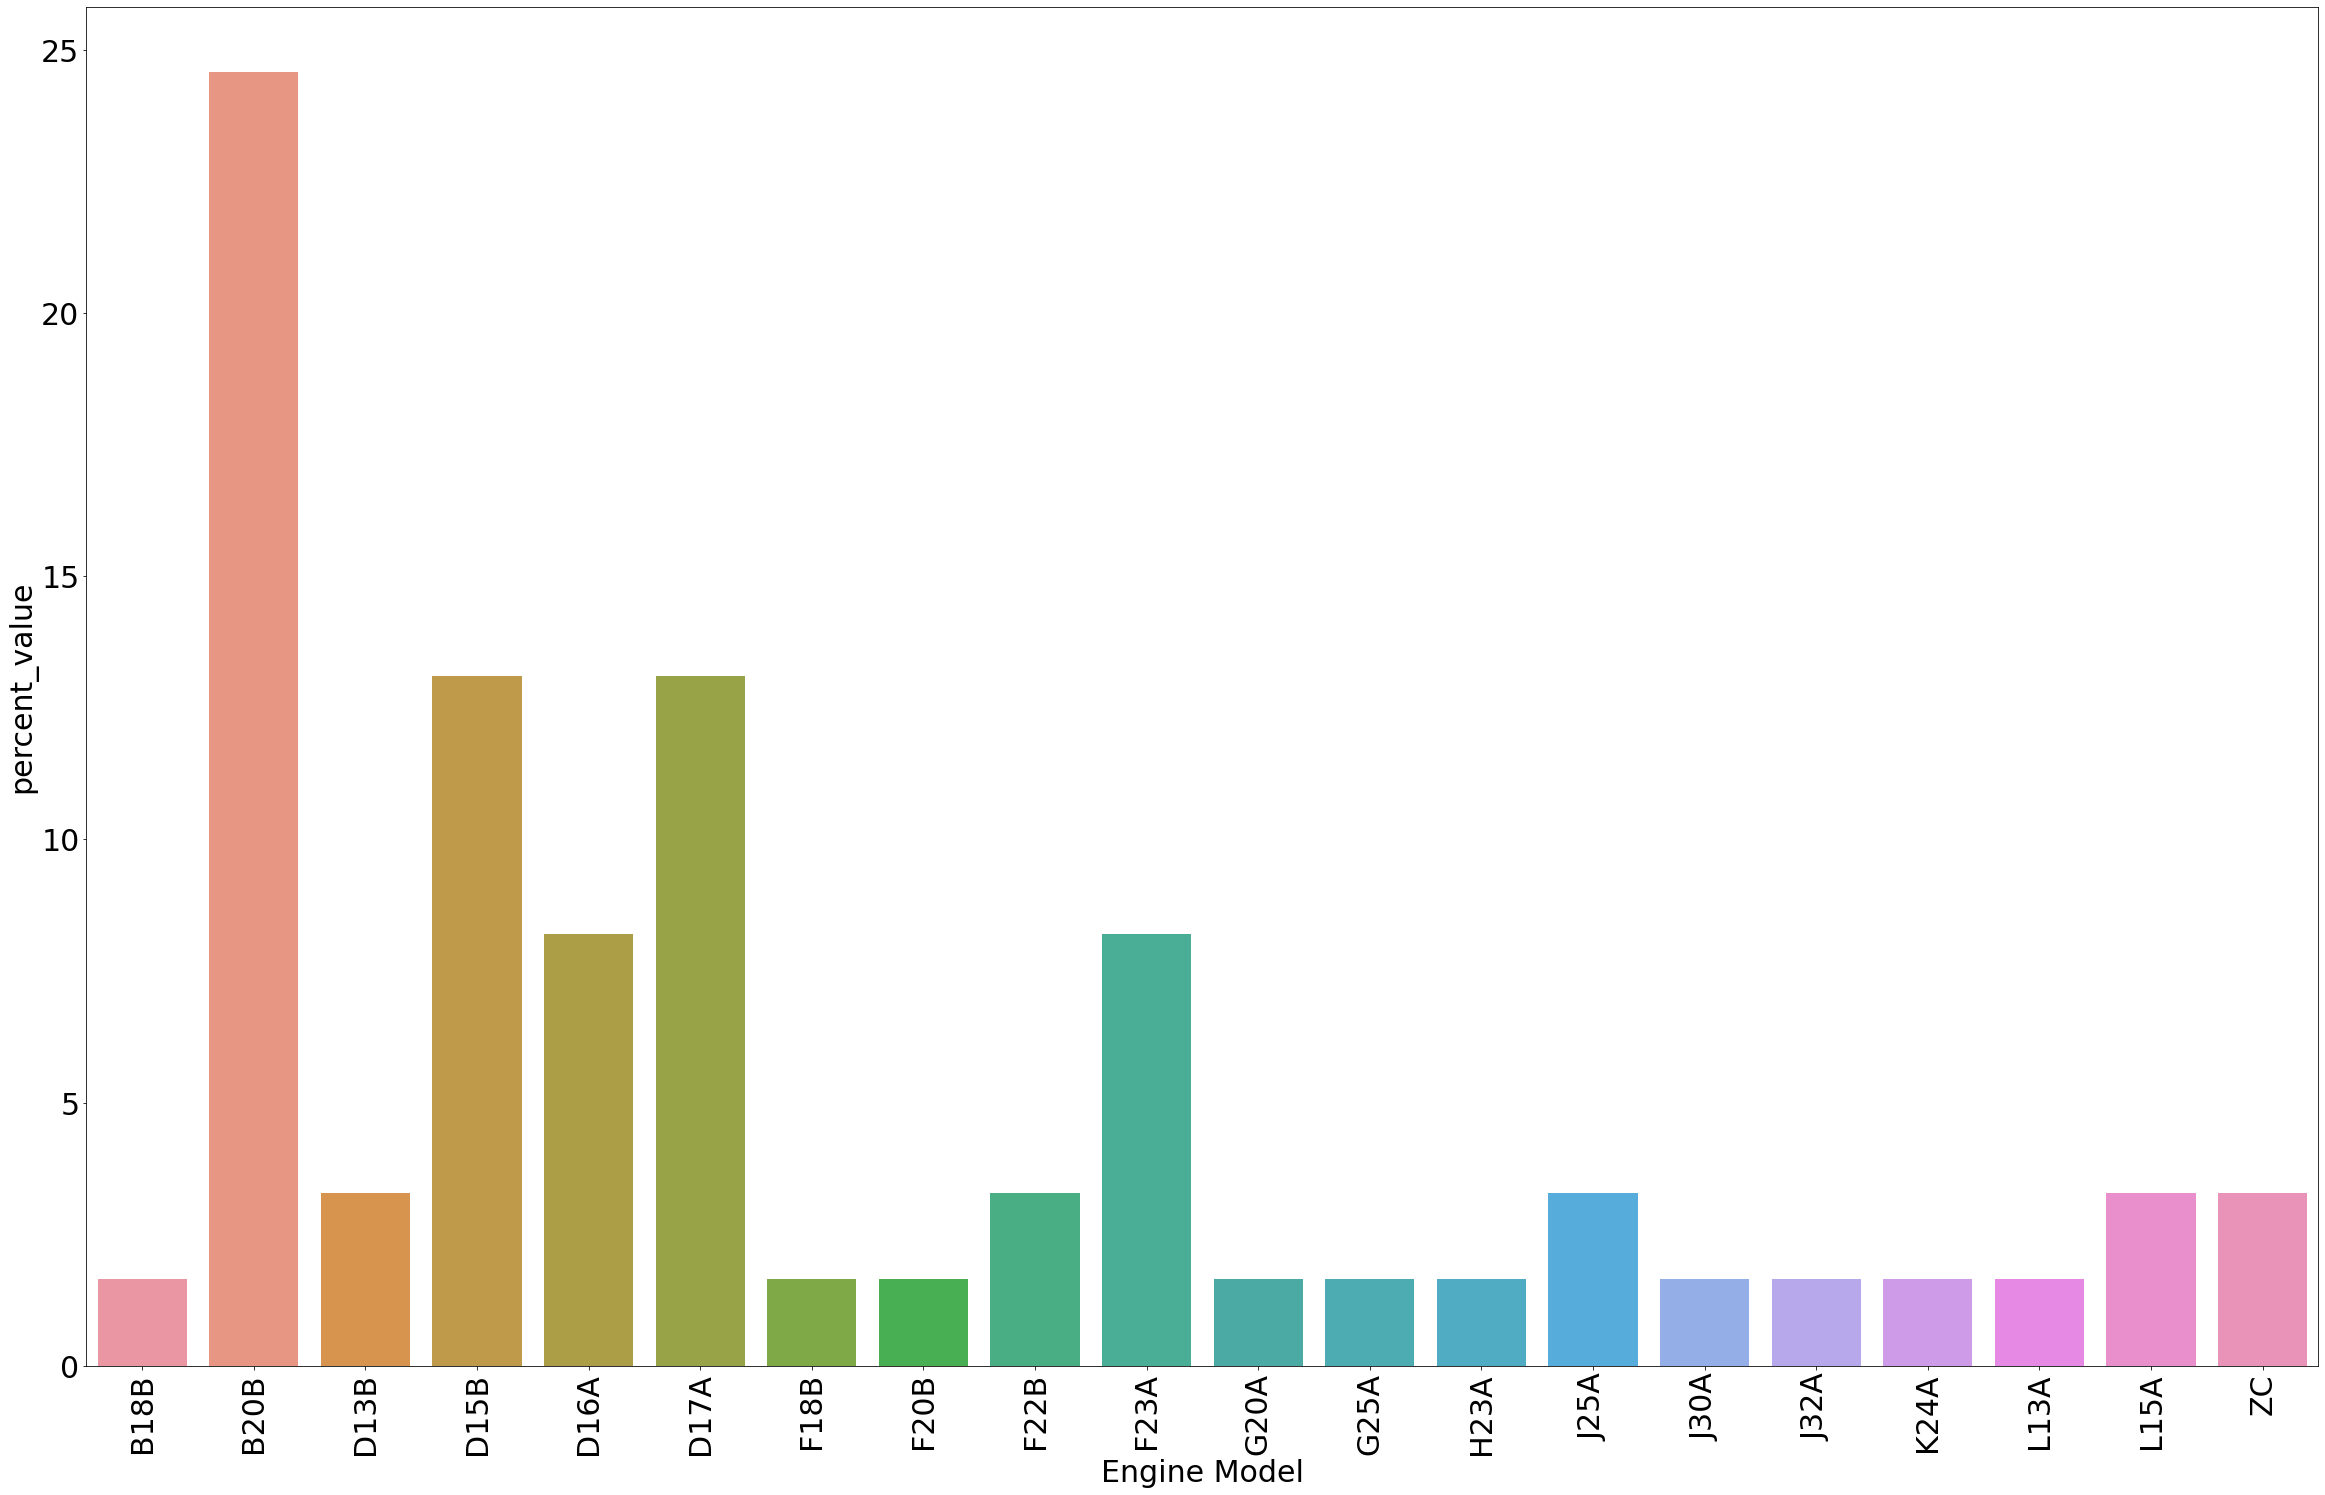

In [214]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

# Nissan

In [215]:
df_subaru = df_kaiho[df_merged.Producer.str.contains('NISSAN')]
df_subaru

<ipython-input-215-88fac7b3f072>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_subaru = df_kaiho[df_merged.Producer.str.contains('NISSAN')]


Register Date     HS Code  \
12        2018-01-01  8407343009   
51        2018-01-01  8407343009   
52        2018-01-01  8407343009   
694       2018-02-01  8407343009   
697       2018-02-01  8407343009   
...              ...         ...   
98630     2016-10-23  8407343009   
98869     2016-11-01  8407343009   
99297     2016-11-01  8407343009   
99397     2016-11-01  8407343009   
100143    2016-12-01  8407343009   

                                      Product Description  \
12      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
51      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
52      ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
694     ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
697     ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
...                                                   ...   
98630   ЗАПАСНЫЕ ЧАСТИ ОТ АВТОМОБИЛЯ БЫВШЕГО В УПОТРЕБ...   
98869   ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
99297   ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
99397   ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   
100143  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ С ИСКРОВЫМ ЗАЖИ...   

                          Producer       Brand Place of Receipt  \
12          MITSUBISHI CORPORATION  MITSUBISHI       ТОЯМАШИНКО   
51           HONDA MOTOR CO., LTD.       HONDA      ВЛАДИВОСТОК   
52                        DAIHATSU    DAIHATSU      ВЛАДИВОСТОК   
694           HONDA MOTOR CO., LTD       HONDA      ВЛАДИВОСТОК   
697                          HONDA       HONDA      ВЛАДИВОСТОК   
...                            ...         ...              ...   
98630                      NISSAN       NISSAN      ВЛАДИВОСТОК   
98869                       SUBARU      SUBARU            ТОЯМА   
99297                      SUBARU       SUBARU      ВЛАДИВОСТОК   
99397   FUJI HEAVY INDUSTRIES LTD.      SUBARU        ВОСТОЧНЫЙ   
100143       HONDA MOTOR CO., LTD.       HONDA      ВЛАДИВОСТОК   

       Country of Origin Country of Sales                 Shipper   \
12        JP, JPN, Japan   JP, JPN, Japan    KAIHO SANGYO CO., LTD   
51        JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD.   
52        JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD.   
694       JP, JPN, Japan   JP, JPN, Japan    KAIHO SANGYO CO., LTD   
697       JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD.   
...                  ...              ...                      ...   
98630     JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD    
98869     JP, JPN, Japan   JP, JPN, Japan    KAIHO SANGYO CO., LTD   
99297     JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD    
99397     JP, JPN, Japan   JP, JPN, Japan     KAIHO SANGYO CO.,LTD   
100143    JP, JPN, Japan   JP, JPN, Japan   KAIHO SANGYO CO., LTD.   

                                          Shipper Address  ...  \
12      920-0209, , ISHIKAWA, 1-25 HIGASHIKAGATSUME-MA...  ...   
51      920-0209, ISHIKAWA, KANAZAWA-SHI, HIGASHIKAGAT...  ...   
52      920-0209, , ISHIKAWA KEN, HIGASHIKAGATSUME-MAC...  ...   
694     920-0209, ISHIKAWA, KANAZAWA-SHI, HIGASHIKAGAT...  ...   
697     920-0209, ISHIKAWA, KANAZAWA-SHI, 1-25 HIGASHI...  ...   
...                                                   ...  ...   
98630                                                 NaN  ...   
98869   ISHIKAWA 920-0209 1-25 HIGASHIKAGATSUME-MACHI,...  ...   
99297   KANAZAWA-SHI 920-0209 1-25 HIGASHIKAGATSUME-MA...  ...   
99397   KANAZAWA-SHI ISHIKAWA,920-0209 1-25 HIGASHI-KA...  ...   
100143  KANAZAWA-SHI 920-0209 HIGASHIKAGATSUME-MACHI 1...  ...   

       Unit of Measure Incoterms  Gross Weight in KG Net Weight in KG  \
12                 NaN       FOB              1230.0           1230.0   
51                 NaN       CFR              7770.0           7770.0   
52                 NaN       CFR               820.0            820.0   
694                NaN       CFR               320.0            320.0   
697                NaN       CFR     

In [216]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_subaru['Product Description'].tolist():
    list_em = extract_engine_model(des,list_nissan)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['VQ23DE-031369A'],
 ['SR20DE-190904B'],
 ['QR20DE-144379A'],
 ['QG15DE-430163A'],
 ['QG15DE-245452A'],
 ['QG15DE-242800B'],
 ['QG15DE-268954'],
 ['CR14DE-351658'],
 ['RB20-710043X'],
 ['RB20-222974B'],
 ['RB20-115420B'],
 ['RB20-164473B'],
 ['RB20-714557A'],
 ['RB20-205440B'],
 ['RB20-937506A'],
 ['RB20-259872B', 'RB20-148469B', 'RB20-226952B'],
 ['RB20-896956A'],
 ['RB20-986307A'],
 ['RB20-194786A']]

In [217]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
# list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [218]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0        VQ23DE
1        SR20DE
2        QR20DE
3        QG15DE
4        QG15DE
5        QG15DE
6        QG15DE
7        CR14DE
8          RB20
9          RB20
10         RB20
11         RB20
12         RB20
13         RB20
14         RB20
15         RB20
16         RB20
17         RB20
18         RB20
19         RB20
20         RB20

In [219]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0       CR14DE      1           4.76
1       QG15DE      4          19.05
2       QR20DE      1           4.76
3         RB20     13          61.90
4       SR20DE      1           4.76
5       VQ23DE      1           4.76

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

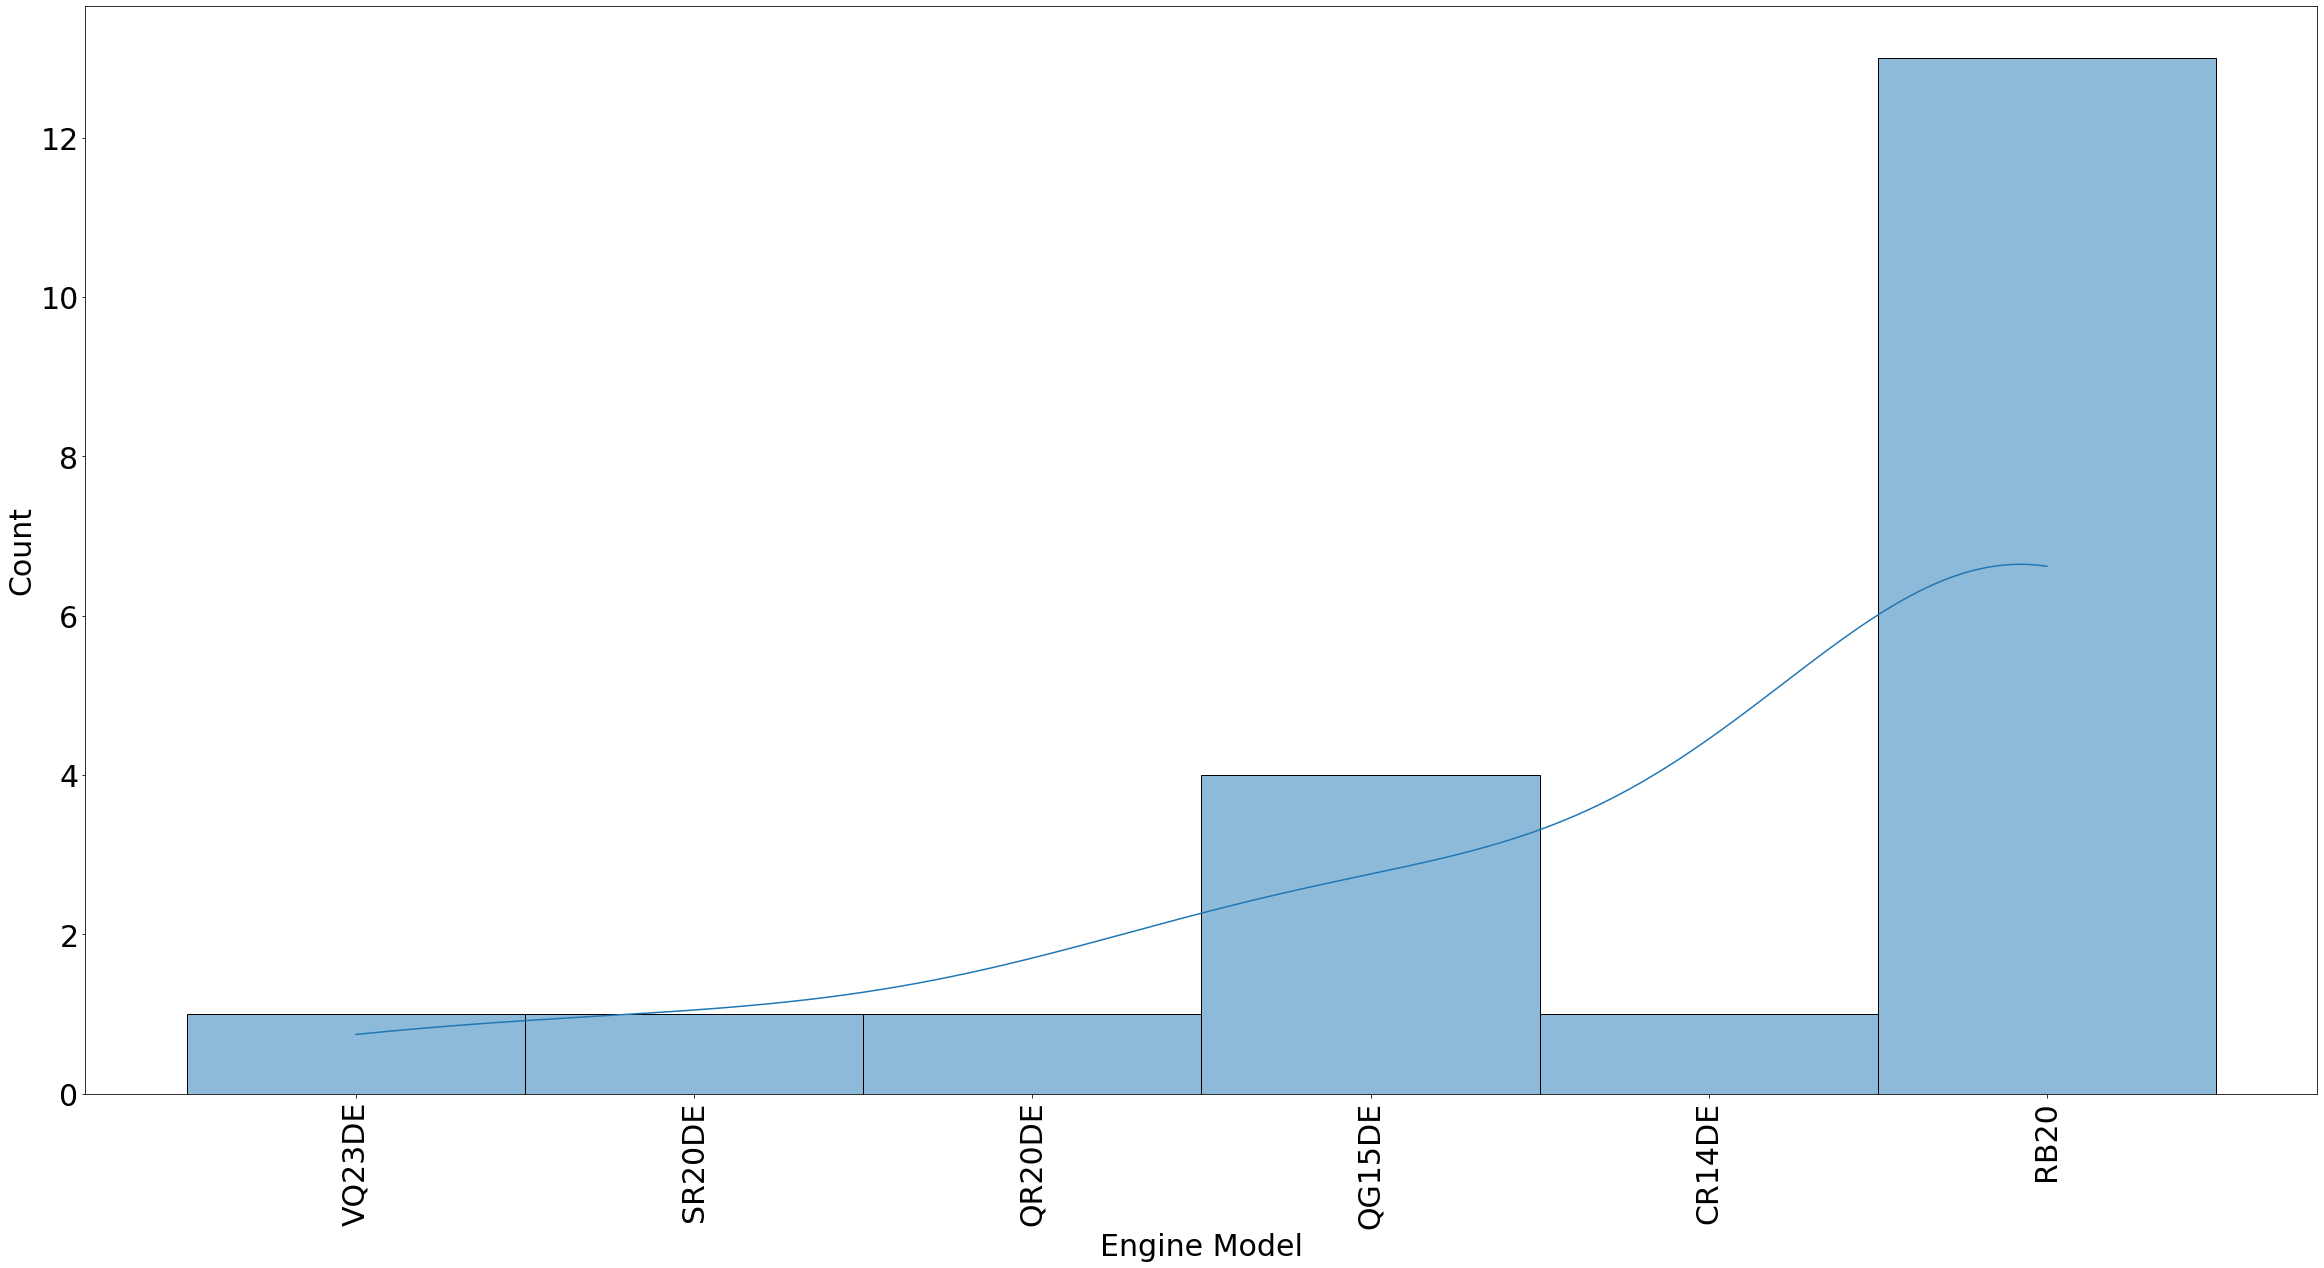

In [220]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

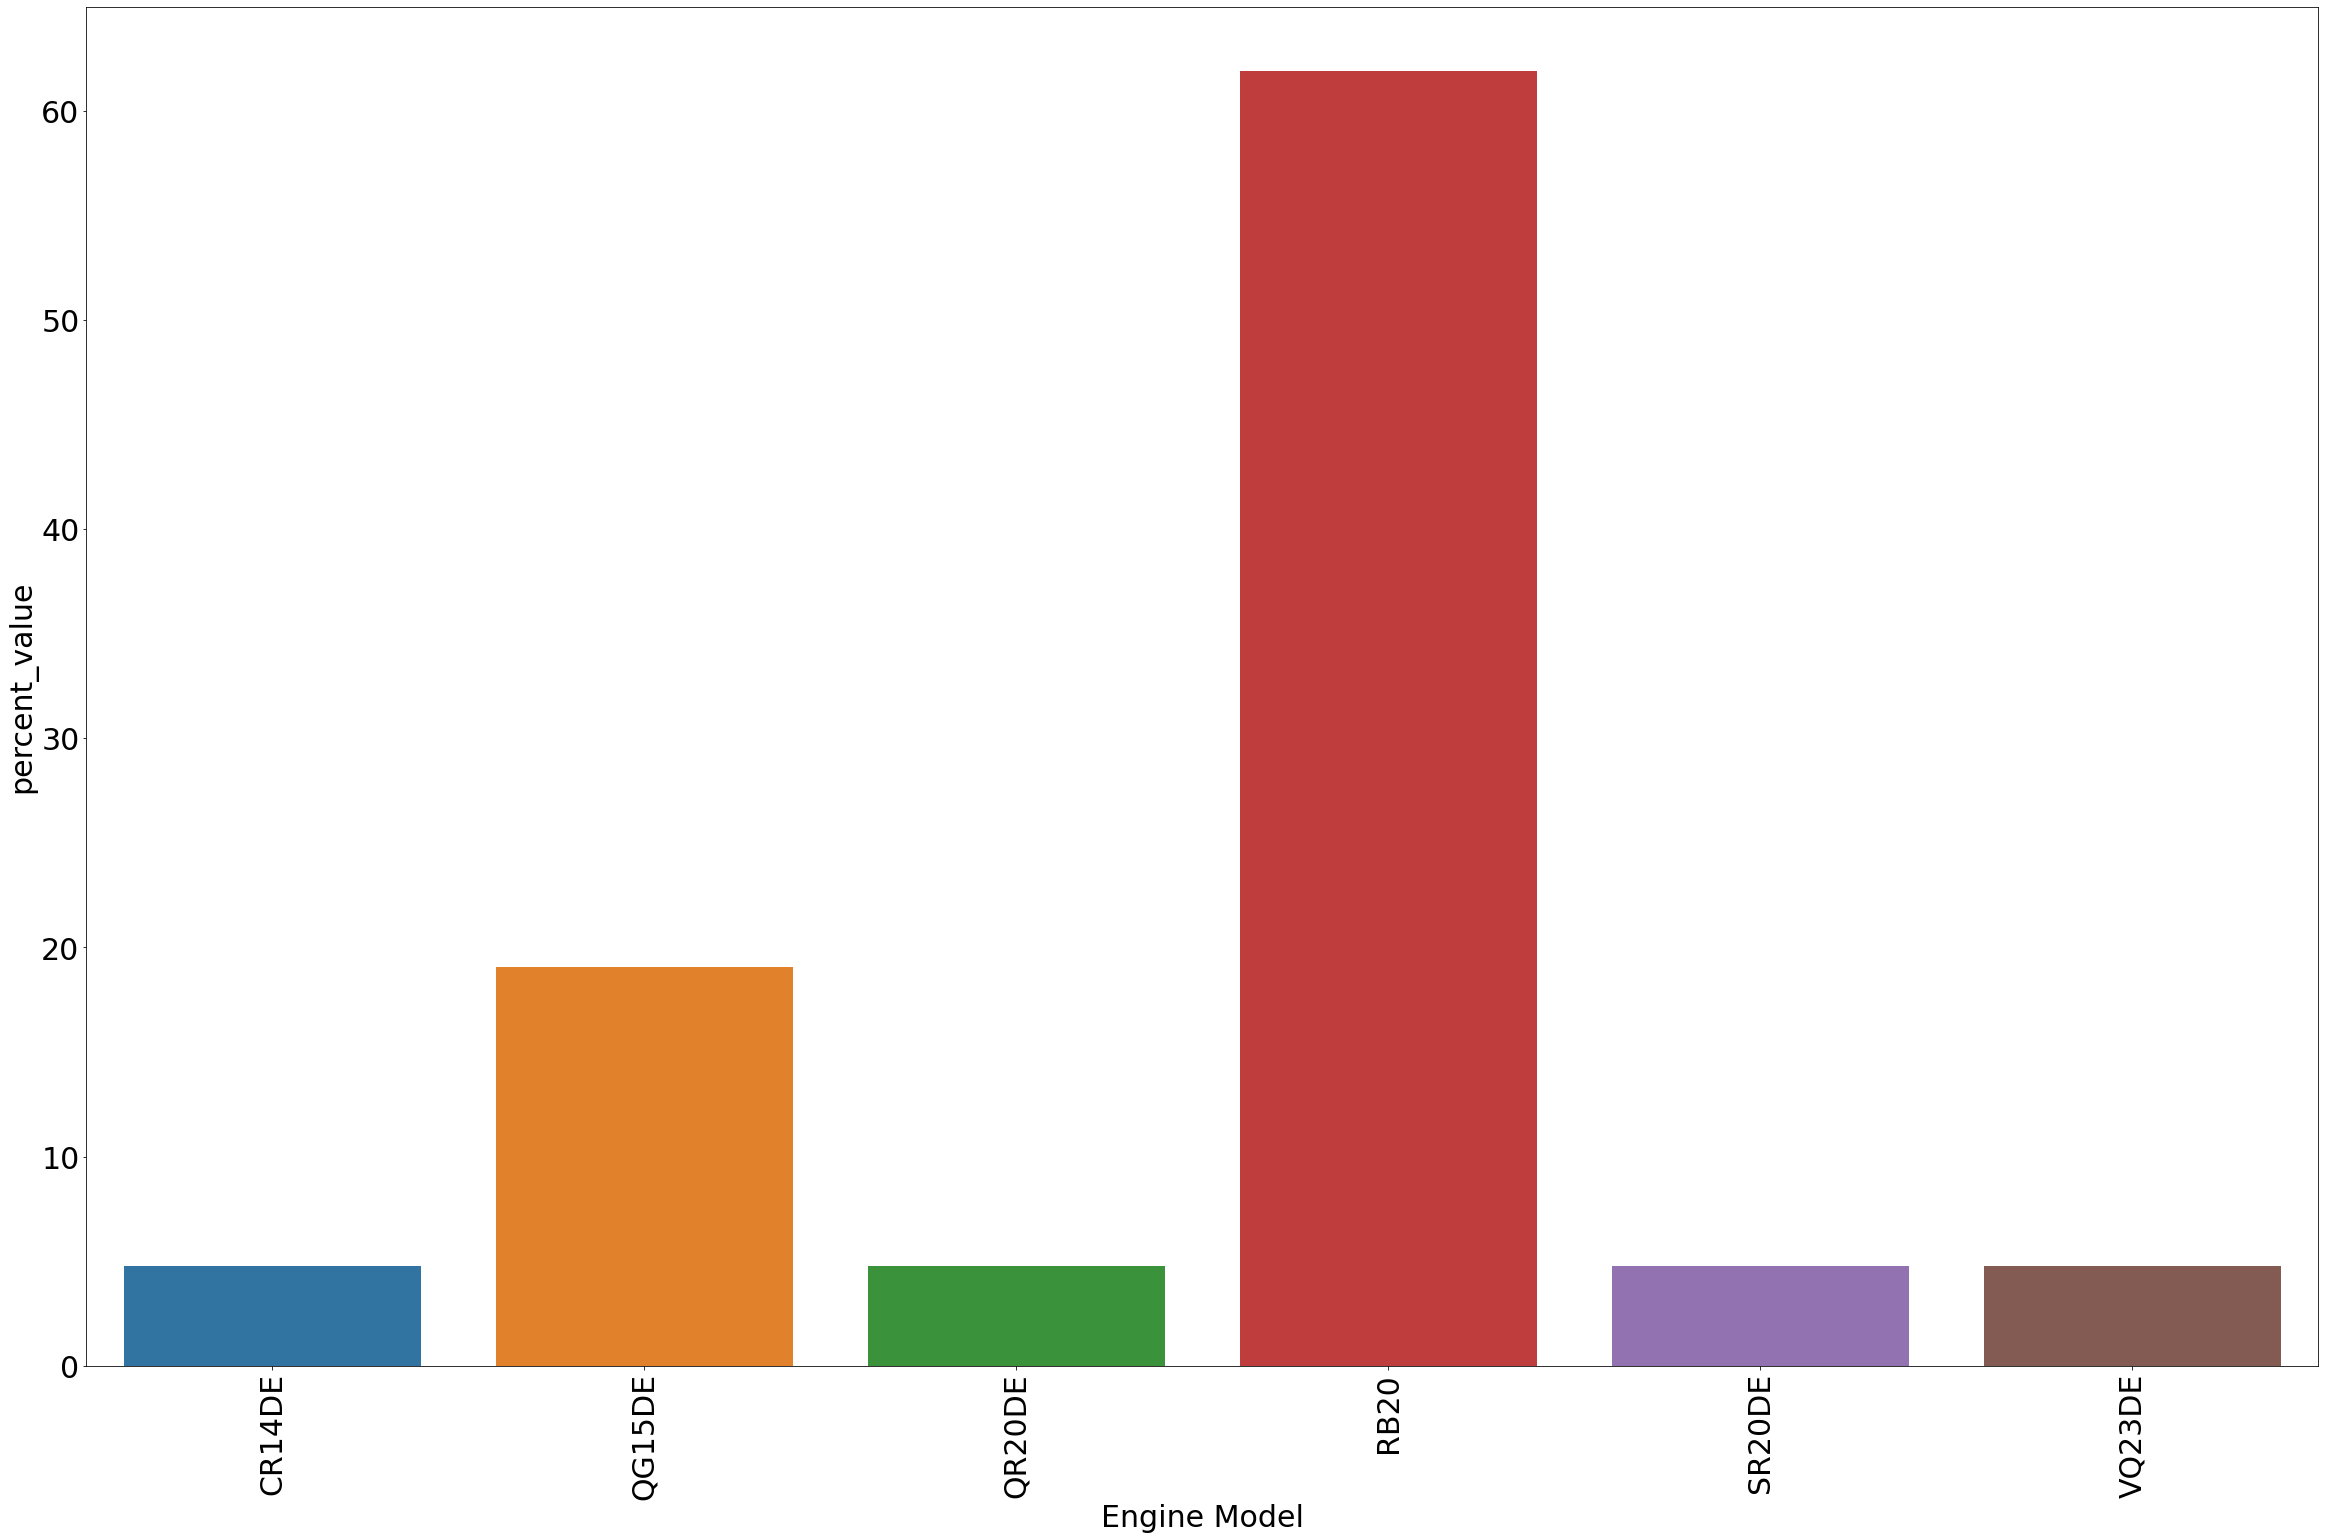

In [221]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)

# SUBARU

In [222]:
df_subaru = df_kaiho[df_merged.Producer.str.contains('SUBARU')]
df_subaru

<ipython-input-222-21fee3cfcc2c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_subaru = df_kaiho[df_merged.Producer.str.contains('SUBARU')]


Register Date     HS Code  \
12       2018-01-01  8407343009   
52       2018-01-01  8407343009   
1015     2018-02-01  8407343009   
1236     2018-03-01  8407343009   
1247     2018-03-01  8407343009   
...             ...         ...   
91625    2016-01-22  8407343009   
93322    2016-04-13  8407343009   
94363    2016-05-26  8407343009   
95991    2016-07-22  8407343009   
95993    2016-07-22  8407343009   

                                     Product Description  \
12     ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
52     ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
1015   ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
1236   ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
1247   ПРОЧИЕ ДВИГАТЕЛИ С ВОЗВРАТНО-ПОСТУПАТЕЛЬНЫМ ДВ...   
...                                                  ...   
91625  ДВИГАТЕЛИ БЕНЗИНОВЫЕ С РАБОЧИМ ОБЪЕМОМ БОЛЕЕ 1...   
93322  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЫВШИЕ В УПОТРЕ...   
94363  ДВИГАТЕЛИ ВНУТРЕННЕГО СГОРАНИЯ БЕНЗИНОВЫЕ, Б/У...   
95991  ЗАПАСНЫЕ ЧАСТИ ОТ АВТОМОБИЛЯ БЫВШЕГО В УПОТРЕБ...   
95993  ЗАПАСНЫЕ ЧАСТИ ОТ АВТОМОБИЛЯ БЫВШЕГО В УПОТРЕБ...   

                       Producer       Brand Place of Receipt  \
12       MITSUBISHI CORPORATION  MITSUBISHI       ТОЯМАШИНКО   
52                     DAIHATSU    DAIHATSU      ВЛАДИВОСТОК   
1015      NISSAN MOTOR CO., LTD      NISSAN        ВОСТОЧНЫЙ   
1236                     TOYOTA      TOYOTA      ВЛАДИВОСТОК   
1247                     NISSAN      NISSAN      ВЛАДИВОСТОК   
...                         ...         ...              ...   
91625  DAIHATSU MOTOR CO., LTD.    DAIHATSU      ВЛАДИВОСТОК   
93322      NISSAN MOTOR CO.,LTD      NISSAN        ВОСТОЧНЫЙ   
94363                MITSUBISHI  MITSUBISHI      ВЛАДИВОСТОК   
95991               MITSUBISHI   MITSUBISHI      ВЛАДИВОСТОК   
95993                   TOYOTA       TOYOTA      ВЛАДИВОСТОК   

      Country of Origin Country of Sales  \
12       JP, JPN, Japan   JP, JPN, Japan   
52       JP, JPN, Japan   JP, JPN, Japan   
1015     JP, JPN, Japan   JP, JPN, Japan   
1236     JP, JPN, Japan   JP, JPN, Japan   
1247     JP, JPN, Japan   JP, JPN, Japan   
...                 ...              ...   
91625    JP, JPN, Japan   JP, JPN, Japan   
93322    JP, JPN, Japan   JP, JPN, Japan   
94363    JP, JPN, Japan   JP, JPN, Japan   
95991    JP, JPN, Japan   JP, JPN, Japan   
95993    JP, JPN, Japan   JP, JPN, Japan   

                                                Shipper   \
12                                 KAIHO SANGYO CO., LTD   
52                                KAIHO SANGYO CO., LTD.   
1015                                KAIHO SANGYO CO.,LTD   
1236                                KAIHO SANGYO CO.LTD.   
1247                                KAIHO SANGYO CO.LTD.   
...                                                  ...   
91625                             KAIHO SANGYO CO., LTD.   
93322  KAIHO SANGYO CO.,LTD 1-25 HIGASHIKAGATSUME-MAC...   
94363                              KAIHO SANGYO CO.,LTD.   
95991                              KAIHO SANGYO CO.,LTD    
95993                              KAIHO SANGYO CO.,LTD    

                                         Shipper Address  ... Unit of Measure  \
12     920-0209, , ISHIKAWA, 1-25 HIGASHIKAGATSUME-MA...  ...             NaN   
52     920-0209, , ISHIKAWA KEN, HIGASHIKAGATSUME-MAC...  ...             NaN   
1015   1-25, HIGASHIKAGATSUME-MACHI, KANAZAWA-SHI, IS...  ...             NaN   
1236   920-0209, ISHIKAWA, KANAZAWA-SHI, HIGASHIKAGAT...  ...             NaN   
1247   920-0209, ISHIKAWA, KANAZAWA-SHI, HIGASHIKAGAT...  ...             NaN   
...                                                  ...  ...             ...   
91625                                                NaN  ...              ШТ   
93322                                                NaN  ...              ШТ   
94363                                                NaN  ...              ШТ   
95991                              

In [223]:
list_all_engine_model_toyota_GTO_JP_filter = []

for des in df_subaru['Product Description'].tolist():
    list_em = extract_engine_model(des,list_subaru)
    if len(list_em) !=0:
     list_all_engine_model_toyota_GTO_JP_filter.append(list_em)
    
list_all_engine_model_toyota_GTO_JP_filter

[['EJ20-D202587',
  'EJ20-B196170',
  'EJ20-307239',
  'EJ20-B582788',
  'EJ25-443927'],
 ['EJ20-B358933'],
 ['EJ20-637134'],
 ['EJ20-B172847'],
 ['EJ20-B216821',
  'EJ20-C000084',
  'EJ20-C540293',
  'EJ20-B206335',
  'EJ20-316081']]

In [224]:
chain_list_em_toyota = list(chain(*list_all_engine_model_toyota_GTO_JP_filter))
list_toyota_remove_tail = list(map(lambda x :split_str(x) ,chain_list_em_toyota))
# list_toyota_remove_tail = list(map(lambda x :split_str(x) ,list_toyota_remove_tail))

In [225]:
df_list_toyota_remove_tail = pd.DataFrame({'Engine Model':list_toyota_remove_tail})
df_list_toyota_remove_tail

Engine Model
0          EJ20
1          EJ20
2          EJ20
3          EJ20
4          EJ25
5          EJ20
6          EJ20
7          EJ20
8          EJ20
9          EJ20
10         EJ20
11         EJ20
12         EJ20

In [226]:
df_freq_toyota = df_list_toyota_remove_tail.groupby(['Engine Model'])['Engine Model'].count().reset_index(name = 'count')
df_freq_toyota ['percent_value']  = round(df_freq_toyota ['count']/df_freq_toyota ['count'].sum()*100,2)
df_freq_toyota

Engine Model  count  percent_value
0         EJ20     12          92.31
1         EJ25      1           7.69

<AxesSubplot:xlabel='Engine Model', ylabel='Count'>

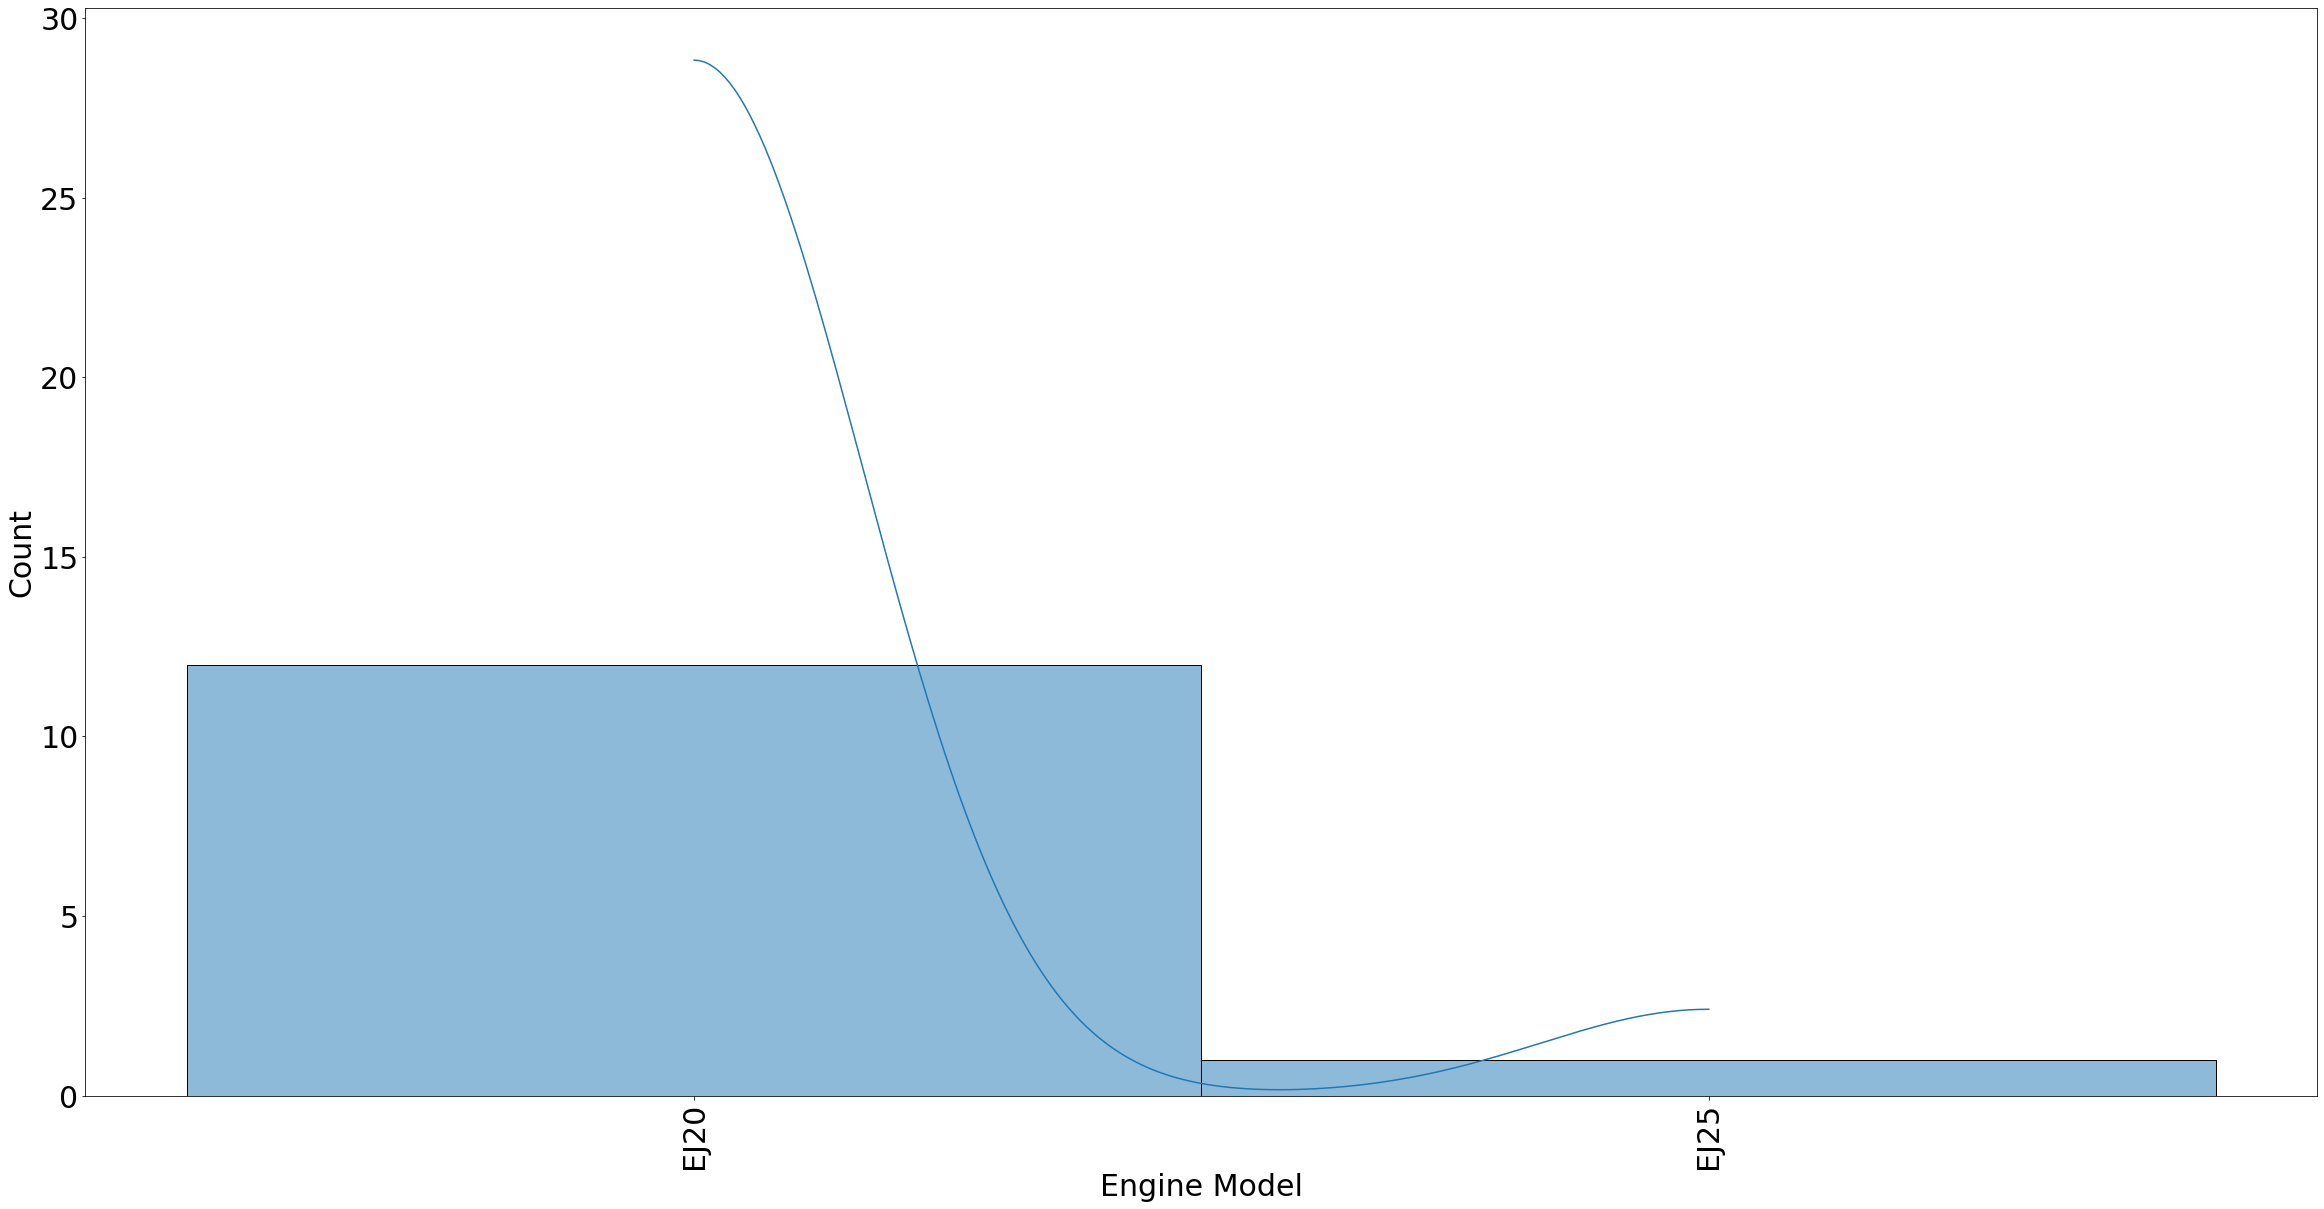

In [227]:
plt.figure(figsize=(40,20))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'Engine Model',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.histplot(data=list_toyota_remove_tail,kde=True)

<AxesSubplot:xlabel='Engine Model', ylabel='percent_value'>

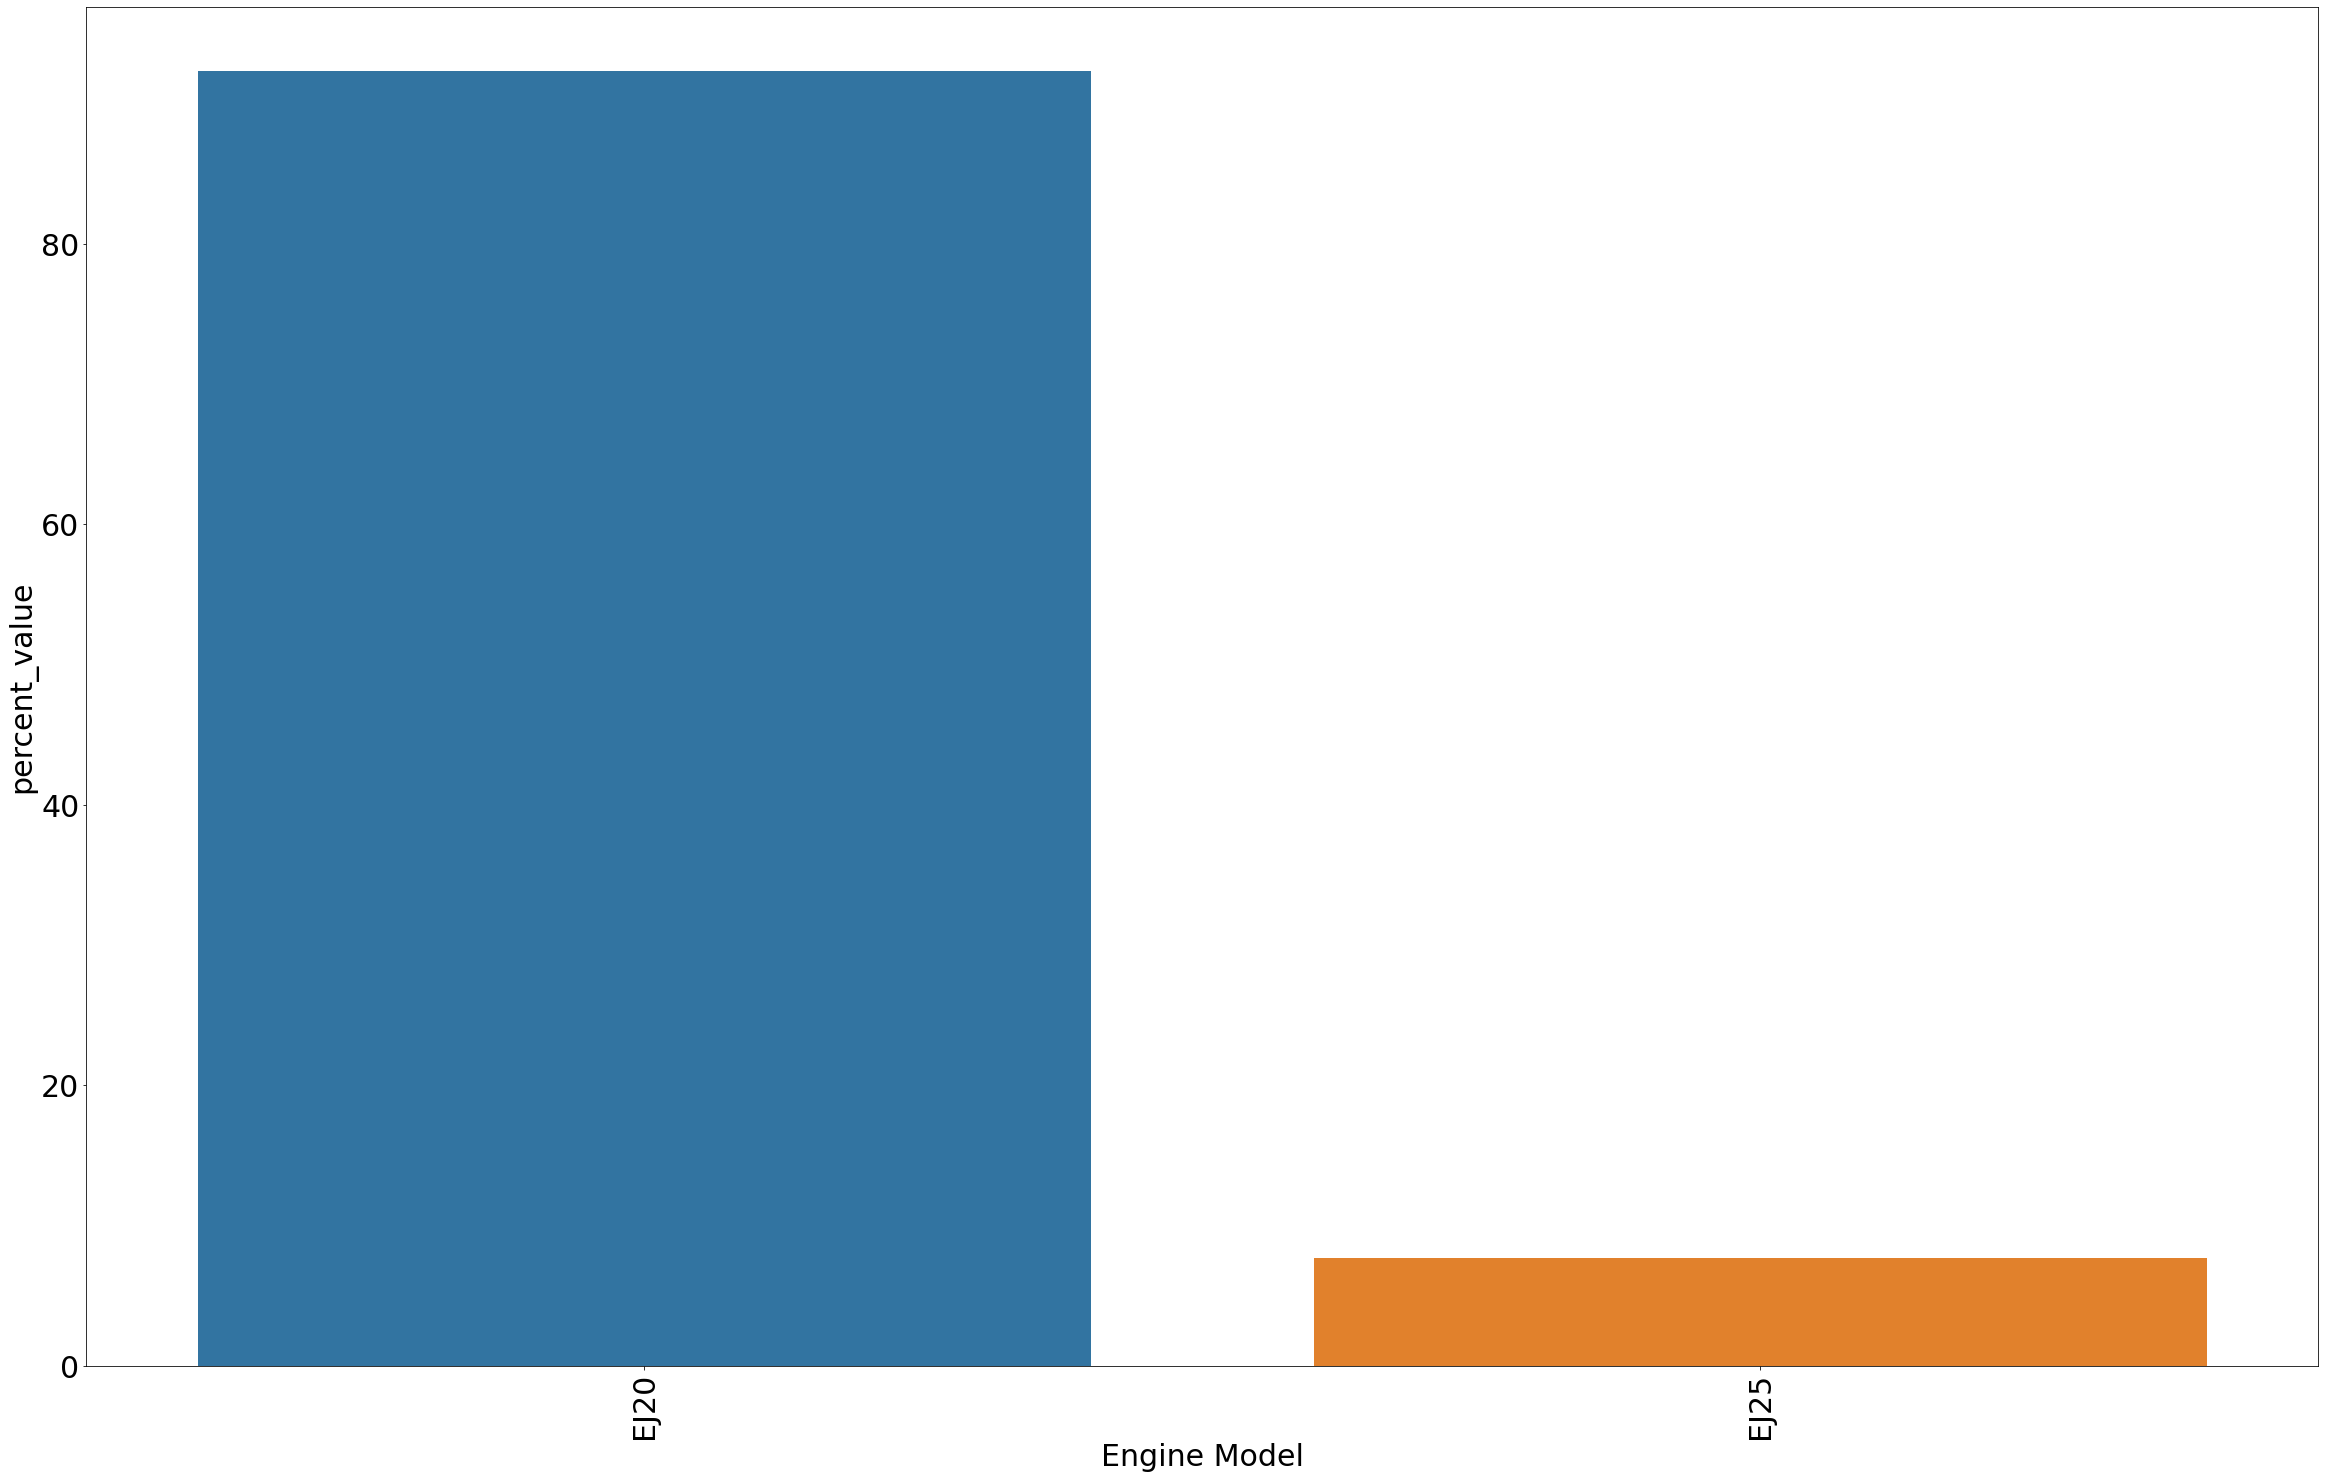

In [228]:
plt.figure(figsize=(40,25))
plt.xticks(fontsize = 30,rotation=90)
plt.xlabel(xlabel = 'percent_value',fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel(ylabel = 'Count',fontsize = 30)
sns.barplot(x='Engine Model',y='percent_value',data=df_freq_toyota)